# **Install FLAML**

In [5]:
pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 18.0 MB/s eta 0:00:00


# **Import Packages**

In [6]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from flaml.automl.ml import sklearn_metric_loss_score
from flaml.default.suggest import DataTransformer
from flaml.automl.data import get_output_from_log
from flaml import AutoML
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# **QB Models**

## **Contract Length $\checkmark$**

### **Regression For Contract Length QB 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/feeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['ConLen']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 02-24 04:12:24] {2716} INFO - task = regression
[flaml.automl.automl: 02-24 04:12:24] {2718} INFO - Data split method: uniform
[flaml.automl.automl: 02-24 04:12:24] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-24 04:12:24] {2848} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 02-24 04:12:24] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 02-24 04:12:24] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-24 04:12:24] {3461} INFO - Estimated sufficient time budget=840s. Estimated necessary time budget=6s.
[flaml.automl.automl: 02-24 04:12:24] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0.8776,	best estimator lgbm's best error=0.8776
[flaml.automl.automl: 02-24 04:12:24] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-24 04:12:24] {3508} INFO -  at 0.2s,	estimator lgbm's best error=0.8776,	best estimator 

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

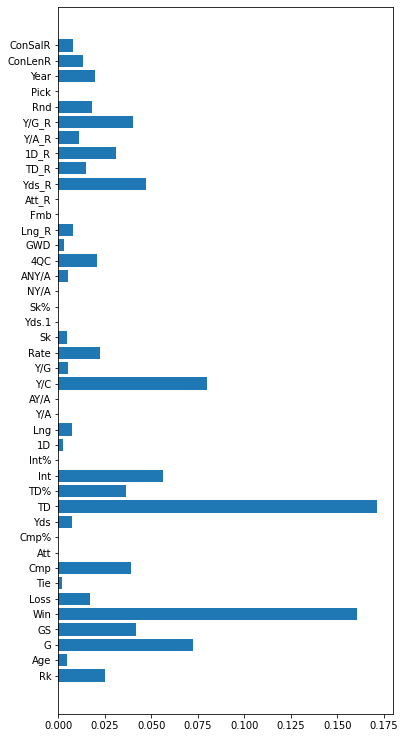

[{'Rk': 0.025386609101599386, 'Age': 0.004903537273794508, 'G': 0.07252489938379525, 'GS': 0.04205299887009074, 'Win': 0.1608084315923746, 'Loss': 0.017103953057897574, 'Tie': 0.0020274629307450174, 'Cmp': 0.039313671031859086, 'Att': 0.0, 'Cmp%': 0.0, 'Yds': 0.007662793685527507, 'TD': 0.17144581573202383, 'TD%': 0.0365749245512167, 'Int': 0.05660192574062576, 'Int%': 0.0, '1D': 0.0026234757297848087, 'Lng': 0.007352859624117429, 'Y/A': 0.0, 'AY/A': 0.0, 'Y/C': 0.08013874714143546, 'Y/G': 0.005159354147255625, 'Rate': 0.022707372615387755, 'Sk': 0.004590235202449597, 'Yds.1': 0.0, 'Sk%': 0.0, 'NY/A': 0.0, 'ANY/A': 0.005115710230800915, '4QC': 0.021076971062211534, 'GWD': 0.002892931649101099, 'Lng_R': 0.007944403850323365, 'Fmb': 0.0, 'Att_R': 0.0, 'Yds_R': 0.047380398064935554, 'TD_R': 0.0149194211852057, '1D_R': 0.031218731860531927, 'Y/A_R': 0.011271984966415849, 'Y/G_R': 0.040121563898551794, 'Rnd': 0.018300112399700107, 'Pick': 0.0, 'Year': 0.019655662035283596, 'ConLenR': 0.0132

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 42))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'max_features': 0.8468856025020536, 'max_leaves': 11}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.34488022439644817


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.7616847168453915, 'rf': 0.8101277200246786, 'xgboost': 0.809926559232294, 'extra_tree': 0.6551197756035518, 'xgb_limitdepth': 1.036318641378685}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00028177077953632057, 'wall_clock_time': 57.779999017715454, 'metric_for_logging': {'pred_time': 0.00028177077953632057, 'train_loss': 0.16604924843195287}, 'val_loss': 0.6551197756035518, 'training_iteration': 1, 'config': {'n_estimators': 8, 'max_features': 0.8468856025020536, 'max_leaves': 11}, 'config/n_estimators': 8, 'config/max_features': 0.8468856025020536, 'config/max_leaves': 11, 'experiment_tag': 'exp', 'time_total_s': 0.17376017570495605}


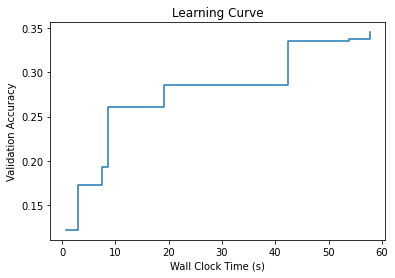

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [1.29604758 1.2114031  1.23521263 1.52520142 1.28836389 4.45527627
 2.96130099 5.11909075 1.34169411 1.31075346 1.47773341 1.55462983
 1.58971755 1.2114031  1.31075346 1.66117568 1.57051152 1.52520142
 1.47773341 1.26997068 1.77973485 1.2114031  4.86127825 1.5013919
 2.61948758 1.33456298 1.6316829  1.2114031  1.49724483 4.98516218
 1.49419573 1.47773341 1.52520142 1.31075346 1.31075346 1.2114031
 1.2114031  4.19143698 1.2114031  1.47773341 9.91666667 4.17921554
 2.75431174 1.58971755 2.57283579 5.24409075 1.34584118 1.2114031
 1.60705369 1.5577433  1.44104447 2.96130099 1.39076335 1.6738138
 1.59659519 1.46630418 4.74739583 3.82656597 3.76286555 1.34584118
 1.2114031  1.3696507  1.47773341 2.13948908 2.76753953 4.92377825
 1.2114031  1.926921   1.23521263 1.31075346 2.62246377 1.47773341
 1.2114031  2.2890625  1.2114031  1.33456298 1.59659519 1.2114031
 1.34584118 1.2114031  1.2114031  1.58235407 1.7156874  1.2114031
 1.52576185 1.53881529 1.31075346 3.95706198 1.2352

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8165271393172849
mse = 0.7158980704194491
mae = 0.6731137179139252


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [1.47773341 4.08627825 1.2114031  1.4901137  1.29604758 3.55282091
 1.2114031  4.5166602  3.55527627 1.2114031  1.23521263 1.2114031
 2.35705369 1.42225656 1.44888563]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.1968035059225164
mse = 2.2989268541595527
mae = 1.036965554154599


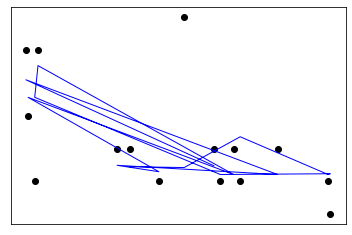

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

         Player     Rk   Age     G    GS   Win  Loss  Tie    Cmp     Att  ...  \
72  Jalen Hurts  23.33  24.0  45.0  34.0  23.0  11.0  0.0  648.0  1040.0  ...   

    Rnd  Pick    Year  ConLenR  ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
72  2.0  53.0  2020.0      4.0    6.025     0.0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [7.03385417]


### **Regression For Contract Length 1.1 QB (AutoML)**

In [ ]:
#Load in Data
Zfeeder = pd.read_csv("../content/QB_data/Zfeeder.csv")
Zfeeder = Zfeeder.drop(['Tie', 'Tm'], axis=1)
Zfeeder = Zfeeder.dropna()
#Split into a train and test set 
feeder_train = Zfeeder[Zfeeder.Year < 2018]
feeder_test = Zfeeder[Zfeeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['ConLen']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 3,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-14 22:52:36] {2726} INFO - task = regression
[flaml.automl.automl: 03-14 22:52:36] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-14 22:52:36] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-14 22:52:36] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-14 22:52:36] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-14 22:52:36] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-14 22:52:36] {3472} INFO - Estimated sufficient time budget=424s. Estimated necessary time budget=3s.
[flaml.automl.automl: 03-14 22:52:36] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8678,	best estimator lgbm's best error=0.8678
[flaml.automl.automl: 03-14 22:52:36] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-14 22:52:36] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8678,	best estimator 

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

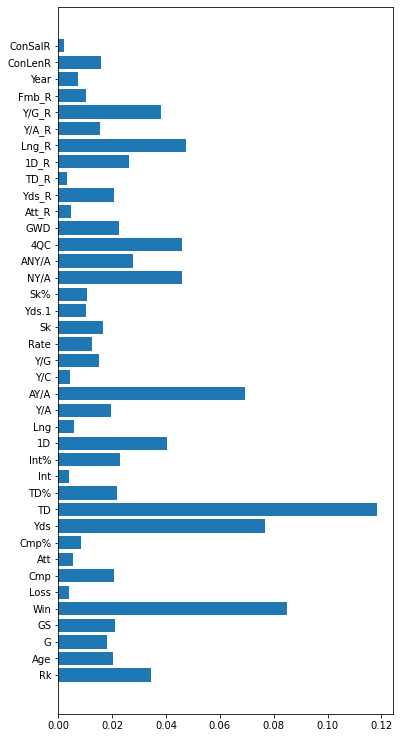

[{'Rk': 0.034379721713500316, 'Age': 0.020204034213220593, 'G': 0.018265695909893267, 'GS': 0.021158700294682004, 'Win': 0.08493403383315329, 'Loss': 0.004033287044190096, 'Cmp': 0.020696229295846785, 'Att': 0.005543106742734043, 'Cmp%': 0.008603455769298775, 'Yds': 0.07663424318239391, 'TD': 0.11839231710969615, 'TD%': 0.02180697326421878, 'Int': 0.003918651628714246, 'Int%': 0.02305279686523458, '1D': 0.04043792020979713, 'Lng': 0.005687523616416701, 'Y/A': 0.019472863255286143, 'AY/A': 0.06920008153248985, 'Y/C': 0.004398045264020325, 'Y/G': 0.014997860367629881, 'Rate': 0.012633637784919551, 'Sk': 0.016719614558964424, 'Yds.1': 0.010199828594351907, 'Sk%': 0.010799735632127773, 'NY/A': 0.046036427448557855, 'ANY/A': 0.02789339016249486, '4QC': 0.04595953223667417, 'GWD': 0.022409369463772606, 'Att_R': 0.004815086374400118, 'Yds_R': 0.020556699729100392, 'TD_R': 0.0033715302111482597, '1D_R': 0.026144935917015517, 'Lng_R': 0.04757858200878632, 'Y/A_R': 0.015567670130259358, 'Y/G_R':

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 39))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
for i in fi_dict[0]:
  if fi_dict[0][i] <= 0:
    print(i)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 24, 'max_leaves': 12, 'max_features': 0.5254596115905253}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.36412156638982196


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.6695107847316631, 'rf': 0.6546167652206778, 'xgboost': 0.6857492290145807, 'extra_tree': 0.635878433610178, 'xgb_limitdepth': 0.6635662816927917}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00020545721054077148, 'wall_clock_time': 24.186572790145874, 'metric_for_logging': {'pred_time': 0.00020545721054077148, 'train_loss': 0.08597601096972078}, 'val_loss': 0.635878433610178, 'training_iteration': 1, 'config': {'n_estimators': 24, 'max_leaves': 12, 'max_features': 0.5254596115905253}, 'config/n_estimators': 24, 'config/max_leaves': 12, 'config/max_features': 0.5254596115905253, 'experiment_tag': 'exp', 'time_total_s': 0.1763467788696289}


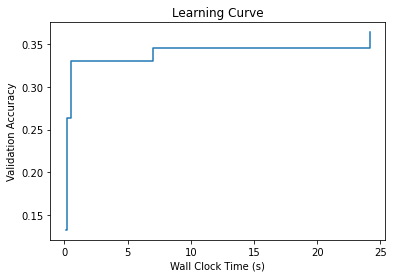

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [ 5.09921583  1.45603802  1.8223136   1.36503344  1.47833205  1.19271695
  1.19271695  5.13046583  1.27855243  1.19271695  1.7032664   1.39938878
  1.27943288  1.66327153  1.28778808  1.45774264  1.47711776  1.9406587
  1.26707296  1.72709708  1.19271695  1.68460999  1.19271695  1.98374535
 10.          1.33570306  4.78071512  1.20385951  1.66662851  5.04141414
  4.11606533  1.50015363  1.62194788  4.75026208  1.60167857  1.56943168
  2.23053976  2.82484781  1.86016114  1.31012687  1.38745723  1.39046815
  1.19271695  1.19271695  1.56950464  5.09663647  1.31900924  2.59724237
  1.5985422   4.99620657  1.83379458  1.91362354  1.356059    1.64251605
  2.81185445  1.21563361  5.2002575   4.68046583  4.87163774  1.24876048
  1.33118524  1.19271695  1.76881965  1.55039954  1.26659255  2.40544138
  1.56520437  4.94843838  2.04913511  1.35880086  5.12063784  1.67263019
  1.76036696  1.52674572  1.21052054  1.27474567  1.21563361  2.25080082
  1.78119513  4.92919523  1.8575974

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8327968505695922
mse = 0.6679381642412427
mae = 0.6141582852465888


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [1.43553699 4.47644797 4.14157891 1.41148569 3.47122175 1.4790963
 1.19271695 1.74793506 4.93254916 1.63501069 1.19271695 3.7568203
 1.30144096]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.6019041849505697
mse = 2.4215532418391374
mae = 1.1775010837674842


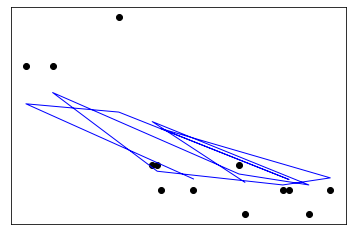

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = Zfeeder[Zfeeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

          Player        Rk       Age Pos         G        GS     Win  \
40  Daniel Jones -0.517994 -0.960165  QB  0.714385  0.767304  0.2433   

        Loss       Cmp       Att  ...     Y/G_R    Fmb_R  Year  ConLenR  \
40  1.101865  0.637772  0.674718  ...  1.297224  1.65654  2019        4   

    ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
40   25.664       0     0.0   0.0  0.0   0.0  

[1 rows x 46 columns]
Predicted labels [2.70957888]


### **Regression For Contract Length 1.2 QB (AutoML)**

In [ ]:
#Load in Data
Zfeeder = pd.read_csv("../content/QB_data/Zfeeder.csv")
#Split into a train and test set 
feeder_train = Zfeeder[Zfeeder.Year < 2018]
feeder_test = Zfeeder[Zfeeder.Year > 2017]
feeder_train = feeder_train[['Player', 'ConLen', 'Y/G_R', 'Lng_R', '4QC', 'NY/A', 'AY/A', '1D', 'TD', 'Yds', 'Win', 'GS', 'Age', 'Rk']]
feeder_train = feeder_train.dropna()
feeder_test = feeder_test[['Player', 'ConLen', 'Y/G_R', 'Lng_R', '4QC', 'NY/A', 'AY/A', '1D', 'TD', 'Yds', 'Win', 'GS', 'Age', 'Rk']]
feeder_test = feeder_test.dropna()

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['ConLen']
features = feeder_train.drop(['ConLen'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 3,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-14 23:01:42] {2726} INFO - task = regression
[flaml.automl.automl: 03-14 23:01:42] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-14 23:01:42] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-14 23:01:42] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-14 23:01:42] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-14 23:01:42] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-14 23:01:42] {3472} INFO - Estimated sufficient time budget=357s. Estimated necessary time budget=3s.
[flaml.automl.automl: 03-14 23:01:42] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8766,	best estimator lgbm's best error=0.8766
[flaml.automl.automl: 03-14 23:01:42] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-14 23:01:42] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8766,	best estimator 

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

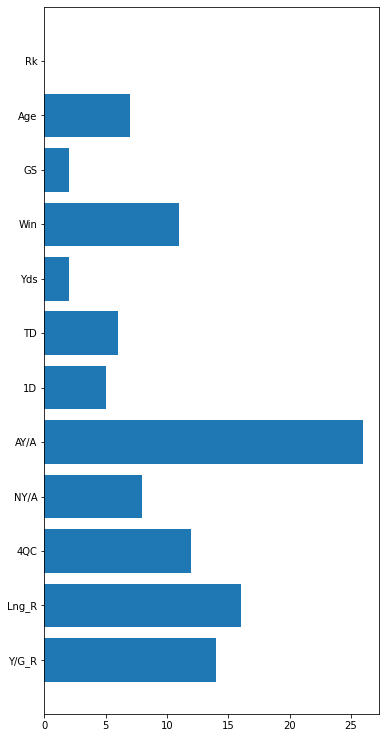

[{'Y/G_R': 14, 'Lng_R': 16, '4QC': 12, 'NY/A': 8, 'AY/A': 26, '1D': 5, 'TD': 6, 'Yds': 2, 'Win': 11, 'GS': 2, 'Age': 7, 'Rk': 0}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 12))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
for i in fi_dict[0]:
  if fi_dict[0][i] <= 0:
    print(i)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 34, 'num_leaves': 13, 'min_child_samples': 20, 'learning_rate': 0.14070670061161072, 'log_max_bin': 10, 'colsample_bytree': 0.796422238268683, 'reg_alpha': 0.09024392464335762, 'reg_lambda': 0.43030103833666566}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.3947192913407648


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.6052807086592352, 'rf': 0.6210809360080979, 'xgboost': 0.647505085459986, 'extra_tree': 0.6132978023947852, 'xgb_limitdepth': 0.7167132865381974}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 3.1577216254340274e-05, 'wall_clock_time': 41.782349824905396, 'metric_for_logging': {'pred_time': 3.1577216254340274e-05, 'train_loss': 0.3360172873158483}, 'val_loss': 0.6052807086592352, 'training_iteration': 1, 'config': {'n_estimators': 34, 'num_leaves': 13, 'min_child_samples': 20, 'learning_rate': 0.14070670061161072, 'log_max_bin': 10, 'colsample_bytree': 0.796422238268683, 'reg_alpha': 0.09024392464335762, 'reg_lambda': 0.43030103833666566}, 'config/n_estimators': 34, 'config/num_leaves': 13, 'config/min_child_samples': 20, 'config/learning_rate': 0.14070670061161072, 'config/log_max_bin': 10, 'config/colsample_bytree': 0.796422238268683, 'config/reg_alpha': 0.09024392464335762, 'config/reg_lambda': 0.43030103833666566, 'experiment_tag': 'exp', 'time_total_s': 0.05052375793457031}


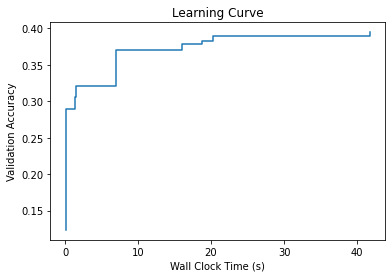

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [4.82682347 1.63565424 2.22488495 1.57832749 1.74492053 0.55646881
 0.66162432 4.79975223 1.28152085 0.88034439 2.74637954 1.12765869
 1.63019554 1.65009774 0.60753338 1.99452142 1.74293459 2.7489447
 1.15415252 2.49639829 0.91947756 2.14494533 0.60923803 3.19792891
 4.7024268  1.22558497 3.96428956 1.11992557 4.47426818 5.4959071
 3.88986966 1.56916577 1.97048848 4.67684703 1.26416441 1.32445068
 3.24524078 2.91839469 1.97753145 0.84540994 0.90709687 1.22866765
 0.5781896  0.78949354 2.49019215 5.56360531 1.34518052 3.56675936
 1.55006393 4.37023819 2.60179743 2.49585467 0.76218032 1.17002658
 3.33389691 1.18175996 4.79975223 4.64468118 4.40285598 1.13918578
 1.12698601 0.83975824 2.10157328 1.39580488 1.91069853 2.78396188
 0.67554471 4.80211334 3.0659434  0.42365414 4.69341515 2.34352932
 2.05935888 0.71424696 1.26454943 0.78070656 0.83975824 2.92005056
 1.88533496 5.00198039 2.57190009 2.34721088 4.76111336 0.96640354
 2.60172787 2.4909833  2.35505559 1.86659479 5.

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.7035939350703163
mse = 1.1840741251199083
mae = 0.7187911543920149


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [2.02313019 3.79592796 4.6454604  1.17452576 3.32992257 1.39545656
 0.63858181 1.69903674 5.00198039 1.72915335 1.22099981 4.60682153
 0.86894546]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.5813560238639446
mse = 2.546544422886775
mae = 1.239204710928939


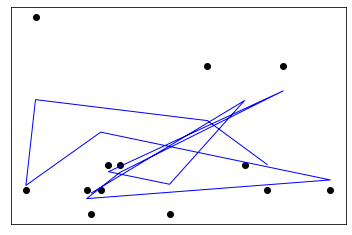

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = Zfeeder[Zfeeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

          Player        Rk   Tm       Age Pos         G        GS     Win  \
40  Daniel Jones -0.517994  NYG -0.960165  QB  0.714385  0.767304  0.2433   

        Loss      Tie  ...     Y/G_R    Fmb_R  Year  ConLenR  ConSalR  ConLen  \
40  1.101865  0.85901  ...  1.297224  1.65654  2019        4   25.664       0   

    ConSal  FTag  PPY  %Cap  
40     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [2.22375874]


### **Regression For Contract Length 1.3 QB (AutoML)**

In [ ]:
#Load in Data
Zfeeder = pd.read_csv("../content/QB_data/Zfeeder.csv")
#Split into a train and test set 
feeder_train = Zfeeder[Zfeeder.Year < 2018]
feeder_test = Zfeeder[Zfeeder.Year > 2017]
feeder_train = feeder_train[['Player', 'ConLen', 'Y/G_R', 'Lng_R', '4QC', 'NY/A', 'AY/A', '1D', 'TD', 'Yds', 'Win', 'GS', 'Age']]
feeder_train = feeder_train.dropna()
feeder_test = feeder_test[['Player', 'ConLen', 'Y/G_R', 'Lng_R', '4QC', 'NY/A', 'AY/A', '1D', 'TD', 'Yds', 'Win', 'GS', 'Age']]
feeder_test = feeder_test.dropna()

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['ConLen']
features = feeder_train.drop(['ConLen'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 3,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-14 23:05:58] {2726} INFO - task = regression
[flaml.automl.automl: 03-14 23:05:58] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-14 23:05:58] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-14 23:05:58] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-14 23:05:58] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-14 23:05:58] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-14 23:05:58] {3472} INFO - Estimated sufficient time budget=306s. Estimated necessary time budget=2s.
[flaml.automl.automl: 03-14 23:05:58] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8757,	best estimator lgbm's best error=0.8757
[flaml.automl.automl: 03-14 23:05:58] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-14 23:05:58] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8757,	best estimator 

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

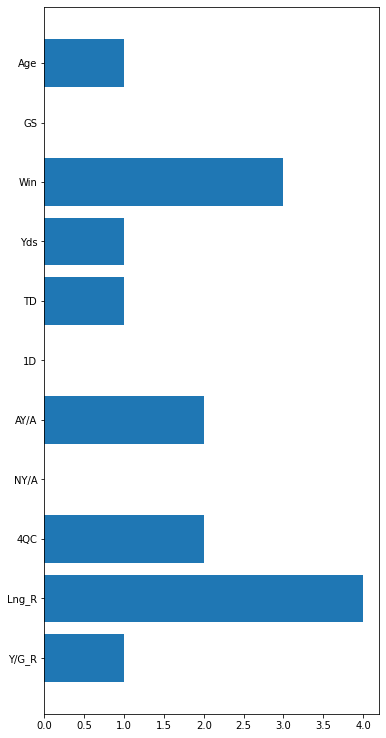

[{'Y/G_R': 1, 'Lng_R': 4, '4QC': 2, 'NY/A': 0, 'AY/A': 2, '1D': 0, 'TD': 1, 'Yds': 1, 'Win': 3, 'GS': 0, 'Age': 1}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 11))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
for i in fi_dict[0]:
  if fi_dict[0][i] <= 0:
    print(i)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 5, 'num_leaves': 9, 'min_child_samples': 21, 'learning_rate': 0.7121607789575023, 'log_max_bin': 6, 'colsample_bytree': 0.4747624351069575, 'reg_alpha': 0.0017731133351073156, 'reg_lambda': 0.09578297797709925}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.420196030535683


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.579803969464317, 'rf': 0.627550983362739, 'xgboost': 0.6618404017910241, 'extra_tree': 0.6468154395238228, 'xgb_limitdepth': 0.6229831014430316}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 2.7539553465666593e-05, 'wall_clock_time': 52.002729177474976, 'metric_for_logging': {'pred_time': 2.7539553465666593e-05, 'train_loss': 0.39260240474389746}, 'val_loss': 0.579803969464317, 'training_iteration': 1, 'config': {'n_estimators': 5, 'num_leaves': 9, 'min_child_samples': 21, 'learning_rate': 0.7121607789575023, 'log_max_bin': 6, 'colsample_bytree': 0.4747624351069575, 'reg_alpha': 0.0017731133351073156, 'reg_lambda': 0.09578297797709925}, 'config/n_estimators': 5, 'config/num_leaves': 9, 'config/min_child_samples': 21, 'config/learning_rate': 0.7121607789575023, 'config/log_max_bin': 6, 'config/colsample_bytree': 0.4747624351069575, 'config/reg_alpha': 0.0017731133351073156, 'config/reg_lambda': 0.09578297797709925, 'experiment_tag': 'exp', 'time_total_s': 0.04121541976928711}


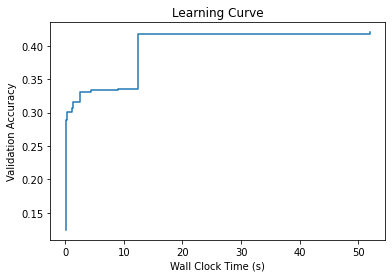

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [5.25859188 1.75893186 1.89691061 1.85821892 1.67898209 0.31741755
 0.5270777  5.25859188 1.62703572 0.43293514 1.88995113 1.11079253
 1.14775245 1.79928976 0.74188234 2.33975885 2.00894991 2.82191901
 1.22789812 2.3830368  0.86219001 1.48487942 0.5322222  2.91626267
 4.45463649 1.3100719  3.97483874 0.86219001 5.04378723 5.87412213
 4.85256845 2.13996918 1.40197091 4.50667088 1.24090212 1.208132
 3.92141062 2.90794841 1.57969503 0.76290295 0.24590097 0.99088407
 0.28127288 0.68632774 3.2388475  5.19062773 1.07185016 2.94034474
 1.75893186 4.32743405 2.12495421 1.70047367 0.71165493 1.52123685
 2.8084486  1.04846539 5.25859188 5.04378723 4.1126294  1.53049045
 1.11079253 0.86219001 1.40197091 2.04235738 1.85734205 2.94010774
 0.87013878 4.3357483  3.08718524 0.77605784 4.60629875 2.25685034
 1.80485686 0.87013878 1.18981103 1.3100719  0.61124069 3.08718524
 1.70047367 5.34228999 2.21100232 1.84209213 4.45463649 0.86219001
 2.3830368  2.9552891  1.70047367 1.70047367 5.

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.6647936261730145
mse = 1.3390724441416657
mae = 0.7664017005858267


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [3.10695136 3.80391617 5.25859188 1.43037957 3.59144281 1.39002167
 0.5322222  2.05306898 5.34228999 1.3100719  0.89680313 4.45463649
 0.46070561]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.5953025707989934
mse = 2.4617098060274243
mae = 1.241301345268655


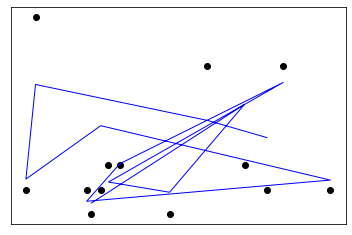

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = Zfeeder[Zfeeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Joe Burrow"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

        Player        Rk   Tm       Age Pos         G        GS       Win  \
71  Joe Burrow -1.078114  CIN -0.671794  QB  0.801085  0.887678  0.930144   

        Loss       Tie  ...     Y/G_R    Fmb_R  Year  ConLenR  ConSalR  \
71  0.441821  1.603823  ...  0.000445  0.87834  2020        4    36.19   

    ConLen  ConSal  FTag  PPY  %Cap  
71       0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [5.04378723]


In [ ]:
feeder_test = Zfeeder[Zfeeder.Year > 2017]
feeder_test.head

<bound method NDFrame.head of                  Player        Rk   Tm       Age Pos         G        GS  \
7        Baker Mayfield -0.662627  CLE -0.795355  QB  0.919164  0.954321   
8           Ben DiNucci  1.508948  DAL -0.888921  QB -1.295185 -1.326378   
40         Daniel Jones -0.517994  NYG -0.960165  QB  0.714385  0.767304   
49            Drew Lock  0.148025  DEN -0.873284  QB -0.339812 -0.297781   
51       Dwayne Haskins  0.289880  WAS -1.150524  QB -0.346268 -0.411224   
54   Gardner Minshew II  0.188134  PHI -0.763330  QB -0.293900 -0.421526   
59           Jake Fromm  1.325748  NYG -1.088990  QB -1.252684 -1.063355   
61           Jake Luton  0.783831  JAX -0.888921  QB -1.295185 -0.990362   
62          Jalen Hurts -0.435527  PHI -1.071874  QB  0.995013  0.443931   
65      Jarrett Stidham  0.648270  LVR -0.433468  QB -0.711064 -0.984028   
71           Joe Burrow -1.078114  CIN -0.671794  QB  0.801085  0.887678   
78          Jordan Love  1.007979  GNB -1.088990  QB -0.71

### **Regression For Contract Length QB 2.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/finalQB.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2022]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_test = feeder[feeder.Year == 2022]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player', 'Pos', 'Tm'], axis=1)
targets = feeder_train['New_Con_Len']
features = feeder_train.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-30 21:22:08] {2726} INFO - task = regression
[flaml.automl.automl: 03-30 21:22:08] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-30 21:22:08] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-30 21:22:08] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-30 21:22:08] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-30 21:22:08] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-30 21:22:08] {3472} INFO - Estimated sufficient time budget=2032s. Estimated necessary time budget=14s.
[flaml.automl.automl: 03-30 21:22:08] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.8647,	best estimator lgbm's best error=0.8647
[flaml.automl.automl: 03-30 21:22:08] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-30 21:22:08] {3519} INFO -  at 0.5s,	estimator lgbm's best error=0.8647,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

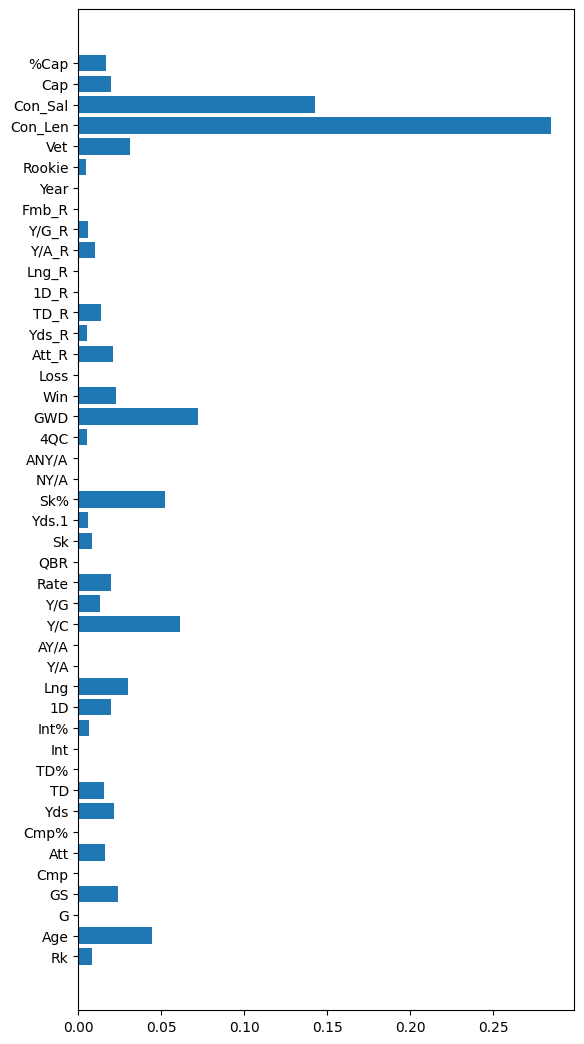

[{'Rk': 0.008035526539172588, 'Age': 0.044168686866183526, 'G': 0.0, 'GS': 0.02379244881582468, 'Cmp': 0.0, 'Att': 0.015863087399657354, 'Cmp%': 0.0, 'Yds': 0.021717789121211546, 'TD': 0.015441436092563456, 'TD%': 0.0, 'Int': 0.0, 'Int%': 0.006134128305118508, '1D': 0.019534718073137777, 'Lng': 0.029710136309297242, 'Y/A': 0.0, 'AY/A': 0.0, 'Y/C': 0.06137584924380663, 'Y/G': 0.013001157557012644, 'Rate': 0.019439545803566324, 'QBR': 0.0, 'Sk': 0.008408226404617082, 'Yds.1': 0.006039441262091604, 'Sk%': 0.052152633653632215, 'NY/A': 0.0, 'ANY/A': 0.0, '4QC': 0.0052002949066092125, 'GWD': 0.07224818850457057, 'Win': 0.022619162204855582, 'Loss': 0.0, 'Att_R': 0.02083608994796308, 'Yds_R': 0.005426310575871605, 'TD_R': 0.013681127878190518, '1D_R': 0.0, 'Lng_R': 0.0, 'Y/A_R': 0.01024986991987169, 'Y/G_R': 0.0057619442050697986, 'Fmb_R': 0.0, 'Year': 0.0, 'Rookie': 0.004263410268718032, 'Vet': 0.03102337210107522, 'Con_Len': 0.28491935498886134, 'Con_Sal': 0.14252914621402887, 'Cap': 0.019

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 44))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 4, 'max_features': 0.8009251789950347, 'max_leaves': 17}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.4627999648627188


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.685748701140794, 'rf': 0.6105454737263647, 'xgboost': 0.6969701333542812, 'extra_tree': 0.5372000351372812, 'xgb_limitdepth': 0.6701297560594541}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00013087020730072595, 'wall_clock_time': 37.07635688781738, 'metric_for_logging': {'pred_time': 0.00013087020730072595, 'train_loss': 0.21276021796654404}, 'val_loss': 0.5372000351372812, 'training_iteration': 1, 'config': {'n_estimators': 4, 'max_features': 0.8009251789950347, 'max_leaves': 17}, 'config/n_estimators': 4, 'config/max_features': 0.8009251789950347, 'config/max_leaves': 17, 'experiment_tag': 'exp', 'time_total_s': 0.14108061790466309}


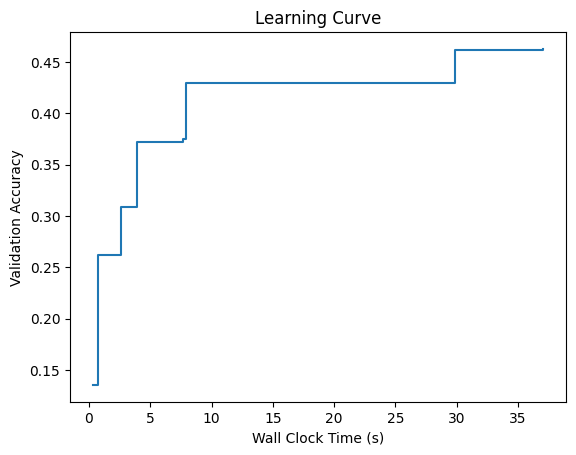

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [ 0.  0. -1. -0. -1. -1. -1.  0. -1. -0. -2.  0. -1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0. -1.  0.  0.  0. -1.
  0.  0. -1.  0.  0.  0.  0. -2. -2.  0.  0.  0.  0.  0. -2. -1.  0.  0.
  0.  0. -0. -2.  0. -2.  0.  0. -2. -4.  0. -0.  0.  0.  0. -1.  0.  0.
  0. -0.  0. -0. -2.  0. -2. -1.  0.  0. -2.  0.  0.  0. -0.  0.  0.  0.
 -1.  0. -1.  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0. -2. -0. -1.  0.
  0.  0. -1.  0.  0.  0. -0.  0. -0.  0.  0. -1. -5.  0.  0. -1. -1.  0.
  0.  0.  0.  0. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
 -1.  0.  0.  0. -1. -0. -2. -1.  0.  0.  0.  0. -1.  1.  0.  0.  0. -1.
  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0. -1.
  0.  0.  0.  0.  0.  0. -1. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
  0. -2. -5.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -2.
 -1. -1.  0.  0. -1.  0.  0.  0.  

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.6716010995448606
mse = 0.41509433962264153
mae = 0.3018867924528302


In [ ]:
# PrRedict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [ 1.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0. -1. -1.  0.  0. -1.
  0.  0.  0.  0.  0.  0.  0. -1. -2.  0.  0.  0.  0.  0.  0. -2.  0.  0.
  0.  0.  0.  0.  0.  0. -0.  0. -4.  0. -1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0. -1. -1.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = -0.36178861788617955
mse = 0.6716417910447762
mae = 0.40298507462686567


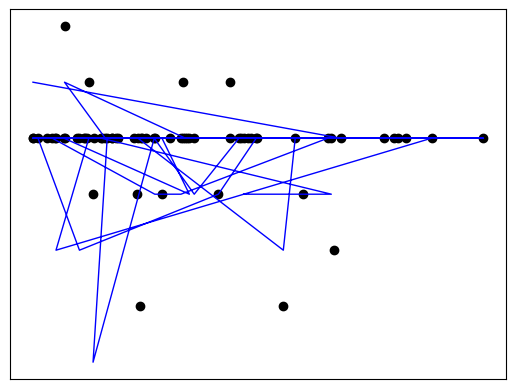

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year < 2023]
feeder_test = feeder_test[feeder_test.Player == "Aaron Rodgers"]
feeder_test

Player   Tm Pos        Rk       Age         G        GS       Cmp  \
3    Aaron Rodgers  GNB  QB -1.493170  0.985346  1.249665  1.281091  1.505200   
94   Aaron Rodgers  GNB  QB -0.231702  1.205880 -0.261428 -0.032491  0.009432   
134  Aaron Rodgers  GNB  QB -1.308965  1.284685  1.272194  1.353621  1.392816   
204  Aaron Rodgers  GNB  QB -1.087014  1.421078  1.302525  1.337612  1.306921   
264  Aaron Rodgers  GNB  QB -1.332274  1.777208  1.424208  1.475484  1.525680   
338  Aaron Rodgers  GNB  QB -1.185290  1.970503  1.234268  1.303296  1.348117   
405  Aaron Rodgers  GNB  QB -1.256182  2.248556  1.661924  1.682110  1.496677   

          Att      Cmp%  ...     Fmb_R  Year  Rookie  Vet  Con_Len  \
3    1.432536  0.446587  ...  1.027171  2016     0.0  1.0      5.0   
94  -0.037244  0.413365  ... -0.737506  2017     0.0  1.0      5.0   
134  1.544282  0.211580  ...  0.469726  2018     0.0  1.0      4.0   
204  1.384588  0.084815  ... -0.142481  2019     0.0  1.0      4.0   
264  1.361715  0.724383  ...  0.233991  2020     0.0  1.0      4.0   
338  1.236728  0.551744  ... -0.242346  2021     0.0  1.0      4.0   
405  1.533841  0.254661  ...  1.200306  2022     0.0  1.0      3.0   

         Con_Sal          Cap      %Cap  New_Con_Len  New_Perc_Cap  
3    110000000.0  155270000.0  0.141689            0      0.000000  
94   110000000.0  167000000.0  0.131737            0     -0.009952  
134  134000000.0  177200000.0  0.189052           -1      0.057315  
204  134000000.0  188200000.0  0.178002            0     -0.011050  
264  134000000.0  198200000.0  0.169021            0     -0.008981  
338  134000000.0  182500000.0  0.183562            0      0.014540  
405  150815000.0  208200000.0  0.241459           -1      0.057897  

[7 rows x 49 columns]

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Lamar Jackson"]
print(feeder_test.head(6))
feeder_test = feeder_test.drop(['Player', 'Pos'], axis=1)
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = automl.predict(feeder_test).round()
print('Predicted labels', y_pred)

            Player   Tm Pos        Rk       Age         G        GS       Cmp  \
421  Lamar Jackson  BAL  QB -0.616743 -0.723312  0.757247  0.873019  0.446843   

          Att      Cmp%  ...     Fmb_R  Year  Rookie  Vet  Con_Len    Con_Sal  \
421  0.510149  0.064125  ...  0.364379  2022     1.0  0.0      4.0  9471648.0   

             Cap      %Cap  New_Con_Len  New_Perc_Cap  
421  208200000.0  0.011373            0     -0.001602  

[1 rows x 49 columns]
Predicted labels [0.]


### **Regression For Contract Length QB 2.1 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/finalQB.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2022]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_test = feeder[feeder.Year == 2022]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
#feeder_train = feeder_train.drop(['Player', 'Pos', 'Tm', 'Year', 'Fmb_R', 'Lng_R',
#                                  '1D_R', 'Loss', 'ANY/A', 'NY/A', 'QBR', 'AY/A',
#                                  'Y/A', 'Int', 'TD%', 'Cmp%', 'Cmp', 'G'], axis=1)
feeder_train = feeder_train.drop(['Player', 'Pos', 'Tm'], axis=1)
targets = feeder_train['New_Con_Len']
features = feeder_train.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "extra_tree"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-31 15:29:45] {2726} INFO - task = regression
[flaml.automl.automl: 03-31 15:29:45] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-31 15:29:45] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-31 15:29:45] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-31 15:29:45] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-31 15:29:45] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-31 15:29:45] {3472} INFO - Estimated sufficient time budget=2344s. Estimated necessary time budget=17s.
[flaml.automl.automl: 03-31 15:29:45] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.9770,	best estimator lgbm's best error=0.9770
[flaml.automl.automl: 03-31 15:29:45] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-31 15:29:46] {3519} INFO -  at 1.4s,	estimator lgbm's best error=0.9770,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

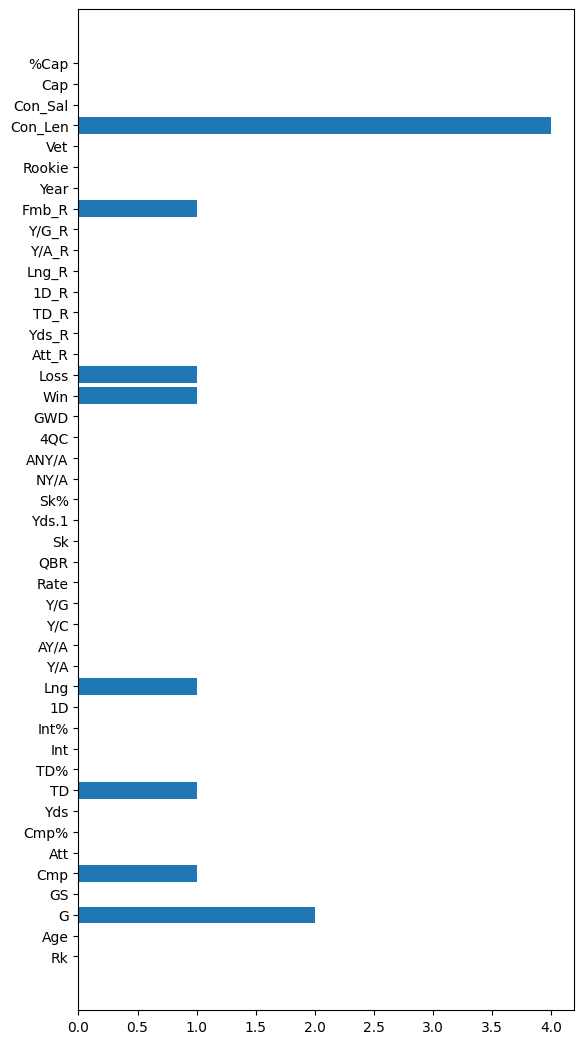

[{'Rk': 0, 'Age': 0, 'G': 2, 'GS': 0, 'Cmp': 1, 'Att': 0, 'Cmp%': 0, 'Yds': 0, 'TD': 1, 'TD%': 0, 'Int': 0, 'Int%': 0, '1D': 0, 'Lng': 1, 'Y/A': 0, 'AY/A': 0, 'Y/C': 0, 'Y/G': 0, 'Rate': 0, 'QBR': 0, 'Sk': 0, 'Yds.1': 0, 'Sk%': 0, 'NY/A': 0, 'ANY/A': 0, '4QC': 0, 'GWD': 0, 'Win': 1, 'Loss': 1, 'Att_R': 0, 'Yds_R': 0, 'TD_R': 0, '1D_R': 0, 'Lng_R': 0, 'Y/A_R': 0, 'Y/G_R': 0, 'Fmb_R': 1, 'Year': 0, 'Rookie': 0, 'Vet': 0, 'Con_Len': 4, 'Con_Sal': 0, 'Cap': 0, '%Cap': 0}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 44))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.40600281925357673, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.004756653941987422, 'reg_lambda': 2.272313098883824}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.17771939561560435


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.8222806043843957, 'rf': 0.8247787448963979, 'xgboost': 0.8954672705191055, 'extra_tree': 0.8479048387694466, 'xgb_limitdepth': 1.2619461044757936}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 2.0096594827216967e-05, 'wall_clock_time': 17.65847158432007, 'metric_for_logging': {'pred_time': 2.0096594827216967e-05, 'train_loss': 0.5479979190614777}, 'val_loss': 0.8222806043843957, 'training_iteration': 1, 'config': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.40600281925357673, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.004756653941987422, 'reg_lambda': 2.272313098883824}, 'config/n_estimators': 4, 'config/num_leaves': 4, 'config/min_child_samples': 9, 'config/learning_rate': 0.40600281925357673, 'config/log_max_bin': 8, 'config/colsample_bytree': 1.0, 'config/reg_alpha': 0.004756653941987422, 'config/reg_lambda': 2.272313098883824, 'experiment_tag': 'exp', 'time_total_s': 0.047208547592163086}


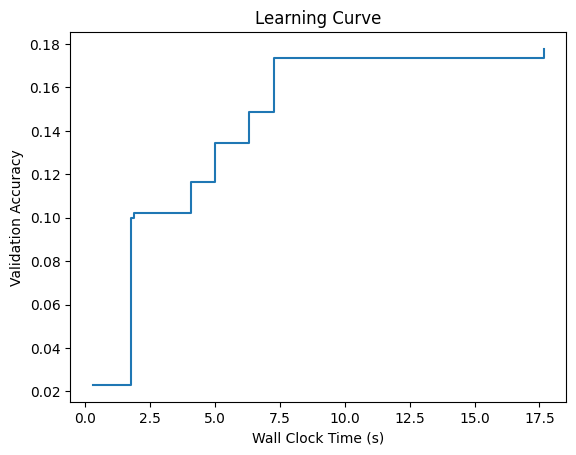

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [-0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
  0. -0.  0. -1.  0. -2.  0. -0. -1. -0.  0.  0. -2. -0.  0.  0. -0.  0.
 -1.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0. -1. -2. -2.  0.  0. -0.
  0. -0. -1. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
 -0. -0.  0. -0.  0.  0.  0. -1. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.
  0. -1.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0. -1.  0.
 -1. -1. -0.  0. -1.  0.  0.  0.  0. -1.  0.  0. -0.  0.  0.  0. -0. -1.
 -1. -1.  0.  0.  0.  0. -1.  0.  0. -2. -1. -0. -0.  0.  0.  0.  0. -0.
  0. -0.  0. -1. -0. -0.  0.  0. -1.  0.  0.  0.  0.  0. -2. -1. -0. -0.
 -1. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.
  0. -1.  0. -0.  0. -1.  0. -0.  0.  0.  0.]


In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.40577254805322815
mse = 0.5287958115183246
mae = 0.29842931937172773


In [ ]:
# PrRedict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [-0.  0. -0.  0.  0.  0. -2.  0. -0.  0.  0.  0. -0. -1. -0.  0.  0. -1.
  0. -0. -0. -0.  0. -1. -2. -2. -0.  0. -0.  0. -1.  0.  0.  0. -2. -0.
 -0.  0.  0. -0.  0.  0. -0.  0. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -0. -0.  0. -1.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.
  0. -0.  0.  0. -1.  0. -1.  0.  0.  0.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.21925227113906365
mse = 1.329268292682927
mae = 0.524390243902439


In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year < 2023]
feeder_test = feeder_test[feeder_test.Player == "Aaron Rodgers"]
feeder_test

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Lamar Jackson"]
print(feeder_test.head(6))
feeder_test = feeder_test.drop(['Player', 'Pos'], axis=1)
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = automl.predict(feeder_test).round()
print('Predicted labels', y_pred)

### **Regression For Contract Length QB 2.2 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/finalQB.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "extra_tree"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 04-04 18:37:18] {2726} INFO - task = regression
[flaml.automl.automl: 04-04 18:37:18] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 04-04 18:37:18] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-04 18:37:18] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 04-04 18:37:18] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 04-04 18:37:18] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-04 18:37:18] {3472} INFO - Estimated sufficient time budget=792s. Estimated necessary time budget=6s.
[flaml.automl.automl: 04-04 18:37:18] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.9402,	best estimator lgbm's best error=0.9402
[flaml.automl.automl: 04-04 18:37:18] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-04 18:37:18] {3519} INFO -  at 0.4s,	estimator lgbm's best error=0.9402,	best estimator 

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.2") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("ConLenModel_2.2.pkl")

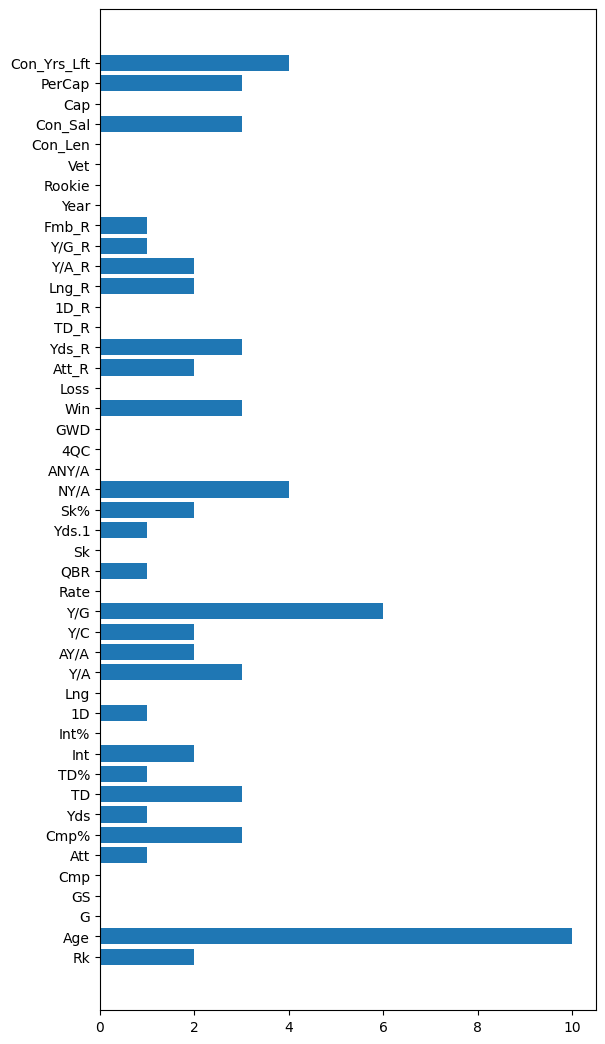

[{'Rk': 2, 'Age': 10, 'G': 0, 'GS': 0, 'Cmp': 0, 'Att': 1, 'Cmp%': 3, 'Yds': 1, 'TD': 3, 'TD%': 1, 'Int': 2, 'Int%': 0, '1D': 1, 'Lng': 0, 'Y/A': 3, 'AY/A': 2, 'Y/C': 2, 'Y/G': 6, 'Rate': 0, 'QBR': 1, 'Sk': 0, 'Yds.1': 1, 'Sk%': 2, 'NY/A': 4, 'ANY/A': 0, '4QC': 0, 'GWD': 0, 'Win': 3, 'Loss': 0, 'Att_R': 2, 'Yds_R': 3, 'TD_R': 0, '1D_R': 0, 'Lng_R': 2, 'Y/A_R': 2, 'Y/G_R': 1, 'Fmb_R': 1, 'Year': 0, 'Rookie': 0, 'Vet': 0, 'Con_Len': 0, 'Con_Sal': 3, 'Cap': 0, 'PerCap': 3, 'Con_Yrs_Lft': 4}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 45))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 23, 'num_leaves': 4, 'min_child_samples': 6, 'learning_rate': 0.2877448089028244, 'log_max_bin': 8, 'colsample_bytree': 0.7368835295972516, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.34192804021791523}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.2532181947887706


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.7467818052112294, 'rf': 0.8186189773577615, 'xgboost': 0.7754348361346265, 'extra_tree': 0.918930100749743, 'xgb_limitdepth': 0.8152790281949267}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00015819904416106468, 'wall_clock_time': 54.44869518280029, 'metric_for_logging': {'pred_time': 0.00015819904416106468, 'train_loss': 0.151569445557256}, 'val_loss': 0.7467818052112294, 'training_iteration': 1, 'config': {'n_estimators': 23, 'num_leaves': 4, 'min_child_samples': 6, 'learning_rate': 0.2877448089028244, 'log_max_bin': 8, 'colsample_bytree': 0.7368835295972516, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.34192804021791523}, 'config/n_estimators': 23, 'config/num_leaves': 4, 'config/min_child_samples': 6, 'config/learning_rate': 0.2877448089028244, 'config/log_max_bin': 8, 'config/colsample_bytree': 0.7368835295972516, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 0.34192804021791523, 'experiment_tag': 'exp', 'time_total_s': 0.1788170337677002}


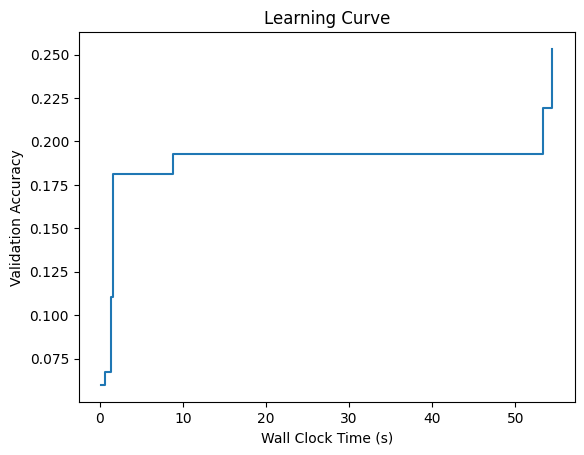

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [ 0.  0.  0.  2.  1.  4.  2.  4.  0.  0.  2.  2.  1.  0.  0. -0.  0. -0.
  0.  0.  0.  1.  1. -0.  1.  0.  1.  0.  0.  0. -0.  2.  4.  0.  1.  1.
  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  1.  1.  1.  3.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0. -0.  3.
  1.  0.  2.  1. -0.  0.  0.  1.  1.  2. -0.  1.  0. -0.  0.  3.  0.  1.
  0.  1.  0.  0.  0.  1.  0.  0.  0. -0.  0.  1.  0.  1.  0.  1.  0.  1.
  2.  0.  0.  0.  1.  1.  0.  0.  7. -0.  0.  3.  0. -0.  1.  0.  2.  0.
  0.  1. -0. -0. -0.  1.  1.  4.  0.  1.  0.  1.  2. -0.  1.  0.  1.  0.
  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  1.  4.
  0.  0. -0.  5.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1. -0.
  1.  0.  1.  0.  0.  0.  0. -0.  1.  1.  1.  4.  0.  0.  0.  0.  1.  0.
  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.]


In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.7687895805950532
mse = 0.4186046511627907
mae = 0.35348837209302325


In [ ]:
# PrRedict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [ 1. -0.  1. -0.  2.  1.  0.  0.  2.  2.  0.  3. -0.  3.  0.  0. -0.  0.
  0.  0. -0.  0.  1.  1.  0.  0.  0.  1.  0. -0. -0.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  1.  2.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  2.  0.
  0.  0. -0.  0.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.25094377111066946
mse = 1.1206896551724137
mae = 0.5689655172413793


In [ ]:
feeder[feeder.Player == "Aaron Rodgers"]

In [ ]:
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year < 2023]
feeder_test = feeder_test[feeder_test.Player == "Aaron Rodgers"]
feeder_test

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Player == "Justin Herbert"]
targets = feeder_test['Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
#feeder_test.at[327, 'Con_Yrs_Lft'] = 0
y_pred = automl.predict(feeder_test)
print('Predicted Contract Length:', int(y_pred[0]))
print('-------------------------------------------')
print(feeder_test)

Predicted Contract Length: 0
-------------------------------------------
          Rk       Age         G        GS       Cmp       Att      Cmp%  \
327 -1.61607 -0.863773  1.503549  1.531532  2.241911  2.123342  0.990769   

          Yds        TD       TD%  ...    Y/G_R     Fmb_R  Year  Rookie  Vet  \
327  1.926465  1.347008  0.073249  ... -0.29501  1.200306  2022       1    0   

     Con_Len   Con_Sal        Cap    PerCap  Con_Yrs_Lft  
327        4  26578755  208200000  0.031915            0  

[1 rows x 45 columns]


### **Regression For Contract Length QB 2.3 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "extra_tree"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 04-06 20:05:32] {2726} INFO - task = regression
[flaml.automl.automl: 04-06 20:05:32] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 04-06 20:05:32] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-06 20:05:32] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 04-06 20:05:32] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 04-06 20:05:32] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-06 20:05:34] {3472} INFO - Estimated sufficient time budget=13671s. Estimated necessary time budget=96s.
[flaml.automl.automl: 04-06 20:05:34] {3519} INFO -  at 1.5s,	estimator lgbm's best error=0.9297,	best estimator lgbm's best error=0.9297
[flaml.automl.automl: 04-06 20:05:34] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-06 20:05:36] {3519} INFO -  at 3.5s,	estimator lgbm's best error=0.9297,	best estimat

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.2") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("ConLenModel_2.2.pkl")

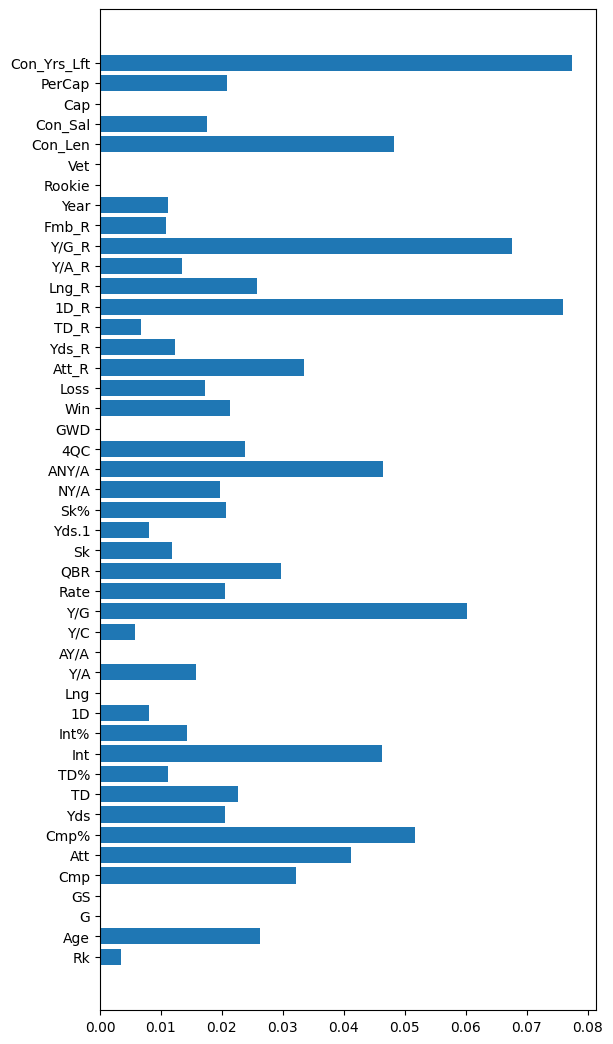

[{'Rk': 0.0034366296604275703, 'Age': 0.026289181783795357, 'G': 0.0, 'GS': 0.0, 'Cmp': 0.03214544430375099, 'Att': 0.04117492213845253, 'Cmp%': 0.051659803837537766, 'Yds': 0.020516563206911087, 'TD': 0.02257685549557209, 'TD%': 0.011174817569553852, 'Int': 0.046289049088954926, 'Int%': 0.014355463907122612, '1D': 0.008093680255115032, 'Lng': 0.0, 'Y/A': 0.01571904495358467, 'AY/A': 0.0, 'Y/C': 0.005702163092792034, 'Y/G': 0.06023501232266426, 'Rate': 0.02047879248857498, 'QBR': 0.029670750722289085, 'Sk': 0.011894946917891502, 'Yds.1': 0.008092455565929413, 'Sk%': 0.020740477368235588, 'NY/A': 0.019690565764904022, 'ANY/A': 0.0464916005730629, '4QC': 0.023723600432276726, 'GWD': 0.0, 'Win': 0.021264972165226936, 'Loss': 0.017260581254959106, 'Att_R': 0.03350386023521423, 'Yds_R': 0.012289191596210003, 'TD_R': 0.006669793743640184, '1D_R': 0.0759337916970253, 'Lng_R': 0.02576550841331482, 'Y/A_R': 0.013482729904353619, 'Y/G_R': 0.06765996664762497, 'Fmb_R': 0.010806909762322903, 'Year

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 45))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

xgboost


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 11, 'max_leaves': 14, 'min_child_weight': 6.372849480524571, 'learning_rate': 0.34190160677336257, 'subsample': 0.9517459550978583, 'colsample_bylevel': 0.7921692580620031, 'colsample_bytree': 0.7391027665626684, 'reg_alpha': 0.02830512804223385, 'reg_lambda': 29.996952189452685}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.19993425560113065


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.8289876185595018, 'rf': 0.8468493479882462, 'xgboost': 0.8000657443988693, 'extra_tree': 0.8221714854250586, 'xgb_limitdepth': 0.9860177809581762}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00024754391160122183, 'wall_clock_time': 33.40989279747009, 'metric_for_logging': {'pred_time': 0.00024754391160122183, 'train_loss': 0.3268382488319491}, 'val_loss': 0.8000657443988693, 'training_iteration': 1, 'config': {'n_estimators': 11, 'max_leaves': 14, 'min_child_weight': 6.372849480524571, 'learning_rate': 0.34190160677336257, 'subsample': 0.9517459550978583, 'colsample_bylevel': 0.7921692580620031, 'colsample_bytree': 0.7391027665626684, 'reg_alpha': 0.02830512804223385, 'reg_lambda': 29.996952189452685}, 'config/n_estimators': 11, 'config/max_leaves': 14, 'config/min_child_weight': 6.372849480524571, 'config/learning_rate': 0.34190160677336257, 'config/subsample': 0.9517459550978583, 'config/colsample_bylevel': 0.7921692580620031, 'config/colsample_bytree': 0.7391027665626684, 'config/reg_alpha': 0.02830512804223385, 'config/reg_lambda': 29.996952189452685, 'experiment_tag': 'exp', 'time_total_s': 0.6743810176849365}


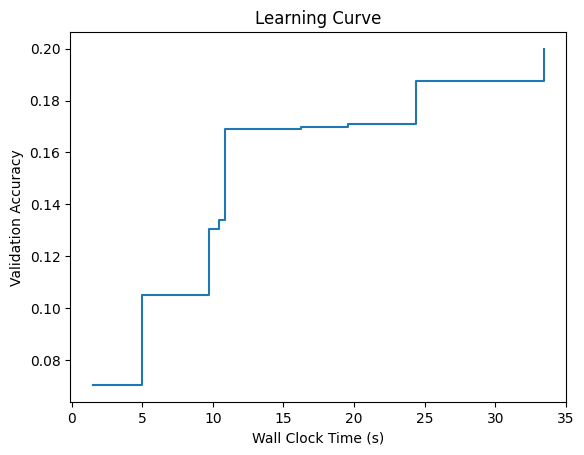

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [ 1.  0.  0.  1.  1.  1.  1.  2.  0.  0.  1.  1.  1. -0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.
  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  1.
  0.  0.  2.  1.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.
  1.  0.  1.  0.  0.  1.  0. -0.  2.  0.  0.  1.  0.  0.  1.  0.  1.  1.
  0.  0.  0. -0. -0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.
  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.
  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.
  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.]


In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.7384672967156358
mse = 0.12093023255813953
mae = 0.12093023255813953


In [ ]:
# PrRedict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [ 1.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0. -0.  0.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.
  1.  0.  0.  0.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = -0.0386819484240688
mse = 0.43103448275862066
mae = 0.39655172413793105


In [ ]:
feeder[feeder.Player == "Aaron Rodgers"]

In [ ]:
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year < 2023]
feeder_test = feeder_test[feeder_test.Player == "Aaron Rodgers"]
feeder_test

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/QB_data/QBdf.csv")
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
targets = feeder_test['Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[327, 'Con_Yrs_Lft'] = 0
y_pred = automl.predict(feeder_test)
print('Predicted Contract Length:', int(y_pred[0]))
print('-------------------------------------------')
print(feeder_test)

Predicted Contract Length: 1
-------------------------------------------
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
340 -0.989763 -0.648621  1.318997  1.363828  1.087916  1.029572  0.814355   

          Yds        TD       TD%  ...    Y/G_R     Fmb_R  Year  Rookie  Vet  \
340  0.914268  0.403686 -0.150613  ...  2.00349  0.643021  2022       1    0   

     Con_Len   Con_Sal        Cap    PerCap  Con_Yrs_Lft  
340        4  25664056  208200000  0.030817            0  

[1 rows x 45 columns]


### **Classification For Contract Length QB 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/finalQB.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-11 22:23:53] {1768} INFO - task = multiclass
[flaml.automl.logger: 04-11 22:23:53] {1775} INFO - Data split method: stratified
[flaml.automl.logger: 04-11 22:23:53] {1778} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 14 to 28


[flaml.automl.logger: 04-11 22:23:53] {1891} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-11 22:23:53] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-11 22:23:53] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-11 22:23:53] {2479} INFO - Estimated sufficient time budget=1580s. Estimated necessary time budget=36s.
[flaml.automl.logger: 04-11 22:23:53] {2526} INFO -  at 0.3s,	estimator lgbm's best error=0.3476,	best estimator lgbm's best error=0.3476
[flaml.automl.logger: 04-11 22:23:53] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-11 22:23:53] {2526} INFO -  at 0.4s,	estimator lgbm's best error=0.3476,	best estimator lgbm's best error=0.3476
[flaml.automl.logger: 04-11 22:23:53] {2341} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-11 22:23:53] {2526} INFO -  at 0.6s,	estimator lgbm's best error=0.3190

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:23:54] {2526} INFO -  at 0.9s,	estimator xgboost's best error=0.3286,	best estimator lgbm's best error=0.3190
[flaml.automl.logger: 04-11 22:23:54] {2341} INFO - iteration 4, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:23:54] {2526} INFO -  at 1.1s,	estimator lgbm's best error=0.2667,	best estimator lgbm's best error=0.2667
[flaml.automl.logger: 04-11 22:23:54] {2341} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-11 22:23:54] {2526} INFO -  at 1.2s,	estimator lgbm's best error=0.2667,	best estimator lgbm's best error=0.2667
[flaml.automl.logger: 04-11 22:23:54] {2341} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-11 22:23:54] {2526} INFO -  at 1.5s,	estimator lgbm's best error=0.2524,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:54] {2341} INFO - iteration 7, current learner extra_tree
[flaml.automl.logger: 04-11 22:23:55] {2526} INFO -  at 1.7s,	estimator extra_tree's best error=0.3381,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:55] {2341} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 04-11 22:23:55] {2526} INFO -  at 1.9s,	estimator lgbm's best error=0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:23:55] {2526} INFO -  at 2.4s,	estimator xgboost's best error=0.3286,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:55] {2341} INFO - iteration 11, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:23:56] {2526} INFO -  at 2.7s,	estimator xgboost's best error=0.2810,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:56] {2341} INFO - iteration 12, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:23:56] {2526} INFO -  at 2.9s,	estimator extra_tree's best error=0.3238,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:56] {2341} INFO - iteration 13, current learner rf
[flaml.automl.logger: 04-11 22:23:56] {2526} INFO -  at 3.1s,	estimator rf's best error=0.3571,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:56] {2341} INFO - iteration 14, current learner rf
[flaml.automl.logger: 04-11 22:23:56] {2526} INFO -  at 3.3s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:56] {2341} INFO - iteration 15, current learner rf
[flaml.automl.logger: 04-11 22:23:56] {2526} INFO -  at 3.5s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2524
[flaml.automl.logger: 04-11 22:23:56] {2341} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 04-11 22:23:57] {2526} INFO -  at 3.8s,	estimator lgbm's best error=0.2429,	best est

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:23:57] {2526} INFO -  at 4.2s,	estimator xgboost's best error=0.2810,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:23:57] {2341} INFO - iteration 18, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:23:57] {2526} INFO -  at 4.5s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:23:57] {2341} INFO - iteration 19, current learner rf
[flaml.automl.logger: 04-11 22:23:58] {2526} INFO -  at 4.8s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:23:58] {2341} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 04-11 22:23:58] {2526} INFO -  at 5.2s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:23:58] {2341} INFO - iteration 21, current learner rf
[flaml.automl.logger: 04-11 22:23:58] {2526} INFO -  at 5.5s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:23:58] {2341} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 04-11 22:23:59] {2526} INFO -  at 5.7s,	estimator lgbm's best error=0.2429,	best estim

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:02] {2526} INFO -  at 9.3s,	estimator xgboost's best error=0.2810,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:02] {2341} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:03] {2526} INFO -  at 9.8s,	estimator xgboost's best error=0.2810,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:03] {2341} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:03] {2526} INFO -  at 10.4s,	estimator xgboost's best error=0.2810,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:03] {2341} INFO - iteration 30, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:03] {2526} INFO -  at 10.6s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:04] {2341} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-11 22:24:04] {2526} INFO -  at 11.0s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:04] {2341} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-11 22:24:04] {2526} INFO -  at 11.4s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:04] {2341} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:05] {2526} INFO -  at 11.7s,	estimator xgboost's best error=0.2619,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:05] {2341} INFO - iteration 34, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:05] {2526} INFO -  at 12.1s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:05] {2341} INFO - iteration 35, current learner rf
[flaml.automl.logger: 04-11 22:24:05] {2526} INFO -  at 12.3s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:05] {2341} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 04-11 22:24:05] {2526} INFO -  at 12.5s,	estimator extra_tree's best error=0.3238,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:05] {2341} INFO - iteration 37, current learner rf
[flaml.automl.logger: 04-11 22:24:06] {2526} INFO -  at 12.8s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:06] {2341} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:06] {2526} INFO -  at 13.2s,	estimator xgboost's best error=0.2619,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:06] {2341} INFO - iteration 39, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:06] {2526} INFO -  at 13.4s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:06] {2341} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:07] {2526} INFO -  at 13.8s,	estimator xgboost's best error=0.2619,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:07] {2341} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:07] {2526} INFO -  at 14.3s,	estimator xgboost's best error=0.2619,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:07] {2341} INFO - iteration 42, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:08] {2526} INFO -  at 15.6s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:08] {2341} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:09] {2526} INFO -  at 16.0s,	estimator xgboost's best error=0.2619,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:09] {2341} INFO - iteration 44, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:09] {2526} INFO -  at 16.2s,	estimator extra_tree's best error=0.3238,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:09] {2341} INFO - iteration 45, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:09] {2526} INFO -  at 16.6s,	estimator xgboost's best error=0.2571,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:09] {2341} INFO - iteration 46, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:10] {2526} INFO -  at 17.0s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:10] {2341} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:11] {2526} INFO -  at 17.7s,	estimator xgboost's best error=0.2571,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:11] {2341} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 04-11 22:24:11] {2526} INFO -  at 17.9s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:11] {2341} INFO - iteration 49, current learner rf
[flaml.automl.logger: 04-11 22:24:11] {2526} INFO -  at 18.1s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:11] {2341} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 04-11 22:24:11] {2526} INFO -  at 18.4s,	estimator extra_tree's best error=0.3238,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:11] {2341} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 04-11 22:24:13] {2526} INFO -  at 20.3s,	estimator lgbm's best 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:17] {2526} INFO -  at 24.5s,	estimator xgboost's best error=0.2571,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:17] {2341} INFO - iteration 64, current learner lgbm
[flaml.automl.logger: 04-11 22:24:18] {2526} INFO -  at 24.7s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:18] {2341} INFO - iteration 65, current learner rf
[flaml.automl.logger: 04-11 22:24:18] {2526} INFO -  at 25.0s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:18] {2341} INFO - iteration 66, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:18] {2526} INFO -  at 25.5s,	estimator xgboost's best error=0.2571,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:18] {2341} INFO - iteration 67, current learner rf
[flaml.automl.logger: 04-11 22:24:19] {2526} INFO -  at 25.8s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:19] {2341} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 04-11 22:24:19] {2526} INFO -  at 26.1s,	estimator lgbm's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:19] {2341} INFO - iteration 69, current learner rf
[flaml.automl.logger: 04-11 22:24:19] {2526} INFO -  at 26.3s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:19] {2341} INFO - iteration 70, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:20] {2526} INFO -  at 27.0s,	estimator xgb_limitdepth's best error=0.2714,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:20] {2341} INFO - iteration 71, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:20] {2526} INFO -  at 27.6s,	estimator xgb_limitdepth's best error=0.2714,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:20] {2341} INFO - iteration 72, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:21] {2526} INFO -  at 28.4s,	estimator xgb_limitdepth's best error=0.2667,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:21] {2341} INFO - iteration 73, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:22] {2526} INFO -  at 28.8s,	estimator xgb_limitdepth's best error=0.2667,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:22] {2341} INFO - iteration 74, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:22] {2526} INFO -  at 29.4s,	estimator xgboost's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:22] {2341} INFO - iteration 75, current learner extra_tree
[flaml.automl.logger: 04-11 22:24:23] {2526} INFO -  at 29.6s,	estimator extra_tree's best error=0.3238,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:23] {2341} INFO - iteration 76, current learner rf
[flaml.automl.logger: 04-11 22:24:23] {2526} INFO -  at 29.9s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:23] {2341} INFO - iteration 77, current learner rf
[flaml.automl.logger: 04-11 22:24:23] {2526} INFO -  at 30.1s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:23] {2341} INFO - iteration 78, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:24] {2526} INFO -  at 30.7s,	estimator xgboost's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:24] {2341} INFO - iteration 79, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:25] {2526} INFO -  at 32.1s,	estimator xgboost's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:25] {2341} INFO - iteration 80, current learner rf
[flaml.automl.logger: 04-11 22:24:25] {2526} INFO -  at 32.5s,	estimator rf's best error=0.3048,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:25] {2341} INFO - iteration 81, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:27] {2526} INFO -  at 34.4s,	estimator xgb_limitdepth's best error=0.2667,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:27] {2341} INFO - iteration 82, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:28] {2526} INFO -  at 35.2s,	estimator xgboost's best error=0.2429,	best estimator lgbm's best error=0.2429
[flaml.automl.logger: 04-11 22:24:28] {2341} INFO - iteration 83, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:29] {2526} INFO -  at 36.2s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:29] {2341} INFO - iteration 84, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:30] {2526} INFO -  at 36.8s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:30] {2341} INFO - iteration 85, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:30] {2526} INFO -  at 37.0s,	estimator extra_tree's best error=0.3238,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:30] {2341} INFO - iteration 86, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:31] {2526} INFO -  at 38.2s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:31] {2341} INFO - iteration 87, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:32] {2526} INFO -  at 39.3s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:32] {2341} INFO - iteration 88, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:33] {2526} INFO -  at 40.0s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:33] {2341} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:34] {2526} INFO -  at 40.7s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:34] {2341} INFO - iteration 90, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:34] {2526} INFO -  at 40.9s,	estimator extra_tree's best error=0.3238,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:34] {2341} INFO - iteration 91, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:35] {2526} INFO -  at 42.3s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:35] {2341} INFO - iteration 92, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:36] {2526} INFO -  at 42.7s,	estimator xgb_limitdepth's best error=0.2571,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:36] {2341} INFO - iteration 93, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:37] {2526} INFO -  at 43.8s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:37] {2341} INFO - iteration 94, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:40] {2526} INFO -  at 46.7s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:40] {2341} INFO - iteration 95, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:40] {2526} INFO -  at 46.9s,	estimator lgbm's best error=0.2429,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:40] {2341} INFO - iteration 96, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:40] {2526} INFO -  at 47.6s,	estimator xgb_limitdepth's best error=0.2571,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:40] {2341} INFO - iteration 97, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:41] {2526} INFO -  at 48.1s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:41] {2341} INFO - iteration 98, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:43] {2526} INFO -  at 50.1s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:43] {2341} INFO - iteration 99, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:44] {2526} INFO -  at 50.9s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:44] {2341} INFO - iteration 100, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:44] {2526} INFO -  at 51.2s,	estimator rf's best error=0.3048,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:44] {2341} INFO - iteration 101, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:45] {2526} INFO -  at 51.9s,	estimator xgb_limitdepth's best error=0.2381,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:45] {2341} INFO - iteration 102, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:45] {2526} INFO -  at 52.5s,	estimator xgb_limitdepth's best error=0.2381,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:45] {2341} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 04-11 22:24:46] {2526} INFO -  at 52.8s,	estimator lgbm's best error=0.2429,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:46] {2341} INFO - iteration 104, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:46] {2526} INFO -  at 53.4s,	estimator xgb_limitdepth's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-11 22:24:46] {2341} INFO - iteration 105, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:47] {2526} INFO -  at 54.2s,	estimator xgb_limitdepth's best error=0.2238,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:47] {2341} INFO - iteration 106, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:48] {2526} INFO -  at 55.0s,	estimator xgb_limitdepth's best error=0.2238,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:48] {2341} INFO - iteration 107, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:49] {2526} INFO -  at 55.8s,	estimator xgb_limitdepth's best error=0.2238,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:49] {2341} INFO - iteration 108, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:49] {2526} INFO -  at 56.1s,	estimator xgb_limitdepth's best error=0.2238,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:49] {2341} INFO - iteration 109, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-11 22:24:50] {2526} INFO -  at 56.9s,	estimator xgb_limitdepth's best error=0.2238,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:50] {2341} INFO - iteration 110, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:24:52] {2526} INFO -  at 58.8s,	estimator xgb_limitdepth's best error=0.2238,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:52] {2341} INFO - iteration 111, current learner lgbm
[flaml.automl.logger: 04-11 22:24:53] {2526} INFO -  at 59.7s,	estimator lgbm's best error=0.2429,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:53] {2341} INFO - iteration 112, current learner extra_tree
[flaml.automl.logger: 04-11 22:24:53] {2526} INFO -  at 59.9s,	estimator extra_tree's best error=0.3238,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:53] {2341} INFO - iteration 113, current learner lrl1


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 04-11 22:24:53] {2526} INFO -  at 60.0s,	estimator lrl1's best error=0.3333,	best estimator xgb_limitdepth's best error=0.2238
[flaml.automl.logger: 04-11 22:24:53] {2790} INFO - retrain xgb_limitdepth for 0.1s
[flaml.automl.logger: 04-11 22:24:53] {2797} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.6995337995779759, colsample_bynode=None,
              colsample_bytree=0.714785478682788, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8210689282647788,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=0.1682956133926684, missing=nan,
              monotone_constraints=None, n_est

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

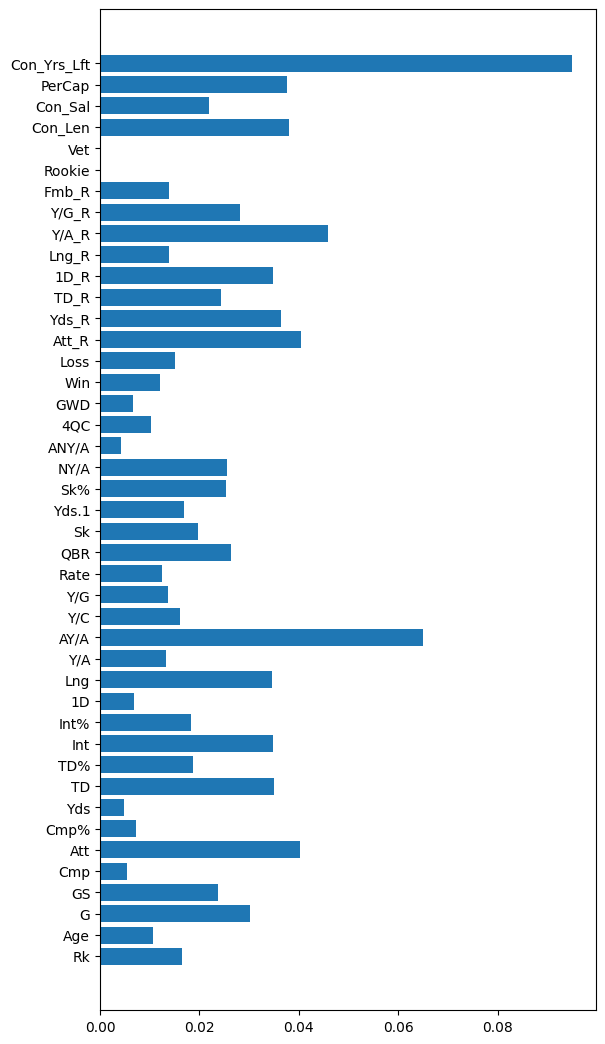

[{'Rk': 0.016583304852247238, 'Age': 0.010672185570001602, 'G': 0.030172880738973618, 'GS': 0.02366698533296585, 'Cmp': 0.005378649104386568, 'Att': 0.04019436240196228, 'Cmp%': 0.007232313510030508, 'Yds': 0.004752022679895163, 'TD': 0.03504786640405655, 'TD%': 0.01870681904256344, 'Int': 0.034727390855550766, 'Int%': 0.018281269818544388, '1D': 0.006934453267604113, 'Lng': 0.03464922308921814, 'Y/A': 0.013223170302808285, 'AY/A': 0.06490201503038406, 'Y/C': 0.016167862340807915, 'Y/G': 0.013782531023025513, 'Rate': 0.012430151924490929, 'QBR': 0.026348790153861046, 'Sk': 0.019694210961461067, 'Yds.1': 0.01693635620176792, 'Sk%': 0.02531895972788334, 'NY/A': 0.025590959936380386, 'ANY/A': 0.00429160101339221, '4QC': 0.010246706195175648, 'GWD': 0.006640463601797819, 'Win': 0.01200350746512413, 'Loss': 0.0150148905813694, 'Att_R': 0.04044058173894882, 'Yds_R': 0.03643585368990898, 'TD_R': 0.024311739951372147, '1D_R': 0.03482666239142418, 'Lng_R': 0.013981791213154793, 'Y/A_R': 0.04578

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 43))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

xgb_limitdepth


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'max_depth': 5, 'min_child_weight': 0.1682956133926684, 'learning_rate': 0.8210689282647788, 'subsample': 0.9661106209889765, 'colsample_bylevel': 0.6995337995779759, 'colsample_bytree': 0.714785478682788, 'reg_alpha': 0.003044067918573405, 'reg_lambda': 1.8459603436258243}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7761904761904762


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.24285714285714288, 'rf': 0.30476190476190473, 'xgboost': 0.2333333333333333, 'extra_tree': 0.3238095238095238, 'xgb_limitdepth': 0.22380952380952382, 'lrl1': 0.33333333333333337}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00035853272392636254, 'wall_clock_time': 54.246825218200684, 'metric_for_logging': {'pred_time': 0.00035853272392636254, 'train_loss': 0.0}, 'val_loss': 0.22380952380952382, 'training_iteration': 1, 'config': {'n_estimators': 8, 'max_depth': 5, 'min_child_weight': 0.1682956133926684, 'learning_rate': 0.8210689282647788, 'subsample': 0.9661106209889765, 'colsample_bylevel': 0.6995337995779759, 'colsample_bytree': 0.714785478682788, 'reg_alpha': 0.003044067918573405, 'reg_lambda': 1.8459603436258243}, 'config/n_estimators': 8, 'config/max_depth': 5, 'config/min_child_weight': 0.1682956133926684, 'config/learning_rate': 0.8210689282647788, 'config/subsample': 0.9661106209889765, 'config/colsample_bylevel': 0.6995337995779759, 'config/colsample_bytree': 0.714785478682788, 'config/reg_alpha': 0.003044067918573405, 'config/reg_lambda': 1.8459603436258243, 'experiment_tag': 'exp', 'time_total_s': 0.8820068836212158}


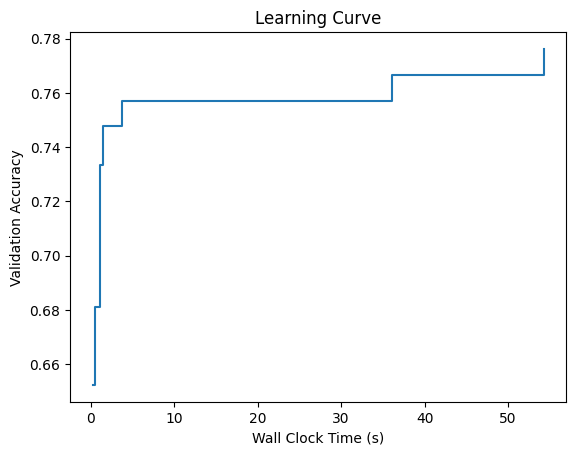

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 1 1 2 0 1 1 0 2
 0 0 0 0 0 1 0 1 1 0 2 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 1 1 0 1 0 0 2 0 0 0 0 0 0 2 0
 1 1 0 0 0 0 0 2 1 0 1 0 0 0 2 0 0 0 1 2 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1
 1 1 1 0 0 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 1 1 2 0 1 1 0 2
 0 0 0 0 0 1 0 1 1 0 2 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 1 1 0 1 0 0 2 0 0 0 0 0 0 2 0
 1 1 0 0 0 0 0 2 1 0 1 0 0 0 2 0 0 0 1 2 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1
 1 1 1 0 0 1 0 1 0 0 0]


In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 1.0
log_loss = 0.049413960014890033


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 2 1 0 0 2 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1]
-------------------------------------------------------------------------------
True labels      [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 2 2 1 0 0 1 0 0 2
 1 0 0 0 0 0 2 0 1 0 2 0 0 0 0 0]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.660377358490566
log_loss = 0.7338433283690827


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == "Lamar Jackson"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
#feeder_test.at[288, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Lamar Jackson"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
292 -0.369023 -0.890992  0.346853  0.491551  0.348086  0.371319  0.222859   

          Yds       TD       TD%  ...     Lng_R     Y/A_R    Y/G_R     Fmb_R  \
292  0.455678  0.20489  0.083696  ...  1.109982  1.003462  4.01626  0.514166   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
292       1    0        4  9471648  0.012975            0  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
            Player  New_Con_Len
352  Lamar Jackson            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0]


### **Classification For Contract Length QB 1.1 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-18 17:30:29] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-18 17:30:29] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-18 17:30:29] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 17 to 34


[flaml.automl.logger: 04-18 17:30:29] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-18 17:30:29] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-18 17:30:29] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-18 17:30:30] {2336} INFO - Estimated sufficient time budget=3593s. Estimated necessary time budget=83s.
[flaml.automl.logger: 04-18 17:30:30] {2383} INFO -  at 0.5s,	estimator lgbm's best error=0.4087,	best estimator lgbm's best error=0.4087
[flaml.automl.logger: 04-18 17:30:30] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-18 17:30:30] {2383} INFO -  at 0.7s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-18 17:30:30] {2210} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-18 17:30:30] {2383} INFO -  at 0.8s,	estimator lgbm's best error=0.4043

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:31] {2383} INFO -  at 2.2s,	estimator xgboost's best error=0.3783,	best estimator xgboost's best error=0.3783
[flaml.automl.logger: 04-18 17:30:31] {2210} INFO - iteration 6, current learner xgboost
[flaml.automl.logger: 04-18 17:30:32] {2383} INFO -  at 2.4s,	estimator xgboost's best error=0.3652,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:32] {2210} INFO - iteration 7, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:32] {2383} INFO -  at 2.6s,	estimator xgboost's best error=0.3652,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:32] {2210} INFO - iteration 8, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:32] {2383} INFO -  at 2.8s,	estimator xgboost's best error=0.3652,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:32] {2210} INFO - iteration 9, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:32] {2383} INFO -  at 3.0s,	estimator xgboost's best error=0.3652,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:32] {2210} INFO - iteration 10, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:32] {2383} INFO -  at 3.2s,	estimator xgboost's best error=0.3652,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:32] {2210} INFO - iteration 11, current learner extra_tree
[flaml.automl.logger: 04-18 17:30:32] {2383} INFO -  at 3.3s,	estimator extra_tree's best error=0.4000,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:32] {2210} INFO - iteration 12, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:33] {2383} INFO -  at 3.5s,	estimator extra_tree's best error=0.4000,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:33] {2210} INFO - iteration 13, current learner extra_tree
[flaml.automl.logger: 04-18 17:30:33] {2383} INFO -  at 3.6s,	estimator extra_tree's best error=0.4000,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:33] {2210} INFO - iteration 14, current learner extra_tree
[flaml.automl.logger: 04-18 17:30:33] {2383} INFO -  at 3.8s,	estimator extra_tree's best error=0.4000,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-18 17:30:33] {2210} INFO - iteration 15, current learner xgboost
[flaml.automl.logger: 04-18 17:30:33] {2383} INFO -  at 4.0s,	estimator xgboost's best error=0.3609,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:33] {2210} INFO - iteration 16, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:33] {2383} INFO -  at 4.1s,	estimator extra_tree's best error=0.4000,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:33] {2210} INFO - iteration 17, current learner lgbm
[flaml.automl.logger: 04-18 17:30:33] {2383} INFO -  at 4.2s,	estimator lgbm's best error=0.3739,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:33] {2210} INFO - iteration 18, current learner extra_tree
[flaml.automl.logger: 04-18 17:30:34] {2383} INFO -  at 4.5s,	estimator extra_tree's best error=0.4000,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:34] {2210} INFO - iteration 19, current learner rf
[flaml.automl.logger: 04-18 17:30:34] {2383} INFO -  at 4.6s,	estimator rf's best error=0.4130,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:34] {2210} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-18 17:30:34] {2383} INFO -  at 4.7s,	estimator rf's

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:35] {2383} INFO -  at 6.1s,	estimator xgboost's best error=0.3609,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:35] {2210} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 04-18 17:30:35] {2383} INFO -  at 6.1s,	estimator lgbm's best error=0.3739,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:35] {2210} INFO - iteration 31, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:35] {2383} INFO -  at 6.2s,	estimator lgbm's best error=0.3696,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:35] {2210} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-18 17:30:35] {2383} INFO -  at 6.3s,	estimator lgbm's best error=0.3696,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:35] {2210} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 04-18 17:30:36] {2383} INFO -  at 6.5s,	estimator xgboost's best error=0.3609,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:36] {2210} INFO - iteration 34, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:36] {2383} INFO -  at 6.7s,	estimator lgbm's best error=0.3696,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:36] {2210} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 04-18 17:30:36] {2383} INFO -  at 6.9s,	estimator xgboost's best error=0.3609,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:36] {2210} INFO - iteration 36, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:36] {2383} INFO -  at 7.0s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.3609
[flaml.automl.logger: 04-18 17:30:36] {2210} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 04-18 17:30:36] {2383} INFO -  at 7.2s,	estimator xgboost's best error=0.3565,	best estimator xgboost's best error=0.3565
[flaml.automl.logger: 04-18 17:30:36] {2210} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:36] {2383} INFO -  at 7.3s,	estimator xgboost's best error=0.3565,	best estimator xgboost's best error=0.3565
[flaml.automl.logger: 04-18 17:30:36] {2210} INFO - iteration 39, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:37] {2383} INFO -  at 7.5s,	estimator xgboost's best error=0.3304,	best estimator xgboost's best error=0.3304
[flaml.automl.logger: 04-18 17:30:37] {2210} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:37] {2383} INFO -  at 7.8s,	estimator xgboost's best error=0.3304,	best estimator xgboost's best error=0.3304
[flaml.automl.logger: 04-18 17:30:37] {2210} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:37] {2383} INFO -  at 7.9s,	estimator xgboost's best error=0.3304,	best estimator xgboost's best error=0.3304
[flaml.automl.logger: 04-18 17:30:37] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-18 17:30:37] {2383} INFO -  at 8.0s,	estimator lgbm's best error=0.3174,	best estimator lgbm's best error=0.3174
[flaml.automl.logger: 04-18 17:30:37] {2210} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:37] {2383} INFO -  at 8.3s,	estimator xgboost's best error=0.3174,	best estimator lgbm's best error=0.3174
[flaml.automl.logger: 04-18 17:30:37] {2210} INFO - iteration 44, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:38] {2383} INFO -  at 8.5s,	estimator xgboost's best error=0.3174,	best estimator lgbm's best error=0.3174
[flaml.automl.logger: 04-18 17:30:38] {2210} INFO - iteration 45, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:38] {2383} INFO -  at 8.8s,	estimator xgboost's best error=0.3174,	best estimator lgbm's best error=0.3174
[flaml.automl.logger: 04-18 17:30:38] {2210} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 04-18 17:30:38] {2383} INFO -  at 8.9s,	estimator lgbm's best error=0.3174,	best estimator lgbm's best error=0.3174
[flaml.automl.logger: 04-18 17:30:38] {2210} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 04-18 17:30:38] {2383} INFO -  at 9.1s,	estimator xgboost's best error=0.3174,	best estimator lgbm's best error=0.3174
[flaml.automl.logger: 04-18 17:30:38] {2210} INFO - iteration 48, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:38] {2383} INFO -  at 9.3s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:38] {2210} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 04-18 17:30:39] {2383} INFO -  at 9.4s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:39] {2210} INFO - iteration 50, current learner lgbm
[flaml.automl.logger: 04-18 17:30:39] {2383} INFO -  at 9.5s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:39] {2210} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 04-18 17:30:39] {2383} INFO -  at 9.7s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:39] {2210} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 04-18 17:30:39] {2383} INFO -  at 9.8s,	estimator lgbm's best error=0.2739,	be

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:44] {2383} INFO -  at 14.9s,	estimator xgboost's best error=0.3130,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:44] {2210} INFO - iteration 75, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:44] {2383} INFO -  at 15.0s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:44] {2210} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 04-18 17:30:44] {2383} INFO -  at 15.1s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:44] {2210} INFO - iteration 77, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:45] {2383} INFO -  at 15.5s,	estimator xgboost's best error=0.3130,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:45] {2210} INFO - iteration 78, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:45] {2383} INFO -  at 15.6s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:45] {2210} INFO - iteration 79, current learner lgbm
[flaml.automl.logger: 04-18 17:30:45] {2383} INFO -  at 15.8s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:45] {2210} INFO - iteration 80, current learner extra_tree
[flaml.automl.logger: 04-18 17:30:45] {2383} INFO -  at 15.9s,	estimator extra_tree's best error=0.3913,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:45] {2210} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 04-18 17:30:45] {2383} INFO -  at 16.0s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:45] {2210} INFO - iteration 82, current learner rf
[flaml.automl.logger: 04-18 17:30:45] {2383} INFO -  at 16.3s,	estimator rf's best err

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:46] {2383} INFO -  at 16.9s,	estimator xgboost's best error=0.3130,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:46] {2210} INFO - iteration 85, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:46] {2383} INFO -  at 17.0s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:46] {2210} INFO - iteration 86, current learner rf
[flaml.automl.logger: 04-18 17:30:46] {2383} INFO -  at 17.3s,	estimator rf's best error=0.3957,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:46] {2210} INFO - iteration 87, current learner lgbm
[flaml.automl.logger: 04-18 17:30:47] {2383} INFO -  at 17.5s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:47] {2210} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 04-18 17:30:47] {2383} INFO -  at 17.6s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:47] {2210} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:47] {2383} INFO -  at 18.0s,	estimator xgboost's best error=0.3130,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:47] {2210} INFO - iteration 90, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:47] {2383} INFO -  at 18.1s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:47] {2210} INFO - iteration 91, current learner extra_tree
[flaml.automl.logger: 04-18 17:30:47] {2383} INFO -  at 18.2s,	estimator extra_tree's best error=0.3913,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:47] {2210} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 04-18 17:30:47] {2383} INFO -  at 18.3s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:47] {2210} INFO - iteration 93, current learner lgbm
[flaml.automl.logger: 04-18 17:30:48] {2383} INFO -  at 18.6s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:48] {2210} INFO - iteration 94, current learner lgbm
[flaml.automl.logger: 04-18 17:30:48] {2383} INFO -  at 18.6s,	estimator lgbm's best

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:49] {2383} INFO -  at 20.3s,	estimator xgboost's best error=0.2783,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:49] {2210} INFO - iteration 101, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:50] {2383} INFO -  at 20.6s,	estimator xgboost's best error=0.2783,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:50] {2210} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 04-18 17:30:50] {2383} INFO -  at 20.7s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:50] {2210} INFO - iteration 103, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:50] {2383} INFO -  at 21.1s,	estimator xgboost's best error=0.2783,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-18 17:30:50] {2210} INFO - iteration 104, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:50] {2383} INFO -  at 21.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:50] {2210} INFO - iteration 105, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:51] {2383} INFO -  at 21.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:51] {2210} INFO - iteration 106, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:51] {2383} INFO -  at 21.9s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:51] {2210} INFO - iteration 107, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:52] {2383} INFO -  at 22.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:52] {2210} INFO - iteration 108, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:52] {2383} INFO -  at 22.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:52] {2210} INFO - iteration 109, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:52] {2383} INFO -  at 23.0s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:52] {2210} INFO - iteration 110, current learner lgbm
[flaml.automl.logger: 04-18 17:30:52] {2383} INFO -  at 23.2s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:52] {2210} INFO - iteration 111, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:53] {2383} INFO -  at 23.5s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:53] {2210} INFO - iteration 112, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:53] {2383} INFO -  at 23.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:53] {2210} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:53] {2383} INFO -  at 23.9s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:53] {2210} INFO - iteration 114, current learner lgbm
[flaml.automl.logger: 04-18 17:30:53] {2383} INFO -  at 24.1s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:53] {2210} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 04-18 17:30:53] {2383} INFO -  at 24.2s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:53] {2210} INFO - iteration 116, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:54] {2383} INFO -  at 24.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:54] {2210} INFO - iteration 117, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:55] {2383} INFO -  at 25.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:55] {2210} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 04-18 17:30:56] {2383} INFO -  at 26.5s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:56] {2210} INFO - iteration 119, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:56] {2383} INFO -  at 27.2s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:56] {2210} INFO - iteration 120, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:57] {2383} INFO -  at 27.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:57] {2210} INFO - iteration 121, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:57] {2383} INFO -  at 27.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:57] {2210} INFO - iteration 122, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:57] {2383} INFO -  at 27.9s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:57] {2210} INFO - iteration 123, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:57] {2383} INFO -  at 28.0s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:57] {2210} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 04-18 17:30:57] {2383} INFO -  at 28.2s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:57] {2210} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 04-18 17:30:57] {2383} INFO -  at 28.3s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:57] {2210} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 04-18 17:30:58] {2383} INFO -  at 28.5s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:58] {2210} INFO - iteration 127, current learner lgbm
[flaml.automl.logger: 04-18 17:30:58] {2383} INFO -  at 28.7s,	estimator lgbm's 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:58] {2383} INFO -  at 28.9s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:58] {2210} INFO - iteration 129, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:58] {2383} INFO -  at 29.3s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:58] {2210} INFO - iteration 130, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:30:59] {2383} INFO -  at 29.6s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:59] {2210} INFO - iteration 131, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:30:59] {2383} INFO -  at 29.9s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:59] {2210} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 04-18 17:30:59] {2383} INFO -  at 30.0s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:59] {2210} INFO - iteration 133, current learner lgbm
[flaml.automl.logger: 04-18 17:30:59] {2383} INFO -  at 30.1s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:30:59] {2210} INFO - iteration 134, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:00] {2383} INFO -  at 30.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:00] {2210} INFO - iteration 135, current learner extra_tree
[flaml.automl.logger: 04-18 17:31:00] {2383} INFO -  at 30.6s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:00] {2210} INFO - iteration 136, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:00] {2383} INFO -  at 30.8s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:00] {2210} INFO - iteration 137, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:00] {2383} INFO -  at 30.9s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:00] {2210} INFO - iteration 138, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:00] {2383} INFO -  at 31.3s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:00] {2210} INFO - iteration 139, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:01] {2383} INFO -  at 31.4s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:01] {2210} INFO - iteration 140, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:01] {2383} INFO -  at 31.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:01] {2210} INFO - iteration 141, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:01] {2383} INFO -  at 32.0s,	estimator rf's best error=0.3739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:01] {2210} INFO - iteration 142, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:01] {2383} INFO -  at 32.3s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:01] {2210} INFO - iteration 143, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:31:02] {2383} INFO -  at 32.6s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:02] {2210} INFO - iteration 144, current learner rf
[flaml.automl.logger: 04-18 17:31:02] {2383} INFO -  at 32.9s,	estimator rf's best error=0.3609,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:02] {2210} INFO - iteration 145, current learner lgbm
[flaml.automl.logger: 04-18 17:31:02] {2383} INFO -  at 33.0s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:02] {2210} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 04-18 17:31:02] {2383} INFO -  at 33.1s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:02] {2210} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 04-18 17:31:02] {2383} INFO -  at 33.3s,	estimator lgbm's b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:03] {2383} INFO -  at 34.2s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:03] {2210} INFO - iteration 152, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:04] {2383} INFO -  at 34.4s,	estimator rf's best error=0.3609,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:04] {2210} INFO - iteration 153, current learner lgbm
[flaml.automl.logger: 04-18 17:31:04] {2383} INFO -  at 34.5s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:04] {2210} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 04-18 17:31:04] {2383} INFO -  at 34.7s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:04] {2210} INFO - iteration 155, current learner extra_tree
[flaml.automl.logger: 04-18 17:31:04] {2383} INFO -  at 34.8s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:04] {2210} INFO - iteration 156, current learner rf
[flaml.automl.logger: 04-18 17:31:04] {2383} INFO -  at 35.1s,	estimator

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:05] {2383} INFO -  at 35.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:05] {2210} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 04-18 17:31:05] {2383} INFO -  at 35.9s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:05] {2210} INFO - iteration 161, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:05] {2383} INFO -  at 36.2s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:05] {2210} INFO - iteration 162, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:06] {2383} INFO -  at 36.4s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:06] {2210} INFO - iteration 163, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:06] {2383} INFO -  at 36.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:06] {2210} INFO - iteration 164, current learner lgbm
[flaml.automl.logger: 04-18 17:31:06] {2383} INFO -  at 36.8s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:06] {2210} INFO - iteration 165, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:06] {2383} INFO -  at 37.0s,	estimator rf's best error=0.3565,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:06] {2210} INFO - iteration 166, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:07] {2383} INFO -  at 37.5s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:07] {2210} INFO - iteration 167, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:08] {2383} INFO -  at 39.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:08] {2210} INFO - iteration 168, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:09] {2383} INFO -  at 39.5s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:09] {2210} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 04-18 17:31:09] {2383} INFO -  at 39.7s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:09] {2210} INFO - iteration 170, current learner lgbm
[flaml.automl.logger: 04-18 17:31:09] {2383} INFO -  at 39.9s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:09] {2210} INFO - iteration 171, current learner rf
[flaml.automl.logger: 04-18 17:31:09] {2383} INFO -  at 40.1s,	estimator rf's best error=0.3565,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:09] {2210} INFO - iteration 172, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:10] {2383} INFO -  at 40.5s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:10] {2210} INFO - iteration 173, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:10] {2383} INFO -  at 40.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:10] {2210} INFO - iteration 174, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:10] {2383} INFO -  at 40.8s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:10] {2210} INFO - iteration 175, current learner extra_tree
[flaml.automl.logger: 04-18 17:31:10] {2383} INFO -  at 41.0s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:10] {2210} INFO - iteration 176, current learner xgboost
[flaml.automl.logger: 04-18 17:31:10] {2383} INFO -  at 41.2s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:10] {2210} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 04-18 17:31:11] {2383} INFO -  at 41.4s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:11] {2210} INFO - iteration 178, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:11] {2383} INFO -  at 41.8s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:11] {2210} INFO - iteration 179, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:31:11] {2383} INFO -  at 42.1s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:11] {2210} INFO - iteration 180, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:12] {2383} INFO -  at 42.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:12] {2210} INFO - iteration 181, current learner lgbm
[flaml.automl.logger: 04-18 17:31:12] {2383} INFO -  at 42.5s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:12] {2210} INFO - iteration 182, current learner lgbm
[flaml.automl.logger: 04-18 17:31:12] {2383} INFO -  at 42.7s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:12] {2210} INFO - iteration 183, current learner lgbm
[flaml.automl.logger: 04-18 17:31:12] {2383} INFO -  at 42.8s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:12] {2210} INFO - iteration 184, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:12] {2383} INFO -  at 43.1s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:12] {2210} INFO - iteration 185, current learner lgbm
[flaml.automl.logger: 04-18 17:31:12] {2383} INFO -  at 43.2s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:12] {2210} INFO - iteration 186, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:31:13] {2383} INFO -  at 43.5s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:13] {2210} INFO - iteration 187, current learner lgbm
[flaml.automl.logger: 04-18 17:31:13] {2383} INFO -  at 43.7s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:13] {2210} INFO - iteration 188, current learner lgbm
[flaml.automl.logger: 04-18 17:31:13] {2383} INFO -  at 43.8s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:13] {2210} INFO - iteration 189, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:13] {2383} INFO -  at 44.0s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:13] {2210} INFO - iteration 190, current learner lgbm
[flaml.automl.logger: 04-18 17:31:13] {2383} INFO -  at 44.2s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:13] {2210} INFO - iteration 191, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:14] {2383} INFO -  at 44.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:14] {2210} INFO - iteration 192, current learner rf
[flaml.automl.logger: 04-18 17:31:14] {2383} INFO -  at 44.9s,	estimator rf's best error=0.3565,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:14] {2210} INFO - iteration 193, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:14] {2383} INFO -  at 45.2s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:14] {2210} INFO - iteration 194, current learner lgbm
[flaml.automl.logger: 04-18 17:31:14] {2383} INFO -  at 45.3s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:14] {2210} INFO - iteration 195, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:15] {2383} INFO -  at 45.4s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:15] {2210} INFO - iteration 196, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:15] {2383} INFO -  at 45.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:15] {2210} INFO - iteration 197, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-18 17:31:15] {2383} INFO -  at 46.1s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:15] {2210} INFO - iteration 198, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:15] {2383} INFO -  at 46.3s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:15] {2210} INFO - iteration 199, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:16] {2383} INFO -  at 46.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:16] {2210} INFO - iteration 200, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:16] {2383} INFO -  at 46.8s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:16] {2210} INFO - iteration 201, current learner lgbm
[flaml.automl.logger: 04-18 17:31:16] {2383} INFO -  at 47.0s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:16] {2210} INFO - iteration 202, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:16] {2383} INFO -  at 47.2s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:16] {2210} INFO - iteration 203, current learner extra_tree
[flaml.automl.logger: 04-18 17:31:16] {2383} INFO -  at 47.4s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:16] {2210} INFO - iteration 204, current learner extra_tree
[flaml.automl.logger: 04-18 17:31:17] {2383} INFO -  at 47.5s,	estimator extra_tree's best error=0.3913,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:17] {2210} INFO - iteration 205, current learner rf
[flaml.automl.logger: 04-18 17:31:17] {2383} INFO -  at 47.8s,	estimator rf's best error=0.3565,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:17] {2210} INFO - iteration 206, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:17] {2383} INFO -  at 48.0s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:17] {2210} INFO - iteration 207, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:17] {2383} INFO -  at 48.3s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:17] {2210} INFO - iteration 208, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:18] {2383} INFO -  at 48.4s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:18] {2210} INFO - iteration 209, current learner rf
[flaml.automl.logger: 04-18 17:31:18] {2383} INFO -  at 48.6s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:18] {2210} INFO - iteration 210, current learner rf
[flaml.automl.logger: 04-18 17:31:18] {2383} INFO -  at 48.8s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:18] {2210} INFO - iteration 211, current learner rf
[flaml.automl.logger: 04-18 17:31:18] {2383} INFO -  at 49.0s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:18] {2210} INFO - iteration 212, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:19] {2383} INFO -  at 49.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:19] {2210} INFO - iteration 213, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:21] {2383} INFO -  at 51.4s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:21] {2210} INFO - iteration 214, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:21] {2383} INFO -  at 51.7s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:21] {2210} INFO - iteration 215, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:21] {2383} INFO -  at 52.0s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:21] {2210} INFO - iteration 216, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:21] {2383} INFO -  at 52.2s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:21] {2210} INFO - iteration 217, current learner lgbm
[flaml.automl.logger: 04-18 17:31:22] {2383} INFO -  at 52.4s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:22] {2210} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 04-18 17:31:22] {2383} INFO -  at 52.6s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:22] {2210} INFO - iteration 219, current learner rf
[flaml.automl.logger: 04-18 17:31:22] {2383} INFO -  at 52.7s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:22] {2210} INFO - iteration 220, current learner lgbm
[flaml.automl.logger: 04-18 17:31:22] {2383} INFO -  at 52.8s,	estimator lgbm's best e

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:22] {2383} INFO -  at 53.1s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:22] {2210} INFO - iteration 222, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:22] {2383} INFO -  at 53.4s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:22] {2210} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 04-18 17:31:23] {2383} INFO -  at 53.5s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:23] {2210} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 04-18 17:31:23] {2383} INFO -  at 53.6s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:23] {2210} INFO - iteration 225, current learner rf
[flaml.automl.logger: 04-18 17:31:23] {2383} INFO -  at 53.8s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:23] {2210} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 04-18 17:31:23] {2383} INFO -  at 54.0s,	estimator lgbm's best e

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:24] {2383} INFO -  at 54.7s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:24] {2210} INFO - iteration 230, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:24] {2383} INFO -  at 54.9s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:24] {2210} INFO - iteration 231, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:24] {2383} INFO -  at 55.2s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:24] {2210} INFO - iteration 232, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:25] {2383} INFO -  at 55.5s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:25] {2210} INFO - iteration 233, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:25] {2383} INFO -  at 55.8s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:25] {2210} INFO - iteration 234, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:25] {2383} INFO -  at 56.0s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:25] {2210} INFO - iteration 235, current learner rf
[flaml.automl.logger: 04-18 17:31:25] {2383} INFO -  at 56.2s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:25] {2210} INFO - iteration 236, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:26] {2383} INFO -  at 56.5s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:26] {2210} INFO - iteration 237, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:26] {2383} INFO -  at 56.7s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:26] {2210} INFO - iteration 238, current learner rf
[flaml.automl.logger: 04-18 17:31:26] {2383} INFO -  at 56.9s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:26] {2210} INFO - iteration 239, current learner rf
[flaml.automl.logger: 04-18 17:31:26] {2383} INFO -  at 57.2s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:26] {2210} INFO - iteration 240, current learner lgbm
[flaml.automl.logger: 04-18 17:31:26] {2383} INFO -  at 57.3s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:26] {2210} INFO - iteration 241, current learner rf
[flaml.automl.logger: 04-18 17:31:27] {2383} INFO -  at 57.6s,	estimator rf's best error=0.3

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:27] {2383} INFO -  at 58.1s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:27] {2210} INFO - iteration 244, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:27] {2383} INFO -  at 58.3s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:27] {2210} INFO - iteration 245, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:28] {2383} INFO -  at 58.5s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:28] {2210} INFO - iteration 246, current learner rf
[flaml.automl.logger: 04-18 17:31:28] {2383} INFO -  at 58.7s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:28] {2210} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 04-18 17:31:28] {2383} INFO -  at 58.9s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:28] {2210} INFO - iteration 248, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:28] {2383} INFO -  at 59.3s,	estimator xgboost's best error=0.2522,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:28] {2210} INFO - iteration 249, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-18 17:31:29] {2383} INFO -  at 59.6s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:29] {2210} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 04-18 17:31:29] {2383} INFO -  at 59.7s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:29] {2210} INFO - iteration 251, current learner rf
[flaml.automl.logger: 04-18 17:31:29] {2383} INFO -  at 59.8s,	estimator rf's best error=0.3043,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:29] {2210} INFO - iteration 252, current learner lgbm
[flaml.automl.logger: 04-18 17:31:29] {2383} INFO -  at 60.0s,	estimator lgbm's best error=0.2739,	best estimator xgboost's best error=0.2522
[flaml.automl.logger: 04-18 17:31:29] {2210} INFO - iteration 253, current learner xgb_limitdepth
[flaml.automl.logger: 04-18 17:31:29] {2411} INFO - stop trying learner xgb_

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

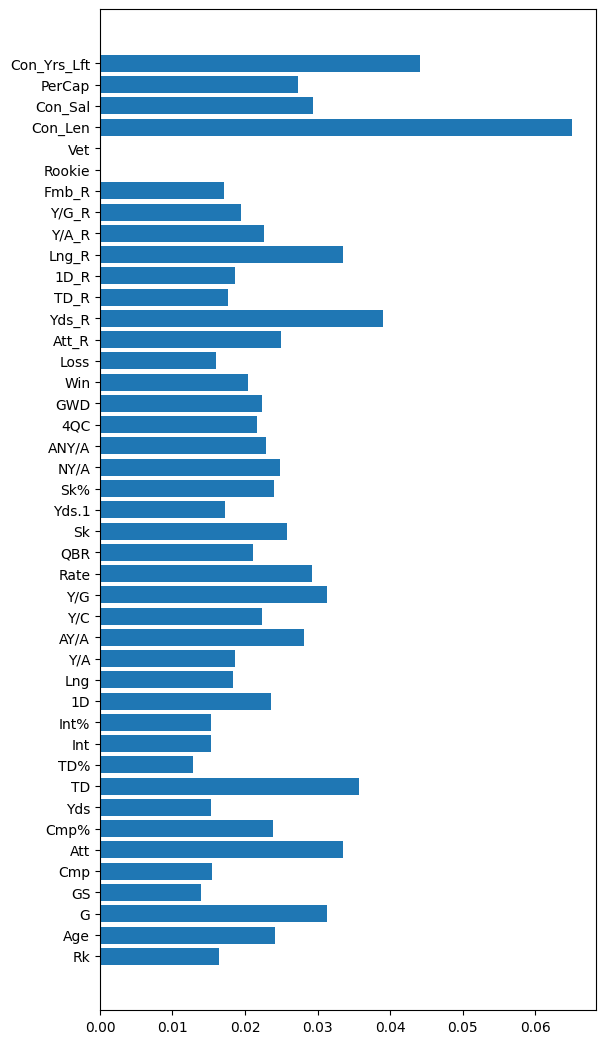

[{'Rk': 0.016462726518511772, 'Age': 0.024150211364030838, 'G': 0.0312819704413414, 'GS': 0.013912667520344257, 'Cmp': 0.015424909070134163, 'Att': 0.033567994832992554, 'Cmp%': 0.023793024942278862, 'Yds': 0.015268592163920403, 'TD': 0.035731133073568344, 'TD%': 0.012857089750468731, 'Int': 0.015360372141003609, 'Int%': 0.015306077897548676, '1D': 0.02363159880042076, 'Lng': 0.018364347517490387, 'Y/A': 0.0186004638671875, 'AY/A': 0.028143083676695824, 'Y/C': 0.022375883534550667, 'Y/G': 0.03128845617175102, 'Rate': 0.029266972094774246, 'QBR': 0.021160705015063286, 'Sk': 0.02574911341071129, 'Yds.1': 0.017298778519034386, 'Sk%': 0.024020424112677574, 'NY/A': 0.02476145140826702, 'ANY/A': 0.022913284599781036, '4QC': 0.021683746948838234, 'GWD': 0.022340094670653343, 'Win': 0.02044099196791649, 'Loss': 0.016051432117819786, 'Att_R': 0.024893298745155334, 'Yds_R': 0.03901907056570053, 'TD_R': 0.017653943970799446, '1D_R': 0.01863459311425686, 'Lng_R': 0.03345261141657829, 'Y/A_R': 0.02

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 43))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

xgboost


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 10, 'max_leaves': 10, 'min_child_weight': 0.19275050798785118, 'learning_rate': 0.2626848031777663, 'subsample': 0.8072520947559024, 'colsample_bylevel': 0.4009002180224544, 'colsample_bytree': 0.8004163860319407, 'reg_alpha': 0.016590558932690017, 'reg_lambda': 0.6266994560229416}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7478260869565218


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.27391304347826084, 'rf': 0.30434782608695654, 'xgboost': 0.25217391304347825, 'extra_tree': 0.3913043478260869, 'xgb_limitdepth': inf, 'lrl1': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00010789477306863537, 'wall_clock_time': 21.352240085601807, 'metric_for_logging': {'pred_time': 0.00010789477306863537, 'train_loss': 0.007608695652173925}, 'val_loss': 0.25217391304347825, 'training_iteration': 1, 'config': {'n_estimators': 10, 'max_leaves': 10, 'min_child_weight': 0.19275050798785118, 'learning_rate': 0.2626848031777663, 'subsample': 0.8072520947559024, 'colsample_bylevel': 0.4009002180224544, 'colsample_bytree': 0.8004163860319407, 'reg_alpha': 0.016590558932690017, 'reg_lambda': 0.6266994560229416}, 'config/n_estimators': 10, 'config/max_leaves': 10, 'config/min_child_weight': 0.19275050798785118, 'config/learning_rate': 0.2626848031777663, 'config/subsample': 0.8072520947559024, 'config/colsample_bylevel': 0.4009002180224544, 'config/colsample_bytree': 0.8004163860319407, 'config/reg_alpha': 0.016590558932690017, 'config/reg_lambda': 0.6266994560229416, 'experiment_tag': 'exp', 'time_total_s': 0.28461170196533203}


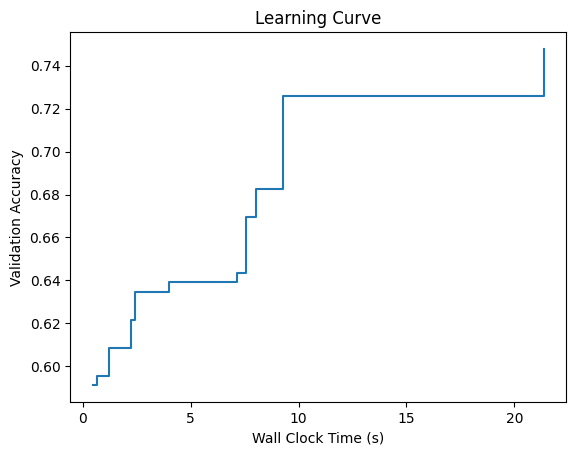

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]


In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.9859154929577465
log_loss = 0.2737483582949608


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [1 0 0 0 0 0 0 0 2 2 0 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 2 1 1 0
 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 2 0 2 0 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.7068965517241379
log_loss = 0.6695967930447428


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
335  1.24155  1.064011  0.744833  ...  1.900313  0.486872  2.415547  1.478949   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
335       1    0        4  6025171  0.007235            0  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
          Player  New_Con_Len
335  Jalen Hurts            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


### **Classification For Contract Length QB 1.2 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf1.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2011]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 16:12:47] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 16:12:47] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 16:12:47] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 16:12:47] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 16:12:47] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 16:12:47] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 16:12:47] {2336} INFO - Estimated sufficient time budget=5412s. Estimated necessary time budget=125s.
[flaml.automl.logger: 04-20 16:12:47] {2383} INFO -  at 0.8s,	estimator lgbm's best error=0.3553,	best estimator lgbm's best error=0.3553
[flaml.automl.logger: 04-20 16:12:47] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 16:12:48] {2383} INFO -  at 1.5s,	estimator lgbm's best error=0.3

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:12:50] {2383} INFO -  at 3.7s,	estimator xgboost's best error=0.3531,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:50] {2210} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 04-20 16:12:51] {2383} INFO -  at 4.3s,	estimator lgbm's best error=0.3466,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:51] {2210} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-20 16:12:51] {2383} INFO -  at 4.6s,	estimator lgbm's best error=0.3466,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:51] {2210} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-20 16:12:51] {2383} INFO -  at 4.9s,	estimator lgbm's best error=0.3466,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:51] {2210} INFO - iteration 7, current learner extra_tree
[flaml.automl.logger: 04-20 16:12:52] {2383} INFO -  at 5.2s,	estimator extra_tree's best error

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:12:52] {2383} INFO -  at 6.1s,	estimator xgboost's best error=0.3531,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:52] {2210} INFO - iteration 10, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:12:53] {2383} INFO -  at 6.3s,	estimator extra_tree's best error=0.3597,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:53] {2210} INFO - iteration 11, current learner extra_tree
[flaml.automl.logger: 04-20 16:12:53] {2383} INFO -  at 6.6s,	estimator extra_tree's best error=0.3597,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:53] {2210} INFO - iteration 12, current learner extra_tree
[flaml.automl.logger: 04-20 16:12:53] {2383} INFO -  at 6.8s,	estimator extra_tree's best error=0.3553,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:53] {2210} INFO - iteration 13, current learner rf
[flaml.automl.logger: 04-20 16:12:53] {2383} INFO -  at 7.0s,	estimator rf's best error=0.3575,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:53] {2210} INFO - iteration 14, current learner rf
[flaml.automl.logger: 04-20 16:12:54] {2383} INFO -  at 7.2s,	estimator rf's

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:12:57] {2383} INFO -  at 10.4s,	estimator xgboost's best error=0.3508,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:57] {2210} INFO - iteration 18, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:12:57] {2383} INFO -  at 10.6s,	estimator lgbm's best error=0.3466,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:57] {2210} INFO - iteration 19, current learner rf
[flaml.automl.logger: 04-20 16:12:57] {2383} INFO -  at 10.9s,	estimator rf's best error=0.3575,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:57] {2210} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-20 16:12:58] {2383} INFO -  at 11.2s,	estimator rf's best error=0.3575,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:58] {2210} INFO - iteration 21, current learner rf
[flaml.automl.logger: 04-20 16:12:58] {2383} INFO -  at 11.4s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3466
[flaml.automl.logger: 04-20 16:12:58] {2210} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 04-20 16:12:58] {2383} INFO -  at 11.8s,	estimator lgbm's best error=0.3399,	best esti

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:12:59] {2383} INFO -  at 12.6s,	estimator xgboost's best error=0.3508,	best estimator lgbm's best error=0.3399
[flaml.automl.logger: 04-20 16:12:59] {2210} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:12:59] {2383} INFO -  at 12.8s,	estimator extra_tree's best error=0.3553,	best estimator lgbm's best error=0.3399
[flaml.automl.logger: 04-20 16:12:59] {2210} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 04-20 16:13:00] {2383} INFO -  at 13.4s,	estimator lgbm's best error=0.3378,	best estimator lgbm's best error=0.3378
[flaml.automl.logger: 04-20 16:13:00] {2210} INFO - iteration 27, current learner lgbm
[flaml.automl.logger: 04-20 16:13:01] {2383} INFO -  at 14.1s,	estimator lgbm's best error=0.3356,	best estimator lgbm's best error=0.3356
[flaml.automl.logger: 04-20 16:13:01] {2210} INFO - iteration 28, current learner rf
[flaml.automl.logger: 04-20 16:13:01] {2383} INFO -  at 14.5s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3356
[flaml.automl.logger: 04-20 16:13:01] {2210} INFO - iteration 29, current learner rf
[flaml.automl.logger: 04-20 16:13:01] {2383} INFO -  at 14.7s,	estimator rf's best error=0.3486,

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:12] {2383} INFO -  at 25.5s,	estimator xgboost's best error=0.3508,	best estimator lgbm's best error=0.3356
[flaml.automl.logger: 04-20 16:13:12] {2210} INFO - iteration 48, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:13] {2383} INFO -  at 26.9s,	estimator lgbm's best error=0.3356,	best estimator lgbm's best error=0.3356
[flaml.automl.logger: 04-20 16:13:13] {2210} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 04-20 16:13:14] {2383} INFO -  at 28.0s,	estimator lgbm's best error=0.3356,	best estimator lgbm's best error=0.3356
[flaml.automl.logger: 04-20 16:13:14] {2210} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 04-20 16:13:15] {2383} INFO -  at 28.3s,	estimator extra_tree's best error=0.3509,	best estimator lgbm's best error=0.3356
[flaml.automl.logger: 04-20 16:13:15] {2210} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 04-20 16:13:16] {2383} INFO -  at 29.1s,	estimator lgbm's best error=0.3356,	best estimator lgbm's best error=0.3356
[flaml.automl.logger: 04-20 16:13:16] {2210} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 04-20 16:13:17] {2383} INFO -  at 30.3s,	estimator lgbm's best

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:26] {2383} INFO -  at 39.9s,	estimator xgboost's best error=0.3508,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:26] {2210} INFO - iteration 64, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:28] {2383} INFO -  at 41.1s,	estimator lgbm's best error=0.3334,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:28] {2210} INFO - iteration 65, current learner rf
[flaml.automl.logger: 04-20 16:13:28] {2383} INFO -  at 41.3s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:28] {2210} INFO - iteration 66, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:28] {2383} INFO -  at 41.9s,	estimator xgboost's best error=0.3488,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:28] {2210} INFO - iteration 67, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:29] {2383} INFO -  at 42.2s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:29] {2210} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 04-20 16:13:29] {2383} INFO -  at 42.7s,	estimator lgbm's best error=0.3334,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:29] {2210} INFO - iteration 69, current learner rf
[flaml.automl.logger: 04-20 16:13:29] {2383} INFO -  at 42.9s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:29] {2210} INFO - iteration 70, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:30] {2383} INFO -  at 43.8s,	estimator xgboost's best error=0.3488,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:30] {2210} INFO - iteration 71, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:30] {2383} INFO -  at 44.0s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:30] {2210} INFO - iteration 72, current learner extra_tree
[flaml.automl.logger: 04-20 16:13:31] {2383} INFO -  at 44.2s,	estimator extra_tree's best error=0.3509,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:31] {2210} INFO - iteration 73, current learner rf
[flaml.automl.logger: 04-20 16:13:31] {2383} INFO -  at 44.5s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:31] {2210} INFO - iteration 74, current learner extra_tree
[flaml.automl.logger: 04-20 16:13:31] {2383} INFO -  at 44.8s,	estimator extra_tree's best error=0.3509,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:31] {2210} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 04-20 16:13:32] {2383} INFO -  at 45.4s,	estimator lgbm'

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:38] {2383} INFO -  at 51.5s,	estimator xgboost's best error=0.3488,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:38] {2210} INFO - iteration 83, current learner rf
[flaml.automl.logger: 04-20 16:13:38] {2383} INFO -  at 51.7s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:38] {2210} INFO - iteration 84, current learner extra_tree
[flaml.automl.logger: 04-20 16:13:38] {2383} INFO -  at 51.9s,	estimator extra_tree's best error=0.3509,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:38] {2210} INFO - iteration 85, current learner rf
[flaml.automl.logger: 04-20 16:13:39] {2383} INFO -  at 52.1s,	estimator rf's best error=0.3486,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:39] {2210} INFO - iteration 86, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:40] {2383} INFO -  at 53.2s,	estimator xgboost's best error=0.3377,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:40] {2210} INFO - iteration 87, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:40] {2383} INFO -  at 53.8s,	estimator xgboost's best error=0.3377,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:40] {2210} INFO - iteration 88, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 16:13:41] {2383} INFO -  at 54.4s,	estimator xgboost's best error=0.3377,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:41] {2210} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:42] {2383} INFO -  at 55.5s,	estimator xgboost's best error=0.3377,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:42] {2210} INFO - iteration 90, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:43] {2383} INFO -  at 56.7s,	estimator xgboost's best error=0.3377,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:43] {2210} INFO - iteration 91, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:43] {2383} INFO -  at 57.0s,	estimator extra_tree's best error=0.3509,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:43] {2210} INFO - iteration 92, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:44] {2383} INFO -  at 57.8s,	estimator xgboost's best error=0.3377,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:44] {2210} INFO - iteration 93, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 16:13:47] {2383} INFO -  at 60.1s,	estimator xgboost's best error=0.3377,	best estimator lgbm's best error=0.3334
[flaml.automl.logger: 04-20 16:13:47] {2619} INFO - retrain lgbm for 0.2s
[flaml.automl.logger: 04-20 16:13:47] {2622} INFO - retrained model: LGBMClassifier(colsample_bytree=0.8073783686585343,
               learning_rate=0.08361478215467474, max_bin=511,
               min_child_samples=5, n_estimators=11, num_leaves=11,
               reg_alpha=0.0009765625, reg_lambda=0.009522531968738191,
               verbose=-1)
[flaml.automl.logger: 04-20 16:13:47] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 16:13:47] {1931} INFO - Time taken to find the best model: 38.915727376937866


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

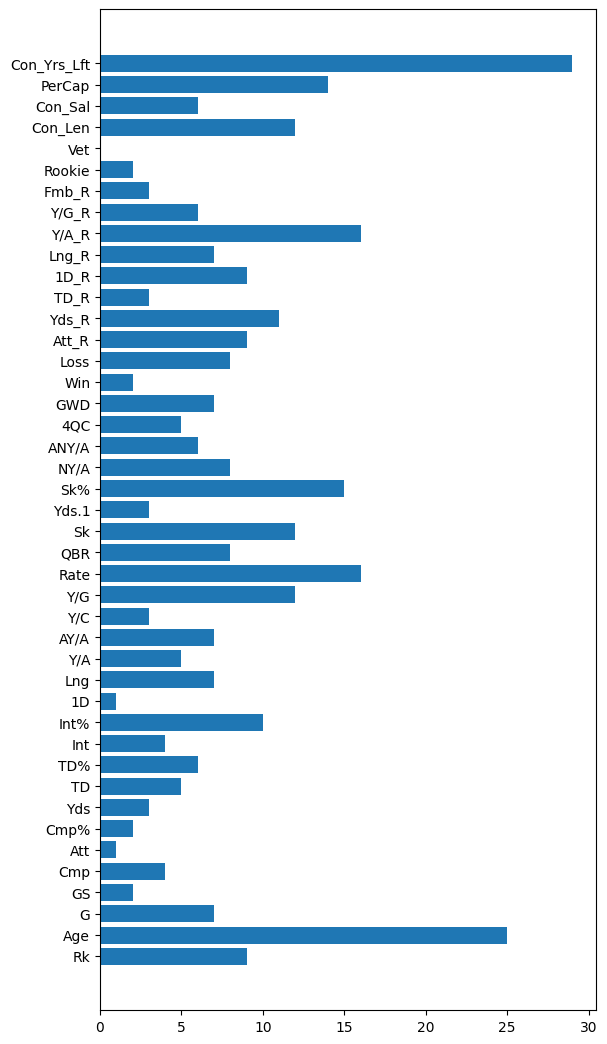

[{'Rk': 9, 'Age': 25, 'G': 7, 'GS': 2, 'Cmp': 4, 'Att': 1, 'Cmp%': 2, 'Yds': 3, 'TD': 5, 'TD%': 6, 'Int': 4, 'Int%': 10, '1D': 1, 'Lng': 7, 'Y/A': 5, 'AY/A': 7, 'Y/C': 3, 'Y/G': 12, 'Rate': 16, 'QBR': 8, 'Sk': 12, 'Yds.1': 3, 'Sk%': 15, 'NY/A': 8, 'ANY/A': 6, '4QC': 5, 'GWD': 7, 'Win': 2, 'Loss': 8, 'Att_R': 9, 'Yds_R': 11, 'TD_R': 3, '1D_R': 9, 'Lng_R': 7, 'Y/A_R': 16, 'Y/G_R': 6, 'Fmb_R': 3, 'Rookie': 2, 'Vet': 0, 'Con_Len': 12, 'Con_Sal': 6, 'PerCap': 14, 'Con_Yrs_Lft': 29}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 43))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 11, 'num_leaves': 11, 'min_child_samples': 5, 'learning_rate': 0.08361478215467474, 'log_max_bin': 9, 'colsample_bytree': 0.8073783686585343, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.009522531968738191}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.6666268514094601


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.3333731485905399, 'rf': 0.3486383182035356, 'xgboost': 0.3377209746774964, 'extra_tree': 0.3508600095556618, 'xgb_limitdepth': inf, 'lrl1': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 5.910572570531037e-05, 'wall_clock_time': 38.915727376937866, 'metric_for_logging': {'pred_time': 5.910572570531037e-05, 'train_loss': 0.1036188469065181}, 'val_loss': 0.3333731485905399, 'training_iteration': 1, 'config': {'n_estimators': 11, 'num_leaves': 11, 'min_child_samples': 5, 'learning_rate': 0.08361478215467474, 'log_max_bin': 9, 'colsample_bytree': 0.8073783686585343, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.009522531968738191}, 'config/n_estimators': 11, 'config/num_leaves': 11, 'config/min_child_samples': 5, 'config/learning_rate': 0.08361478215467474, 'config/log_max_bin': 9, 'config/colsample_bytree': 0.8073783686585343, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 0.009522531968738191, 'experiment_tag': 'exp', 'time_total_s': 0.4739861488342285}


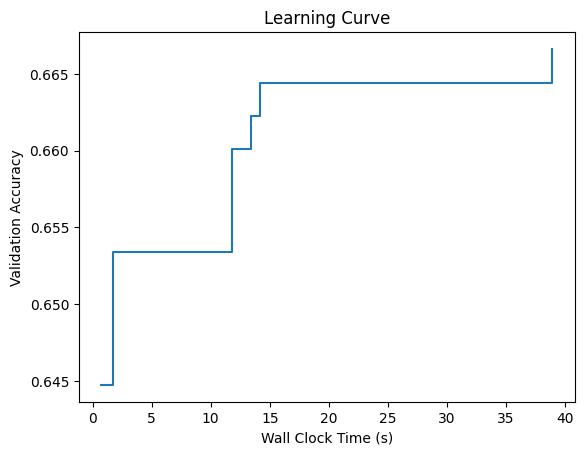

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 2 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 2 2 2 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1
 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 2 0 0 0 0 1 0 1 1 0 0 1
 1 0 1 1 0 0 1 0 0 0 0 0]
---------------------------------------------------------

In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.8574561403508771
log_loss = 0.4695286926624076


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 2 0 2 0 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.7068965517241379
log_loss = 0.654918342643813


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
feeder_test.at[585, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
585 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
585  1.24155  1.064011  0.744833  ...  1.900313  0.486872  2.415547  1.478949   

     Rookie  Vet  Con_Len    Con_Sal    PerCap  Con_Yrs_Lft  
585     1.0  0.0      4.0  6025171.0  0.007235            0  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
          Player  New_Con_Len
585  Jalen Hurts            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


### **Classification For Contract Length QB 1.3 (AutoML)**

In [23]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [24]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 20:34:08] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 20:34:08] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 20:34:08] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 17 to 34


[flaml.automl.logger: 04-20 20:34:08] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 20:34:08] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 20:34:08] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 20:34:08] {2336} INFO - Estimated sufficient time budget=5537s. Estimated necessary time budget=128s.
[flaml.automl.logger: 04-20 20:34:08] {2383} INFO -  at 0.7s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 20:34:08] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 20:34:09] {2383} INFO -  at 0.9s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 20:34:09] {2210} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-20 20:34:09] {2383} INFO -  at 1.2s,	estimator lgbm's best error=0.343

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:12] {2383} INFO -  at 4.1s,	estimator xgboost's best error=0.3739,	best estimator lgbm's best error=0.3130
[flaml.automl.logger: 04-20 20:34:12] {2210} INFO - iteration 8, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:14] {2383} INFO -  at 6.1s,	estimator lgbm's best error=0.3130,	best estimator lgbm's best error=0.3130
[flaml.automl.logger: 04-20 20:34:14] {2210} INFO - iteration 9, current learner extra_tree
[flaml.automl.logger: 04-20 20:34:14] {2383} INFO -  at 6.7s,	estimator extra_tree's best error=0.4304,	best estimator lgbm's best error=0.3130
[flaml.automl.logger: 04-20 20:34:14] {2210} INFO - iteration 10, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:16] {2383} INFO -  at 8.0s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.3130
[flaml.automl.logger: 04-20 20:34:16] {2210} INFO - iteration 11, current learner extra_tree
[flaml.automl.logger: 04-20 20:34:16] {2383} INFO -  at 8.7s,	estimator extra_tree's best error=0.3783,	best estimator lgbm's best error=0.3130
[flaml.automl.logger: 04-20 20:34:16] {2210} INFO - iteration 12, current learner rf
[flaml.automl.logger: 04-20 20:34:17] {2383} INFO -  at 9.2s,	estimator rf's best error=0.4217,	best estimator lgbm's best error=0.3130
[flaml.automl.logger: 04-20 20:34:17] {2210} INFO - iteration 13, current learner rf
[flaml.automl.logger: 04-20 20:34:17] {2383} INFO -  at 9.6s,	estimator rf's best error=0.3435,	best estimator lgbm's best error=0.3130
[flaml.automl.logger: 04-20 20:34:17] {2210} INFO - iteration 14, current learner rf
[flaml.automl.logger: 04-20 20:34:18] {2383} INFO -  at 10.2s,	estimator rf's best error=0.3435

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:22] {2383} INFO -  at 14.8s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.2957
[flaml.automl.logger: 04-20 20:34:22] {2210} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-20 20:34:23] {2383} INFO -  at 15.4s,	estimator rf's best error=0.3435,	best estimator lgbm's best error=0.2957
[flaml.automl.logger: 04-20 20:34:23] {2210} INFO - iteration 21, current learner rf
[flaml.automl.logger: 04-20 20:34:24] {2383} INFO -  at 16.1s,	estimator rf's best error=0.3435,	best estimator lgbm's best error=0.2957
[flaml.automl.logger: 04-20 20:34:24] {2210} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 04-20 20:34:26] {2383} INFO -  at 18.3s,	estimator lgbm's best error=0.2957,	best estimator lgbm's best error=0.2957
[flaml.automl.logger: 04-20 20:34:26] {2210} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 04-20 20:34:28] {2383} INFO -  at 20.5s,	estimator lgbm's best error=0.2957,	be

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:45] {2383} INFO -  at 37.5s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:45] {2210} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 04-20 20:34:48] {2383} INFO -  at 40.5s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:48] {2210} INFO - iteration 40, current learner rf
[flaml.automl.logger: 04-20 20:34:48] {2383} INFO -  at 40.6s,	estimator rf's best error=0.3435,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:48] {2210} INFO - iteration 41, current learner extra_tree
[flaml.automl.logger: 04-20 20:34:48] {2383} INFO -  at 40.8s,	estimator extra_tree's best error=0.3783,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:48] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 20:34:51] {2383} INFO -  at 43.7s,	estimator lgbm's best 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:54] {2383} INFO -  at 46.0s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:54] {2210} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-20 20:34:54] {2383} INFO -  at 46.2s,	estimator extra_tree's best error=0.3783,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:54] {2210} INFO - iteration 45, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:55] {2383} INFO -  at 47.4s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:55] {2210} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 04-20 20:34:57] {2383} INFO -  at 49.2s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:57] {2210} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:34:58] {2383} INFO -  at 50.7s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:34:58] {2210} INFO - iteration 48, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:35:00] {2383} INFO -  at 52.7s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:35:00] {2210} INFO - iteration 49, current learner rf
[flaml.automl.logger: 04-20 20:35:00] {2383} INFO -  at 52.9s,	estimator rf's best error=0.3435,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:35:00] {2210} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 04-20 20:35:01] {2383} INFO -  at 53.0s,	estimator extra_tree's best error=0.3783,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:35:01] {2210} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 04-20 20:35:05] {2383} INFO -  at 57.2s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:35:05] {2210} INFO - iteration 52, current learner rf
[flaml.automl.logger: 04-20 20:35:05] {2383} INFO -  at 57.5s,	estimator rf's best error=0

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:35:07] {2383} INFO -  at 59.5s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:35:07] {2210} INFO - iteration 57, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:35:08] {2383} INFO -  at 60.2s,	estimator xgb_limitdepth's best error=0.3478,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:35:09] {2619} INFO - retrain lgbm for 1.0s
[flaml.automl.logger: 04-20 20:35:09] {2622} INFO - retrained model: LGBMClassifier(colsample_bytree=0.631340721404075,
               learning_rate=0.3895474475926562, max_bin=511,
               min_child_samples=6, n_estimators=17, num_leaves=18,
               reg_alpha=0.006958608037974516, reg_lambda=0.005662848648248613,
               verbose=-1)
[flaml.automl.logger: 04-20 20:35:09] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 20:35:09] {1931} INFO - Time taken to find the best model: 35.001564741134644


In [9]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

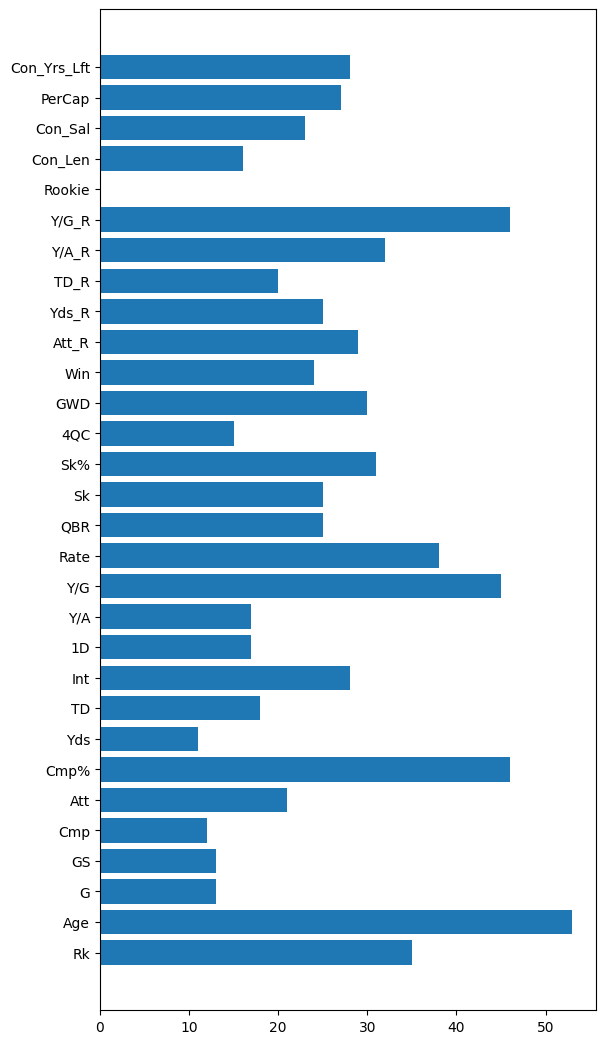

[{'Rk': 35, 'Age': 53, 'G': 13, 'GS': 13, 'Cmp': 12, 'Att': 21, 'Cmp%': 46, 'Yds': 11, 'TD': 18, 'Int': 28, '1D': 17, 'Y/A': 17, 'Y/G': 45, 'Rate': 38, 'QBR': 25, 'Sk': 25, 'Sk%': 31, '4QC': 15, 'GWD': 30, 'Win': 24, 'Att_R': 29, 'Yds_R': 25, 'TD_R': 20, 'Y/A_R': 32, 'Y/G_R': 46, 'Rookie': 0, 'Con_Len': 16, 'Con_Sal': 23, 'PerCap': 27, 'Con_Yrs_Lft': 28}]


In [26]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 30))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [27]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [28]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 17, 'num_leaves': 18, 'min_child_samples': 6, 'learning_rate': 0.3895474475926562, 'log_max_bin': 9, 'colsample_bytree': 0.631340721404075, 'reg_alpha': 0.006958608037974516, 'reg_lambda': 0.005662848648248613}


In [29]:
# Find best r2
print(1-automl.best_loss)

0.7304347826086957


In [30]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2695652173913044, 'rf': 0.3391304347826087, 'xgboost': 0.35652173913043483, 'extra_tree': 0.3782608695652174, 'xgb_limitdepth': 0.34782608695652173, 'lrl1': inf}


In [31]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0005104832027269447, 'wall_clock_time': 35.001564741134644, 'metric_for_logging': {'pred_time': 0.0005104832027269447, 'train_loss': 0.0}, 'val_loss': 0.2695652173913044, 'training_iteration': 1, 'config': {'n_estimators': 17, 'num_leaves': 18, 'min_child_samples': 6, 'learning_rate': 0.3895474475926562, 'log_max_bin': 9, 'colsample_bytree': 0.631340721404075, 'reg_alpha': 0.006958608037974516, 'reg_lambda': 0.005662848648248613}, 'config/n_estimators': 17, 'config/num_leaves': 18, 'config/min_child_samples': 6, 'config/learning_rate': 0.3895474475926562, 'config/log_max_bin': 9, 'config/colsample_bytree': 0.631340721404075, 'config/reg_alpha': 0.006958608037974516, 'config/reg_lambda': 0.005662848648248613, 'experiment_tag': 'exp', 'time_total_s': 2.815728187561035}


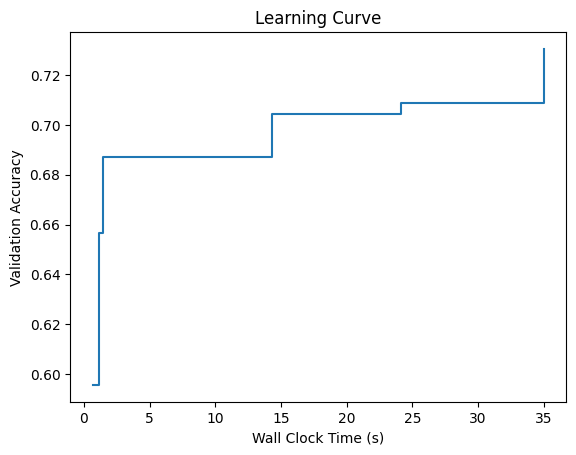

In [32]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [33]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]


In [34]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 1.0
log_loss = 0.0036716634955699717


In [35]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [1 0 0 0 0 2 0 0 2 1 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 2 0 2 0 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [36]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6896551724137931
log_loss = 0.9417984825820023


In [21]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [22]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
335  1.24155  1.064011  0.744833  ...  1.900313  0.486872  2.415547  1.478949   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
335       1    0        4  6025171  0.007235            0  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
          Player  New_Con_Len
335  Jalen Hurts            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


### **Classification For Contract Length QB 1.4 (AutoML)**

In [37]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [38]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 20:38:24] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 20:38:24] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 20:38:24] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 17 to 34


[flaml.automl.logger: 04-20 20:38:24] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 20:38:24] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 20:38:24] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 20:38:24] {2336} INFO - Estimated sufficient time budget=2315s. Estimated necessary time budget=53s.
[flaml.automl.logger: 04-20 20:38:24] {2383} INFO -  at 0.3s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 20:38:24] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 20:38:25] {2383} INFO -  at 0.6s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 20:38:25] {2210} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-20 20:38:25] {2383} INFO -  at 1.0s,	estimator lgbm's best error=0.3478

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:26] {2383} INFO -  at 2.1s,	estimator xgboost's best error=0.3696,	best estimator lgbm's best error=0.3478
[flaml.automl.logger: 04-20 20:38:26] {2210} INFO - iteration 4, current learner extra_tree
[flaml.automl.logger: 04-20 20:38:27] {2383} INFO -  at 2.6s,	estimator extra_tree's best error=0.4130,	best estimator lgbm's best error=0.3478
[flaml.automl.logger: 04-20 20:38:27] {2210} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-20 20:38:27] {2383} INFO -  at 3.1s,	estimator lgbm's best error=0.3261,	best estimator lgbm's best error=0.3261
[flaml.automl.logger: 04-20 20:38:27] {2210} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-20 20:38:29] {2383} INFO -  at 5.0s,	estimator lgbm's best error=0.3261,	best estimator lgbm's best error=0.3261
[flaml.automl.logger: 04-20 20:38:29] {2210} INFO - iteration 7, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:32] {2383} INFO -  at 8.0s,	estimator xgboost's best error=0.3696,	best estimator lgbm's best error=0.3261
[flaml.automl.logger: 04-20 20:38:32] {2210} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 04-20 20:38:33] {2383} INFO -  at 9.1s,	estimator lgbm's best error=0.3217,	best estimator lgbm's best error=0.3217
[flaml.automl.logger: 04-20 20:38:33] {2210} INFO - iteration 9, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:35] {2383} INFO -  at 11.0s,	estimator xgboost's best error=0.3565,	best estimator lgbm's best error=0.3217
[flaml.automl.logger: 04-20 20:38:35] {2210} INFO - iteration 10, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:36] {2383} INFO -  at 11.5s,	estimator extra_tree's best error=0.4000,	best estimator lgbm's best error=0.3217
[flaml.automl.logger: 04-20 20:38:36] {2210} INFO - iteration 11, current learner rf
[flaml.automl.logger: 04-20 20:38:36] {2383} INFO -  at 12.0s,	estimator rf's best error=0.3870,	best estimator lgbm's best error=0.3217
[flaml.automl.logger: 04-20 20:38:36] {2210} INFO - iteration 12, current learner rf
[flaml.automl.logger: 04-20 20:38:36] {2383} INFO -  at 12.3s,	estimator rf's best error=0.3609,	best estimator lgbm's best error=0.3217
[flaml.automl.logger: 04-20 20:38:36] {2210} INFO - iteration 13, current learner rf
[flaml.automl.logger: 04-20 20:38:37] {2383} INFO -  at 12.5s,	estimator rf's best error=0.3609,	best estimator lgbm's best error=0.3217
[flaml.automl.logger: 04-20 20:38:37] {2210} INFO - iteration 14, current learner rf
[flaml.automl.logger: 04-20 20:38:37] {2383} INFO -  at 12.9s,	estimator rf's best error=0.3609,	best es

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:46] {2383} INFO -  at 21.6s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:46] {2210} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:47] {2383} INFO -  at 23.1s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:47] {2210} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 04-20 20:38:47] {2383} INFO -  at 23.4s,	estimator lgbm's best error=0.2783,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:47] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 20:38:49] {2383} INFO -  at 24.6s,	estimator lgbm's best error=0.2783,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:49] {2210} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-20 20:38:49] {2383} INFO -  at 25.2s,	estimator lgbm's best error=0.2783,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:49] {2210} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:50] {2383} INFO -  at 26.4s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:50] {2210} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 04-20 20:38:51] {2383} INFO -  at 26.7s,	estimator lgbm's best error=0.2783,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:51] {2210} INFO - iteration 35, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:52] {2383} INFO -  at 27.7s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:52] {2210} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 04-20 20:38:52] {2383} INFO -  at 27.9s,	estimator extra_tree's best error=0.3957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:52] {2210} INFO - iteration 37, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:53] {2383} INFO -  at 28.6s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:53] {2210} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 20:38:54] {2383} INFO -  at 29.6s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:54] {2210} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 04-20 20:38:55] {2383} INFO -  at 30.8s,	estimator lgbm's best error=0.2783,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:55] {2210} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:56] {2383} INFO -  at 32.1s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:56] {2210} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:38:57] {2383} INFO -  at 33.5s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2783
[flaml.automl.logger: 04-20 20:38:57] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 20:38:59] {2383} INFO -  at 35.0s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:38:59] {2210} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:39:00] {2383} INFO -  at 36.4s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:00] {2210} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-20 20:39:01] {2383} INFO -  at 36.8s,	estimator extra_tree's best error=0.3957,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:01] {2210} INFO - iteration 45, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:39:02] {2383} INFO -  at 37.9s,	estimator xgboost's best error=0.2957,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:02] {2210} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 04-20 20:39:03] {2383} INFO -  at 39.4s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:03] {2210} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:39:08] {2383} INFO -  at 43.5s,	estimator xgboost's best error=0.2913,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:08] {2210} INFO - iteration 48, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:39:08] {2383} INFO -  at 44.2s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:08] {2210} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 04-20 20:39:09] {2383} INFO -  at 44.8s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:09] {2210} INFO - iteration 50, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:39:10] {2383} INFO -  at 45.9s,	estimator xgboost's best error=0.2913,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:10] {2210} INFO - iteration 51, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:39:10] {2383} INFO -  at 46.3s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:10] {2210} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 04-20 20:39:13] {2383} INFO -  at 49.3s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:13] {2210} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 04-20 20:39:14] {2383} INFO -  at 50.5s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:14] {2210} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 04-20 20:39:15] {2383} INFO -  at 51.0s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:15] {2210} INFO - iteration 55, current learner rf
[flaml.automl.logger: 04-20 20:39:16] {2383} INFO -  at 51.6s,	estimator rf's best error=0.3609,	b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:39:24] {2383} INFO -  at 60.5s,	estimator xgb_limitdepth's best error=0.3478,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:39:25] {2619} INFO - retrain lgbm for 0.5s
[flaml.automl.logger: 04-20 20:39:25] {2622} INFO - retrained model: LGBMClassifier(colsample_bytree=0.748991211462359,
               learning_rate=0.6280326908351329, max_bin=63,
               min_child_samples=7, n_estimators=9, num_leaves=4,
               reg_alpha=0.0034511319989041717, reg_lambda=0.025518091280209352,
               verbose=-1)
[flaml.automl.logger: 04-20 20:39:25] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 20:39:25] {1931} INFO - Time taken to find the best model: 34.99861025810242


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

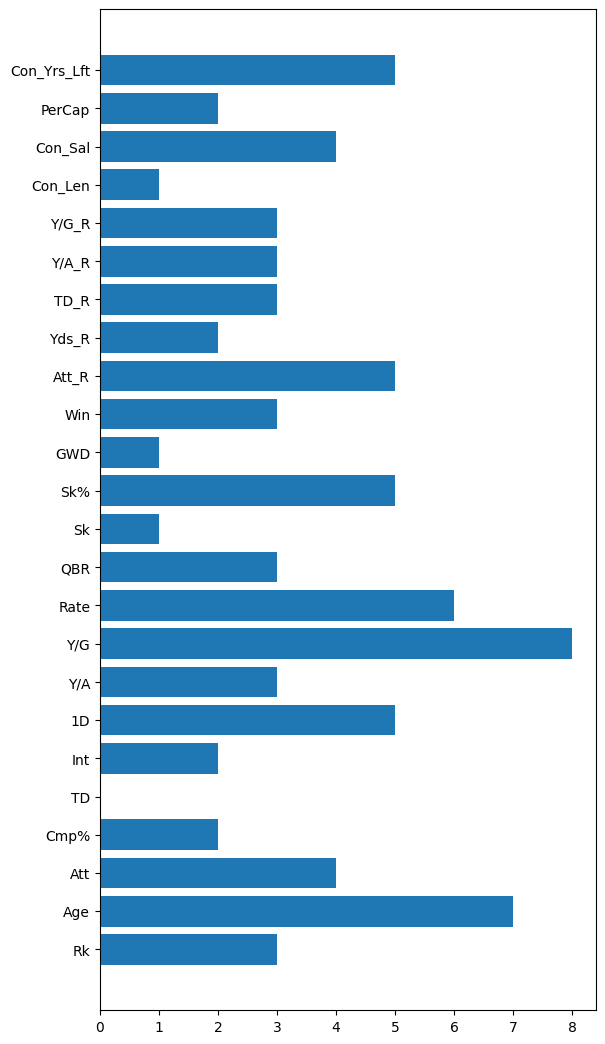

[{'Rk': 3, 'Age': 7, 'Att': 4, 'Cmp%': 2, 'TD': 0, 'Int': 2, '1D': 5, 'Y/A': 3, 'Y/G': 8, 'Rate': 6, 'QBR': 3, 'Sk': 1, 'Sk%': 5, 'GWD': 1, 'Win': 3, 'Att_R': 5, 'Yds_R': 2, 'TD_R': 3, 'Y/A_R': 3, 'Y/G_R': 3, 'Con_Len': 1, 'Con_Sal': 4, 'PerCap': 2, 'Con_Yrs_Lft': 5}]


In [40]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 24))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [41]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [42]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 9, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.6280326908351329, 'log_max_bin': 6, 'colsample_bytree': 0.748991211462359, 'reg_alpha': 0.0034511319989041717, 'reg_lambda': 0.025518091280209352}


In [44]:
# Find best r2
print(1-automl.best_loss)

0.7260869565217392


In [45]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.27391304347826084, 'rf': 0.36086956521739133, 'xgboost': 0.29130434782608694, 'extra_tree': 0.39565217391304347, 'xgb_limitdepth': 0.34782608695652173, 'lrl1': inf}


In [46]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0004481170488440472, 'wall_clock_time': 34.99861025810242, 'metric_for_logging': {'pred_time': 0.0004481170488440472, 'train_loss': 0.021739130434782615}, 'val_loss': 0.27391304347826084, 'training_iteration': 1, 'config': {'n_estimators': 9, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.6280326908351329, 'log_max_bin': 6, 'colsample_bytree': 0.748991211462359, 'reg_alpha': 0.0034511319989041717, 'reg_lambda': 0.025518091280209352}, 'config/n_estimators': 9, 'config/num_leaves': 4, 'config/min_child_samples': 7, 'config/learning_rate': 0.6280326908351329, 'config/log_max_bin': 6, 'config/colsample_bytree': 0.748991211462359, 'config/reg_alpha': 0.0034511319989041717, 'config/reg_lambda': 0.025518091280209352, 'experiment_tag': 'exp', 'time_total_s': 1.5116832256317139}


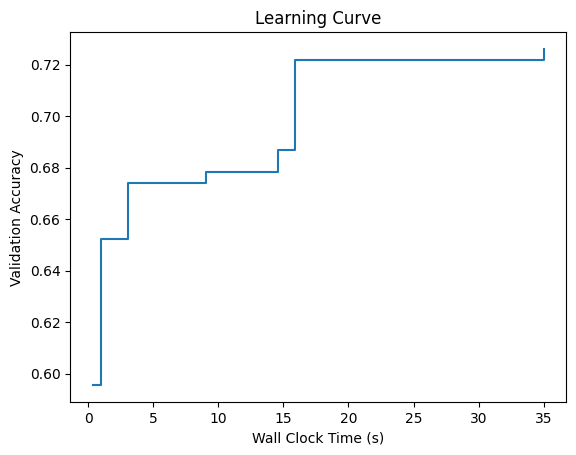

In [47]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [48]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]


In [49]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.9671361502347418
log_loss = 0.2186729210578506


In [50]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [1 0 0 0 0 2 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 2 1 1 0
 0 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 2 0 2 0 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [51]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6724137931034483
log_loss = 0.7811097972700033


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [53]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
335  1.24155  1.064011  0.744833  ...  1.900313  0.486872  2.415547  1.478949   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
335       1    0        4  6025171  0.007235            1  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
          Player  New_Con_Len
335  Jalen Hurts            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


### **Classification For Contract Length QB 1.5 (AutoML)**

In [54]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G',
                             'Con_Len', 'GWD', 'Sk', 'TD'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                           'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                           'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G',
                           'Con_Len', 'GWD', 'Sk', 'TD'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [55]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 20:43:15] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 20:43:15] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 20:43:15] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 17 to 34


[flaml.automl.logger: 04-20 20:43:15] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 20:43:15] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 20:43:15] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 20:43:15] {2336} INFO - Estimated sufficient time budget=2245s. Estimated necessary time budget=52s.
[flaml.automl.logger: 04-20 20:43:15] {2383} INFO -  at 0.3s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 20:43:15] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 20:43:16] {2383} INFO -  at 0.8s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 20:43:16] {2210} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:19] {2383} INFO -  at 3.6s,	estimator xgboost's best error=0.3652,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-20 20:43:19] {2210} INFO - iteration 3, current learner extra_tree
[flaml.automl.logger: 04-20 20:43:19] {2383} INFO -  at 3.9s,	estimator extra_tree's best error=0.4043,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-20 20:43:19] {2210} INFO - iteration 4, current learner extra_tree
[flaml.automl.logger: 04-20 20:43:19] {2383} INFO -  at 4.1s,	estimator extra_tree's best error=0.4000,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-20 20:43:19] {2210} INFO - iteration 5, current learner rf
[flaml.automl.logger: 04-20 20:43:19] {2383} INFO -  at 4.3s,	estimator rf's best error=0.3957,	best estimator xgboost's best error=0.3652
[flaml.automl.logger: 04-20 20:43:19] {2210} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-20 20:43:20] {2383} INFO -  at 4.8s,	estimat

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:23] {2383} INFO -  at 8.5s,	estimator xgboost's best error=0.3304,	best estimator lgbm's best error=0.3261
[flaml.automl.logger: 04-20 20:43:23] {2210} INFO - iteration 16, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:24] {2383} INFO -  at 8.8s,	estimator lgbm's best error=0.3000,	best estimator lgbm's best error=0.3000
[flaml.automl.logger: 04-20 20:43:24] {2210} INFO - iteration 17, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:26] {2383} INFO -  at 10.7s,	estimator xgboost's best error=0.3304,	best estimator lgbm's best error=0.3000
[flaml.automl.logger: 04-20 20:43:26] {2210} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 04-20 20:43:26] {2383} INFO -  at 11.0s,	estimator lgbm's best error=0.3000,	best estimator lgbm's best error=0.3000
[flaml.automl.logger: 04-20 20:43:26] {2210} INFO - iteration 19, current learner rf
[flaml.automl.logger: 04-20 20:43:27] {2383} INFO -  at 11.8s,	estimator rf's best error=0.3739,	best estimator lgbm's best error=0.3000
[flaml.automl.logger: 04-20 20:43:27] {2210} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 04-20 20:43:29] {2383} INFO -  at 14.5s,	estimator lgbm's best error=0.2957,	best estimator lgbm's best error=0.2957
[flaml.automl.logger: 04-20 20:43:29] {2210} INFO - iteration 21, current learner rf
[flaml.automl.logger: 04-20 20:43:31] {2383} INFO -  at 15.6s,	estimator rf's best error=0.3739,	be

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:35] {2383} INFO -  at 20.5s,	estimator xgboost's best error=0.3304,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:35] {2210} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:36] {2383} INFO -  at 21.1s,	estimator extra_tree's best error=0.4000,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:36] {2210} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 04-20 20:43:37] {2383} INFO -  at 22.5s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:37] {2210} INFO - iteration 27, current learner rf
[flaml.automl.logger: 04-20 20:43:38] {2383} INFO -  at 23.0s,	estimator rf's best error=0.3522,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:38] {2210} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:39] {2383} INFO -  at 23.7s,	estimator xgboost's best error=0.3304,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:39] {2210} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:40] {2383} INFO -  at 25.2s,	estimator xgboost's best error=0.3304,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:40] {2210} INFO - iteration 30, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:43] {2383} INFO -  at 28.3s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:43] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 20:43:47] {2383} INFO -  at 31.9s,	estimator lgbm's best error=0.2739,	best estimator lgbm's best error=0.2739
[flaml.automl.logger: 04-20 20:43:47] {2210} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-20 20:43:48] {2383} INFO -  at 33.5s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:48] {2210} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:49] {2383} INFO -  at 34.4s,	estimator xgboost's best error=0.3304,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:49] {2210} INFO - iteration 34, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:51] {2383} INFO -  at 35.9s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:51] {2210} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 04-20 20:43:52] {2383} INFO -  at 37.0s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:52] {2210} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 04-20 20:43:53] {2383} INFO -  at 37.8s,	estimator extra_tree's best error=0.4000,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:53] {2210} INFO - iteration 37, current learner rf
[flaml.automl.logger: 04-20 20:43:53] {2383} INFO -  at 38.6s,	estimator rf's best error=0.3478,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:54] {2210} INFO - iteration 38, current learner rf
[flaml.automl.logger: 04-20 20:43:54] {2383} INFO -  at 39.2s,	estimator rf's best error=0

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:55] {2383} INFO -  at 40.5s,	estimator xgboost's best error=0.3304,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:55] {2210} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:43:57] {2383} INFO -  at 42.1s,	estimator xgboost's best error=0.3217,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:43:57] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 20:44:01] {2383} INFO -  at 45.9s,	estimator lgbm's best error=0.2696,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:44:01] {2210} INFO - iteration 43, current learner rf
[flaml.automl.logger: 04-20 20:44:02] {2383} INFO -  at 46.8s,	estimator rf's best error=0.3478,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:44:02] {2210} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-20 20:44:02] {2383} INFO -  at 47.3s,	estimator extra_tree's best error=0.3783,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:44:02] {2210} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 04-20 20:44:03] {2383} INFO -  at 48.1s,	estimator extra_

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:44:12] {2383} INFO -  at 57.4s,	estimator xgb_limitdepth's best error=0.2826,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:44:12] {2210} INFO - iteration 51, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:44:14] {2383} INFO -  at 59.1s,	estimator xgb_limitdepth's best error=0.2826,	best estimator lgbm's best error=0.2696


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:44:14] {2210} INFO - iteration 52, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:44:15] {2383} INFO -  at 60.0s,	estimator xgb_limitdepth's best error=0.2826,	best estimator lgbm's best error=0.2696
[flaml.automl.logger: 04-20 20:44:15] {2619} INFO - retrain lgbm for 0.2s
[flaml.automl.logger: 04-20 20:44:15] {2622} INFO - retrained model: LGBMClassifier(colsample_bytree=0.6119370145545304,
               learning_rate=0.18302569150611953, max_bin=511,
               min_child_samples=6, n_estimators=23, num_leaves=5,
               reg_alpha=0.001858538296879656, reg_lambda=0.039314363197229946,
               verbose=-1)
[flaml.automl.logger: 04-20 20:44:15] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 20:44:15] {1931} INFO - Time taken to find the best model: 33.49497652053833


In [76]:

#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "QBclass1.5") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

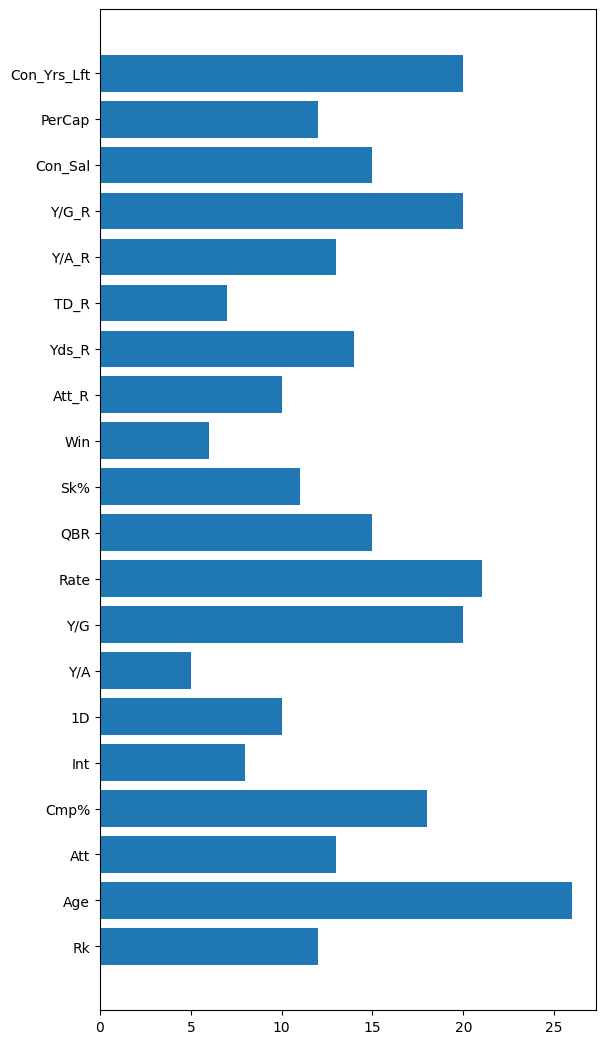

[{'Rk': 12, 'Age': 26, 'Att': 13, 'Cmp%': 18, 'Int': 8, '1D': 10, 'Y/A': 5, 'Y/G': 20, 'Rate': 21, 'QBR': 15, 'Sk%': 11, 'Win': 6, 'Att_R': 10, 'Yds_R': 14, 'TD_R': 7, 'Y/A_R': 13, 'Y/G_R': 20, 'Con_Sal': 15, 'PerCap': 12, 'Con_Yrs_Lft': 20}]


In [57]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 20))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [58]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [59]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 23, 'num_leaves': 5, 'min_child_samples': 6, 'learning_rate': 0.18302569150611953, 'log_max_bin': 9, 'colsample_bytree': 0.6119370145545304, 'reg_alpha': 0.001858538296879656, 'reg_lambda': 0.039314363197229946}


In [60]:
# Find best r2
print(1-automl.best_loss)

0.7304347826086957


In [61]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.26956521739130435, 'rf': 0.34782608695652173, 'xgboost': 0.32173913043478264, 'extra_tree': 0.3782608695652174, 'xgb_limitdepth': 0.28260869565217395, 'lrl1': inf}


In [62]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 7.917362710703974e-05, 'wall_clock_time': 33.49497652053833, 'metric_for_logging': {'pred_time': 7.917362710703974e-05, 'train_loss': 0.011956521739130421}, 'val_loss': 0.26956521739130435, 'training_iteration': 1, 'config': {'n_estimators': 23, 'num_leaves': 5, 'min_child_samples': 6, 'learning_rate': 0.18302569150611953, 'log_max_bin': 9, 'colsample_bytree': 0.6119370145545304, 'reg_alpha': 0.001858538296879656, 'reg_lambda': 0.039314363197229946}, 'config/n_estimators': 23, 'config/num_leaves': 5, 'config/min_child_samples': 6, 'config/learning_rate': 0.18302569150611953, 'config/log_max_bin': 9, 'config/colsample_bytree': 0.6119370145545304, 'config/reg_alpha': 0.001858538296879656, 'config/reg_lambda': 0.039314363197229946, 'experiment_tag': 'exp', 'time_total_s': 1.6184744834899902}


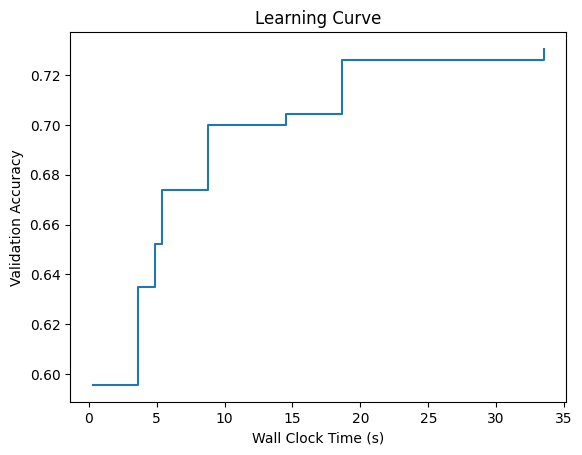

In [63]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [64]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]


In [65]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.971830985915493
log_loss = 0.22885754080771203


In [66]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [1 0 0 0 0 0 0 0 2 1 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 2 1 1 0
 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 2 0 2 0 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [67]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6896551724137931
log_loss = 0.7020204229813878


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [75]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Justin Herbert"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Justin Herbert"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
          Rk       Age         G        GS       Cmp       Att      Cmp%  \
327 -1.61607 -0.863773  1.503549  1.531532  2.241911  2.123342  0.990769   

          Yds        TD       TD%  ...     Lng_R     Y/A_R    Y/G_R     Fmb_R  \
327  1.926465  1.347008  0.073249  ...  0.531866 -0.249398 -0.29501  1.200306   

     Rookie  Vet  Con_Len   Con_Sal    PerCap  Con_Yrs_Lft  
327       1    0        4  26578755  0.031915            1  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
             Player  New_Con_Len
327  Justin Herbert            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0]


### **Classification For Contract Length QB 1.6 (AutoML)**

In [77]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G',
                             'Con_Len', 'GWD', 'Sk', 'TD', 'TD_R', 'Win', 'Y/A'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G',
                             'Con_Len', 'GWD', 'Sk', 'TD', 'TD_R', 'Win', 'Y/A'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [78]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 20:52:48] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 20:52:48] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 20:52:48] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 17 to 34


[flaml.automl.logger: 04-20 20:52:48] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 20:52:48] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 20:52:48] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 20:52:50] {2336} INFO - Estimated sufficient time budget=11062s. Estimated necessary time budget=255s.
[flaml.automl.logger: 04-20 20:52:50] {2383} INFO -  at 1.2s,	estimator lgbm's best error=0.4087,	best estimator lgbm's best error=0.4087
[flaml.automl.logger: 04-20 20:52:50] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 20:52:50] {2383} INFO -  at 1.8s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 20:52:50] {2210} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-20 20:52:51] {2383} INFO -  at 2.2s,	estimator lgbm's best error=0.40

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:52:56] {2383} INFO -  at 7.2s,	estimator xgboost's best error=0.3826,	best estimator lgbm's best error=0.3565
[flaml.automl.logger: 04-20 20:52:56] {2210} INFO - iteration 11, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:52:57] {2383} INFO -  at 8.8s,	estimator xgboost's best error=0.3522,	best estimator xgboost's best error=0.3522
[flaml.automl.logger: 04-20 20:52:57] {2210} INFO - iteration 12, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:52:58] {2383} INFO -  at 9.2s,	estimator lgbm's best error=0.3391,	best estimator lgbm's best error=0.3391
[flaml.automl.logger: 04-20 20:52:58] {2210} INFO - iteration 13, current learner lgbm
[flaml.automl.logger: 04-20 20:52:58] {2383} INFO -  at 9.7s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:52:58] {2210} INFO - iteration 14, current learner lgbm
[flaml.automl.logger: 04-20 20:52:59] {2383} INFO -  at 10.2s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:52:59] {2210} INFO - iteration 15, current learner lgbm
[flaml.automl.logger: 04-20 20:52:59] {2383} INFO -  at 10.8s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:52:59] {2210} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 04-20 20:53:00] {2383} INFO -  at 12.0s,	estimator lgbm's best error=0.2304,

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:04] {2383} INFO -  at 15.5s,	estimator xgboost's best error=0.3522,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:04] {2210} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:04] {2383} INFO -  at 15.7s,	estimator extra_tree's best error=0.4043,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:04] {2210} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 04-20 20:53:04] {2383} INFO -  at 16.0s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:04] {2210} INFO - iteration 27, current learner rf
[flaml.automl.logger: 04-20 20:53:05] {2383} INFO -  at 16.2s,	estimator rf's best error=0.3696,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:05] {2210} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:05] {2383} INFO -  at 16.4s,	estimator extra_

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:05] {2383} INFO -  at 16.8s,	estimator xgboost's best error=0.3522,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:05] {2210} INFO - iteration 30, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:06] {2383} INFO -  at 17.4s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:06] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 20:53:07] {2383} INFO -  at 18.2s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:07] {2210} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-20 20:53:07] {2383} INFO -  at 19.0s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:07] {2210} INFO - iteration 33, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:07] {2383} INFO -  at 19.1s,	estimator extra_tree's best error=0.4043,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:07] {2210} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 04-20 20:53:08] {2383} INFO -  at 19.4s,	estimator lgbm's best

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:10] {2383} INFO -  at 21.4s,	estimator xgboost's best error=0.3522,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:10] {2210} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 04-20 20:53:10] {2383} INFO -  at 21.6s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:10] {2210} INFO - iteration 40, current learner lgbm
[flaml.automl.logger: 04-20 20:53:11] {2383} INFO -  at 22.6s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:11] {2210} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:13] {2383} INFO -  at 24.4s,	estimator xgboost's best error=0.3391,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:13] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 20:53:14] {2383} INFO -  at 25.2s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:14] {2210} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:16] {2383} INFO -  at 27.5s,	estimator xgboost's best error=0.3391,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:16] {2210} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:16] {2383} INFO -  at 27.7s,	estimator extra_tree's best error=0.4000,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:16] {2210} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 04-20 20:53:16] {2383} INFO -  at 28.0s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:16] {2210} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 04-20 20:53:17] {2383} INFO -  at 28.4s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:17] {2210} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 04-20 20:53:17] {2383} INFO -  at 28.9s,	estimator lgbm's b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:25] {2383} INFO -  at 37.1s,	estimator xgboost's best error=0.3391,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:25] {2210} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 04-20 20:53:26] {2383} INFO -  at 37.5s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:26] {2210} INFO - iteration 60, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:26] {2383} INFO -  at 37.8s,	estimator extra_tree's best error=0.3913,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:26] {2210} INFO - iteration 61, current learner lgbm
[flaml.automl.logger: 04-20 20:53:28] {2383} INFO -  at 39.2s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:28] {2210} INFO - iteration 62, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:30] {2383} INFO -  at 41.8s,	estimator xgboost's best error=0.3391,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:30] {2210} INFO - iteration 63, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:30] {2383} INFO -  at 42.1s,	estimator extra_tree's best error=0.3609,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:30] {2210} INFO - iteration 64, current learner lgbm
[flaml.automl.logger: 04-20 20:53:31] {2383} INFO -  at 42.7s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:31] {2210} INFO - iteration 65, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:31] {2383} INFO -  at 42.9s,	estimator extra_tree's best error=0.3609,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:31] {2210} INFO - iteration 66, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:32] {2383} INFO -  at 43.2s,	

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:44] {2383} INFO -  at 56.0s,	estimator xgboost's best error=0.3391,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:44] {2210} INFO - iteration 98, current learner lgbm
[flaml.automl.logger: 04-20 20:53:45] {2383} INFO -  at 56.2s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:45] {2210} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 04-20 20:53:46] {2383} INFO -  at 57.3s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:46] {2210} INFO - iteration 100, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:46] {2383} INFO -  at 57.5s,	estimator extra_tree's best error=0.2696,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:46] {2210} INFO - iteration 101, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:46] {2383} INFO -  at 58.1s,	estimator xgboost's best error=0.3391,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:46] {2210} INFO - iteration 102, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:47] {2383} INFO -  at 58.7s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:47] {2210} INFO - iteration 103, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:47] {2383} INFO -  at 59.1s,	estimator extra_tree's best error=0.2652,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:47] {2210} INFO - iteration 104, current learner lgbm
[flaml.automl.logger: 04-20 20:53:48] {2383} INFO -  at 59.7s,	estimator lgbm's best error=0.2304,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:48] {2210} INFO - iteration 105, current learner extra_tree
[flaml.automl.logger: 04-20 20:53:48] {2383} INFO -  at 59.9s,	estimator extra_tree's best error=0.2652,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:48] {2210} INFO - iteration 106, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 20:53:49] {2383} INFO -  at 60.3s,	estimator xgb_limitdepth's best error=0.3587,	best estimator lgbm's best error=0.2304
[flaml.automl.logger: 04-20 20:53:49] {2619} INFO - retrain lgbm for 0.2s
[flaml.automl.logger: 04-20 20:53:49] {2622} INFO - retrained model: LGBMClassifier(colsample_bytree=0.5753835165513518,
               learning_rate=0.46138191186809213, max_bin=1023,
               min_child_samples=12, n_estimators=8, num_leaves=9,
               reg_alpha=0.0009765625, reg_lambda=0.00436647582107989,
               verbose=-1)
[flaml.automl.logger: 04-20 20:53:49] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 20:53:49] {1931} INFO - Time taken to find the best model: 9.685922145843506


In [ ]:

#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "QBclass1.5") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

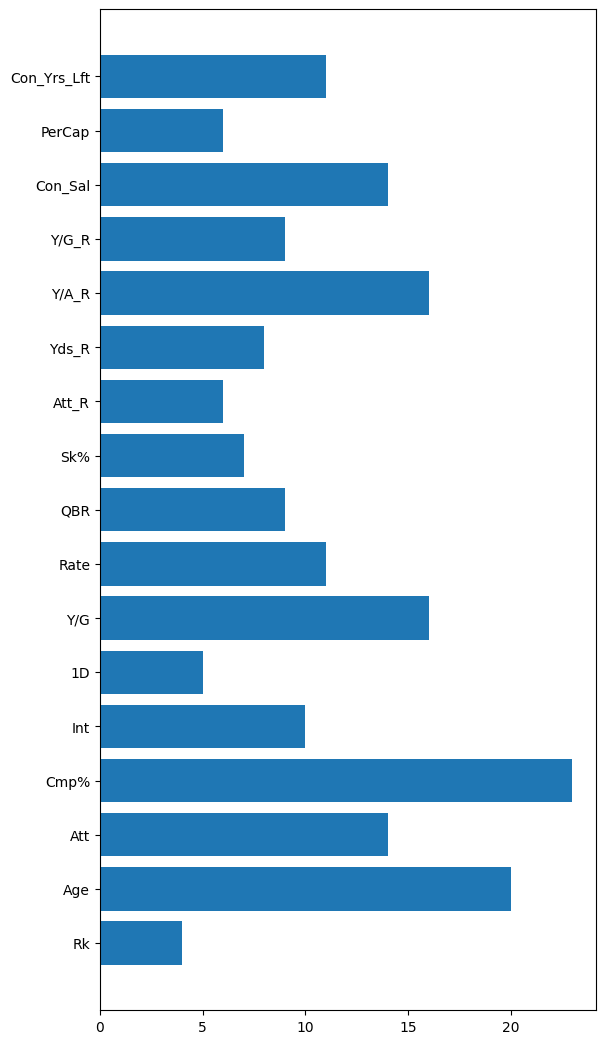

[{'Rk': 4, 'Age': 20, 'Att': 14, 'Cmp%': 23, 'Int': 10, '1D': 5, 'Y/G': 16, 'Rate': 11, 'QBR': 9, 'Sk%': 7, 'Att_R': 6, 'Yds_R': 8, 'Y/A_R': 16, 'Y/G_R': 9, 'Con_Sal': 14, 'PerCap': 6, 'Con_Yrs_Lft': 11}]


In [79]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 17))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [80]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [81]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'num_leaves': 9, 'min_child_samples': 12, 'learning_rate': 0.46138191186809213, 'log_max_bin': 10, 'colsample_bytree': 0.5753835165513518, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.00436647582107989}


In [82]:
# Find best r2
print(1-automl.best_loss)

0.7695652173913043


In [83]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2304347826086957, 'rf': 0.3695652173913043, 'xgboost': 0.3391304347826087, 'extra_tree': 0.2652173913043478, 'xgb_limitdepth': 0.358695652173913, 'lrl1': inf}


In [84]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00016498876654583473, 'wall_clock_time': 9.685922145843506, 'metric_for_logging': {'pred_time': 0.00016498876654583473, 'train_loss': 0.0021739130434782704}, 'val_loss': 0.2304347826086957, 'training_iteration': 1, 'config': {'n_estimators': 8, 'num_leaves': 9, 'min_child_samples': 12, 'learning_rate': 0.46138191186809213, 'log_max_bin': 10, 'colsample_bytree': 0.5753835165513518, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.00436647582107989}, 'config/n_estimators': 8, 'config/num_leaves': 9, 'config/min_child_samples': 12, 'config/learning_rate': 0.46138191186809213, 'config/log_max_bin': 10, 'config/colsample_bytree': 0.5753835165513518, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 0.00436647582107989, 'experiment_tag': 'exp', 'time_total_s': 0.46685004234313965}


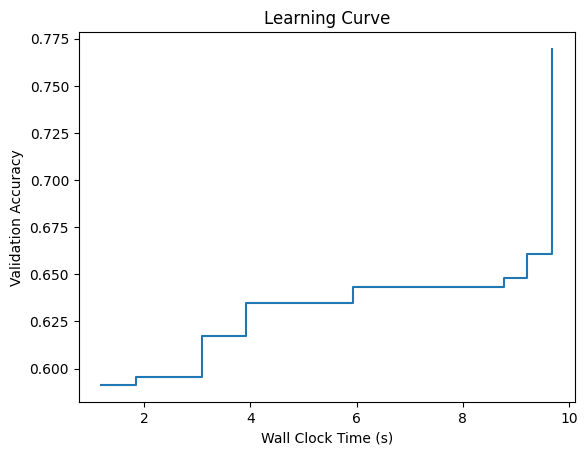

In [85]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [86]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]


In [87]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.9906103286384976
log_loss = 0.1309846152866559


In [88]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [1 0 0 0 0 2 0 0 2 1 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 2 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 2 0 2 0 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [89]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6206896551724138
log_loss = 0.7945617309432116


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [96]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Justin Herbert"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Justin Herbert"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
          Rk       Age         G        GS       Cmp       Att      Cmp%  \
327 -1.61607 -0.863773  1.503549  1.531532  2.241911  2.123342  0.990769   

          Yds        TD       TD%  ...     Lng_R     Y/A_R    Y/G_R     Fmb_R  \
327  1.926465  1.347008  0.073249  ...  0.531866 -0.249398 -0.29501  1.200306   

     Rookie  Vet  Con_Len   Con_Sal    PerCap  Con_Yrs_Lft  
327       1    0        4  26578755  0.031915            1  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
             Player  New_Con_Len
327  Justin Herbert            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [1]


### **Classification For Contract Length QB FINAL (AutoML)**

In [116]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G',
                             'Con_Len', 'GWD', 'Sk', 'TD', 'TD_R', 'Win', 'Y/A', 'PerCap', 'Att_R',
                             '1D', 'Sk%'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'Fmb_R', 'Lng_R', '1D_R', 'Loss', 'ANY/A', 'NY/A', 'Yds.1', 'Y/C',
                             'AY/A', 'Lng', 'TD%', 'Int%', 'Rookie', '4QC', 'Cmp', 'Yds', 'GS', 'G',
                             'Con_Len', 'GWD', 'Sk', 'TD', 'TD_R', 'Win', 'Y/A', 'PerCap', 'Att_R',
                             '1D', 'Sk%'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [117]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 21:03:12] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 21:03:12] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 21:03:12] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 17 to 34


[flaml.automl.logger: 04-20 21:03:12] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 21:03:12] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 21:03:12] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 21:03:12] {2336} INFO - Estimated sufficient time budget=3104s. Estimated necessary time budget=72s.
[flaml.automl.logger: 04-20 21:03:12] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.4087,	best estimator lgbm's best error=0.4087
[flaml.automl.logger: 04-20 21:03:12] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 21:03:13] {2383} INFO -  at 1.0s,	estimator lgbm's best error=0.4043,	best estimator lgbm's best error=0.4043
[flaml.automl.logger: 04-20 21:03:13] {2210} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:14] {2383} INFO -  at 2.2s,	estimator xgboost's best error=0.3696,	best estimator xgboost's best error=0.3696
[flaml.automl.logger: 04-20 21:03:14] {2210} INFO - iteration 3, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:15] {2383} INFO -  at 3.0s,	estimator extra_tree's best error=0.4043,	best estimator xgboost's best error=0.3696
[flaml.automl.logger: 04-20 21:03:15] {2210} INFO - iteration 4, current learner rf
[flaml.automl.logger: 04-20 21:03:15] {2383} INFO -  at 3.4s,	estimator rf's best error=0.3913,	best estimator xgboost's best error=0.3696
[flaml.automl.logger: 04-20 21:03:15] {2210} INFO - iteration 5, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:16] {2383} INFO -  at 4.0s,	estimator extra_tree's best error=0.3957,	best estimator xgboost's best error=0.3696
[flaml.automl.logger: 04-20 21:03:16] {2210} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-20 21:03:16] {2383} INFO -  at 4.2s,	estimator lgbm's best error=0.4043,	best estimator xgboost's best error=0.3696
[flaml.automl.logger: 04-20 21:03:16] {2210} INFO - iteration 7, current learner rf
[flaml.automl.logger: 04-20 21:03:16] {2383} INFO -  at 4.7s,	estimator rf's bes

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:21] {2383} INFO -  at 9.0s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:21] {2210} INFO - iteration 16, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:21] {2383} INFO -  at 9.4s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:21] {2210} INFO - iteration 17, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:23] {2383} INFO -  at 11.0s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:23] {2210} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 04-20 21:03:25] {2383} INFO -  at 12.9s,	estimator lgbm's best error=0.4043,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:25] {2210} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:26] {2383} INFO -  at 14.0s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:26] {2210} INFO - iteration 20, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:26] {2383} INFO -  at 14.8s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:26] {2210} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:28] {2383} INFO -  at 16.5s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:28] {2210} INFO - iteration 22, current learner rf
[flaml.automl.logger: 04-20 21:03:28] {2383} INFO -  at 16.7s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:28] {2210} INFO - iteration 23, current learner rf
[flaml.automl.logger: 04-20 21:03:29] {2383} INFO -  at 16.9s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:29] {2210} INFO - iteration 24, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:29] {2383} INFO -  at 17.1s,	estimator extra_tree's best error=0.3957,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:29] {2210} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:29] {2383} INFO -  at 17.3s,	estimato

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:30] {2383} INFO -  at 18.3s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:30] {2210} INFO - iteration 28, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:30] {2383} INFO -  at 18.5s,	estimator extra_tree's best error=0.3957,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:30] {2210} INFO - iteration 29, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:30] {2383} INFO -  at 18.7s,	estimator extra_tree's best error=0.3957,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:30] {2210} INFO - iteration 30, current learner rf
[flaml.automl.logger: 04-20 21:03:31] {2383} INFO -  at 18.9s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:31] {2210} INFO - iteration 31, current learner rf
[flaml.automl.logger: 04-20 21:03:31] {2383} INFO -  at 19.2s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:31] {2210} INFO - iteration 32, current learner rf
[flaml.automl.logger: 04-20 21:03:31] {2383} INFO -  at 19.5s,	estimator rf'

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:33] {2383} INFO -  at 21.0s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:33] {2210} INFO - iteration 36, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:33] {2383} INFO -  at 21.2s,	estimator extra_tree's best error=0.3957,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:33] {2210} INFO - iteration 37, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:34] {2383} INFO -  at 22.1s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:34] {2210} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:35] {2383} INFO -  at 23.1s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:35] {2210} INFO - iteration 39, current learner rf
[flaml.automl.logger: 04-20 21:03:35] {2383} INFO -  at 23.3s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:35] {2210} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:36] {2383} INFO -  at 24.1s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:36] {2210} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:38] {2383} INFO -  at 26.3s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:38] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 21:03:38] {2383} INFO -  at 26.7s,	estimator lgbm's best error=0.4043,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:38] {2210} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:40] {2383} INFO -  at 28.0s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:40] {2210} INFO - iteration 44, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:40] {2383} INFO -  at 28.2s,	estimator extra_tree's best error=0.3783,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:40] {2210} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:40] {2383} INFO -  at 28.4s,	estimator extra_tree's best error=0.3783,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:40] {2210} INFO - iteration 46, current learner rf
[flaml.automl.logger: 04-20 21:03:40] {2383} INFO -  at 28.7s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:40] {2210} INFO - iteration 47, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:41] {2383} INFO -  at 28.9s,	estimator extra_tree's best error=0.3783,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:41] {2210} INFO - iteration 48, current learner rf
[flaml.automl.logger: 04-20 21:03:41] {2383} INFO -  at 29.1

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:42] {2383} INFO -  at 30.3s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:42] {2210} INFO - iteration 50, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:42] {2383} INFO -  at 30.4s,	estimator extra_tree's best error=0.3783,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:42] {2210} INFO - iteration 51, current learner rf
[flaml.automl.logger: 04-20 21:03:42] {2383} INFO -  at 30.7s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:42] {2210} INFO - iteration 52, current learner rf
[flaml.automl.logger: 04-20 21:03:43] {2383} INFO -  at 30.9s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:43] {2210} INFO - iteration 53, current learner rf
[flaml.automl.logger: 04-20 21:03:43] {2383} INFO -  at 31.2s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:43] {2210} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 04-20 21:03:43] {2383} INFO -  at 31.6s,	estimator lgbm's best error

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:45] {2383} INFO -  at 32.9s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:45] {2210} INFO - iteration 59, current learner rf
[flaml.automl.logger: 04-20 21:03:45] {2383} INFO -  at 33.2s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:45] {2210} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:45] {2383} INFO -  at 33.6s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:45] {2210} INFO - iteration 61, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:46] {2383} INFO -  at 33.9s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:46] {2210} INFO - iteration 62, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:47] {2383} INFO -  at 35.2s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:47] {2210} INFO - iteration 63, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:47] {2383} INFO -  at 35.3s,	estimator extra_tree's best error=0.3739,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:47] {2210} INFO - iteration 64, current learner rf
[flaml.automl.logger: 04-20 21:03:47] {2383} INFO -  at 35.6s,	estimator rf's best error=0.3478,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:47] {2210} INFO - iteration 65, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:48] {2383} INFO -  at 36.7s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:48] {2210} INFO - iteration 66, current learner extra_tree
[flaml.automl.logger: 04-20 21:03:49] {2383} INFO -  at 37.2s,	estimator extra_tree's best error=0.3739,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:49] {2210} INFO - iteration 67, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:50] {2383} INFO -  at 38.4s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:50] {2210} INFO - iteration 68, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:50] {2383} INFO -  at 38.8s,	estimator lgbm's best error=0.4043,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:50] {2210} INFO - iteration 69, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:51] {2383} INFO -  at 39.2s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:51] {2210} INFO - iteration 70, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 21:03:52] {2383} INFO -  at 40.2s,	estimator xgboost's best error=0.3261,	best estimator xgboost's best error=0.3261
[flaml.automl.logger: 04-20 21:03:52] {2210} INFO - iteration 71, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:55] {2383} INFO -  at 43.0s,	estimator xgb_limitdepth's best error=0.2957,	best estimator xgb_limitdepth's best error=0.2957
[flaml.automl.logger: 04-20 21:03:55] {2210} INFO - iteration 72, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:03:56] {2383} INFO -  at 44.3s,	estimator xgb_limitdepth's best error=0.2957,	best estimator xgb_limitdepth's best error=0.2957
[flaml.automl.logger: 04-20 21:03:56] {2210} INFO - iteration 73, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 21:03:58] {2383} INFO -  at 46.7s,	estimator xgb_limitdepth's best error=0.2826,	best estimator xgb_limitdepth's best error=0.2826
[flaml.automl.logger: 04-20 21:03:58] {2210} INFO - iteration 74, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:00] {2383} INFO -  at 48.5s,	estimator xgb_limitdepth's best error=0.2826,	best estimator xgb_limitdepth's best error=0.2826
[flaml.automl.logger: 04-20 21:04:00] {2210} INFO - iteration 75, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:03] {2383} INFO -  at 51.3s,	estimator xgb_limitdepth's best error=0.2826,	best estimator xgb_limitdepth's best error=0.2826
[flaml.automl.logger: 04-20 21:04:03] {2210} INFO - iteration 76, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:04] {2383} INFO -  at 52.2s,	estimator xgboost's best error=0.3261,	best estimator xgb_limitdepth's best error=0.2826
[flaml.automl.logger: 04-20 21:04:04] {2210} INFO - iteration 77, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:04] {2383} INFO -  at 52.6s,	estimator extra_tree's best error=0.3739,	best estimator xgb_limitdepth's best error=0.2826
[flaml.automl.logger: 04-20 21:04:04] {2210} INFO - iteration 78, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:06] {2383} INFO -  at 54.4s,	estimator xgb_limitdepth's best error=0.2783,	best estimator xgb_limitdepth's best error=0.2783
[flaml.automl.logger: 04-20 21:04:06] {2210} INFO - iteration 79, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 21:04:08] {2383} INFO -  at 56.3s,	estimator xgb_limitdepth's best error=0.2783,	best estimator xgb_limitdepth's best error=0.2783
[flaml.automl.logger: 04-20 21:04:08] {2210} INFO - iteration 80, current learner extra_tree
[flaml.automl.logger: 04-20 21:04:08] {2383} INFO -  at 56.5s,	estimator extra_tree's best error=0.3739,	best estimator xgb_limitdepth's best error=0.2783
[flaml.automl.logger: 04-20 21:04:08] {2210} INFO - iteration 81, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:09] {2383} INFO -  at 57.6s,	estimator xgb_limitdepth's best error=0.2565,	best estimator xgb_limitdepth's best error=0.2565
[flaml.automl.logger: 04-20 21:04:09] {2210} INFO - iteration 82, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:10] {2383} INFO -  at 58.6s,	estimator xgb_limitdepth's best error=0.2565,	best estimator xgb_limitdepth's best error=0.2565
[flaml.automl.logger: 04-20 21:04:10] {2210} INFO - iteration 83, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 21:04:12] {2383} INFO -  at 60.0s,	estimator xgb_limitdepth's best error=0.2522,	best estimator xgb_limitdepth's best error=0.2522
[flaml.automl.logger: 04-20 21:04:12] {2619} INFO - retrain xgb_limitdepth for 0.1s
[flaml.automl.logger: 04-20 21:04:12] {2622} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.7272717040270471, colsample_bynode=None,
              colsample_bytree=0.6615972660598576, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=0.24258309422163266, missing=nan,
              monotone_constraints=None, n_estima

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [137]:

#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "QBclassFinal") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

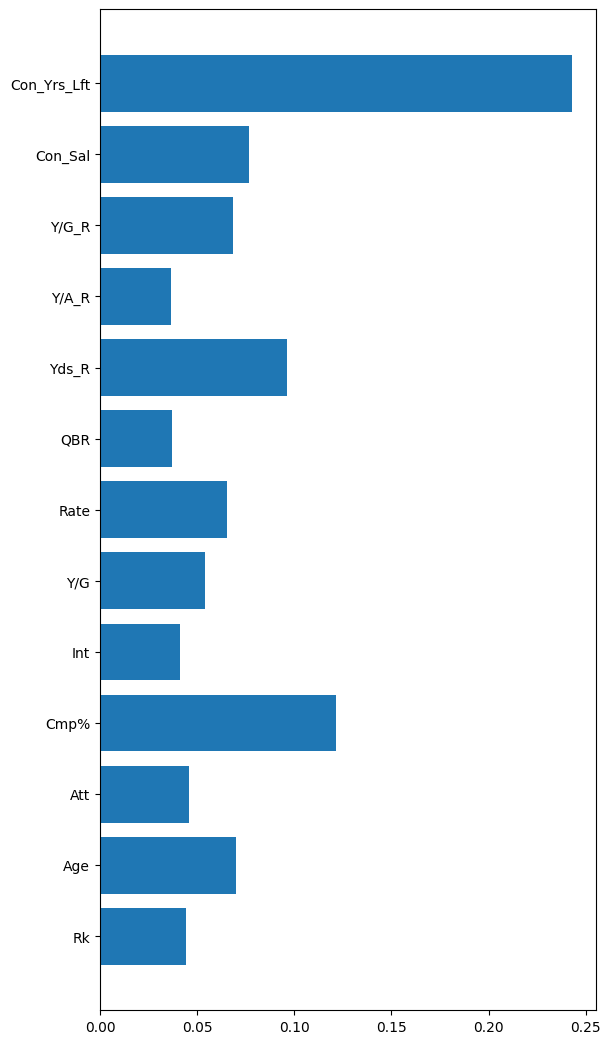

[{'Rk': 0.04402824491262436, 'Age': 0.07019957154989243, 'Att': 0.045734383165836334, 'Cmp%': 0.12133891135454178, 'Int': 0.04114948585629463, 'Y/G': 0.05405159667134285, 'Rate': 0.06527671962976456, 'QBR': 0.03717632591724396, 'Yds_R': 0.09609755128622055, 'Y/A_R': 0.03651943802833557, 'Y/G_R': 0.0684838816523552, 'Con_Sal': 0.07678092271089554, 'Con_Yrs_Lft': 0.24316301941871643}]


In [118]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 13))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [119]:
# Find Best Estimator
print(automl.best_estimator)

xgb_limitdepth


In [120]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'max_depth': 6, 'min_child_weight': 0.24258309422163266, 'learning_rate': 1.0, 'subsample': 1.0, 'colsample_bylevel': 0.7272717040270471, 'colsample_bytree': 0.6615972660598576, 'reg_alpha': 0.07829894173129269, 'reg_lambda': 9.317841832059162}


In [121]:
# Find best r2
print(1-automl.best_loss)

0.7478260869565216


In [122]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.4043478260869565, 'rf': 0.34782608695652173, 'xgboost': 0.3260869565217391, 'extra_tree': 0.3739130434782609, 'xgb_limitdepth': 0.2521739130434783, 'lrl1': inf}


In [123]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.000289904552957286, 'wall_clock_time': 60.04468512535095, 'metric_for_logging': {'pred_time': 0.000289904552957286, 'train_loss': 0.03913043478260873}, 'val_loss': 0.2521739130434783, 'training_iteration': 1, 'config': {'n_estimators': 8, 'max_depth': 6, 'min_child_weight': 0.24258309422163266, 'learning_rate': 1.0, 'subsample': 1.0, 'colsample_bylevel': 0.7272717040270471, 'colsample_bytree': 0.6615972660598576, 'reg_alpha': 0.07829894173129269, 'reg_lambda': 9.317841832059162}, 'config/n_estimators': 8, 'config/max_depth': 6, 'config/min_child_weight': 0.24258309422163266, 'config/learning_rate': 1.0, 'config/subsample': 1.0, 'config/colsample_bylevel': 0.7272717040270471, 'config/colsample_bytree': 0.6615972660598576, 'config/reg_alpha': 0.07829894173129269, 'config/reg_lambda': 9.317841832059162, 'experiment_tag': 'exp', 'time_total_s': 1.4275026321411133}


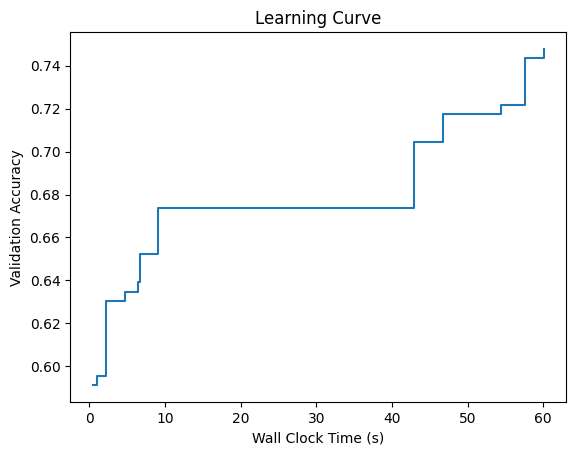

In [124]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [125]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 1 0 2 2 2 0 0 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 2 2 0 0 2 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 1 0 1 0 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 0 0 2 0 1 0 0 0 1 2 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0]


In [126]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 1.0
log_loss = 0.1362178606038154


In [127]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [1 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 2 0 0 1 0 1]
-------------------------------------------------------------------------------
True labels      [0 0 2 0 2 0 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


In [128]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.7068965517241379
log_loss = 0.7472088473338283


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [136]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Justin Herbert"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Justin Herbert"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
          Rk       Age         G        GS       Cmp       Att      Cmp%  \
327 -1.61607 -0.863773  1.503549  1.531532  2.241911  2.123342  0.990769   

          Yds        TD       TD%  ...     Lng_R     Y/A_R    Y/G_R     Fmb_R  \
327  1.926465  1.347008  0.073249  ...  0.531866 -0.249398 -0.29501  1.200306   

     Rookie  Vet  Con_Len   Con_Sal    PerCap  Con_Yrs_Lft  
327       1    0        4  26578755  0.031915            1  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
             Player  New_Con_Len
327  Justin Herbert            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [1]


## **Percent of Cap $\checkmark$**

### **Regression For Percent Of Cap QB 1.0 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/feeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['%Cap']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-16 20:50:31] {2726} INFO - task = regression
[flaml.automl.automl: 03-16 20:50:31] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-16 20:50:31] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-16 20:50:31] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-16 20:50:31] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-16 20:50:31] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-16 20:50:31] {3472} INFO - Estimated sufficient time budget=1725s. Estimated necessary time budget=12s.
[flaml.automl.automl: 03-16 20:50:31] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.8095,	best estimator lgbm's best error=0.8095
[flaml.automl.automl: 03-16 20:50:31] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-16 20:50:31] {3519} INFO -  at 0.6s,	estimator lgbm's best error=0.8095,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

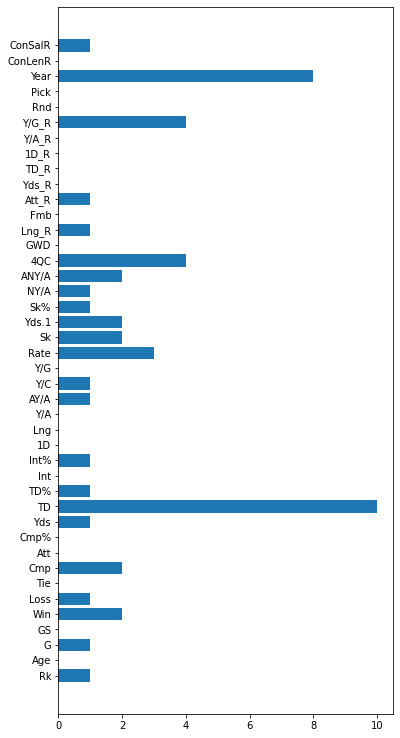

[{'Rk': 1, 'Age': 0, 'G': 1, 'GS': 0, 'Win': 2, 'Loss': 1, 'Tie': 0, 'Cmp': 2, 'Att': 0, 'Cmp%': 0, 'Yds': 1, 'TD': 10, 'TD%': 1, 'Int': 0, 'Int%': 1, '1D': 0, 'Lng': 0, 'Y/A': 0, 'AY/A': 1, 'Y/C': 1, 'Y/G': 0, 'Rate': 3, 'Sk': 2, 'Yds.1': 2, 'Sk%': 1, 'NY/A': 1, 'ANY/A': 2, '4QC': 4, 'GWD': 0, 'Lng_R': 1, 'Fmb': 0, 'Att_R': 1, 'Yds_R': 0, 'TD_R': 0, '1D_R': 0, 'Y/A_R': 0, 'Y/G_R': 4, 'Rnd': 0, 'Pick': 0, 'Year': 8, 'ConLenR': 0, 'ConSalR': 1}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 42))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 13, 'num_leaves': 5, 'min_child_samples': 2, 'learning_rate': 0.11417614448857683, 'log_max_bin': 4, 'colsample_bytree': 0.7843032471272811, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.008607792700548404}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.4507690826184422


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.5492309173815578, 'rf': 0.6933610921009228, 'xgboost': 0.5983791020182834, 'extra_tree': 0.5817829836033981, 'xgb_limitdepth': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 4.659095177283654e-05, 'wall_clock_time': 54.22570610046387, 'metric_for_logging': {'pred_time': 4.659095177283654e-05, 'train_loss': 0.22217695072785731}, 'val_loss': 0.5492309173815578, 'training_iteration': 1, 'config': {'n_estimators': 13, 'num_leaves': 5, 'min_child_samples': 2, 'learning_rate': 0.11417614448857683, 'log_max_bin': 4, 'colsample_bytree': 0.7843032471272811, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.008607792700548404}, 'config/n_estimators': 13, 'config/num_leaves': 5, 'config/min_child_samples': 2, 'config/learning_rate': 0.11417614448857683, 'config/log_max_bin': 4, 'config/colsample_bytree': 0.7843032471272811, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 0.008607792700548404, 'experiment_tag': 'exp', 'time_total_s': 0.08789730072021484}


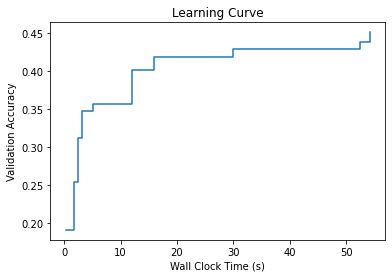

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.01419731 0.02017886 0.01594456 0.01322239 0.01322239 0.01822356
 0.09889503 0.08637759 0.08890346 0.03713275 0.01179809 0.0268564
 0.08939699 0.0230329  0.09734905 0.02139897 0.0403182  0.08468899
 0.10294129 0.01322239 0.01322239 0.07285187 0.09703348 0.01179809
 0.01442417 0.05581086 0.01322239 0.03394018 0.01322239 0.02688407
 0.02643582 0.0230329  0.04197378 0.01179809 0.01738427 0.02688407
 0.08857787 0.01500919 0.01322239 0.02795479 0.02387594 0.02290102
 0.01179809 0.01738427 0.02596312 0.01322239 0.01179809 0.01500919
 0.01179809 0.01822356 0.0403182  0.09460439 0.02290102 0.08151463
 0.01179809 0.02010644 0.07850647 0.06710263 0.01179809 0.07895401
 0.01738427 0.01839206 0.02387594 0.01322239 0.06026969 0.01322239
 0.03779841 0.01322239 0.01322239 0.04508848 0.01322239 0.05444469
 0.01831964 0.06715663 0.04086455 0.02010644 0.01322239 0.01322239
 0.01500919 0.01322239 0.01714634 0.01822356 0.02818214 0.01179809
 0.01179809 0.01322239 0.0230329  0.01179809 0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.7543624259836759
mse = 0.0004484322836040903
mae = 0.01620666424659255


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.01358489 0.07819257 0.03394018 0.01179809 0.01322239 0.01322239
 0.01179809 0.01322239 0.01322239 0.01738427 0.01322239 0.01594456
 0.01179809 0.02783543 0.01322239]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.33909240512106764
mse = 0.0005129857831288258
mae = 0.016623066298602693


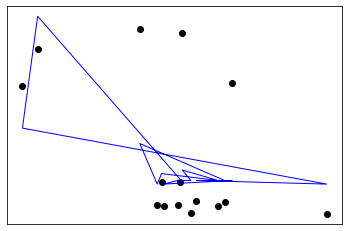

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

          Player     Rk  Age   G  GS  Win  Loss  Tie   Cmp   Att  ...  Rnd  \
45  Daniel Jones  21.75   25  54  53   21    31    1  1113  1740  ...    1   

    Pick  Year  ConLenR  ConSalR  ConLen  ConSal  FTag  PPY  %Cap  
45     6  2019        4   25.664       0     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [0.03059065]


### **Regression For Percent Of Cap QB 1.1 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/Zfeeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['%Cap']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap', 'Tm'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-16 20:56:02] {2726} INFO - task = regression
[flaml.automl.automl: 03-16 20:56:02] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-16 20:56:02] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-16 20:56:02] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-16 20:56:02] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-16 20:56:02] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-16 20:56:02] {3472} INFO - Estimated sufficient time budget=693s. Estimated necessary time budget=5s.
[flaml.automl.automl: 03-16 20:56:02] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8366,	best estimator lgbm's best error=0.8366
[flaml.automl.automl: 03-16 20:56:02] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-16 20:56:02] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.8366,	best estimator 

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

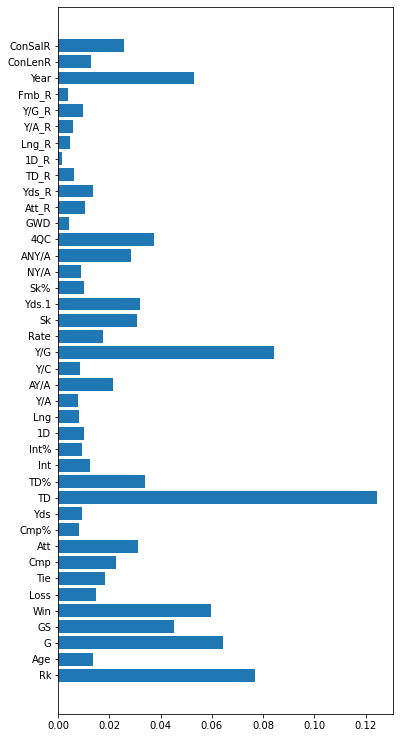

[{'Rk': 0.07675559942809448, 'Age': 0.01373126741088214, 'G': 0.064263464503584, 'GS': 0.04532067451480391, 'Win': 0.059713918098687466, 'Loss': 0.014574741961770271, 'Tie': 0.018398937208595426, 'Cmp': 0.022667609498736235, 'Att': 0.03128528574492472, 'Cmp%': 0.007957011889691529, 'Yds': 0.009240768599544917, 'TD': 0.12444545052833565, 'TD%': 0.033958877329099385, 'Int': 0.012495831541568666, 'Int%': 0.00927193734302962, '1D': 0.009881607538666444, 'Lng': 0.008077385645270139, 'Y/A': 0.007637907262635852, 'AY/A': 0.021449322261756613, 'Y/C': 0.008401667530787402, 'Y/G': 0.08418810086732248, 'Rate': 0.01734047479374269, 'Sk': 0.030702775642456923, 'Yds.1': 0.03202164134092181, 'Sk%': 0.010261224064917654, 'NY/A': 0.009028883234805116, 'ANY/A': 0.02841624658002784, '4QC': 0.037367625203698296, 'GWD': 0.004178124798483455, 'Att_R': 0.010575616323571575, 'Yds_R': 0.013572007483095977, 'TD_R': 0.006161229401493941, '1D_R': 0.0015020839187867114, 'Lng_R': 0.0045636395251926155, 'Y/A_R': 0.0

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 40))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

rf


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 66, 'max_features': 0.47078536429016116, 'max_leaves': 21}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.49112869970627604


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.6784496664937583, 'rf': 0.508871300293724, 'xgboost': 0.564785178374428, 'extra_tree': 0.5460253274396539, 'xgb_limitdepth': 0.6676167277117905}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0006306501245310184, 'wall_clock_time': 12.290813207626343, 'metric_for_logging': {'pred_time': 0.0006306501245310184, 'train_loss': 0.07575713477519155}, 'val_loss': 0.508871300293724, 'training_iteration': 1, 'config': {'n_estimators': 66, 'max_features': 0.47078536429016116, 'max_leaves': 21}, 'config/n_estimators': 66, 'config/max_features': 0.47078536429016116, 'config/max_leaves': 21, 'experiment_tag': 'exp', 'time_total_s': 0.8417456150054932}


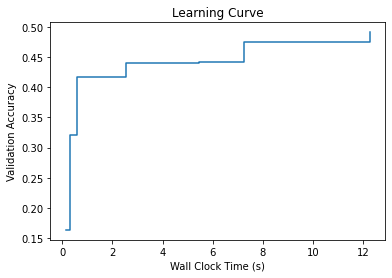

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.00966286 0.0760908  0.04253225 0.00553634 0.00694734 0.09545614
 0.02226827 0.00533405 0.03490219 0.00745221 0.00539832 0.00530792
 0.05826294 0.02156944 0.00724469 0.00886165 0.00925113 0.13077959
 0.00980901 0.00464707 0.11082155 0.03608341 0.09723341 0.01188972
 0.02114151 0.00854433 0.04355869 0.00527415 0.02682997 0.05237482
 0.00518361 0.02310144 0.02768178 0.00690465 0.10161207 0.11909259
 0.04524927 0.00910898 0.00437951 0.01495476 0.10389742 0.02262929
 0.08848301 0.0236022  0.01190826 0.08111485 0.08305303 0.03667176
 0.09044644 0.00809071 0.00482464 0.10786538 0.00543289 0.00491228
 0.00501884 0.07337435 0.04933904 0.1045112  0.05047784 0.10240453
 0.00740749 0.02464875 0.0041538  0.10308105 0.01048968 0.05164483
 0.00962052 0.00795558 0.01663745 0.07754682 0.04427972 0.0181315
 0.09349303 0.00901983 0.01601545 0.00816221 0.00527873 0.00568259
 0.00474119 0.00419427 0.03034244 0.00478539 0.04346515 0.00407446
 0.11041251 0.10579063 0.03040895 0.01342636 0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.920223290069137
mse = 0.0001522055242557849
mae = 0.008987002242214676


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.0218823  0.08003396 0.01047814 0.01045844 0.00530827 0.09787064
 0.03271456 0.08082205 0.00518917 0.08967833 0.0041272  0.05287477
 0.04794749]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.417237835807198
mse = 0.0007890556254630487
mae = 0.02048983514270838


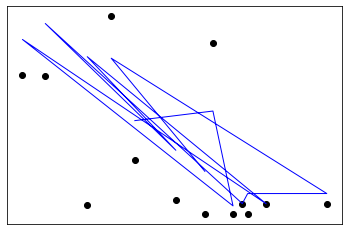

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

          Player        Rk   Tm       Age Pos         G        GS     Win  \
40  Daniel Jones -0.517994  NYG -0.960165  QB  0.714385  0.767304  0.2433   

        Loss      Tie  ...     Y/G_R    Fmb_R  Year  ConLenR  ConSalR  ConLen  \
40  1.101865  0.85901  ...  1.297224  1.65654  2019        4   25.664       0   

    ConSal  FTag  PPY  %Cap  
40     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [0.04582338]


### **Regression For Percent Of Cap QB 1.2 (AutoML)**

In [ ]:
#Load in Data
Zfeeder = pd.read_csv("../content/QB_data/Zfeeder.csv")
#Split into a train and test set 
feeder_train = Zfeeder[Zfeeder.Year < 2018]
feeder_test = Zfeeder[Zfeeder.Year > 2017]
feeder_train = feeder_train[['Player', 'ConSalR', 'Year', '4QC', 'ANY/A', 'Yds.1', 'Sk', 'Y/G', 'TD%', 'TD', 'Att', 'Cmp', 'Win', 'GS', 'G', 'Rk', 'Age', '%Cap']]
feeder_train = feeder_train.dropna()
feeder_test = feeder_test[['Player', 'ConSalR', 'Year', '4QC', 'ANY/A', 'Yds.1', 'Sk', 'Y/G', 'TD%', 'TD', 'Att', 'Cmp', 'Win', 'GS', 'G', 'Rk', 'Age', '%Cap']]
feeder_test = feeder_test.dropna()

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['%Cap']
features = feeder_train.drop(['%Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-16 21:03:02] {2726} INFO - task = regression
[flaml.automl.automl: 03-16 21:03:02] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-16 21:03:02] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-16 21:03:02] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-16 21:03:02] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-16 21:03:02] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-16 21:03:03] {3472} INFO - Estimated sufficient time budget=1983s. Estimated necessary time budget=14s.
[flaml.automl.automl: 03-16 21:03:03] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.8353,	best estimator lgbm's best error=0.8353
[flaml.automl.automl: 03-16 21:03:03] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-16 21:03:03] {3519} INFO -  at 0.4s,	estimator lgbm's best error=0.8353,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

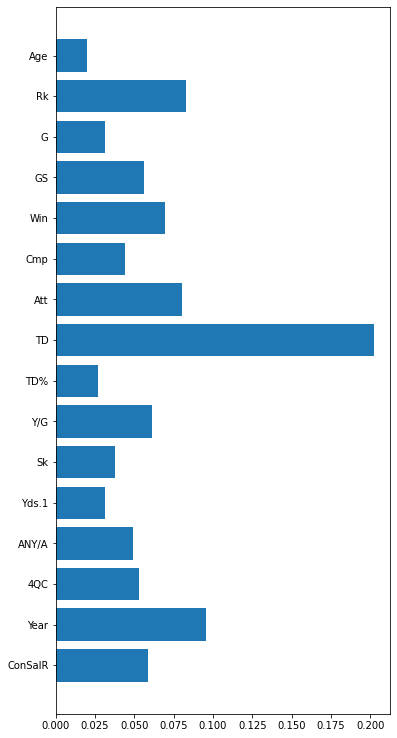

[{'ConSalR': 0.05892963211443255, 'Year': 0.0953157007415438, '4QC': 0.052802213769809876, 'ANY/A': 0.04935189225843844, 'Yds.1': 0.031621081355993494, 'Sk': 0.03768746679405432, 'Y/G': 0.061495094646765544, 'TD%': 0.026762927776353976, 'TD': 0.2025026792840655, 'Att': 0.08001832689484753, 'Cmp': 0.04399813732518941, 'Win': 0.06925536954472128, 'GS': 0.056119997168956236, 'G': 0.031428889061975634, 'Rk': 0.08253072455670772, 'Age': 0.020179866706144748}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 16))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 31, 'max_leaves': 19, 'max_features': 0.6512749658017583}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.5058419193439271


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.595566891676431, 'rf': 0.5480336346073609, 'xgboost': 0.6937059235062454, 'extra_tree': 0.4941580806560729, 'xgb_limitdepth': 0.8448381433748751}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00035978626356765686, 'wall_clock_time': 44.75777792930603, 'metric_for_logging': {'pred_time': 0.00035978626356765686, 'train_loss': 0.043918284890941316}, 'val_loss': 0.4941580806560729, 'training_iteration': 1, 'config': {'n_estimators': 31, 'max_leaves': 19, 'max_features': 0.6512749658017583}, 'config/n_estimators': 31, 'config/max_leaves': 19, 'config/max_features': 0.6512749658017583, 'experiment_tag': 'exp', 'time_total_s': 0.30999255180358887}


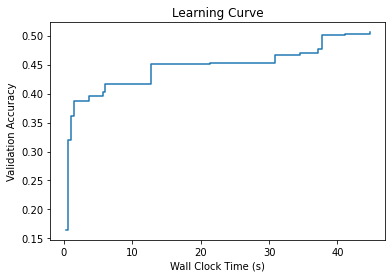

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.0099477  0.06872529 0.02742724 0.00812468 0.01193381 0.10806229
 0.01302098 0.01004509 0.01923171 0.01279949 0.00829928 0.00829955
 0.06831181 0.01758824 0.00957413 0.00916392 0.01113435 0.12242569
 0.01213479 0.00838284 0.11431907 0.02033875 0.101099   0.00999158
 0.0117594  0.00853948 0.02856289 0.00811399 0.020843   0.02293264
 0.00829928 0.01425123 0.02357835 0.00829308 0.1177948  0.14961592
 0.03029088 0.00850992 0.00811399 0.01617206 0.12881323 0.0153545
 0.09203129 0.01827729 0.00811399 0.09182378 0.10493515 0.02125672
 0.09977166 0.01001511 0.00938376 0.10792411 0.00811399 0.00778311
 0.00807014 0.05474386 0.0447056  0.10760246 0.03958613 0.11435164
 0.01002957 0.0113816  0.00815853 0.10675066 0.00829928 0.03163919
 0.00925218 0.00973421 0.01645807 0.08115045 0.03384887 0.01267654
 0.10735936 0.00964324 0.01669931 0.01065316 0.00975626 0.00836207
 0.00886677 0.00811399 0.0260064  0.00811399 0.02055785 0.00838284
 0.10808038 0.12621539 0.02588388 0.01305726 0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.9358660479506449
mse = 0.0001223607968130939
mae = 0.008608388627285676


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.01228216 0.08222234 0.009277   0.00976383 0.00829955 0.09931361
 0.02975444 0.09090604 0.0084411  0.09304751 0.00802424 0.03934504
 0.03713108]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.29530014781555247
mse = 0.0009541583458825127
mae = 0.021344092217688206


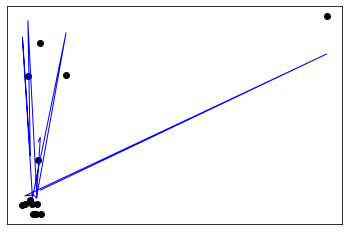

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

          Player        Rk   Tm       Age Pos         G        GS     Win  \
40  Daniel Jones -0.517994  NYG -0.960165  QB  0.714385  0.767304  0.2433   

        Loss      Tie  ...     Y/G_R    Fmb_R  Year  ConLenR  ConSalR  ConLen  \
40  1.101865  0.85901  ...  1.297224  1.65654  2019        4   25.664       0   

    ConSal  FTag  PPY  %Cap  
40     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [0.03018613]


### **Regression For Percent Of Cap QB 1.3 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/Zfeeder.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2018]
feeder_test = feeder[feeder.Year > 2017]

# Initialize a data transformer
dtrans = DataTransformer()

#Prepare Data for modeling 
players = feeder_train[['Player']]
feeder_train = feeder_train.drop(['Player'], axis=1)
targets = feeder_train['%Cap']
features = feeder_train.drop(['ConLen', 'ConSal', 'FTag', 'PPY', '%Cap', 'Tm'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 03-16 20:56:02] {2726} INFO - task = regression
[flaml.automl.automl: 03-16 20:56:02] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-16 20:56:02] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-16 20:56:02] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-16 20:56:02] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-16 20:56:02] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-16 20:56:02] {3472} INFO - Estimated sufficient time budget=693s. Estimated necessary time budget=5s.
[flaml.automl.automl: 03-16 20:56:02] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8366,	best estimator lgbm's best error=0.8366
[flaml.automl.automl: 03-16 20:56:02] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-16 20:56:02] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.8366,	best estimator 

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

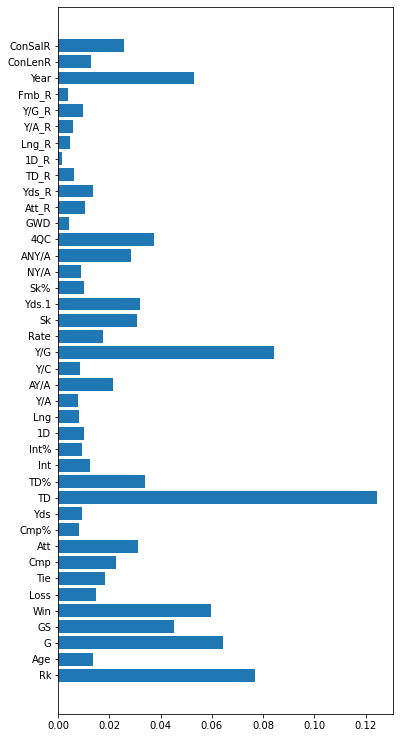

[{'Rk': 0.07675559942809448, 'Age': 0.01373126741088214, 'G': 0.064263464503584, 'GS': 0.04532067451480391, 'Win': 0.059713918098687466, 'Loss': 0.014574741961770271, 'Tie': 0.018398937208595426, 'Cmp': 0.022667609498736235, 'Att': 0.03128528574492472, 'Cmp%': 0.007957011889691529, 'Yds': 0.009240768599544917, 'TD': 0.12444545052833565, 'TD%': 0.033958877329099385, 'Int': 0.012495831541568666, 'Int%': 0.00927193734302962, '1D': 0.009881607538666444, 'Lng': 0.008077385645270139, 'Y/A': 0.007637907262635852, 'AY/A': 0.021449322261756613, 'Y/C': 0.008401667530787402, 'Y/G': 0.08418810086732248, 'Rate': 0.01734047479374269, 'Sk': 0.030702775642456923, 'Yds.1': 0.03202164134092181, 'Sk%': 0.010261224064917654, 'NY/A': 0.009028883234805116, 'ANY/A': 0.02841624658002784, '4QC': 0.037367625203698296, 'GWD': 0.004178124798483455, 'Att_R': 0.010575616323571575, 'Yds_R': 0.013572007483095977, 'TD_R': 0.006161229401493941, '1D_R': 0.0015020839187867114, 'Lng_R': 0.0045636395251926155, 'Y/A_R': 0.0

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 40))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

rf


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 66, 'max_features': 0.47078536429016116, 'max_leaves': 21}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.49112869970627604


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.6784496664937583, 'rf': 0.508871300293724, 'xgboost': 0.564785178374428, 'extra_tree': 0.5460253274396539, 'xgb_limitdepth': 0.6676167277117905}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0006306501245310184, 'wall_clock_time': 12.290813207626343, 'metric_for_logging': {'pred_time': 0.0006306501245310184, 'train_loss': 0.07575713477519155}, 'val_loss': 0.508871300293724, 'training_iteration': 1, 'config': {'n_estimators': 66, 'max_features': 0.47078536429016116, 'max_leaves': 21}, 'config/n_estimators': 66, 'config/max_features': 0.47078536429016116, 'config/max_leaves': 21, 'experiment_tag': 'exp', 'time_total_s': 0.8417456150054932}


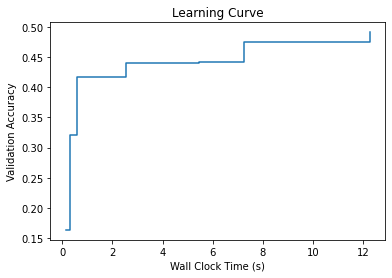

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.00966286 0.0760908  0.04253225 0.00553634 0.00694734 0.09545614
 0.02226827 0.00533405 0.03490219 0.00745221 0.00539832 0.00530792
 0.05826294 0.02156944 0.00724469 0.00886165 0.00925113 0.13077959
 0.00980901 0.00464707 0.11082155 0.03608341 0.09723341 0.01188972
 0.02114151 0.00854433 0.04355869 0.00527415 0.02682997 0.05237482
 0.00518361 0.02310144 0.02768178 0.00690465 0.10161207 0.11909259
 0.04524927 0.00910898 0.00437951 0.01495476 0.10389742 0.02262929
 0.08848301 0.0236022  0.01190826 0.08111485 0.08305303 0.03667176
 0.09044644 0.00809071 0.00482464 0.10786538 0.00543289 0.00491228
 0.00501884 0.07337435 0.04933904 0.1045112  0.05047784 0.10240453
 0.00740749 0.02464875 0.0041538  0.10308105 0.01048968 0.05164483
 0.00962052 0.00795558 0.01663745 0.07754682 0.04427972 0.0181315
 0.09349303 0.00901983 0.01601545 0.00816221 0.00527873 0.00568259
 0.00474119 0.00419427 0.03034244 0.00478539 0.04346515 0.00407446
 0.11041251 0.10579063 0.03040895 0.01342636 0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.920223290069137
mse = 0.0001522055242557849
mae = 0.008987002242214676


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.0218823  0.08003396 0.01047814 0.01045844 0.00530827 0.09787064
 0.03271456 0.08082205 0.00518917 0.08967833 0.0041272  0.05287477
 0.04794749]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.417237835807198
mse = 0.0007890556254630487
mae = 0.02048983514270838


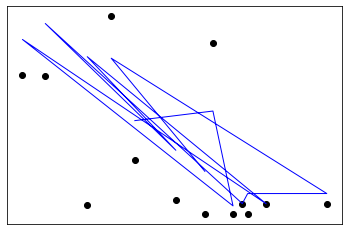

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year > 2017]
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player'], axis=1)
targets = feeder_test['ConLen']
feeder_test = feeder_test.drop(['ConLen'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

          Player        Rk   Tm       Age Pos         G        GS     Win  \
40  Daniel Jones -0.517994  NYG -0.960165  QB  0.714385  0.767304  0.2433   

        Loss      Tie  ...     Y/G_R    Fmb_R  Year  ConLenR  ConSalR  ConLen  \
40  1.101865  0.85901  ...  1.297224  1.65654  2019        4   25.664       0   

    ConSal  FTag  PPY  %Cap  
40     0.0   0.0  0.0   0.0  

[1 rows x 48 columns]
Predicted labels [0.04582338]


### **Regression For Percent Of Cap QB 2.0 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/finalQB.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 04-04 18:38:30] {2726} INFO - task = regression
[flaml.automl.automl: 04-04 18:38:30] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 04-04 18:38:30] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-04 18:38:30] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 04-04 18:38:30] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 04-04 18:38:30] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-04 18:38:30] {3472} INFO - Estimated sufficient time budget=3356s. Estimated necessary time budget=24s.
[flaml.automl.automl: 04-04 18:38:30] {3519} INFO -  at 0.5s,	estimator lgbm's best error=0.6753,	best estimator lgbm's best error=0.6753
[flaml.automl.automl: 04-04 18:38:30] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-04 18:38:31] {3519} INFO -  at 1.3s,	estimator lgbm's best error=0.6753,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

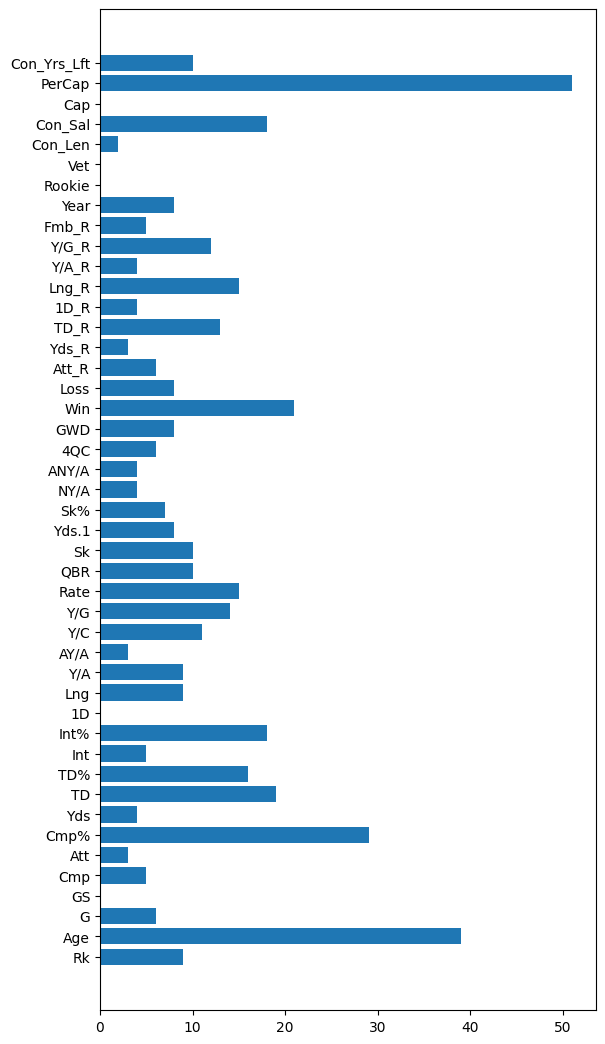

[{'Rk': 9, 'Age': 39, 'G': 6, 'GS': 0, 'Cmp': 5, 'Att': 3, 'Cmp%': 29, 'Yds': 4, 'TD': 19, 'TD%': 16, 'Int': 5, 'Int%': 18, '1D': 0, 'Lng': 9, 'Y/A': 9, 'AY/A': 3, 'Y/C': 11, 'Y/G': 14, 'Rate': 15, 'QBR': 10, 'Sk': 10, 'Yds.1': 8, 'Sk%': 7, 'NY/A': 4, 'ANY/A': 4, '4QC': 6, 'GWD': 8, 'Win': 21, 'Loss': 8, 'Att_R': 6, 'Yds_R': 3, 'TD_R': 13, '1D_R': 4, 'Lng_R': 15, 'Y/A_R': 4, 'Y/G_R': 12, 'Fmb_R': 5, 'Year': 8, 'Rookie': 0, 'Vet': 0, 'Con_Len': 2, 'Con_Sal': 18, 'Cap': 0, 'PerCap': 51, 'Con_Yrs_Lft': 10}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 45))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 38, 'num_leaves': 13, 'min_child_samples': 3, 'learning_rate': 0.10598251433643789, 'log_max_bin': 6, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 12.266579457019535}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.6981945181239807


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.3018054818760193, 'rf': 0.4000594913766194, 'xgboost': 0.47865810303341744, 'extra_tree': 0.3287125277808085, 'xgb_limitdepth': 0.5979780184273188}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 2.8924054877702578e-05, 'wall_clock_time': 57.4517707824707, 'metric_for_logging': {'pred_time': 2.8924054877702578e-05, 'train_loss': 0.05061459558883576}, 'val_loss': 0.3018054818760193, 'training_iteration': 1, 'config': {'n_estimators': 38, 'num_leaves': 13, 'min_child_samples': 3, 'learning_rate': 0.10598251433643789, 'log_max_bin': 6, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 12.266579457019535}, 'config/n_estimators': 38, 'config/num_leaves': 13, 'config/min_child_samples': 3, 'config/learning_rate': 0.10598251433643789, 'config/log_max_bin': 6, 'config/colsample_bytree': 1.0, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 12.266579457019535, 'experiment_tag': 'exp', 'time_total_s': 0.21986699104309082}


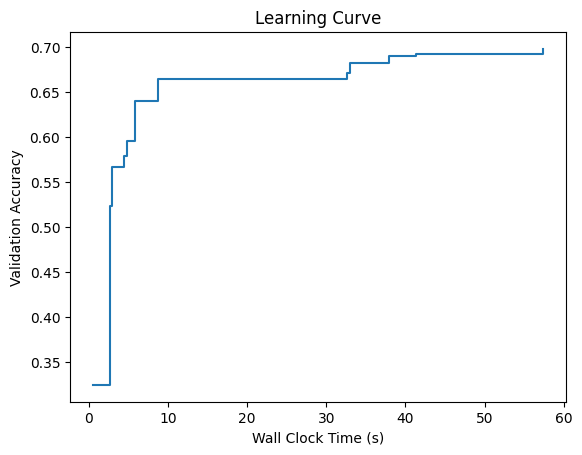

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.10788467 0.10307307 0.15415674 0.1305905  0.13995233 0.15691093
 0.1499255  0.13849901 0.13207585 0.04323357 0.08628852 0.10932634
 0.04051755 0.14049631 0.11348479 0.02225235 0.07563902 0.11949881
 0.03783931 0.03195807 0.11694986 0.05067548 0.06271645 0.00805834
 0.07033357 0.02161813 0.01213508 0.03330452 0.03729083 0.0109295
 0.01665444 0.16079751 0.13391089 0.00521922 0.00552543 0.01236843
 0.01588443 0.00717785 0.01010474 0.00313873 0.00599817 0.01110186
 0.0044584  0.02640839 0.00441092 0.0037813  0.00957631 0.00513588
 0.02216227 0.00702104 0.00683606 0.00874713 0.00713882 0.00794351
 0.14294837 0.03915119 0.16673285 0.15667165 0.06705544 0.16887761
 0.12991521 0.11539139 0.10756884 0.14957414 0.03387253 0.12665328
 0.13330235 0.03087066 0.0262617  0.14196596 0.03943514 0.1585153
 0.09151545 0.04285165 0.1322456  0.02742227 0.03060828 0.0151284
 0.06887129 0.04522547 0.11756642 0.03488604 0.02409763 0.01380166
 0.12191607 0.02646366 0.03144339 0.09748539 0.0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9466984982077593
mse = 0.00024172651162790697
mae = 0.010405581395348838


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [0.1381 0.0487 0.1489 0.1639 0.1315 0.1104 0.1589 0.1481 0.1685 0.1595
 0.1647 0.1164 0.0303 0.1316 0.0311 0.1601 0.0378 0.1608 0.0307 0.1469
 0.0241 0.1695 0.0352 0.028  0.0228 0.0107 0.0362 0.0269 0.0283 0.032
 0.0216 0.0214 0.018  0.0358 0.0139 0.0098 0.0275 0.0143 0.0144 0.0063
 0.0076 0.0128 0.011  0.0162 0.0088 0.0244 0.0068 0.0243 0.017  0.0068
 0.014  0.0147 0.0358 0.005  0.0074 0.0059 0.0042 0.0154]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.83016970327144
mse = 0.0009753084454164024
mae = 0.021113934363091755


In [ ]:
feeder[feeder.Player == "Kyler Murray"]

Unnamed: 0        Player   Tm Pos        Rk       Age         G  \
174         174  Kyler Murray  ARI  QB -0.815321 -1.225159  1.142869   
226         226  Kyler Murray  ARI  QB -0.945294 -1.075890  1.159373   
281         281  Kyler Murray  ARI  QB -0.951600 -0.890992  0.702306   
350         350  Kyler Murray  ARI  QB -0.507989 -0.648621  0.396242   

           GS       Cmp       Att  ...  Year  Rookie  Vet  Con_Len    Con_Sal  \
174  1.189770  1.118930  1.103379  ...  2019       1    0        4   35658014   
226  1.193740  1.258213  1.223050  ...  2020       1    0        4   35658014   
281  0.802532  0.931727  0.815773  ...  2021       1    0        4   35658014   
350  0.525308  0.669593  0.634466  ...  2022       0    1        5  230500000   

           Cap      %Cap  New_Con_Len  New_Perc_Cap  Con_Yrs_Lft  
174  188200000  0.047367            0      0.000000            3  
226  198200000  0.044977            0     -0.002390            2  
281  182500000  0.048847            5      0.003869            1  
350  208200000  0.221422            0      0.172575            4  

[4 rows x 51 columns]

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/QB_data/finalQB.csv")
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Player == "Justin Herbert"]
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Left'] = 0
y_pred = automl.predict(feeder_test)
print('Predicted Percent of Cap:', y_pred)
print('-------------------------------------------')
print(feeder_test.head())

Predicted Percent of Cap: [0.11129278]
-------------------------------------------
          Rk       Age         G        GS       Cmp       Att      Cmp%  \
327 -1.61607 -0.863773  1.503549  1.531532  2.241911  2.123342  0.990769   

          Yds        TD       TD%  ...    Y/G_R     Fmb_R  Year  Rookie  Vet  \
327  1.926465  1.347008  0.073249  ... -0.29501  1.200306  2022       1    0   

     Con_Len   Con_Sal        Cap    PerCap  Con_Yrs_Lft  
327        4  26578755  208200000  0.031915            1  

[1 rows x 45 columns]


### **Regression For Percent Of Cap QB 2.1 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-18 17:34:39] {1682} INFO - task = regression
[flaml.automl.logger: 04-18 17:34:39] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-18 17:34:39] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-18 17:34:39] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-18 17:34:39] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-18 17:34:39] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-18 17:34:39] {2336} INFO - Estimated sufficient time budget=5093s. Estimated necessary time budget=36s.
[flaml.automl.logger: 04-18 17:34:39] {2383} INFO -  at 0.7s,	estimator lgbm's best error=0.6753,	best estimator lgbm's best error=0.6753
[flaml.automl.logger: 04-18 17:34:39] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-18 17:34:41] {2383} INFO -  at 1.9s,	estimator lgbm's best error=0.6753,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

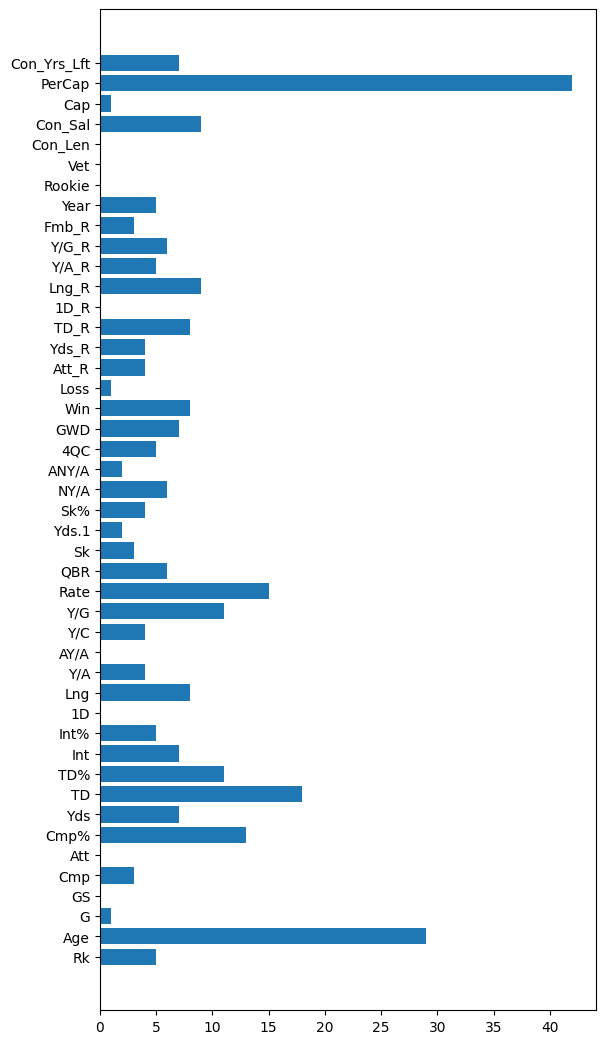

[{'Rk': 5, 'Age': 29, 'G': 1, 'GS': 0, 'Cmp': 3, 'Att': 0, 'Cmp%': 13, 'Yds': 7, 'TD': 18, 'TD%': 11, 'Int': 7, 'Int%': 5, '1D': 0, 'Lng': 8, 'Y/A': 4, 'AY/A': 0, 'Y/C': 4, 'Y/G': 11, 'Rate': 15, 'QBR': 6, 'Sk': 3, 'Yds.1': 2, 'Sk%': 4, 'NY/A': 6, 'ANY/A': 2, '4QC': 5, 'GWD': 7, 'Win': 8, 'Loss': 1, 'Att_R': 4, 'Yds_R': 4, 'TD_R': 8, '1D_R': 0, 'Lng_R': 9, 'Y/A_R': 5, 'Y/G_R': 6, 'Fmb_R': 3, 'Year': 5, 'Rookie': 0, 'Vet': 0, 'Con_Len': 0, 'Con_Sal': 9, 'Cap': 1, 'PerCap': 42, 'Con_Yrs_Lft': 7}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 45))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 32, 'num_leaves': 10, 'min_child_samples': 4, 'learning_rate': 0.11674881041791815, 'log_max_bin': 7, 'colsample_bytree': 0.913476217864085, 'reg_alpha': 0.008110414105028607, 'reg_lambda': 2.7016388255984776}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.6929141840023425


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.30708581599765744, 'rf': 0.4000594913766194, 'xgboost': 0.47865810303341744, 'extra_tree': 0.3287125277808085, 'xgb_limitdepth': 0.5979780184273188}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 5.135425301485283e-05, 'wall_clock_time': 47.71250033378601, 'metric_for_logging': {'pred_time': 5.135425301485283e-05, 'train_loss': 0.03265059838292077}, 'val_loss': 0.30708581599765744, 'training_iteration': 1, 'config': {'n_estimators': 32, 'num_leaves': 10, 'min_child_samples': 4, 'learning_rate': 0.11674881041791815, 'log_max_bin': 7, 'colsample_bytree': 0.913476217864085, 'reg_alpha': 0.008110414105028607, 'reg_lambda': 2.7016388255984776}, 'config/n_estimators': 32, 'config/num_leaves': 10, 'config/min_child_samples': 4, 'config/learning_rate': 0.11674881041791815, 'config/log_max_bin': 7, 'config/colsample_bytree': 0.913476217864085, 'config/reg_alpha': 0.008110414105028607, 'config/reg_lambda': 2.7016388255984776, 'experiment_tag': 'exp', 'time_total_s': 0.48618054389953613}


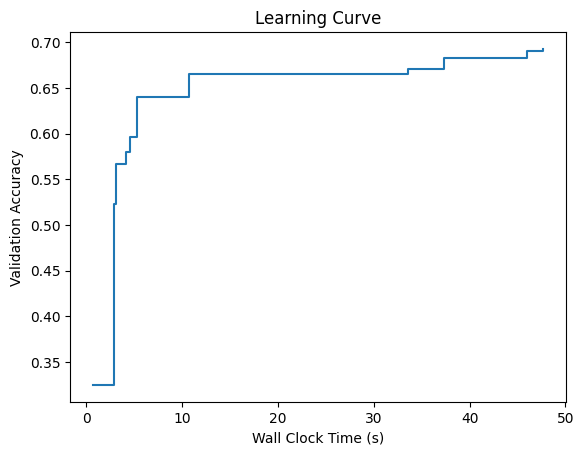

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.10653134 0.10583328 0.15339215 0.1328208  0.13796334 0.15778369
 0.15058622 0.13669352 0.13586118 0.04039209 0.09742782 0.10287003
 0.04120451 0.14623626 0.11112747 0.02183426 0.07550794 0.11868694
 0.0410034  0.03758837 0.11205991 0.03495966 0.06061001 0.01099911
 0.06861426 0.01924905 0.01457651 0.03298389 0.03099348 0.01372467
 0.0190202  0.16033302 0.13818267 0.01079741 0.00443232 0.00919302
 0.0187499  0.00660747 0.00834633 0.00696901 0.00441449 0.01038335
 0.00509054 0.02524274 0.00441449 0.00537459 0.01128342 0.00785923
 0.02131374 0.0045975  0.01177246 0.00764471 0.00703    0.00545778
 0.14031759 0.03858835 0.16323249 0.16346338 0.04977229 0.1761636
 0.12277008 0.11202126 0.10097539 0.14627451 0.03244831 0.12682366
 0.13127259 0.03736471 0.02676013 0.13577397 0.03751099 0.16598374
 0.09241764 0.04630844 0.13891083 0.03027935 0.03030958 0.02470614
 0.06105756 0.05421864 0.11499132 0.03513082 0.01838671 0.01387939
 0.11673165 0.03037858 0.03838329 0.11040573 0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9597003183446969
mse = 0.00018276223255813954
mae = 0.009936744186046512


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [0.1484 0.0354 0.1487 0.1691 0.1408 0.1519 0.1593 0.1515 0.1738 0.1732
 0.1572 0.1266 0.0354 0.1232 0.0376 0.1705 0.0321 0.1605 0.0272 0.1497
 0.0219 0.1656 0.0347 0.0288 0.0293 0.011  0.0463 0.0278 0.0314 0.03
 0.0165 0.0231 0.0148 0.0609 0.0153 0.012  0.0325 0.0186 0.0246 0.0044
 0.0063 0.0084 0.0076 0.0213 0.0074 0.0255 0.0044 0.0228 0.0098 0.0128
 0.0082 0.0169 0.033  0.0044 0.0066 0.0051 0.0039 0.0113]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.8027900825993126
mse = 0.0011325452623343153
mae = 0.022330191851146496


In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Y/G_R     Fmb_R  Year  Rookie  Vet  \
335  1.24155  1.064011  0.744833  ...  2.415547  1.478949  2022       1    0   

     Con_Len  Con_Sal        Cap    PerCap  Con_Yrs_Lft  
335        4  6025171  208200000  0.007235            0  

[1 rows x 45 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.1720765]


### **Regression For Percent Of Cap QB 2.2 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-18 18:01:28] {1682} INFO - task = regression
[flaml.automl.logger: 04-18 18:01:28] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-18 18:01:28] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-18 18:01:28] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-18 18:01:28] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-18 18:01:28] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-18 18:01:29] {2336} INFO - Estimated sufficient time budget=4144s. Estimated necessary time budget=29s.
[flaml.automl.logger: 04-18 18:01:29] {2383} INFO -  at 0.5s,	estimator lgbm's best error=0.6715,	best estimator lgbm's best error=0.6715
[flaml.automl.logger: 04-18 18:01:29] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-18 18:01:31] {2383} INFO -  at 2.9s,	estimator lgbm's best error=0.6715,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

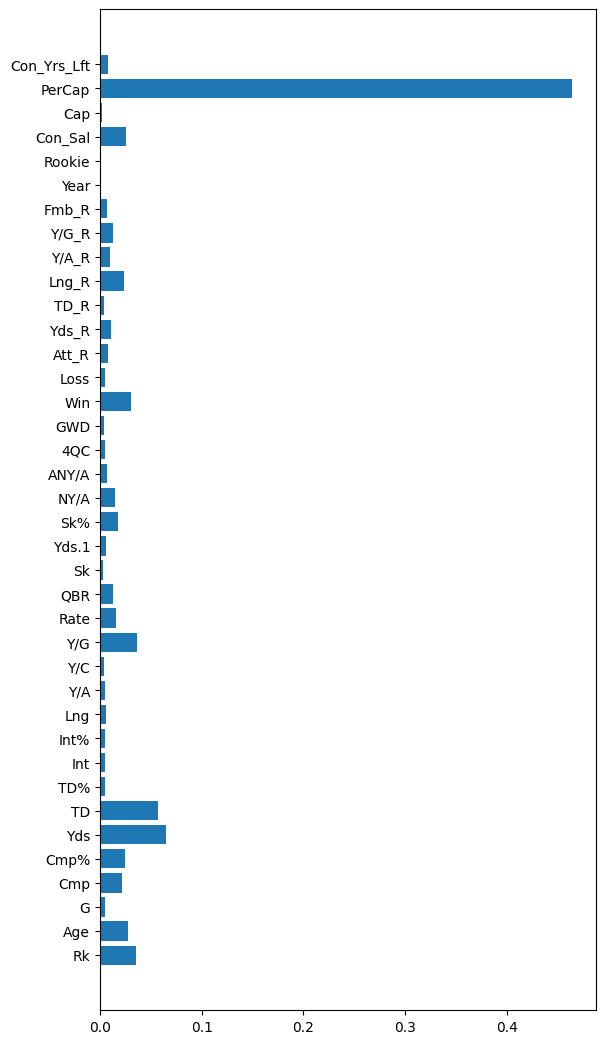

[{'Rk': 0.035339049557185975, 'Age': 0.02735518363920595, 'G': 0.004677849079415605, 'Cmp': 0.021267499845894097, 'Cmp%': 0.024144924171337862, 'Yds': 0.06504419805766823, 'TD': 0.056612836822551735, 'TD%': 0.004555731978047327, 'Int': 0.004942089773978031, 'Int%': 0.005262814651728949, 'Lng': 0.005580047009232374, 'Y/A': 0.004936605773469416, 'Y/C': 0.0037969505716818333, 'Y/G': 0.03658018415361894, 'Rate': 0.015476271935642782, 'QBR': 0.013229300675815365, 'Sk': 0.003210215483493944, 'Yds.1': 0.006021142174350361, 'Sk%': 0.017479334131897117, 'NY/A': 0.015223287560830093, 'ANY/A': 0.006763909385062633, '4QC': 0.005002848737197325, 'GWD': 0.0044442657159134485, 'Win': 0.03062206218788079, 'Loss': 0.005419083201865642, 'Att_R': 0.007975013953312047, 'Yds_R': 0.010686527547045166, 'TD_R': 0.004379289597466446, 'Lng_R': 0.02355394459391586, 'Y/A_R': 0.009381397245485115, 'Y/G_R': 0.013204116621306071, 'Fmb_R': 0.0068641239176269984, 'Year': 0.000892145636017527, 'Rookie': 0.0010138918516

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 38))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

rf


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 70, 'max_features': 1.0, 'max_leaves': 59}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.6768025606119011


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.3829964905868784, 'rf': 0.32319743938809886, 'xgboost': 0.5225355466818329, 'extra_tree': 0.37014950994732765, 'xgb_limitdepth': 21.92707323504}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0004791071248608967, 'wall_clock_time': 44.25111770629883, 'metric_for_logging': {'pred_time': 0.0004791071248608967, 'train_loss': 0.04853706073737949}, 'val_loss': 0.32319743938809886, 'training_iteration': 1, 'config': {'n_estimators': 70, 'max_features': 1.0, 'max_leaves': 59}, 'config/n_estimators': 196, 'config/max_features': 1.0, 'config/max_leaves': 59, 'experiment_tag': 'exp', 'time_total_s': 2.4231081008911133}


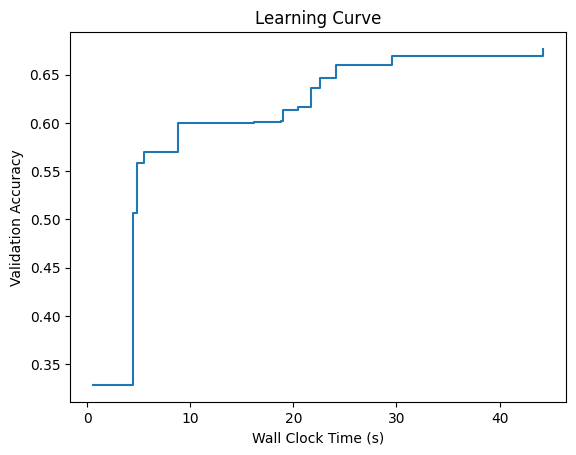

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.1044637  0.09764269 0.15532993 0.12845578 0.12328284 0.15900429
 0.15044381 0.13589086 0.13192514 0.06690805 0.07984416 0.09938509
 0.04439916 0.13732918 0.10922363 0.02355775 0.07345566 0.12401858
 0.05767363 0.0360966  0.12432265 0.05966009 0.06039564 0.01372727
 0.06982196 0.01630038 0.01083027 0.03741329 0.03368998 0.00473276
 0.019167   0.16478113 0.12089273 0.00646175 0.00238746 0.01663429
 0.01936699 0.00526989 0.01046392 0.00435365 0.00314304 0.00902924
 0.00177381 0.02630529 0.00138555 0.00395517 0.01884357 0.00291267
 0.02389545 0.00471241 0.01075013 0.00366731 0.00541814 0.00347854
 0.1477866  0.07062619 0.16229149 0.14835632 0.06018147 0.17530684
 0.11613998 0.10562026 0.09174944 0.14737622 0.05102581 0.13200215
 0.1292447  0.02279279 0.02804499 0.13962938 0.04797347 0.16773039
 0.09546368 0.04976123 0.13159301 0.03523946 0.03809901 0.01133685
 0.06497335 0.04233632 0.1188537  0.04211054 0.02377059 0.01624429
 0.12639663 0.02858618 0.02271272 0.08991641 

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9528441927886938
mse = 0.00021385530232558136
mae = 0.009615348837209305


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [0.1248 0.0726 0.1415 0.1634 0.1436 0.1201 0.1673 0.1724 0.1667 0.1721
 0.157  0.1291 0.0469 0.1313 0.0353 0.1677 0.0348 0.16   0.0285 0.1573
 0.0196 0.1741 0.0441 0.038  0.0247 0.0138 0.0409 0.0358 0.0363 0.036
 0.0267 0.0252 0.03   0.0503 0.0153 0.0155 0.0327 0.0221 0.0097 0.0041
 0.009  0.0124 0.0127 0.0244 0.012  0.0369 0.0056 0.0253 0.0181 0.0093
 0.0132 0.0236 0.0424 0.0053 0.0035 0.0048 0.0025 0.0187]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.8296610982574062
mse = 0.000978229283306482
mae = 0.021690519627444643


In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Y/G_R     Fmb_R  Year  Rookie  Vet  \
335  1.24155  1.064011  0.744833  ...  2.415547  1.478949  2022       1    0   

     Con_Len  Con_Sal        Cap    PerCap  Con_Yrs_Lft  
335        4  6025171  208200000  0.007235            1  

[1 rows x 45 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.15660874]


### **Regression For Percent Of Cap QB 2.3 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Year'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                           'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                           'Year'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-18 18:10:32] {1682} INFO - task = regression
[flaml.automl.logger: 04-18 18:10:32] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-18 18:10:32] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-18 18:10:32] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-18 18:10:32] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-18 18:10:32] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-18 18:10:32] {2336} INFO - Estimated sufficient time budget=1429s. Estimated necessary time budget=10s.
[flaml.automl.logger: 04-18 18:10:32] {2383} INFO -  at 0.2s,	estimator lgbm's best error=0.6715,	best estimator lgbm's best error=0.6715
[flaml.automl.logger: 04-18 18:10:32] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-18 18:10:32] {2383} INFO -  at 0.3s,	estimator lgbm's best error=0.6715,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

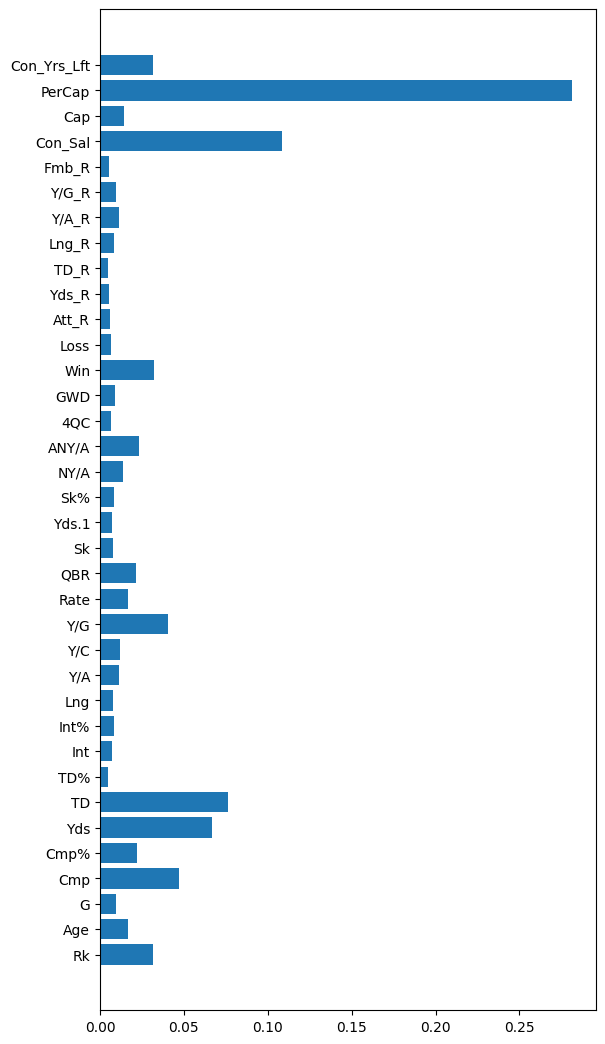

[{'Rk': 0.0315290386264583, 'Age': 0.016448770689754807, 'G': 0.009357826881835916, 'Cmp': 0.047112538960399915, 'Cmp%': 0.02199253577637774, 'Yds': 0.06655558396987071, 'TD': 0.07614572317143935, 'TD%': 0.004649857752729579, 'Int': 0.007359066079919615, 'Int%': 0.008397282301255195, 'Lng': 0.007630611438335851, 'Y/A': 0.01105458812096519, 'Y/C': 0.011861867172861891, 'Y/G': 0.040483843467903104, 'Rate': 0.016559111890025027, 'QBR': 0.021409313199247892, 'Sk': 0.00801562455502108, 'Yds.1': 0.0069423801890984415, 'Sk%': 0.00837335560791956, 'NY/A': 0.013505328648579996, 'ANY/A': 0.023361990240001476, '4QC': 0.00660669557739291, 'GWD': 0.009152473043487427, 'Win': 0.032304423329974845, 'Loss': 0.006467052876514769, 'Att_R': 0.006038425951356283, 'Yds_R': 0.00524896143742226, 'TD_R': 0.004906628956387533, 'Lng_R': 0.008280260052403452, 'Y/A_R': 0.011110475299778962, 'Y/G_R': 0.009421549943293053, 'Fmb_R': 0.005492201927758321, 'Con_Sal': 0.10864926698442504, 'Cap': 0.014194564939155668, '

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 36))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 40, 'max_features': 0.9106433279642062, 'max_leaves': 43}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.6742654614634532


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.36399662230194413, 'rf': 0.3847689787564177, 'xgboost': 0.43175341054691174, 'extra_tree': 0.32573453853654677, 'xgb_limitdepth': 0.5361818839293493}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00026571695194687955, 'wall_clock_time': 34.13130259513855, 'metric_for_logging': {'pred_time': 0.00026571695194687955, 'train_loss': 0.007571987439184968}, 'val_loss': 0.32573453853654677, 'training_iteration': 1, 'config': {'n_estimators': 40, 'max_features': 0.9106433279642062, 'max_leaves': 43}, 'config/n_estimators': 40, 'config/max_features': 0.9106433279642062, 'config/max_leaves': 43, 'experiment_tag': 'exp', 'time_total_s': 0.7260360717773438}


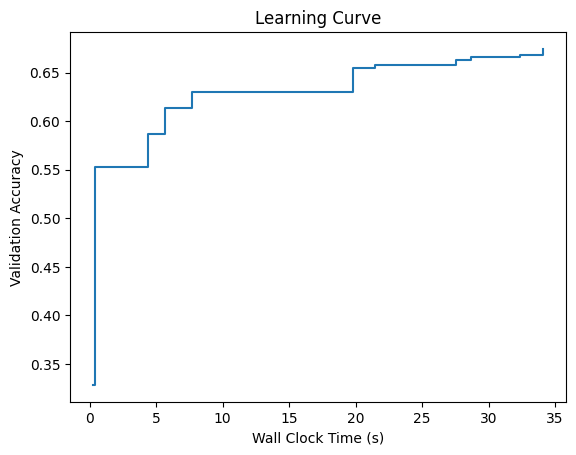

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.10237119 0.12171157 0.157267   0.13601684 0.12886903 0.15712926
 0.15545687 0.13411846 0.1286644  0.03488185 0.09737191 0.10679208
 0.03468106 0.14474549 0.11981844 0.01413023 0.09603743 0.1220346
 0.03289146 0.03250629 0.12524471 0.06653004 0.0439105  0.01087684
 0.08572185 0.01736664 0.01181176 0.03494981 0.00560423 0.00908509
 0.01830806 0.1828304  0.14828896 0.00760867 0.00722043 0.00906107
 0.00832402 0.00706728 0.00829816 0.00821262 0.00656012 0.01065334
 0.0066455  0.01665792 0.0065522  0.0066455  0.00753804 0.0071036
 0.01280055 0.0066455  0.0066455  0.0065522  0.0066455  0.00636713
 0.16815472 0.02473921 0.16538105 0.17540148 0.00138583 0.16980591
 0.12334459 0.12059891 0.11799686 0.15240305 0.0239864  0.13715488
 0.12970067 0.02184212 0.01903119 0.14749195 0.03780853 0.17788078
 0.1166549  0.03438799 0.16456771 0.03075624 0.03269579 0.01325086
 0.09205761 0.03322677 0.11646384 0.01842095 0.02293769 0.0092291
 0.12274142 0.02701094 0.01227802 0.12108125 0.0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.987064741102101
mse = 5.866241860465116e-05
mae = 0.006119069767441862


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [0.1281 0.0744 0.1307 0.2117 0.1422 0.0951 0.1813 0.1903 0.1608 0.1691
 0.1581 0.1382 0.0481 0.1269 0.0497 0.159  0.0353 0.1596 0.0257 0.1571
 0.0284 0.159  0.0367 0.0333 0.0315 0.0176 0.0328 0.0308 0.0348 0.0323
 0.0227 0.0217 0.0225 0.0591 0.0139 0.0115 0.0392 0.0152 0.0244 0.0067
 0.0069 0.0182 0.0095 0.0191 0.0104 0.0454 0.0066 0.0205 0.0139 0.0077
 0.0068 0.0101 0.0343 0.0079 0.0066 0.0066 0.0066 0.0108]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.8323926860812862
mse = 0.000962542207882685
mae = 0.020277977276326572


In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Y/G_R     Fmb_R  Year  Rookie  Vet  \
335  1.24155  1.064011  0.744833  ...  2.415547  1.478949  2022       1    0   

     Con_Len  Con_Sal        Cap    PerCap  Con_Yrs_Lft  
335        4  6025171  208200000  0.007235            1  

[1 rows x 45 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.15660874]


### **Regression For Percent Of Cap QB 2.4 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Year'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                           'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                           'Year'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 120,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 7,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-18 18:40:10] {1682} INFO - task = regression
[flaml.automl.logger: 04-18 18:40:10] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-18 18:40:10] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-18 18:40:10] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-18 18:40:10] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-18 18:40:10] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-18 18:40:10] {2336} INFO - Estimated sufficient time budget=3038s. Estimated necessary time budget=21s.
[flaml.automl.logger: 04-18 18:40:10] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.6716,	best estimator lgbm's best error=0.6716
[flaml.automl.logger: 04-18 18:40:10] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-18 18:40:11] {2383} INFO -  at 0.7s,	estimator lgbm's best error=0.6716,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

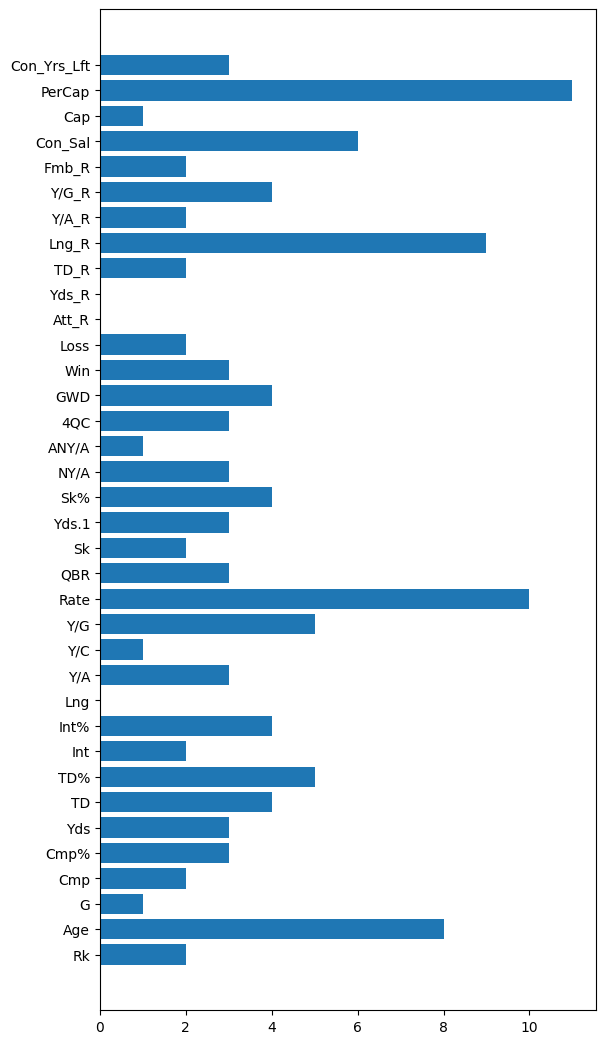

[{'Rk': 2, 'Age': 8, 'G': 1, 'Cmp': 2, 'Cmp%': 3, 'Yds': 3, 'TD': 4, 'TD%': 5, 'Int': 2, 'Int%': 4, 'Lng': 0, 'Y/A': 3, 'Y/C': 1, 'Y/G': 5, 'Rate': 10, 'QBR': 3, 'Sk': 2, 'Yds.1': 3, 'Sk%': 4, 'NY/A': 3, 'ANY/A': 1, '4QC': 3, 'GWD': 4, 'Win': 3, 'Loss': 2, 'Att_R': 0, 'Yds_R': 0, 'TD_R': 2, 'Lng_R': 9, 'Y/A_R': 2, 'Y/G_R': 4, 'Fmb_R': 2, 'Con_Sal': 6, 'Cap': 1, 'PerCap': 11, 'Con_Yrs_Lft': 3}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 36))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 11, 'num_leaves': 12, 'min_child_samples': 2, 'learning_rate': 0.3796022924184225, 'log_max_bin': 8, 'colsample_bytree': 0.8181384317902465, 'reg_alpha': 0.0009765625, 'reg_lambda': 8.956812169299287}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7115875367508608


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2884124632491391, 'rf': 0.3040242819054039, 'xgboost': 0.39885225929945367, 'extra_tree': 0.31939214874504135, 'xgb_limitdepth': 0.363252131240063}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00013888523142824887, 'wall_clock_time': 56.69656300544739, 'metric_for_logging': {'pred_time': 0.00013888523142824887, 'train_loss': 0.036059530516647356}, 'val_loss': 0.2884124632491391, 'training_iteration': 1, 'config': {'n_estimators': 11, 'num_leaves': 12, 'min_child_samples': 2, 'learning_rate': 0.3796022924184225, 'log_max_bin': 8, 'colsample_bytree': 0.8181384317902465, 'reg_alpha': 0.0009765625, 'reg_lambda': 8.956812169299287}, 'config/n_estimators': 11, 'config/num_leaves': 12, 'config/min_child_samples': 2, 'config/learning_rate': 0.3796022924184225, 'config/log_max_bin': 8, 'config/colsample_bytree': 0.8181384317902465, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 8.956812169299287, 'experiment_tag': 'exp', 'time_total_s': 0.2532978057861328}


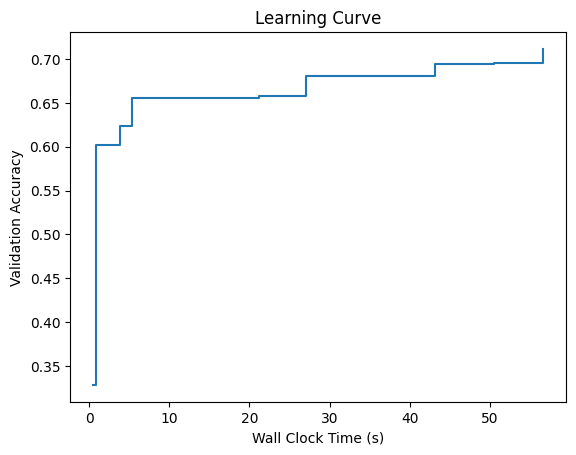

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [ 0.1077083   0.10725773  0.15541374  0.14078532  0.13173328  0.15358033
  0.14662097  0.14246857  0.13203848  0.04122364  0.09172394  0.11105348
  0.03801678  0.15274994  0.11734801  0.0190458   0.06962483  0.12414437
  0.04830452  0.02903278  0.11536471  0.04771962  0.06076338  0.00689453
  0.07549711  0.02252654  0.01227192  0.04025739  0.02412537  0.00835269
  0.01596832  0.16665232  0.14324806  0.00496226  0.00226972  0.00933781
  0.01855925  0.00446174  0.01037639  0.00075441  0.00511897  0.00979942
  0.00446174  0.02429397  0.00294642  0.00294642  0.00868     0.0055583
  0.02211121  0.01032358  0.01443221  0.01013167  0.00793965  0.00075441
  0.14904171  0.03525045  0.16630265  0.16535223  0.04524175  0.17507611
  0.12031648  0.1177751   0.1001523   0.15093517  0.0377479   0.12202252
  0.13568748  0.03530699  0.0295985   0.14414848  0.03762538  0.16705294
  0.09005824  0.04692401  0.14785774  0.03420194  0.02882765  0.0231921
  0.07527623  0.04074908  0.11906082

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9629005704105039
mse = 0.00016824883720930237
mae = 0.009090232558139535


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [ 0.1506  0.0491  0.1536  0.1663  0.1412  0.1172  0.1571  0.1505  0.1711
  0.1609  0.1485  0.089   0.031   0.0946  0.0262  0.1644  0.0373  0.1413
  0.02    0.1626  0.0159  0.1748  0.0461  0.0416  0.032   0.0113  0.035
  0.035   0.0448  0.031   0.0095  0.0229  0.0119  0.0541  0.0159  0.0072
  0.042   0.0148 -0.0008  0.0029  0.0072  0.0184  0.0184  0.0192  0.0031
  0.0328  0.0055  0.0226  0.0078  0.0077  0.0018  0.0169  0.042   0.0029
  0.008   0.0033  0.0008  0.0133]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.8141201623548837
mse = 0.0010674784121567427
mae = 0.021258788491935902


In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Y/G_R     Fmb_R  Year  Rookie  Vet  \
335  1.24155  1.064011  0.744833  ...  2.415547  1.478949  2022       1    0   

     Con_Len  Con_Sal        Cap    PerCap  Con_Yrs_Lft  
335        4  6025171  208200000  0.007235            1  

[1 rows x 45 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.15660874]


### **Regression For Percent Of Cap QB 2.5 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Year'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                           'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                           'Year'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 120,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 7,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-18 18:40:10] {1682} INFO - task = regression
[flaml.automl.logger: 04-18 18:40:10] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-18 18:40:10] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-18 18:40:10] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-18 18:40:10] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-18 18:40:10] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-18 18:40:10] {2336} INFO - Estimated sufficient time budget=3038s. Estimated necessary time budget=21s.
[flaml.automl.logger: 04-18 18:40:10] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.6716,	best estimator lgbm's best error=0.6716
[flaml.automl.logger: 04-18 18:40:10] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-18 18:40:11] {2383} INFO -  at 0.7s,	estimator lgbm's best error=0.6716,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

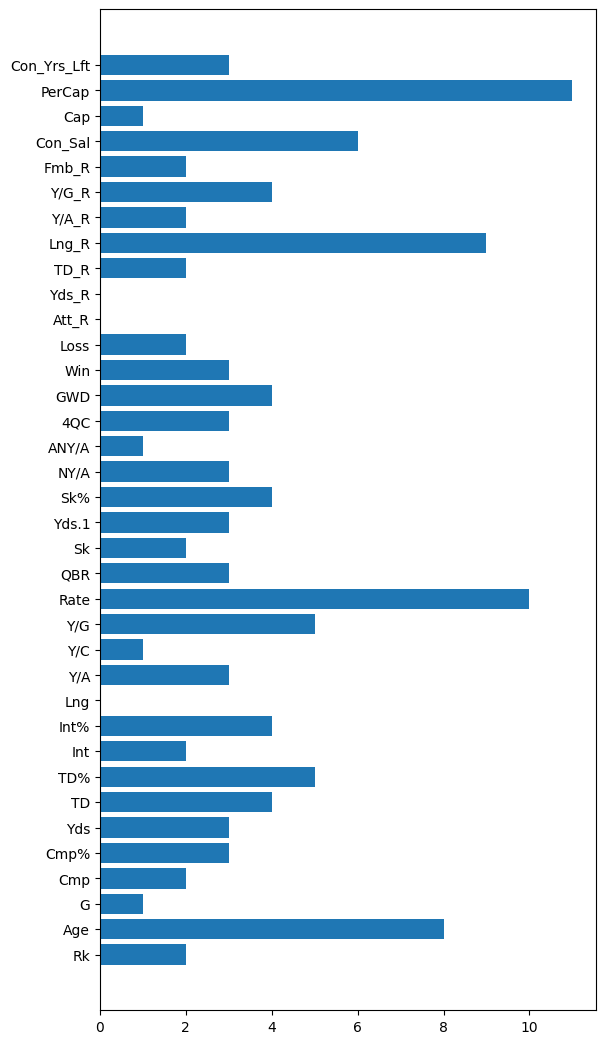

[{'Rk': 2, 'Age': 8, 'G': 1, 'Cmp': 2, 'Cmp%': 3, 'Yds': 3, 'TD': 4, 'TD%': 5, 'Int': 2, 'Int%': 4, 'Lng': 0, 'Y/A': 3, 'Y/C': 1, 'Y/G': 5, 'Rate': 10, 'QBR': 3, 'Sk': 2, 'Yds.1': 3, 'Sk%': 4, 'NY/A': 3, 'ANY/A': 1, '4QC': 3, 'GWD': 4, 'Win': 3, 'Loss': 2, 'Att_R': 0, 'Yds_R': 0, 'TD_R': 2, 'Lng_R': 9, 'Y/A_R': 2, 'Y/G_R': 4, 'Fmb_R': 2, 'Con_Sal': 6, 'Cap': 1, 'PerCap': 11, 'Con_Yrs_Lft': 3}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 36))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 11, 'num_leaves': 12, 'min_child_samples': 2, 'learning_rate': 0.3796022924184225, 'log_max_bin': 8, 'colsample_bytree': 0.8181384317902465, 'reg_alpha': 0.0009765625, 'reg_lambda': 8.956812169299287}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7115875367508608


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2884124632491391, 'rf': 0.3040242819054039, 'xgboost': 0.39885225929945367, 'extra_tree': 0.31939214874504135, 'xgb_limitdepth': 0.363252131240063}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00013888523142824887, 'wall_clock_time': 56.69656300544739, 'metric_for_logging': {'pred_time': 0.00013888523142824887, 'train_loss': 0.036059530516647356}, 'val_loss': 0.2884124632491391, 'training_iteration': 1, 'config': {'n_estimators': 11, 'num_leaves': 12, 'min_child_samples': 2, 'learning_rate': 0.3796022924184225, 'log_max_bin': 8, 'colsample_bytree': 0.8181384317902465, 'reg_alpha': 0.0009765625, 'reg_lambda': 8.956812169299287}, 'config/n_estimators': 11, 'config/num_leaves': 12, 'config/min_child_samples': 2, 'config/learning_rate': 0.3796022924184225, 'config/log_max_bin': 8, 'config/colsample_bytree': 0.8181384317902465, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 8.956812169299287, 'experiment_tag': 'exp', 'time_total_s': 0.2532978057861328}


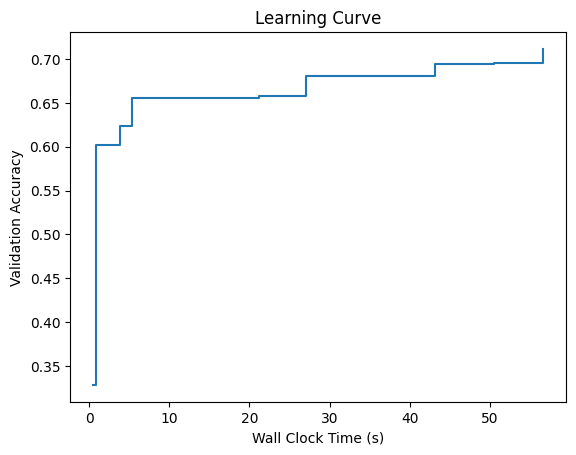

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [ 0.1077083   0.10725773  0.15541374  0.14078532  0.13173328  0.15358033
  0.14662097  0.14246857  0.13203848  0.04122364  0.09172394  0.11105348
  0.03801678  0.15274994  0.11734801  0.0190458   0.06962483  0.12414437
  0.04830452  0.02903278  0.11536471  0.04771962  0.06076338  0.00689453
  0.07549711  0.02252654  0.01227192  0.04025739  0.02412537  0.00835269
  0.01596832  0.16665232  0.14324806  0.00496226  0.00226972  0.00933781
  0.01855925  0.00446174  0.01037639  0.00075441  0.00511897  0.00979942
  0.00446174  0.02429397  0.00294642  0.00294642  0.00868     0.0055583
  0.02211121  0.01032358  0.01443221  0.01013167  0.00793965  0.00075441
  0.14904171  0.03525045  0.16630265  0.16535223  0.04524175  0.17507611
  0.12031648  0.1177751   0.1001523   0.15093517  0.0377479   0.12202252
  0.13568748  0.03530699  0.0295985   0.14414848  0.03762538  0.16705294
  0.09005824  0.04692401  0.14785774  0.03420194  0.02882765  0.0231921
  0.07527623  0.04074908  0.11906082

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9629005704105039
mse = 0.00016824883720930237
mae = 0.009090232558139535


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [ 0.1506  0.0491  0.1536  0.1663  0.1412  0.1172  0.1571  0.1505  0.1711
  0.1609  0.1485  0.089   0.031   0.0946  0.0262  0.1644  0.0373  0.1413
  0.02    0.1626  0.0159  0.1748  0.0461  0.0416  0.032   0.0113  0.035
  0.035   0.0448  0.031   0.0095  0.0229  0.0119  0.0541  0.0159  0.0072
  0.042   0.0148 -0.0008  0.0029  0.0072  0.0184  0.0184  0.0192  0.0031
  0.0328  0.0055  0.0226  0.0078  0.0077  0.0018  0.0169  0.042   0.0029
  0.008   0.0033  0.0008  0.0133]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.8141201623548837
mse = 0.0010674784121567427
mae = 0.021258788491935902


In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Y/G_R     Fmb_R  Year  Rookie  Vet  \
335  1.24155  1.064011  0.744833  ...  2.415547  1.478949  2022       1    0   

     Con_Len  Con_Sal        Cap    PerCap  Con_Yrs_Lft  
335        4  6025171  208200000  0.007235            1  

[1 rows x 45 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.15660874]


### **Regression For Percent Of Cap QB 2.6 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf1.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2011]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 17:37:10] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 17:37:10] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 17:37:10] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 17:37:10] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 17:37:10] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 17:37:10] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 17:37:10] {2336} INFO - Estimated sufficient time budget=2050s. Estimated necessary time budget=14s.
[flaml.automl.logger: 04-20 17:37:10] {2383} INFO -  at 0.3s,	estimator lgbm's best error=0.6818,	best estimator lgbm's best error=0.6818
[flaml.automl.logger: 04-20 17:37:10] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 17:37:10] {2383} INFO -  at 0.6s,	estimator lgbm's best error=0.6818,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

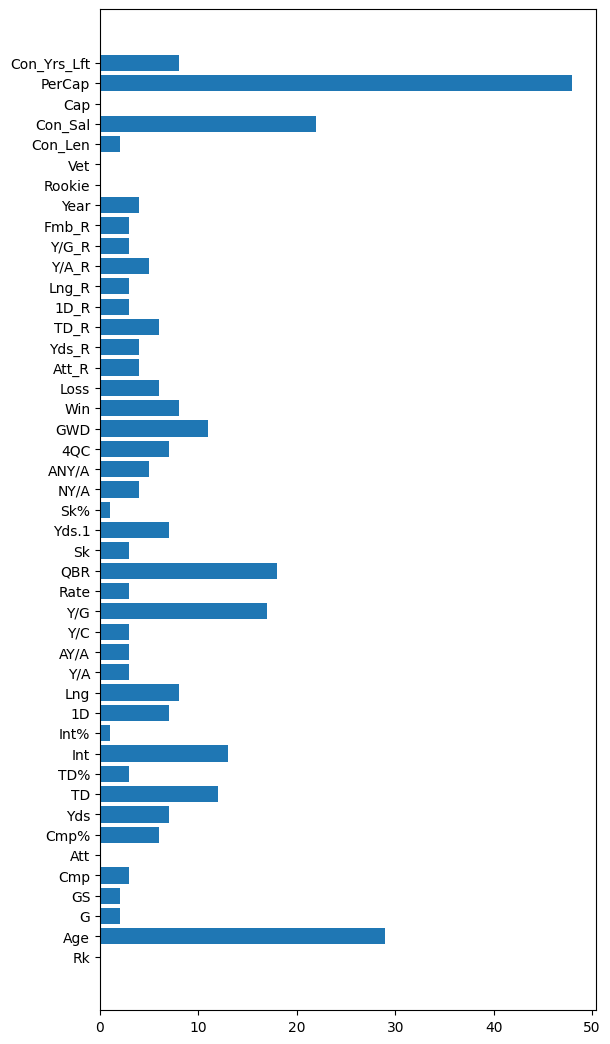

[{'Rk': 0, 'Age': 29, 'G': 2, 'GS': 2, 'Cmp': 3, 'Att': 0, 'Cmp%': 6, 'Yds': 7, 'TD': 12, 'TD%': 3, 'Int': 13, 'Int%': 1, '1D': 7, 'Lng': 8, 'Y/A': 3, 'AY/A': 3, 'Y/C': 3, 'Y/G': 17, 'Rate': 3, 'QBR': 18, 'Sk': 3, 'Yds.1': 7, 'Sk%': 1, 'NY/A': 4, 'ANY/A': 5, '4QC': 7, 'GWD': 11, 'Win': 8, 'Loss': 6, 'Att_R': 4, 'Yds_R': 4, 'TD_R': 6, '1D_R': 3, 'Lng_R': 3, 'Y/A_R': 5, 'Y/G_R': 3, 'Fmb_R': 3, 'Year': 4, 'Rookie': 0, 'Vet': 0, 'Con_Len': 2, 'Con_Sal': 22, 'Cap': 0, 'PerCap': 48, 'Con_Yrs_Lft': 8}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 45))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 28, 'num_leaves': 12, 'min_child_samples': 14, 'learning_rate': 0.11785379354134153, 'log_max_bin': 10, 'colsample_bytree': 0.9744780177633925, 'reg_alpha': 0.007704104902643929, 'reg_lambda': 3.24985696364121}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7083585033999154


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2916414966000847, 'rf': 0.3281050938710873, 'xgboost': 0.43695765433147377, 'extra_tree': 0.3173882838449844, 'xgb_limitdepth': 5.42314222491313}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 7.107885934973276e-05, 'wall_clock_time': 34.566606283187866, 'metric_for_logging': {'pred_time': 7.107885934973276e-05, 'train_loss': 0.08047207387209958}, 'val_loss': 0.2916414966000847, 'training_iteration': 1, 'config': {'n_estimators': 28, 'num_leaves': 12, 'min_child_samples': 14, 'learning_rate': 0.11785379354134153, 'log_max_bin': 10, 'colsample_bytree': 0.9744780177633925, 'reg_alpha': 0.007704104902643929, 'reg_lambda': 3.24985696364121}, 'config/n_estimators': 28, 'config/num_leaves': 12, 'config/min_child_samples': 14, 'config/learning_rate': 0.11785379354134153, 'config/log_max_bin': 10, 'config/colsample_bytree': 0.9744780177633925, 'config/reg_alpha': 0.007704104902643929, 'config/reg_lambda': 3.24985696364121, 'experiment_tag': 'exp', 'time_total_s': 1.2440879344940186}


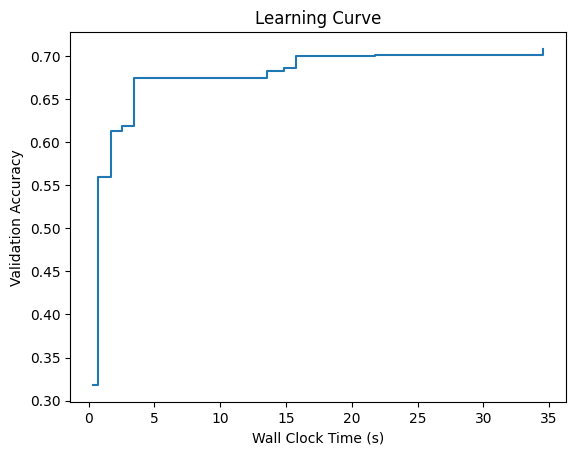

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.15394322 0.11534876 0.13948938 0.13948874 0.15848153 0.14210838
 0.06028355 0.14809735 0.04385941 0.06722636 0.11163168 0.12081662
 0.04249375 0.11942116 0.10804897 0.03171736 0.11937285 0.04153762
 0.02690824 0.03017324 0.12236925 0.04905719 0.02938831 0.05546279
 0.01699187 0.02630493 0.09603012 0.02249217 0.01903654 0.0259034
 0.01682958 0.05346665 0.00761136 0.01802799 0.0190476  0.02073572
 0.00818519 0.00755225 0.0066092  0.01198753 0.00818519 0.00765792
 0.0173394  0.0066092  0.00915467 0.0081039  0.12872552 0.16048821
 0.12295179 0.14496742 0.12663195 0.09395386 0.10923302 0.09798138
 0.12050655 0.03615067 0.15180159 0.13393537 0.03881299 0.11422937
 0.04637983 0.04360119 0.09269353 0.02624408 0.02977259 0.10269478
 0.02102694 0.02374831 0.10184333 0.01758944 0.1527274  0.02442313
 0.03364294 0.01612507 0.03367704 0.03398363 0.0066092  0.00745689
 0.06429391 0.01146021 0.00967513 0.00615832 0.03300304 0.02830169
 0.00883023 0.00688073 0.00728072 0.01174748 0

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9136992946101385
mse = 0.00033729793103448277
mae = 0.012641810344827586


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [0.1164 0.0612 0.1429 0.1611 0.1196 0.1276 0.1544 0.1593 0.1677 0.1655
 0.1664 0.1499 0.0204 0.1249 0.0517 0.1531 0.0301 0.1619 0.0339 0.1528
 0.0293 0.1588 0.0738 0.0491 0.0854 0.018  0.0409 0.0393 0.0457 0.0238
 0.0284 0.0207 0.0189 0.0606 0.0176 0.0059 0.0446 0.0173 0.0463 0.0082
 0.0075 0.0181 0.0106 0.023  0.0141 0.0286 0.0082 0.0192 0.0103 0.0075
 0.0061 0.0173 0.0782 0.0073 0.0092 0.0085 0.0077 0.0107]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.7483233875453981
mse = 0.0014453388492460034
mae = 0.0265532821459277


In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
585 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Y/G_R     Fmb_R  Year  Rookie  Vet  \
585  1.24155  1.064011  0.744833  ...  2.415547  1.478949  2022     1.0  0.0   

     Con_Len    Con_Sal          Cap    PerCap  Con_Yrs_Lft  
585      4.0  6025171.0  208200000.0  0.007235            1  

[1 rows x 45 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
585  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.12352418]


### **Regression For Percent Of Cap QB 2.7 (AutoML)**



In [199]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Con_Len', 'Vet', '1D_R', 'Loss', 'ANY/A', 'Yds.1', 'AY/A', '1D',
                             'Att', 'GS', 'G', 'Cap', 'Att_R', 'QBR', 'Y/C', 'Con_Yrs_Lft',
                             'Year', 'Fmb_R', 'Y/G_R', 'Lng_R', 'Yds_R', 'Sk%', 'Sk', 'Y/A',
                             'Lng', 'Int%', 'Int', 'TD', 'Yds', 'Cmp%', 'Cmp', 'GWD'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Con_Len', 'Vet', '1D_R', 'Loss', 'ANY/A', 'Yds.1', 'AY/A', '1D',
                             'Att', 'GS', 'G', 'Cap', 'Att_R', 'QBR', 'Y/C', 'Con_Yrs_Lft',
                             'Year', 'Fmb_R', 'Y/G_R', 'Lng_R', 'Yds_R', 'Sk%', 'Sk', 'Y/A',
                             'Lng', 'Int%', 'Int', 'TD', 'Yds', 'Cmp%', 'Cmp', 'GWD'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [200]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 7,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 21:35:00] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 21:35:00] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 21:35:00] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 21:35:00] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 21:35:00] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 21:35:00] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 21:35:01] {2336} INFO - Estimated sufficient time budget=2136s. Estimated necessary time budget=15s.
[flaml.automl.logger: 04-20 21:35:01] {2383} INFO -  at 0.3s,	estimator lgbm's best error=0.6691,	best estimator lgbm's best error=0.6691
[flaml.automl.logger: 04-20 21:35:01] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 21:35:01] {2383} INFO -  at 0.6s,	estimator lgbm's best error=0.6691,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "2.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

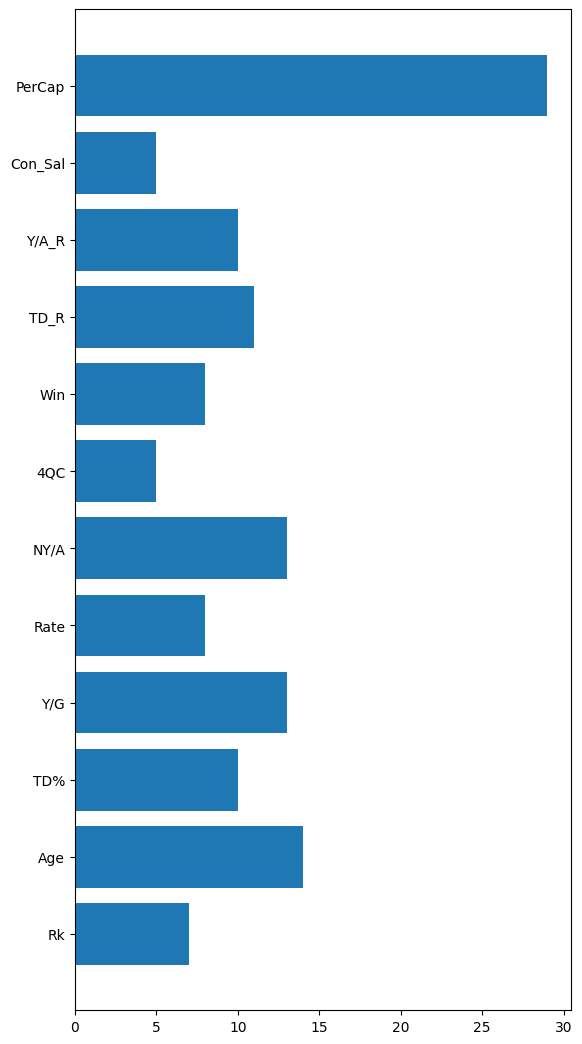

[{'Rk': 7, 'Age': 14, 'TD%': 10, 'Y/G': 13, 'Rate': 8, 'NY/A': 13, '4QC': 5, 'Win': 8, 'TD_R': 11, 'Y/A_R': 10, 'Con_Sal': 5, 'PerCap': 29}]


In [201]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 12))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [202]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [203]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 19, 'num_leaves': 8, 'min_child_samples': 3, 'learning_rate': 0.17402065726724145, 'log_max_bin': 8, 'colsample_bytree': 0.6649148062238498, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.006761362450996487}


In [204]:
# Find best r2
print(1-automl.best_loss)

0.6967736159513035


In [205]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.3032263840486965, 'rf': 0.3082318761962423, 'xgboost': 0.4515521036764159, 'extra_tree': 0.33902666437420514, 'xgb_limitdepth': 21.216756924562336}


In [206]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0003894072340746996, 'wall_clock_time': 46.664721965789795, 'metric_for_logging': {'pred_time': 0.0003894072340746996, 'train_loss': 0.05299241374618397}, 'val_loss': 0.3032263840486965, 'training_iteration': 1, 'config': {'n_estimators': 19, 'num_leaves': 8, 'min_child_samples': 3, 'learning_rate': 0.17402065726724145, 'log_max_bin': 8, 'colsample_bytree': 0.6649148062238498, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.006761362450996487}, 'config/n_estimators': 19, 'config/num_leaves': 8, 'config/min_child_samples': 3, 'config/learning_rate': 0.17402065726724145, 'config/log_max_bin': 8, 'config/colsample_bytree': 0.6649148062238498, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 0.006761362450996487, 'experiment_tag': 'exp', 'time_total_s': 0.8400084972381592}


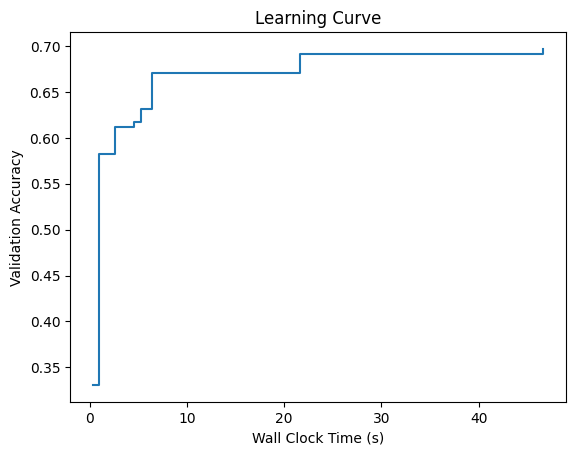

In [207]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [208]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.10272071 0.11619287 0.15322998 0.1318906  0.12323155 0.14708543
 0.14461132 0.12779474 0.13784194 0.07530733 0.08699082 0.09428182
 0.0433809  0.15036289 0.11221291 0.02156544 0.06383376 0.12293232
 0.06597107 0.03118116 0.11067233 0.03127166 0.05800222 0.01037426
 0.05212173 0.02812801 0.02529087 0.03807417 0.02700832 0.00902421
 0.01608563 0.15640816 0.14643236 0.01037426 0.01347161 0.00949706
 0.01319288 0.00949706 0.00909425 0.01040141 0.00909425 0.01757683
 0.00663305 0.01881255 0.00785852 0.00663305 0.01064425 0.00730406
 0.01112639 0.0059969  0.00618094 0.01018689 0.00663305 0.00785852
 0.15922884 0.04394159 0.1660499  0.16666591 0.07681179 0.17823641
 0.10103233 0.1047418  0.10350093 0.15841357 0.04796262 0.13620779
 0.13417657 0.02905017 0.03156799 0.13962103 0.04606351 0.15682279
 0.08325414 0.05145365 0.12496133 0.03840372 0.03513773 0.02411995
 0.06947218 0.04616308 0.10648143 0.03736082 0.01851804 0.016294
 0.12270299 0.03276722 0.03821489 0.11209518 0.

In [209]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9411240405901476
mse = 0.0002670071162790698
mae = 0.012255348837209301


In [210]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [0.0888 0.0681 0.1518 0.165  0.1108 0.1547 0.1623 0.1685 0.1388 0.1739
 0.1602 0.1771 0.042  0.1387 0.0509 0.1581 0.0338 0.1681 0.0284 0.1655
 0.0247 0.1704 0.0473 0.0404 0.06   0.0102 0.0369 0.0376 0.0369 0.0311
 0.0185 0.0387 0.0174 0.0485 0.0148 0.009  0.0446 0.0228 0.0158 0.0079
 0.0083 0.02   0.0123 0.0184 0.0129 0.019  0.0079 0.0287 0.021  0.0081
 0.0165 0.018  0.046  0.006  0.0079 0.0052 0.006  0.014 ]


In [211]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.7570892156248006
mse = 0.001394998089548845
mae = 0.024999131168077008


In [212]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Con_Len', 'Vet', '1D_R', 'Loss', 'ANY/A', 'Yds.1', 'AY/A', '1D',
                             'Att', 'GS', 'G'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age       Cmp      Cmp%      Yds        TD       TD%  \
335 -1.230651 -0.863773  1.008579  0.690866  1.24155  1.064011  0.744833   

          Int      Int%       Lng  ...      TD_R     Lng_R     Y/A_R  \
335  0.028229 -0.920609  0.847803  ...  5.366245  1.900313  0.486872   

        Y/G_R     Fmb_R  Year  Con_Sal        Cap    PerCap  Con_Yrs_Lft  
335  2.415547  1.478949  2022  6025171  208200000  0.007235            1  

[1 rows x 33 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.16285476]


### **Regression For Percent Of Cap QB FINAL (AutoML)**



In [138]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train.round({'New_Perc_Cap': 4})
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test.round({'New_Perc_Cap': 4})
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Con_Len', 'Vet', '1D_R', 'Loss', 'ANY/A', 'Yds.1', 'AY/A', '1D',
                             'Att', 'GS', 'G'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Con_Len', 'Vet', '1D_R', 'Loss', 'ANY/A', 'Yds.1', 'AY/A', '1D',
                             'Att', 'GS', 'G'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [139]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 7,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 21:18:42] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 21:18:42] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 21:18:42] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 21:18:42] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 21:18:42] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 21:18:42] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 21:18:44] {2336} INFO - Estimated sufficient time budget=18574s. Estimated necessary time budget=131s.
[flaml.automl.logger: 04-20 21:18:44] {2383} INFO -  at 2.0s,	estimator lgbm's best error=0.6763,	best estimator lgbm's best error=0.6763
[flaml.automl.logger: 04-20 21:18:44] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 21:18:45] {2383} INFO -  at 2.6s,	estimator lgbm's best error=0.6763,	best estima

In [213]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "QBregFinal") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

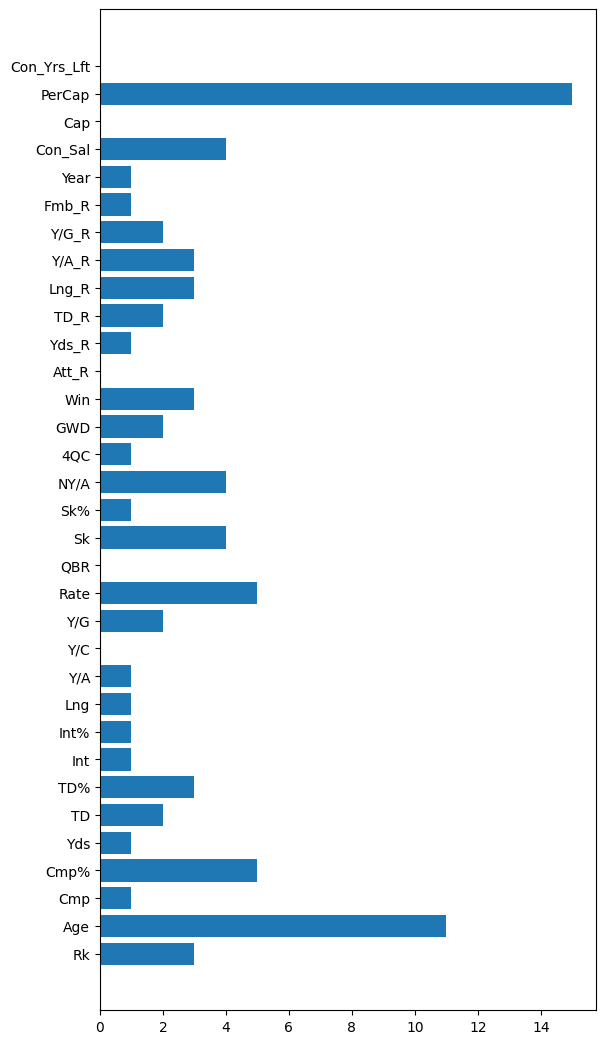

[{'Rk': 3, 'Age': 11, 'Cmp': 1, 'Cmp%': 5, 'Yds': 1, 'TD': 2, 'TD%': 3, 'Int': 1, 'Int%': 1, 'Lng': 1, 'Y/A': 1, 'Y/C': 0, 'Y/G': 2, 'Rate': 5, 'QBR': 0, 'Sk': 4, 'Sk%': 1, 'NY/A': 4, '4QC': 1, 'GWD': 2, 'Win': 3, 'Att_R': 0, 'Yds_R': 1, 'TD_R': 2, 'Lng_R': 3, 'Y/A_R': 3, 'Y/G_R': 2, 'Fmb_R': 1, 'Year': 1, 'Con_Sal': 4, 'Cap': 0, 'PerCap': 15, 'Con_Yrs_Lft': 0}]


In [141]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 33))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [142]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [143]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 12, 'num_leaves': 8, 'min_child_samples': 4, 'learning_rate': 0.19017478526547146, 'log_max_bin': 9, 'colsample_bytree': 0.9553146161217149, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.4484066903612427}


In [144]:
# Find best r2
print(1-automl.best_loss)

0.7061135418078663


In [145]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.29388645819213366, 'rf': 0.4107240884045664, 'xgboost': 0.5417054207119817, 'extra_tree': 0.3547694039106447, 'xgb_limitdepth': 21.216756924562336}


In [146]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00023406471158685406, 'wall_clock_time': 11.479918956756592, 'metric_for_logging': {'pred_time': 0.00023406471158685406, 'train_loss': 0.07244887491304748}, 'val_loss': 0.29388645819213366, 'training_iteration': 1, 'config': {'n_estimators': 12, 'num_leaves': 8, 'min_child_samples': 4, 'learning_rate': 0.19017478526547146, 'log_max_bin': 9, 'colsample_bytree': 0.9553146161217149, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.4484066903612427}, 'config/n_estimators': 12, 'config/num_leaves': 8, 'config/min_child_samples': 4, 'config/learning_rate': 0.19017478526547146, 'config/log_max_bin': 9, 'config/colsample_bytree': 0.9553146161217149, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 0.4484066903612427, 'experiment_tag': 'exp', 'time_total_s': 0.6249525547027588}


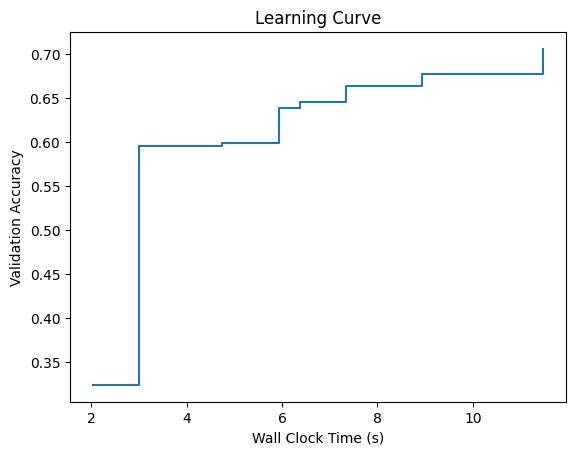

In [147]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [148]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.10685745 0.09936849 0.14921366 0.12730852 0.13605949 0.14640598
 0.13529935 0.12421629 0.13510733 0.03851859 0.08837354 0.09839983
 0.04125203 0.1448039  0.106303   0.02680017 0.06678639 0.11782444
 0.05243295 0.03270208 0.11649949 0.0219351  0.05659059 0.01542062
 0.05203113 0.03011269 0.01985694 0.03338761 0.0425421  0.02215849
 0.02405086 0.14197544 0.12212337 0.01223454 0.01223454 0.0143127
 0.02101878 0.01223454 0.0189724  0.01223454 0.01223454 0.01033002
 0.01223454 0.02715785 0.01223454 0.01223454 0.01623607 0.01223454
 0.01660126 0.01223454 0.00949666 0.0143127  0.0143127  0.01223454
 0.13392381 0.04822573 0.15608178 0.15352038 0.0761762  0.16264079
 0.1147516  0.10456494 0.10918034 0.14803015 0.0277826  0.13035433
 0.12540383 0.03804731 0.02513552 0.13301984 0.04012556 0.14802694
 0.08001149 0.0499897  0.12557921 0.03533387 0.03487894 0.02687314
 0.04732673 0.05917998 0.10788815 0.04211064 0.02474788 0.01452858
 0.11633312 0.03270208 0.03823857 0.09734001 0

In [149]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred.round(4), y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred.round(4), y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred.round(4), y_train))

r2 = 0.9167157778355128
mse = 0.00037770051162790705
mae = 0.014686046511627908


In [150]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred.round(4))

Predicted labels [0.1291 0.0342 0.1498 0.1521 0.1243 0.1319 0.1556 0.1419 0.1668 0.1639
 0.1549 0.1452 0.0271 0.1499 0.0731 0.1583 0.038  0.1626 0.0266 0.1626
 0.0266 0.1673 0.0255 0.0349 0.0284 0.0158 0.0552 0.0313 0.028  0.0313
 0.018  0.0234 0.0143 0.033  0.0136 0.0122 0.027  0.0158 0.0233 0.0122
 0.0143 0.0173 0.0173 0.0158 0.0173 0.017  0.0122 0.0239 0.0095 0.0148
 0.0249 0.0178 0.0453 0.0122 0.0143 0.0143 0.0122 0.0178]


In [151]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.7859831511333517
mse = 0.0012290648028170455
mae = 0.024272219421915688


In [154]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Con_Len', 'Vet', '1D_R', 'AY/A', '1D', 'Att', 'GS', 'Rookie',
                             'Con_Len', 'Vet', '1D_R', 'Loss', 'ANY/A', 'Yds.1', 'AY/A', '1D',
                             'Att', 'GS', 'G'], axis=1)
#feeder_test.at[335, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL Percent of Cap #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED Percent of Cap #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age       Cmp      Cmp%      Yds        TD       TD%  \
335 -1.230651 -0.863773  1.008579  0.690866  1.24155  1.064011  0.744833   

          Int      Int%       Lng  ...      TD_R     Lng_R     Y/A_R  \
335  0.028229 -0.920609  0.847803  ...  5.366245  1.900313  0.486872   

        Y/G_R     Fmb_R  Year  Con_Sal        Cap    PerCap  Con_Yrs_Lft  
335  2.415547  1.478949  2022  6025171  208200000  0.007235            1  

[1 rows x 33 columns]
####################### ACTUAL Percent of Cap #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED Percent of Cap #######################
Predicted New Percent of Cap [0.17542569]


### **Classification For Percent of Cap QB 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/finalQB.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = np.array([0 if perc <= 0.05 else (1 if perc <= 0.10 else (2 if perc <= 0.15 else (3 if perc <= 0.20 else 4))) for perc in feeder_train['New_Perc_Cap'].round(4)], np.int)
y_train = pd.Series(y_train, copy=False)
y_test = np.array([0 if perc <= 0.05 else (1 if perc <= 0.10 else (2 if perc <= 0.15 else (3 if perc <= 0.20 else 4))) for perc in feeder_test['New_Perc_Cap'].round(4)], np.int)
y_test = pd.Series(y_test, copy=False)
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

<ipython-input-27-50d5156bc717>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array([0 if perc <= 0.05 else (1 if perc <= 0.10 else (2 if perc <= 0.15 else (3 if perc <= 0.20 else 4))) for perc in feeder_train['New_Perc_Cap'].round(4)], np.int)
<ipython-input-27-50d5156bc717>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-13 17:42:45] {1768} INFO - task = multiclass
[flaml.automl.logger: 04-13 17:42:45] {1775} INFO - Data split method: stratified
[flaml.automl.logger: 04-13 17:42:45] {1778} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 1 augmented from 10 to 20
INFO:flaml.automl.task.generic_task:class 4 augmented from 5 to 20


[flaml.automl.logger: 04-13 17:42:45] {1891} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-13 17:42:45] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-13 17:42:45] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-13 17:42:46] {2479} INFO - Estimated sufficient time budget=12782s. Estimated necessary time budget=295s.
[flaml.automl.logger: 04-13 17:42:46] {2526} INFO -  at 1.5s,	estimator lgbm's best error=0.4250,	best estimator lgbm's best error=0.4250
[flaml.automl.logger: 04-13 17:42:46] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-13 17:42:47] {2526} INFO -  at 2.0s,	estimator lgbm's best error=0.4250,	best estimator lgbm's best error=0.4250
[flaml.automl.logger: 04-13 17:42:47] {2341} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-13 17:42:47] {2526} INFO -  at 2.1s,	estimator lgbm's best error=0.23

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:42:52] {2526} INFO -  at 6.8s,	estimator xgboost's best error=0.2333,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:42:52] {2341} INFO - iteration 16, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:42:52] {2526} INFO -  at 7.4s,	estimator lgbm's best error=0.1875,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:42:52] {2341} INFO - iteration 17, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:42:53] {2526} INFO -  at 8.0s,	estimator xgboost's best error=0.2333,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:42:53] {2341} INFO - iteration 18, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:42:53] {2526} INFO -  at 8.5s,	estimator xgboost's best error=0.2250,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:42:53] {2341} INFO - iteration 19, current learner extra_tree
[flaml.automl.logger: 04-13 17:42:53] {2526} INFO -  at 8.7s,	estimator extra_tree's best error=0.3833,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:42:53] {2341} INFO - iteration 20, current learner extra_tree
[flaml.automl.logger: 04-13 17:42:54] {2526} INFO -  at 8.9s,	estimator extra_tree's best error=0.3417,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:42:54] {2341} INFO - iteration 21, current learner lgbm
[flaml.automl.logger: 04-13 17:42:54] {2526} INFO -  at 9.2s,	estimator lgbm's best error=0.1875,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:42:54] {2341} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 04-13 17:42:54] {2526} INFO -  at 9.5s,	estimator l

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:42:56] {2526} INFO -  at 11.2s,	estimator xgboost's best error=0.2167,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:42:56] {2341} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 04-13 17:42:56] {2526} INFO -  at 11.4s,	estimator extra_tree's best error=0.3208,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:42:56] {2341} INFO - iteration 29, current learner lgbm
[flaml.automl.logger: 04-13 17:42:56] {2526} INFO -  at 11.7s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:42:56] {2341} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 04-13 17:42:59] {2526} INFO -  at 14.0s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:42:59] {2341} INFO - iteration 31, current learner rf
[flaml.automl.logger: 04-13 17:42:59] {2526} INFO -  at 14.4s,	estimator rf's best 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:00] {2526} INFO -  at 15.0s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:00] {2341} INFO - iteration 34, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:00] {2526} INFO -  at 15.2s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:00] {2341} INFO - iteration 35, current learner rf
[flaml.automl.logger: 04-13 17:43:00] {2526} INFO -  at 15.5s,	estimator rf's best error=0.3083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:00] {2341} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 04-13 17:43:00] {2526} INFO -  at 15.7s,	estimator extra_tree's best error=0.3000,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:00] {2341} INFO - iteration 37, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:01] {2526} INFO -  at 16.3s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:01] {2341} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:02] {2526} INFO -  at 17.4s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:02] {2341} INFO - iteration 39, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:02] {2526} INFO -  at 17.6s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:02] {2341} INFO - iteration 40, current learner extra_tree
[flaml.automl.logger: 04-13 17:43:03] {2526} INFO -  at 17.8s,	estimator extra_tree's best error=0.3000,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:03] {2341} INFO - iteration 41, current learner extra_tree
[flaml.automl.logger: 04-13 17:43:03] {2526} INFO -  at 18.2s,	estimator extra_tree's best error=0.2958,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:03] {2341} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-13 17:43:03] {2526} INFO -  at 18.4s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:03] {2341} INFO - iteration 43, current learner rf
[flaml.automl.logger: 04-13 17:43:03] {2526} INFO -  at 18.7s,	estimator r

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:06] {2526} INFO -  at 21.2s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:06] {2341} INFO - iteration 51, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:06] {2526} INFO -  at 21.7s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:06] {2341} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 04-13 17:43:07] {2526} INFO -  at 21.9s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:07] {2341} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 04-13 17:43:07] {2526} INFO -  at 22.1s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:07] {2341} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 04-13 17:43:07] {2526} INFO -  at 22.5s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:07] {2341} INFO - iteration 55, current learner rf
[flaml.automl.logger: 04-13 17:43:07] {2526} INFO -  at 22.7s,	estimator rf's best error=0.2583,	b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:14] {2526} INFO -  at 29.0s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:14] {2341} INFO - iteration 67, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:14] {2526} INFO -  at 29.3s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:14] {2341} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 04-13 17:43:14] {2526} INFO -  at 29.6s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:14] {2341} INFO - iteration 69, current learner rf
[flaml.automl.logger: 04-13 17:43:15] {2526} INFO -  at 29.8s,	estimator rf's best error=0.2583,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:15] {2341} INFO - iteration 70, current learner rf
[flaml.automl.logger: 04-13 17:43:15] {2526} INFO -  at 30.1s,	estimator rf's best error=0.2583,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:15] {2341} INFO - iteration 71, current learner rf
[flaml.automl.logger: 04-13 17:43:15] {2526} INFO -  at 30.3s,	estimator rf's best error=0.2417,	best esti

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:16] {2526} INFO -  at 31.5s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:16] {2341} INFO - iteration 75, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:16] {2526} INFO -  at 31.8s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:17] {2341} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 04-13 17:43:17] {2526} INFO -  at 32.0s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:17] {2341} INFO - iteration 77, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:19] {2526} INFO -  at 34.0s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:19] {2341} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 04-13 17:43:24] {2526} INFO -  at 39.0s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:24] {2341} INFO - iteration 79, current learner lgbm
[flaml.automl.logger: 04-13 17:43:27] {2526} INFO -  at 41.9s,	estimator lgbm's best error=0.1792,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:27] {2341} INFO - iteration 80, current learner extra_tree
[flaml.automl.logger: 04-13 17:43:28] {2526} INFO -  at 43.1s,	estimator extra_tree's best error=0.2458,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:28] {2341} INFO - iteration 81, current learner rf
[flaml.automl.logger: 04-13 17:43:29] {2526} INFO -  at 43.8s,	estimator rf's best 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:43:39] {2526} INFO -  at 54.7s,	estimator xgboost's best error=0.2083,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:39] {2341} INFO - iteration 90, current learner rf
[flaml.automl.logger: 04-13 17:43:40] {2526} INFO -  at 55.4s,	estimator rf's best error=0.2417,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:40] {2341} INFO - iteration 91, current learner extra_tree
[flaml.automl.logger: 04-13 17:43:41] {2526} INFO -  at 56.1s,	estimator extra_tree's best error=0.2250,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:41] {2341} INFO - iteration 92, current learner extra_tree
[flaml.automl.logger: 04-13 17:43:41] {2526} INFO -  at 56.6s,	estimator extra_tree's best error=0.2250,	best estimator lgbm's best error=0.1792
[flaml.automl.logger: 04-13 17:43:41] {2341} INFO - iteration 93, current learner extra_tree
[flaml.automl.logger: 04-13 17:43:42] {2526} INFO -  at 57.7s,	esti

In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

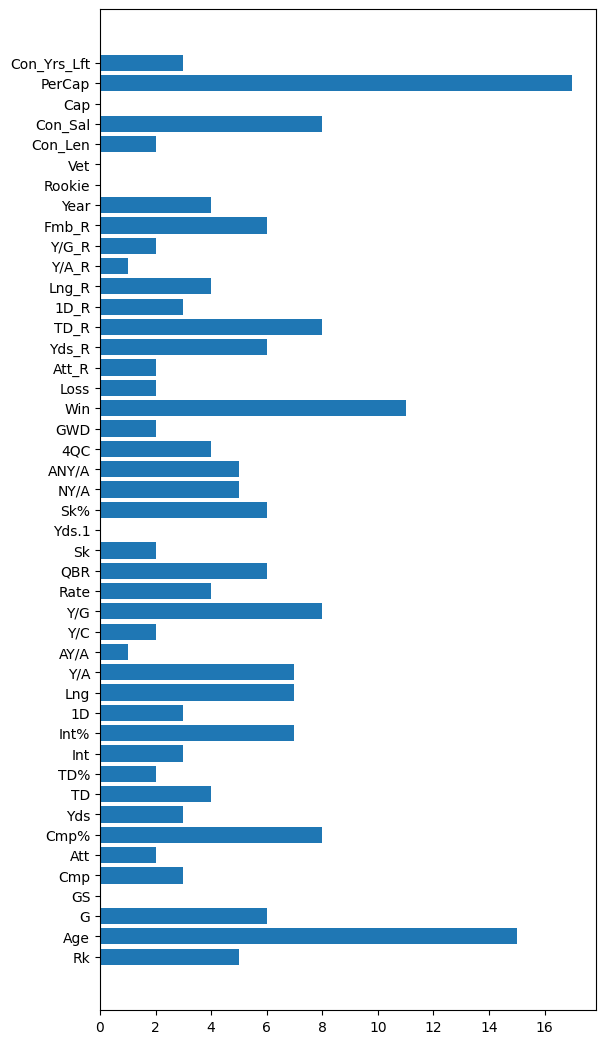

[{'Rk': 5, 'Age': 15, 'G': 6, 'GS': 0, 'Cmp': 3, 'Att': 2, 'Cmp%': 8, 'Yds': 3, 'TD': 4, 'TD%': 2, 'Int': 3, 'Int%': 7, '1D': 3, 'Lng': 7, 'Y/A': 7, 'AY/A': 1, 'Y/C': 2, 'Y/G': 8, 'Rate': 4, 'QBR': 6, 'Sk': 2, 'Yds.1': 0, 'Sk%': 6, 'NY/A': 5, 'ANY/A': 5, '4QC': 4, 'GWD': 2, 'Win': 11, 'Loss': 2, 'Att_R': 2, 'Yds_R': 6, 'TD_R': 8, '1D_R': 3, 'Lng_R': 4, 'Y/A_R': 1, 'Y/G_R': 2, 'Fmb_R': 6, 'Year': 4, 'Rookie': 0, 'Vet': 0, 'Con_Len': 2, 'Con_Sal': 8, 'Cap': 0, 'PerCap': 17, 'Con_Yrs_Lft': 3}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 45))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 5, 'num_leaves': 10, 'min_child_samples': 7, 'learning_rate': 0.5841017170343034, 'log_max_bin': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.006271077614131347, 'reg_lambda': 0.04995646643125341}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.8208333333333333


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.17916666666666664, 'rf': 0.2416666666666666, 'xgboost': 0.20833333333333331, 'extra_tree': 0.225, 'xgb_limitdepth': inf, 'lrl1': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 6.622374057769775e-05, 'wall_clock_time': 10.63396668434143, 'metric_for_logging': {'pred_time': 6.622374057769775e-05, 'train_loss': 0.0}, 'val_loss': 0.17916666666666664, 'training_iteration': 1, 'config': {'n_estimators': 5, 'num_leaves': 10, 'min_child_samples': 7, 'learning_rate': 0.5841017170343034, 'log_max_bin': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.006271077614131347, 'reg_lambda': 0.04995646643125341}, 'config/n_estimators': 5, 'config/num_leaves': 10, 'config/min_child_samples': 7, 'config/learning_rate': 0.5841017170343034, 'config/log_max_bin': 10, 'config/colsample_bytree': 1.0, 'config/reg_alpha': 0.006271077614131347, 'config/reg_lambda': 0.04995646643125341, 'experiment_tag': 'exp', 'time_total_s': 0.3481559753417969}


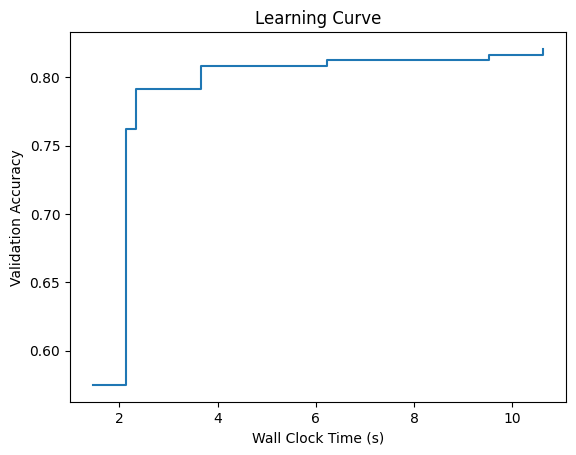

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [1 2 3 2 2 3 3 2 2 0 2 2 0 2 2 0 1 2 0 0 2 1 1 0 1 0 0 0 0 0 0 3 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 3 2 2 2 2 0 2 2 0 0 2 0 3 2 0
 3 0 0 0 1 0 2 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 2
 3 3 2 2 3 4 3 2 3 0 0 3 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 4 4 2 3 4 0 3 3 3 0 2 2 0 3 3 1 0 0 0 0 0 0 0 0
 3 0 0 1 1 0 4 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [1 2 3 2 2 3 3 2 2 0 2 2 0 2 2 0 1 2 0 0 2 1 1 0 1 0 0 0 0 0 0 3 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 3 2 2 2 2 0 2 2 0 0 2 0 3 2 0
 3 0 0 0 1 0 2 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 2
 3 3 2 2 3 4 3 2 3 0 0 3 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 4 4 2 3 4 0 3 3 3 0 2 2 0 3 3 1 0 0 0 0 0 0 0 0
 3 0 0 1 1 0 4 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 1.0
log_loss = 0.016403473142824868


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

KeyError: ignored

In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.8275862068965517
log_loss = 1.7120779950438363


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Lamar Jackson"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
#feeder_test.at[288, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Lamar Jackson"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp      Att     Cmp%  \
352 -0.411634 -0.648621  0.580793  0.693012  0.265695  0.32609 -0.05007   

          Yds       TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
352  0.278841  0.59235  0.968695  ...  4.565185  1.339394  3.252535  0.364379   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
352       1    0        4  9471648  0.011373            0  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
            Player  New_Con_Len
352  Lamar Jackson            0
####################### PREDICTED LENGTH #######################
Predicted New Percent of Cap [0]


### **Classification For Percent of Cap QB 1.1 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/QBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = np.array([0 if perc <= 0.05 else (1 if perc <= 0.10 else (2 if perc <= 0.15 else (3 if perc <= 0.20 else 4))) for perc in feeder_train['New_Perc_Cap'].round(4)], np.int)
y_train = pd.Series(y_train, copy=False)
y_test = np.array([0 if perc <= 0.05 else (1 if perc <= 0.10 else (2 if perc <= 0.15 else (3 if perc <= 0.20 else 4))) for perc in feeder_test['New_Perc_Cap'].round(4)], np.int)
y_test = pd.Series(y_test, copy=False)
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

<ipython-input-39-d6a0a45b58f5>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array([0 if perc <= 0.05 else (1 if perc <= 0.10 else (2 if perc <= 0.15 else (3 if perc <= 0.20 else 4))) for perc in feeder_train['New_Perc_Cap'].round(4)], np.int)
<ipython-input-39-d6a0a45b58f5>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-13 17:51:08] {1768} INFO - task = multiclass
[flaml.automl.logger: 04-13 17:51:08] {1775} INFO - Data split method: stratified
[flaml.automl.logger: 04-13 17:51:08] {1778} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 1 augmented from 10 to 20
INFO:flaml.automl.task.generic_task:class 4 augmented from 5 to 20


[flaml.automl.logger: 04-13 17:51:08] {1891} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-13 17:51:08] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-13 17:51:08] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-13 17:51:09] {2479} INFO - Estimated sufficient time budget=1570s. Estimated necessary time budget=36s.
[flaml.automl.logger: 04-13 17:51:09] {2526} INFO -  at 0.3s,	estimator lgbm's best error=0.4250,	best estimator lgbm's best error=0.4250
[flaml.automl.logger: 04-13 17:51:09] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-13 17:51:09] {2526} INFO -  at 0.4s,	estimator lgbm's best error=0.4250,	best estimator lgbm's best error=0.4250
[flaml.automl.logger: 04-13 17:51:09] {2341} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-13 17:51:09] {2526} INFO -  at 0.6s,	estimator lgbm's best error=0.2458

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:09] {2526} INFO -  at 1.0s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-13 17:51:09] {2341} INFO - iteration 4, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:10] {2526} INFO -  at 1.2s,	estimator extra_tree's best error=0.3583,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-13 17:51:10] {2341} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-13 17:51:10] {2526} INFO -  at 1.4s,	estimator lgbm's best error=0.2417,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-13 17:51:10] {2341} INFO - iteration 6, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:10] {2526} INFO -  at 1.9s,	estimator xgboost's best error=0.2333,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-13 17:51:10] {2341} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 04-13 17:51:10] {2526} INFO -  at 2.1s,	estimator lgbm's best error=0.2417,	best estimator xgboost's best error=0.2333
[flaml.automl.logger: 04-13 17:51:10] {2341} INFO - iteration 8, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:11] {2526} INFO -  at 2.9s,	estimator xgboost's best error=0.2250,	best estimator xgboost's best error=0.2250
[flaml.automl.logger: 04-13 17:51:11] {2341} INFO - iteration 9, current learner extra_tree
[flaml.automl.logger: 04-13 17:51:12] {2526} INFO -  at 3.2s,	estimator extra_tree's best error=0.3542,	best estimator xgboost's best error=0.2250
[flaml.automl.logger: 04-13 17:51:12] {2341} INFO - iteration 10, current learner rf
[flaml.automl.logger: 04-13 17:51:12] {2526} INFO -  at 3.4s,	estimator rf's best error=0.3500,	best estimator xgboost's best error=0.2250
[flaml.automl.logger: 04-13 17:51:12] {2341} INFO - iteration 11, current learner rf
[flaml.automl.logger: 04-13 17:51:12] {2526} INFO -  at 3.6s,	estimator rf's best error=0.3042,	best estimator xgboost's best error=0.2250
[flaml.automl.logger: 04-13 17:51:12] {2341} INFO - iteration 12, current learner rf
[flaml.automl.logger: 04-13 17:51:12] {2526} INFO -  at 3.8s,	estimator rf's best er

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:13] {2526} INFO -  at 5.0s,	estimator xgboost's best error=0.2167,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:13] {2341} INFO - iteration 16, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:14] {2526} INFO -  at 5.3s,	estimator rf's best error=0.2750,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:14] {2341} INFO - iteration 17, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:14] {2526} INFO -  at 5.8s,	estimator xgboost's best error=0.2167,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:14] {2341} INFO - iteration 18, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:15] {2526} INFO -  at 6.2s,	estimator lgbm's best error=0.2292,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:15] {2341} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:15] {2526} INFO -  at 6.7s,	estimator xgboost's best error=0.2167,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:15] {2341} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-13 17:51:15] {2526} INFO -  at 7.0s,	estimator rf's best error=0.2583,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:15] {2341} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:16] {2526} INFO -  at 7.7s,	estimator xgboost's best error=0.2167,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:16] {2341} INFO - iteration 22, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:19] {2526} INFO -  at 10.1s,	estimator lgbm's best error=0.2292,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:19] {2341} INFO - iteration 23, current learner rf
[flaml.automl.logger: 04-13 17:51:19] {2526} INFO -  at 10.5s,	estimator rf's best error=0.2583,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:19] {2341} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:19] {2526} INFO -  at 10.9s,	estimator xgboost's best error=0.2167,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:19] {2341} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:19] {2526} INFO -  at 11.1s,	estimator extra_tree's best error=0.3542,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:19] {2341} INFO - iteration 26, current learner rf
[flaml.automl.logger: 04-13 17:51:20] {2526} INFO -  at 11.3s,	estimator rf's best error=0.2583,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:20] {2341} INFO - iteration 27, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:20] {2526} INFO -  at 11.8s,	estimator xgboost's best error=0.2167,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:20] {2341} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:21] {2526} INFO -  at 12.3s,	estimator xgboost's best error=0.2167,	best estimator xgboost's best error=0.2167
[flaml.automl.logger: 04-13 17:51:21] {2341} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:21] {2526} INFO -  at 13.0s,	estimator xgboost's best error=0.2042,	best estimator xgboost's best error=0.2042
[flaml.automl.logger: 04-13 17:51:21] {2341} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 04-13 17:51:22] {2526} INFO -  at 13.2s,	estimator lgbm's best error=0.2292,	best estimator xgboost's best error=0.2042
[flaml.automl.logger: 04-13 17:51:22] {2341} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-13 17:51:22] {2526} INFO -  at 13.9s,	estimator lgbm's best error=0.1917,	best estimator lgbm's best error=0.1917
[flaml.automl.logger: 04-13 17:51:22] {2341} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-13 17:51:23] {2526} INFO -  at 14.1s,	estimator lgbm's best error=0.1917,	best estimator lgbm's best error=0.1917
[flaml.automl.logger: 04-13 17:51:23] {2341} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:23] {2526} INFO -  at 14.7s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1917
[flaml.automl.logger: 04-13 17:51:23] {2341} INFO - iteration 34, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:24] {2526} INFO -  at 15.9s,	estimator lgbm's best error=0.1875,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:24] {2341} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 04-13 17:51:25] {2526} INFO -  at 16.7s,	estimator lgbm's best error=0.1875,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:25] {2341} INFO - iteration 36, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:25] {2526} INFO -  at 17.1s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:25] {2341} INFO - iteration 37, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:26] {2526} INFO -  at 17.9s,	estimator lgbm's best error=0.1875,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:26] {2341} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 04-13 17:51:27] {2526} INFO -  at 18.4s,	estimator lgbm's best error=0.1875,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:27] {2341} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 04-13 17:51:28] {2526} INFO -  at 19.2s,	estimator lgbm's best error=0.1875,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:28] {2341} INFO - iteration 40, current learner rf
[flaml.automl.logger: 04-13 17:51:28] {2526} INFO -  at 19.5s,	estimator rf's best error=0.2583,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:28] {2341} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:28] {2526} INFO -  at 20.1s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1875
[flaml.automl.logger: 04-13 17:51:28] {2341} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-13 17:51:29] {2526} INFO -  at 20.8s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:29] {2341} INFO - iteration 43, current learner rf
[flaml.automl.logger: 04-13 17:51:30] {2526} INFO -  at 21.2s,	estimator rf's best error=0.2375,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:30] {2341} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-13 17:51:30] {2526} INFO -  at 21.6s,	estimator extra_tree's best error=0.3042,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:30] {2341} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 04-13 17:51:30] {2526} INFO -  at 22.0s,	estimator extra_

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:37] {2526} INFO -  at 28.6s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:37] {2341} INFO - iteration 56, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:38] {2526} INFO -  at 29.3s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:38] {2341} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 04-13 17:51:39] {2526} INFO -  at 30.5s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:39] {2341} INFO - iteration 58, current learner rf
[flaml.automl.logger: 04-13 17:51:39] {2526} INFO -  at 30.8s,	estimator rf's best error=0.2375,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:39] {2341} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 04-13 17:51:40] {2526} INFO -  at 31.2s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:40] {2341} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:40] {2526} INFO -  at 31.8s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:40] {2341} INFO - iteration 61, current learner lgbm
[flaml.automl.logger: 04-13 17:51:41] {2526} INFO -  at 32.3s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:41] {2341} INFO - iteration 62, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:42] {2526} INFO -  at 33.2s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:42] {2341} INFO - iteration 63, current learner extra_tree
[flaml.automl.logger: 04-13 17:51:42] {2526} INFO -  at 33.6s,	estimator extra_tree's best error=0.2792,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:42] {2341} INFO - iteration 64, current learner lgbm
[flaml.automl.logger: 04-13 17:51:44] {2526} INFO -  at 36.0s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:44] {2341} INFO - iteration 65, current learner rf
[flaml.automl.logger: 04-13 17:51:45] {2526} INFO -  at 36.3s,	estimator rf's best error=0.2375,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:45] {2341} INFO - iteration 66, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:46] {2526} INFO -  at 37.2s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:46] {2341} INFO - iteration 67, current learner rf
[flaml.automl.logger: 04-13 17:51:46] {2526} INFO -  at 37.5s,	estimator rf's best error=0.2375,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:46] {2341} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 04-13 17:51:47] {2526} INFO -  at 38.4s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:47] {2341} INFO - iteration 69, current learner rf
[flaml.automl.logger: 04-13 17:51:47] {2526} INFO -  at 38.6s,	estimator rf's best error=0.2167,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:47] {2341} INFO - iteration 70, current learner rf
[flaml.automl.logger: 04-13 17:51:47] {2526} INFO -  at 38.9s,	estimator rf's best error=0.2167,	best e

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:52] {2526} INFO -  at 43.6s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:52] {2341} INFO - iteration 85, current learner rf
[flaml.automl.logger: 04-13 17:51:52] {2526} INFO -  at 43.9s,	estimator rf's best error=0.1917,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:52] {2341} INFO - iteration 86, current learner rf
[flaml.automl.logger: 04-13 17:51:52] {2526} INFO -  at 44.1s,	estimator rf's best error=0.1917,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:52] {2341} INFO - iteration 87, current learner rf
[flaml.automl.logger: 04-13 17:51:53] {2526} INFO -  at 44.3s,	estimator rf's best error=0.1917,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:53] {2341} INFO - iteration 88, current learner rf
[flaml.automl.logger: 04-13 17:51:53] {2526} INFO -  at 44.6s,	estimator rf's best error=0.1917,	best estim

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:58] {2526} INFO -  at 49.9s,	estimator xgboost's best error=0.2042,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:58] {2341} INFO - iteration 99, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:51:59] {2526} INFO -  at 50.5s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:59] {2341} INFO - iteration 100, current learner extra_tree
[flaml.automl.logger: 04-13 17:51:59] {2526} INFO -  at 50.8s,	estimator extra_tree's best error=0.2167,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:51:59] {2341} INFO - iteration 101, current learner extra_tree
[flaml.automl.logger: 04-13 17:52:00] {2526} INFO -  at 51.2s,	estimator extra_tree's best error=0.2167,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:52:00] {2341} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 04-13 17:52:00] {2526} INFO -  at 51.8s,	estimator lgbm's best error=0.1833,	best estimator lgbm's best error=0.1833
[flaml.automl.logger: 04-13 17:52:00] {2341} INFO - iteration 103, current learner extra_tree
[flaml.automl.logger: 04-13 17:52:00] {2526} INFO -  at 52.1s,

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 17:52:09] {2790} INFO - retrain extra_tree for 0.3s
[flaml.automl.logger: 04-13 17:52:09] {2797} INFO - retrained model: ExtraTreesClassifier(criterion='entropy', max_features=0.1806524012447168,
                     max_leaf_nodes=29, n_estimators=18, n_jobs=-1,
                     random_state=12032022)
[flaml.automl.logger: 04-13 17:52:09] {2041} INFO - fit succeeded
[flaml.automl.logger: 04-13 17:52:09] {2042} INFO - Time taken to find the best model: 54.89124321937561


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

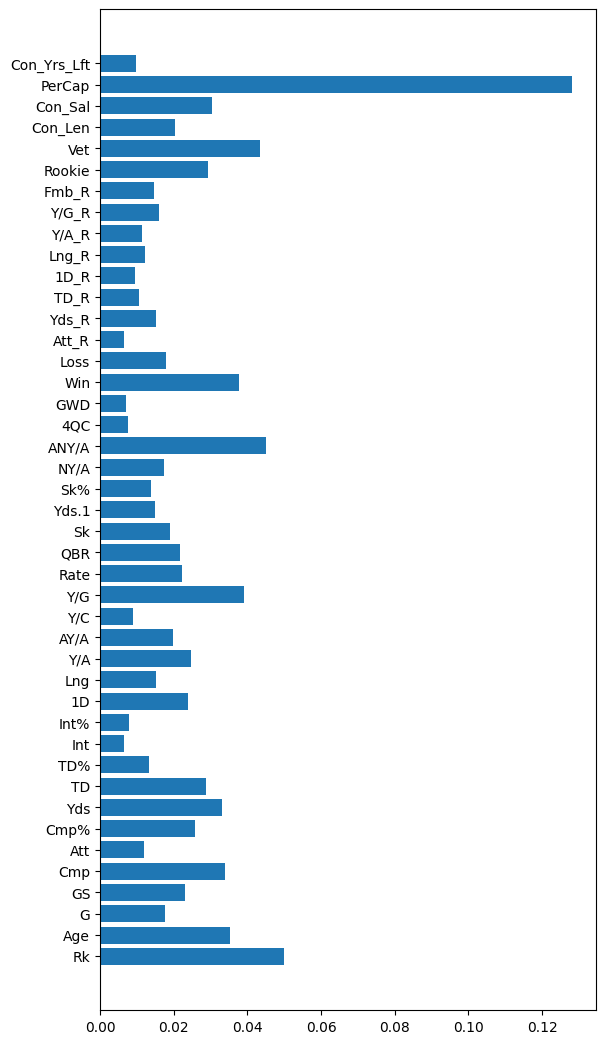

[{'Rk': 0.05001841718939584, 'Age': 0.035158997080624345, 'G': 0.017654983114784625, 'GS': 0.023027623017901226, 'Cmp': 0.03382552890353733, 'Att': 0.011913566524470945, 'Cmp%': 0.02575756391148971, 'Yds': 0.033193007627986375, 'TD': 0.0286560734313454, 'TD%': 0.013194881432002465, 'Int': 0.0066534896648466416, 'Int%': 0.0078274005130791, '1D': 0.02380478825301681, 'Lng': 0.015145089214670115, 'Y/A': 0.02469561737113359, 'AY/A': 0.019805844295963507, 'Y/C': 0.008834446208084986, 'Y/G': 0.038960721530243964, 'Rate': 0.022230851053238656, 'QBR': 0.021648279619262644, 'Sk': 0.018942000262264776, 'Yds.1': 0.014927106781052517, 'Sk%': 0.013742468218545422, 'NY/A': 0.017468354968292875, 'ANY/A': 0.04510494688645872, '4QC': 0.007485244517501613, 'GWD': 0.007059814986524998, 'Win': 0.037782005689644856, 'Loss': 0.0178660658700754, 'Att_R': 0.00646047104664778, 'Yds_R': 0.015078150791039947, 'TD_R': 0.010557081341209522, '1D_R': 0.009465885073975095, 'Lng_R': 0.012260240468648497, 'Y/A_R': 0.01

In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 43))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 18, 'max_features': 0.1806524012447168, 'max_leaves': 29, 'criterion': 'entropy'}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.8291666666666666


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.18333333333333335, 'rf': 0.19166666666666662, 'xgboost': 0.2041666666666667, 'extra_tree': 0.17083333333333334, 'xgb_limitdepth': 0.33333333333333337, 'lrl1': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00023905038833618164, 'wall_clock_time': 54.89124321937561, 'metric_for_logging': {'pred_time': 0.00023905038833618164, 'train_loss': 0.024999999999999977}, 'val_loss': 0.17083333333333334, 'training_iteration': 1, 'config': {'n_estimators': 18, 'max_features': 0.1806524012447168, 'max_leaves': 29, 'criterion': 'entropy'}, 'config/n_estimators': 18, 'config/max_features': 0.1806524012447168, 'config/max_leaves': 29, 'config/criterion': 'entropy', 'experiment_tag': 'exp', 'time_total_s': 0.40564990043640137}


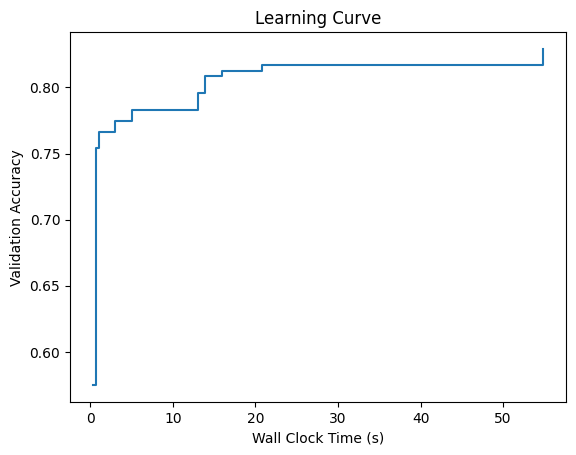

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [1 2 3 2 2 3 3 2 2 0 0 2 0 2 2 0 1 2 0 0 2 0 1 0 1 0 0 0 0 0 0 3 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 3 2 2 2 2 0 2 2 0 0 2 0 3 2 0
 0 0 0 0 1 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 2
 3 3 2 2 3 4 3 2 0 0 0 3 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2 3 4 0 3 3 3 2 2 2 0 3 3 1 0 0 0 0 0 0 0 0
 3 0 0 1 1 0 4 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [1 2 3 2 2 3 3 2 2 0 2 2 0 2 2 0 1 2 0 0 2 1 1 0 1 0 0 0 0 0 0 3 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 3 2 2 2 2 0 2 2 0 0 2 0 3 2 0
 3 0 0 0 1 0 2 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 2
 3 3 2 2 3 4 3 2 3 0 0 3 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 4 4 2 3 4 0 3 3 3 0 2 2 0 3 3 1 0 0 0 0 0 0 0 0
 3 0 0 1 1 0 4 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.9674418604651163
log_loss = 0.27557462056420906


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [2 0 3 3 2 0 3 3 3 3 2 2 0 0 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [1 0 3 4 3 0 3 4 3 4 2 0 0 4 0 2 0 3 0 3 0 4 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.8275862068965517
log_loss = 1.7120779950438363


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Jalen Hurts"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[288, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Jalen Hurts"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Percent of Cap', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
335 -1.230651 -0.863773  1.134446  1.196124  1.008579  0.971752  0.690866   

         Yds        TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
335  1.24155  1.064011  0.744833  ...  1.900313  0.486872  2.415547  1.478949   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
335       1    0        4  6025171  0.007235            1  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
          Player  New_Perc_Cap
335  Jalen Hurts           0.0
####################### PREDICTED LENGTH #######################
Predicted New Percent of Cap [0]


## **MultiOutput**

### **MultiOutput Regression QB (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/QB_data/finalQB.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2022]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_test = feeder[feeder.Year == 2022]

#Prepare Data for modeling 
players = feeder[['Player']]
feeder_train = feeder_train.drop(['Player', 'Pos'], axis=1)
targets = feeder_train[['New_Con_Len', 'New_Perc_Cap']]
features = feeder_train.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

In [ ]:
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 120,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_MultiOut.log",
    #"max_iter": 2,
}

# train the model
model = MultiOutputRegressor(AutoML(**automl_settings))
model.fit(X_train, y_train)

[flaml.automl.automl: 03-30 21:01:07] {2726} INFO - task = regression
[flaml.automl.automl: 03-30 21:01:07] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-30 21:01:07] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-30 21:01:07] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-30 21:01:07] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-30 21:01:07] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-30 21:01:07] {3472} INFO - Estimated sufficient time budget=952s. Estimated necessary time budget=7s.
[flaml.automl.automl: 03-30 21:01:07] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8765,	best estimator lgbm's best error=0.8765
[flaml.automl.automl: 03-30 21:01:07] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-30 21:01:07] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.8765,	best estimator 

MultiOutputRegressor(estimator=AutoML(append_log=False, auto_augment=True,
                                      custom_hp={}, cv_score_agg_func=None,
                                      early_stop=False, ensemble=False,
                                      estimator_list='auto', eval_method='cv',
                                      fit_kwargs_by_estimator={},
                                      force_cancel=False, free_mem_ratio=0,
                                      hpo_method='auto', keep_search_state=True,
                                      learner_selector='sample',
                                      log_file_name='QB_MultiOut.log',
                                      log_training_metric=True,
                                      log_type='better', max_iter=None,
                                      mem_thres=4294967296, metric='r2',
                                      metric_constraints=[],
                                      min_sample_size=10000, model_history=True,
                                      n_concurrent_trials=1, n_jobs=-1,
                                      n_splits=5, pred_time_limit=inf,
                                      preserve_checkpoint=True,
                                      retrain_full=True, sample=True, ...))

In [ ]:
'''pickle and save the automl object'''
def saveModel(model, versionNum):
  verNum = str(versionNum)
  with open('MultiOutAutoml_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

#saveModel(model, "1.0")

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    model = pickle.load(f)
    return model
  
#model = loadModel("")

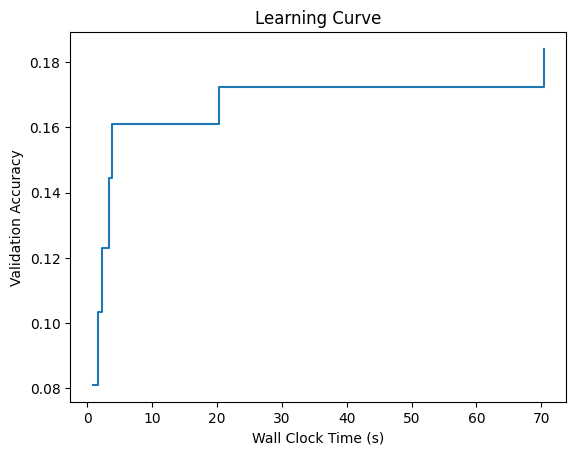

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = model.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [[-1.10228653e-02  5.27380793e-04]
 [-1.10228653e-02  1.98063786e-04]
 [-1.10228653e-02 -3.36872206e-03]
 [-1.10228653e-02  8.67721504e-04]
 [-1.10228653e-02 -6.14179108e-04]
 [ 2.01935330e-01 -1.35855991e-03]
 [-1.10228653e-02 -3.63123974e-04]
 [-1.10228653e-02  1.55364626e-03]
 [-1.10228653e-02  9.91264245e-04]
 [-1.10228653e-02 -5.29666217e-05]
 [-2.09193970e+00 -5.83858204e-02]
 [-1.10228653e-02  1.63506895e-03]
 [-6.63538189e-01 -6.40064889e-03]
 [-1.10228653e-02  3.33600212e-04]
 [-1.10228653e-02  4.56997600e-03]
 [-1.10228653e-02  8.49326438e-05]
 [ 4.63264360e-01  1.42729936e-01]
 [-1.10228653e-02  8.27327523e-04]
 [-1.10228653e-02 -3.36113382e-04]
 [-1.10228653e-02 -3.18338989e-04]
 [-1.10228653e-02  2.54262658e-04]
 [-1.10228653e-02  4.13935194e-04]
 [-1.10228653e-02 -2.75700768e-03]
 [-1.10228653e-02 -4.14529686e-03]
 [-1.10228653e-02  1.32230603e-03]
 [-1.10228653e-02 -1.49069343e-03]
 [-1.10228653e-02  1.09021024e-03]
 [-1.10228653e-02  1.62925077e-03]
 [-

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.6353233780490959
mse = 0.3435709793748318
mae = 0.21418641343193612


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_train.columns)
train = pd.DataFrame(y_train, columns = y_train.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = 0.4230485285439377
NewConLen: mse = 0.6869636248068742
NewConLen: mae = 0.421093403650719
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.8475982275542542
New_Perc_Cap: mse = 0.00017833394278934716
New_Perc_Cap: mae = 0.0072794232131532495


In [ ]:
# Predict on Test set
y_pred = model.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [[ 2.50306164e-01  9.12055284e-02]
 [-1.10228653e-02  2.29822250e-04]
 [-1.10228653e-02  1.53700943e-03]
 [-1.10228653e-02  1.30280293e-03]
 [-1.10228653e-02  7.16345337e-04]
 [-1.10228653e-02 -4.82292194e-04]
 [-1.10228653e-02  9.72772169e-03]
 [-1.10228653e-02  4.13935194e-04]
 [-2.09193970e+00 -2.90277185e-02]
 [-1.10228653e-02  7.92058660e-02]
 [ 8.36451510e-01  1.28335264e-02]
 [-1.10228653e-02 -1.85116114e-03]
 [ 2.01935330e-01  1.25569739e-03]
 [-5.85295711e-01 -4.32753945e-02]
 [-1.10505235e+00  9.34271768e-03]
 [-1.10228653e-02 -4.71551093e-04]
 [-1.10228653e-02  1.37631639e-04]
 [-5.85295711e-01 -1.26161313e-02]
 [-1.10228653e-02 -8.61094673e-04]
 [ 2.01935330e-01 -1.94921675e-03]
 [-1.10228653e-02  1.40928917e-07]
 [-1.10228653e-02  2.82582403e-04]
 [-1.10228653e-02 -5.33249987e-04]
 [-1.10228653e-02 -1.89750789e-03]
 [-1.10228653e-02  1.31725824e-03]
 [-6.63538189e-01 -4.98401780e-03]
 [-1.74342447e+00 -2.44881111e-02]
 [ 2.01935330e-01 -1.72102411e-04]
 [-

In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.08334721073649076
mse = 0.2639616567287435
mae = 0.21945202402767636


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_test.columns)
train = pd.DataFrame(y_test, columns = y_test.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = -0.32403151831004684
NewConLen: mse = 0.5268637529607453
NewConLen: mae = 0.41862919546169597
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.49072593978302836
New_Perc_Cap: mse = 0.001059560496741753
New_Perc_Cap: mae = 0.020274852593656748


In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Daniel Jones"]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player', 'Pos'], axis=1)
#targets = feeder_test['New_Con_Len', 'New_Perc_Cap']
feeder_test = feeder_test.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = model.predict(feeder_test)
print('Predicted labels', y_pred)

           Player   Tm Pos        Rk       Age         G        GS    Cmp  \
409  Daniel Jones  NYG  QB -1.096322 -0.723312  1.480988  1.520292  1.261   

          Att      Cmp%  ...     Fmb_R  Year  Rookie  Vet  Con_Len  \
409  1.202089  0.470048  ...  0.643021  2022     1.0  0.0      4.0   

        Con_Sal          Cap      %Cap  New_Con_Len  New_Perc_Cap  
409  25664056.0  208200000.0  0.030817            0      -0.00434  

[1 rows x 49 columns]
Predicted labels [[-0.01102287  0.00370271]]


# **RB Models**

## **Contract Length $\checkmark$**

### **Regression For Contract Length RB 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/RB_data/finalRB.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0'], axis=1)
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 04-02 04:13:30] {2726} INFO - task = regression
[flaml.automl.automl: 04-02 04:13:30] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 04-02 04:13:30] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-02 04:13:30] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 04-02 04:13:30] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 04-02 04:13:30] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-02 04:13:32] {3472} INFO - Estimated sufficient time budget=14886s. Estimated necessary time budget=105s.
[flaml.automl.automl: 04-02 04:13:32] {3519} INFO -  at 1.6s,	estimator lgbm's best error=0.9880,	best estimator lgbm's best error=0.9880
[flaml.automl.automl: 04-02 04:13:32] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-02 04:13:32] {3519} INFO -  at 2.1s,	estimator lgbm's best error=0.9880,	best estima

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

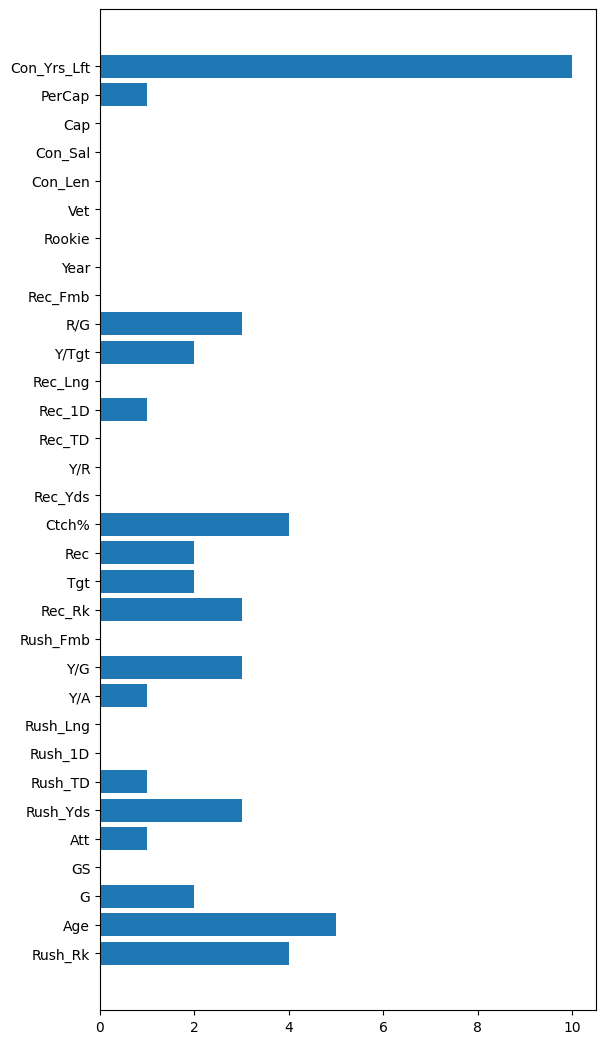

[{'Rush_Rk': 4, 'Age': 5, 'G': 2, 'GS': 0, 'Att': 1, 'Rush_Yds': 3, 'Rush_TD': 1, 'Rush_1D': 0, 'Rush_Lng': 0, 'Y/A': 1, 'Y/G': 3, 'Rush_Fmb': 0, 'Rec_Rk': 3, 'Tgt': 2, 'Rec': 2, 'Ctch%': 4, 'Rec_Yds': 0, 'Y/R': 0, 'Rec_TD': 0, 'Rec_1D': 1, 'Rec_Lng': 0, 'Y/Tgt': 2, 'R/G': 3, 'Rec_Fmb': 0, 'Year': 0, 'Rookie': 0, 'Vet': 0, 'Con_Len': 0, 'Con_Sal': 0, 'Cap': 0, 'PerCap': 1, 'Con_Yrs_Lft': 10}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 32))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'num_leaves': 7, 'min_child_samples': 3, 'learning_rate': 0.17877562148423154, 'log_max_bin': 7, 'colsample_bytree': 0.7687565424642663, 'reg_alpha': 0.005373781856297014, 'reg_lambda': 0.01151894775381552}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.17559342921179633


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.8244065707882037, 'rf': 1.0473407892004276, 'xgboost': 0.8529836652375022, 'extra_tree': 0.857078315754982, 'xgb_limitdepth': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 2.2682190498784577e-05, 'wall_clock_time': 53.90105962753296, 'metric_for_logging': {'pred_time': 2.2682190498784577e-05, 'train_loss': 0.3500048342339238}, 'val_loss': 0.8244065707882037, 'training_iteration': 1, 'config': {'n_estimators': 8, 'num_leaves': 7, 'min_child_samples': 3, 'learning_rate': 0.17877562148423154, 'log_max_bin': 7, 'colsample_bytree': 0.7687565424642663, 'reg_alpha': 0.005373781856297014, 'reg_lambda': 0.01151894775381552}, 'config/n_estimators': 8, 'config/num_leaves': 7, 'config/min_child_samples': 3, 'config/learning_rate': 0.17877562148423154, 'config/log_max_bin': 7, 'config/colsample_bytree': 0.7687565424642663, 'config/reg_alpha': 0.005373781856297014, 'config/reg_lambda': 0.01151894775381552, 'experiment_tag': 'exp', 'time_total_s': 0.0869145393371582}


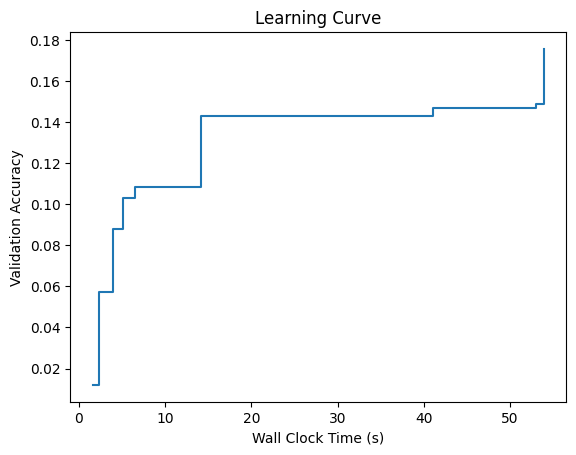

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [3. 0. 1. 3. 0. 0. 0. 1. 0. 0. 2. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 2. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 4. 0. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 3. 0. 0. 4. 1. 1. 3. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 3. 1. 1. 1. 1. 0. 0. 0. 1. 3. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 3. 0. 1. 0. 2. 1. 0. 0. 0. 1. 2. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0.]


In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.5824740116060618
mse = 0.4691780821917808
mae = 0.3458904109589041


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 2. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = -0.054263565891472965
mse = 0.4473684210526316
mae = 0.39473684210526316


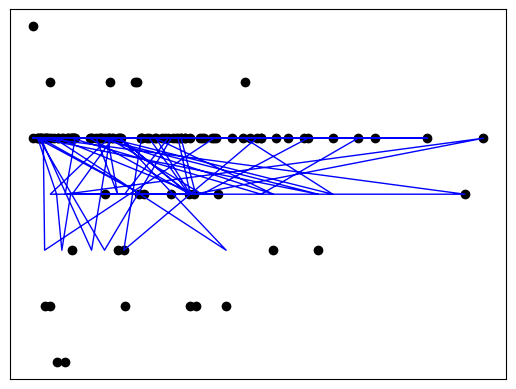

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/RB_data/finalRB.csv")
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Player == "Saquon Barkley"]
targets = feeder_test['Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0'], axis=1)
#feeder_test.at[327, 'Con_Yrs_Lft'] = 0
y_pred = automl.predict(feeder_test).round()
print('Predicted Contract Length:', int(y_pred[0]))
print('-------------------------------------------')
print(feeder_test.head())

Predicted Contract Length: 2
-------------------------------------------
      Rush_Rk      Age         G        GS       Att  Rush_Yds   Rush_TD  \
450 -0.910497 -0.13245  0.692595  1.586597  1.808355  1.732472  1.567553   

      Rush_1D  Rush_Lng       Y/A  ...      R/G   Rec_Fmb  Year  Rookie  Vet  \
450  1.543895  1.598263  0.162535  ...  1.39391 -0.320145  2022     1.0  0.0   

     Con_Len     Con_Sal          Cap    PerCap  Con_Yrs_Lft  
450      4.0  31194751.0  208200000.0  0.037458           -1  

[1 rows x 32 columns]


### **Classification For Contract Length RB 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/RB_data/RBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]

#feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-13 18:19:32] {1768} INFO - task = multiclass
[flaml.automl.logger: 04-13 18:19:32] {1775} INFO - Data split method: stratified
[flaml.automl.logger: 04-13 18:19:32] {1778} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 19 to 38


[flaml.automl.logger: 04-13 18:19:32] {1891} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-13 18:19:32] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-13 18:19:32] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-13 18:19:32] {2479} INFO - Estimated sufficient time budget=680s. Estimated necessary time budget=16s.
[flaml.automl.logger: 04-13 18:19:32] {2526} INFO -  at 0.1s,	estimator lgbm's best error=0.3516,	best estimator lgbm's best error=0.3516
[flaml.automl.logger: 04-13 18:19:32] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-13 18:19:32] {2526} INFO -  at 0.2s,	estimator lgbm's best error=0.3516,	best estimator lgbm's best error=0.3516
[flaml.automl.logger: 04-13 18:19:32] {2341} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-13 18:19:32] {2526} INFO -  at 0.3s,	estimator lgbm's best error=0.3161,

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:33] {2526} INFO -  at 0.6s,	estimator extra_tree's best error=0.3419,	best estimator lgbm's best error=0.3161
[flaml.automl.logger: 04-13 18:19:33] {2341} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-13 18:19:33] {2526} INFO -  at 0.7s,	estimator lgbm's best error=0.2903,	best estimator lgbm's best error=0.2903
[flaml.automl.logger: 04-13 18:19:33] {2341} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-13 18:19:33] {2526} INFO -  at 0.8s,	estimator lgbm's best error=0.2903,	best estimator lgbm's best error=0.2903
[flaml.automl.logger: 04-13 18:19:33] {2341} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 04-13 18:19:33] {2526} INFO -  at 0.9s,	estimator lgbm's best error=0.2903,	best estimator lgbm's best error=0.2903
[flaml.automl.logger: 04-13 18:19:33] {2341} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 04-13 18:19:33] {2526} INFO -  at 0.9s,	estimator lgbm's best error=0.2903,	

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:33] {2526} INFO -  at 1.4s,	estimator extra_tree's best error=0.3226,	best estimator lgbm's best error=0.2839
[flaml.automl.logger: 04-13 18:19:33] {2341} INFO - iteration 12, current learner rf
[flaml.automl.logger: 04-13 18:19:33] {2526} INFO -  at 1.5s,	estimator rf's best error=0.3323,	best estimator lgbm's best error=0.2839
[flaml.automl.logger: 04-13 18:19:33] {2341} INFO - iteration 13, current learner rf
[flaml.automl.logger: 04-13 18:19:34] {2526} INFO -  at 1.7s,	estimator rf's best error=0.3194,	best estimator lgbm's best error=0.2839
[flaml.automl.logger: 04-13 18:19:34] {2341} INFO - iteration 14, current learner lgbm
[flaml.automl.logger: 04-13 18:19:34] {2526} INFO -  at 1.8s,	estimator lgbm's best error=0.2806,	best estimator lgbm's best error=0.2806
[flaml.automl.logger: 04-13 18:19:34] {2341} INFO - iteration 15, current learner lgbm
[flaml.automl.logger: 04-13 18:19:34] {2526} INFO -  at 1.8s,	estimator lgbm's best error=0.2806,	best

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:34] {2526} INFO -  at 2.4s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:34] {2341} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 04-13 18:19:34] {2526} INFO -  at 2.5s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:34] {2341} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 04-13 18:19:35] {2526} INFO -  at 2.7s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:35] {2341} INFO - iteration 21, current learner rf
[flaml.automl.logger: 04-13 18:19:35] {2526} INFO -  at 2.8s,	estimator rf's best error=0.3194,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:35] {2341} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 04-13 18:19:35] {2526} INFO -  at 3.0s,	estimator lgbm's best error=0.2419,	best e

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:37] {2526} INFO -  at 5.0s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:37] {2341} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 04-13 18:19:37] {2526} INFO -  at 5.2s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:37] {2341} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 04-13 18:19:37] {2526} INFO -  at 5.3s,	estimator extra_tree's best error=0.3226,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:37] {2341} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 04-13 18:19:37] {2526} INFO -  at 5.5s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:37] {2341} INFO - iteration 38, current learner xgboost
[flaml.automl.logger: 04-13 18:19:38] {2526} INFO -  at 5.6s,	estimator xgboost's bes

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:38] {2526} INFO -  at 5.8s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:38] {2341} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 04-13 18:19:38] {2526} INFO -  at 6.0s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:38] {2341} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-13 18:19:38] {2526} INFO -  at 6.2s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:38] {2341} INFO - iteration 42, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:38] {2526} INFO -  at 6.3s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:38] {2341} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 04-13 18:19:39] {2526} INFO -  at 6.6s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2419


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:39] {2341} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-13 18:19:39] {2526} INFO -  at 6.8s,	estimator extra_tree's best error=0.3161,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:39] {2341} INFO - iteration 45, current learner rf
[flaml.automl.logger: 04-13 18:19:39] {2526} INFO -  at 6.9s,	estimator rf's best error=0.3129,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:39] {2341} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 04-13 18:19:39] {2526} INFO -  at 7.1s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:39] {2341} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 04-13 18:19:39] {2526} INFO -  at 7.3s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:39] {2341} INFO - iteration 48, current learner lgbm

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:39] {2526} INFO -  at 7.5s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:39] {2341} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 04-13 18:19:40] {2526} INFO -  at 7.8s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:40] {2341} INFO - iteration 50, current learner xgboost
[flaml.automl.logger: 04-13 18:19:40] {2526} INFO -  at 8.0s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:40] {2341} INFO - iteration 51, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:40] {2526} INFO -  at 8.1s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:40] {2341} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 04-13 18:19:40] {2526} INFO -  at 8.2s,	estimator lgbm's best error=0.2419,	best estimator lgbm's best error=0.2419
[flaml.automl.logger: 04-13 18:19:40] {2341} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 04-13 18:19:40] {2526} INFO -  at 8.4s,	estimator lgbm's best error=0.2323,	best estimator lgbm's best error=0.2323
[flaml.automl.logger: 04-13 18:19:40] {2341} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 04-13 18:19:41] {2526} INFO -  at 8.6s,	estimator lgbm's best error=0.2323,	best estimator lgbm's best error=0.2323
[flaml.automl.logger: 04-13 18:19:41] {2341} INFO - iteration 55, current learner rf
[flaml.automl.logger: 04-13 18:19:41] {2526} INFO -  at 8.8s,	estimator rf's best error=0.3129,	best e

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:48] {2526} INFO -  at 15.7s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:48] {2341} INFO - iteration 74, current learner xgboost
[flaml.automl.logger: 04-13 18:19:48] {2526} INFO -  at 15.9s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:48] {2341} INFO - iteration 75, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:48] {2526} INFO -  at 16.0s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:48] {2341} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 04-13 18:19:49] {2526} INFO -  at 16.9s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:49] {2341} INFO - iteration 77, current learner rf
[flaml.automl.logger: 04-13 18:19:49] {2526} INFO -  at 17.0s,	estimator rf's best error=0.3129,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:49] {2341} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 04-13 18:19:49] {2526} INFO -  at 17.2s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:49] {2341} INFO - iteration 79, current learner lgbm
[flaml.automl.logger: 04-13 18:19:50] {2526} INFO -  at 17.9s,	estimator lgbm's best error=0.2290,	b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:52] {2526} INFO -  at 19.6s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:52] {2341} INFO - iteration 86, current learner rf
[flaml.automl.logger: 04-13 18:19:52] {2526} INFO -  at 19.8s,	estimator rf's best error=0.3129,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:52] {2341} INFO - iteration 87, current learner lgbm
[flaml.automl.logger: 04-13 18:19:52] {2526} INFO -  at 20.4s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:52] {2341} INFO - iteration 88, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:53] {2526} INFO -  at 20.7s,	estimator xgb_limitdepth's best error=0.2839,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:53] {2341} INFO - iteration 89, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:53] {2526} INFO -  at 21.0s,	estimator xgb_limitdepth's best error=0.2839,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:53] {2341} INFO - iteration 90, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:53] {2526} INFO -  at 21.3s,	estimator xgb_limitdepth's best error=0.2645,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:53] {2341} INFO - iteration 91, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:53] {2526} INFO -  at 21.5s,	estimator xgb_limitdepth's best error=0.2645,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:53] {2341} INFO - iteration 92, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-13 18:19:54] {2526} INFO -  at 21.8s,	estimator xgb_limitdepth's best error=0.2581,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:54] {2341} INFO - iteration 93, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:54] {2526} INFO -  at 22.1s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:54] {2341} INFO - iteration 94, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:57] {2526} INFO -  at 24.6s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:57] {2341} INFO - iteration 95, current learner lgbm
[flaml.automl.logger: 04-13 18:19:57] {2526} INFO -  at 24.9s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:57] {2341} INFO - iteration 96, current learner xgb_limitdepth
[flaml.automl.logger: 04-13 18:19:57] {2526} INFO -  at 25.1s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:57] {2341} INFO - iteration 97, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:58] {2526} INFO -  at 25.6s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:58] {2341} INFO - iteration 98, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:58] {2526} INFO -  at 25.8s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:58] {2341} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 04-13 18:19:58] {2526} INFO -  at 26.1s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:58] {2341} INFO - iteration 100, current learner lgbm
[flaml.automl.logger: 04-13 18:19:58] {2526} INFO -  at 26.3s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:58] {2341} INFO - iteration 101, current learner xgb_limitdepth
[flaml.automl.logger: 04-13 18:19:58] {2526} INFO -  at 26.5s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:58] {2341} INFO - iteration 102, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-13 18:19:59] {2526} INFO -  at 26.7s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:59] {2341} INFO - iteration 103, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:19:59] {2526} INFO -  at 27.2s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:59] {2341} INFO - iteration 104, current learner extra_tree
[flaml.automl.logger: 04-13 18:19:59] {2526} INFO -  at 27.4s,	estimator extra_tree's best error=0.3161,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:19:59] {2341} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 04-13 18:20:00] {2526} INFO -  at 27.7s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:00] {2341} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 04-13 18:20:00] {2526} INFO -  at 27.9s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:00] {2341} INFO - iteration 107, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-13 18:20:00] {2526} INFO -  at 28.1s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:00] {2341} INFO - iteration 108, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:00] {2526} INFO -  at 28.5s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:00] {2341} INFO - iteration 109, current learner xgb_limitdepth
[flaml.automl.logger: 04-13 18:20:01] {2526} INFO -  at 28.7s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:01] {2341} INFO - iteration 110, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:01] {2526} INFO -  at 28.9s,	estimator extra_tree's best error=0.3065,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:01] {2341} INFO - iteration 111, current learner lgbm
[flaml.automl.logger: 04-13 18:20:01] {2526} INFO -  at 29.5s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:01] {2341} INFO - iteration 112, current learner xgb_limitdepth
[flaml.automl.logger: 04-13 18:20:02] {2526} INFO -  at 29.7s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:02] {2341} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:02] {2526} INFO -  at 29.9s,	estimator extra_tree's best error=0.3065,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:02] {2341} INFO - iteration 114, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:02] {2526} INFO -  at 30.1s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:02] {2341} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 04-13 18:20:02] {2526} INFO -  at 30.3s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:02] {2341} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 04-13 18:20:03] {2526} INFO -  at 30.7s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:03] {2341} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl.logger: 04-13 18:20:03] {2526} INFO -  at 30.9s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:03] {2341} INFO - iteration 118, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:03] {2526} INFO -  at 31.1s,	estimator extra_tree's best error=0.2903,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:03] {2341} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 04-13 18:20:03] {2526} INFO -  at 31.4s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:03] {2341} INFO - iteration 120, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:04] {2526} INFO -  at 31.6s,	estimator extra_tree's best error=0.2903,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:04] {2341} INFO - iteration 121, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:04] {2526} INFO -  at 32.0s,	estimator extra_tree's best error=0.2903,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:04] {2341} INFO - iteration 122, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:04] {2526} INFO -  at 32.2s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:04] {2341} INFO - iteration 123, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:04] {2526} INFO -  at 32.4s,	estimator extra_tree's best error=0.2645,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:04] {2341} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 04-13 18:20:05] {2526} INFO -  at 32.8s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:05] {2341} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 04-13 18:20:05] {2526} INFO -  at 33.1s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:05] {2341} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 04-13 18:20:05] {2526} INFO -  at 33.4s,	estimat

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:06] {2526} INFO -  at 34.3s,	estimator extra_tree's best error=0.2645,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:06] {2341} INFO - iteration 131, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:07] {2526} INFO -  at 34.7s,	estimator extra_tree's best error=0.2548,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:07] {2341} INFO - iteration 132, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:08] {2526} INFO -  at 36.5s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2290
[flaml.automl.logger: 04-13 18:20:08] {2341} INFO - iteration 133, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:09] {2526} INFO -  at 37.3s,	estimator lgbm's best error=0.2258,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:09] {2341} INFO - iteration 134, current learner xgboost
[flaml.automl.logger: 04-13 18:20:09] {2526} INFO -  at 37.5s,	estimator xgboost's best error=0.3000,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:09] {2341} INFO - iteration 135, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:10] {2526} INFO -  at 37.8s,	estimator extra_tree's best error=0.2516,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:10] {2341} INFO - iteration 136, current learner xgb_limitdepth
[flaml.automl.logger: 04-13 18:20:10] {2526} INFO -  at 37.9s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:10] {2341} INFO - iteration 137, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:10] {2526} INFO -  at 38.2s,	estimator extra_tree's best error=0.2516,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:10] {2341} INFO - iteration 138, current learner lgbm
[flaml.automl.logger: 04-13 18:20:10] {2526} INFO -  at 38.5s,	estimator lgbm's best error=0.2258,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:10] {2341} INFO - iteration 139, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:11] {2526} INFO -  at 38.8s,	estimator extra_tree's best error=0.2516,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:11] {2341} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 04-13 18:20:12] {2526} INFO -  at 39.6s,	estimator lgbm's best error=0.2258,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:12] {2341} INFO - iteration 141, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:12] {2526} INFO -  at 39.8s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:12] {2341} INFO - iteration 142, current learner rf
[flaml.automl.logger: 04-13 18:20:12] {2526} INFO -  at 40.1s,	estimator rf's best error=0.3129,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:12] {2341} INFO - iteration 143, current learner xgb_limitdepth
[flaml.automl.logger: 04-13 18:20:12] {2526} INFO -  at 40.3s,	estimator xgb_limitdepth's best error=0.2452,	best estimator lgbm's best error=0.2258
[flaml.automl.logger: 04-13 18:20:12] {2341} INFO - iteration 144, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:12] {2526} INFO -  at 40.5s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-13 18:20:12] {2341} INFO - iteration 145, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:13] {2526} INFO -  at 40.8s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-13 18:20:13] {2341} INFO - iteration 146, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:13] {2526} INFO -  at 41.0s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-13 18:20:13] {2341} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 04-13 18:20:14] {2526} INFO -  at 41.8s,	estimator lgbm's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-13 18:20:14] {2341} INFO - iteration 148, current learner extra_tree
[flaml.automl.logger: 04-13 18:2

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-13 18:20:29] {2526} INFO -  at 56.7s,	estimator xgb_limitdepth's best error=0.2452,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-13 18:20:29] {2341} INFO - iteration 157, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:29] {2526} INFO -  at 57.1s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-13 18:20:29] {2341} INFO - iteration 158, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:29] {2526} INFO -  at 57.5s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-13 18:20:29] {2341} INFO - iteration 159, current learner extra_tree
[flaml.automl.logger: 04-13 18:20:30] {2526} INFO -  at 57.8s,	estimator extra_tree's best error=0.2226,	best estimator extra_tree's best error=0.2226
[flaml.automl.logger: 04-13 18:20:30] {2341} INFO - iteration 160, current learner extra_tree
[flaml.automl.lo

In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

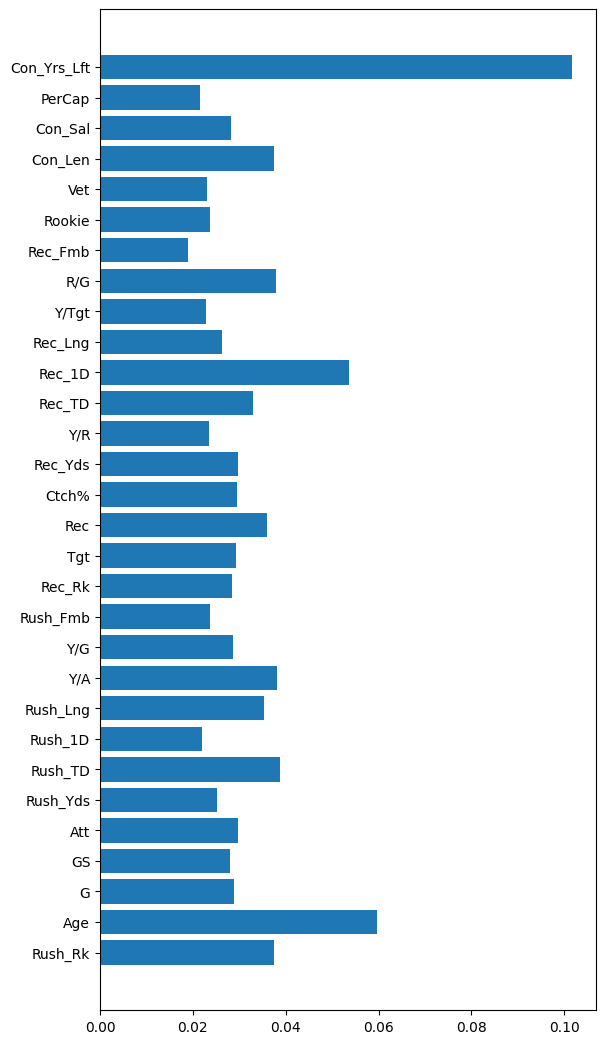

[{'Rush_Rk': 0.037453660678707326, 'Age': 0.05969249526411424, 'G': 0.02882120029169588, 'GS': 0.028098109264698037, 'Att': 0.02964271745212028, 'Rush_Yds': 0.025264959438153392, 'Rush_TD': 0.038676315551392046, 'Rush_1D': 0.02204923176300021, 'Rush_Lng': 0.03523233876856807, 'Y/A': 0.038174070270416464, 'Y/G': 0.02868963546786985, 'Rush_Fmb': 0.023684127528221067, 'Rec_Rk': 0.028381382714010226, 'Tgt': 0.029322868696605484, 'Rec': 0.036069941234465525, 'Ctch%': 0.029457957324775977, 'Rec_Yds': 0.029657539720071315, 'Y/R': 0.02343252868032217, 'Rec_TD': 0.033011068379231866, 'Rec_1D': 0.053724867196938655, 'Rec_Lng': 0.026241950756606416, 'Y/Tgt': 0.022935969199796655, 'R/G': 0.03784749428015286, 'Rec_Fmb': 0.018920985950513395, 'Rookie': 0.023610158643793618, 'Vet': 0.022988026371660298, 'Con_Len': 0.037508928199980605, 'Con_Sal': 0.028181542766810407, 'PerCap': 0.021495883200032654, 'Con_Yrs_Lft': 0.10173204494527507}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 30))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 11, 'max_features': 0.18444720070309442, 'max_leaves': 69, 'criterion': 'gini'}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7806451612903226


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.22580645161290325, 'rf': 0.3129032258064516, 'xgboost': 0.29999999999999993, 'extra_tree': 0.2193548387096774, 'xgb_limitdepth': 0.24516129032258066, 'lrl1': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0001235146676340411, 'wall_clock_time': 58.332603931427, 'metric_for_logging': {'pred_time': 0.0001235146676340411, 'train_loss': 0.013709677419354827}, 'val_loss': 0.2193548387096774, 'training_iteration': 1, 'config': {'n_estimators': 11, 'max_features': 0.18444720070309442, 'max_leaves': 69, 'criterion': 'gini'}, 'config/n_estimators': 11, 'config/max_features': 0.18444720070309442, 'config/max_leaves': 69, 'config/criterion': 'gini', 'experiment_tag': 'exp', 'time_total_s': 0.2835566997528076}


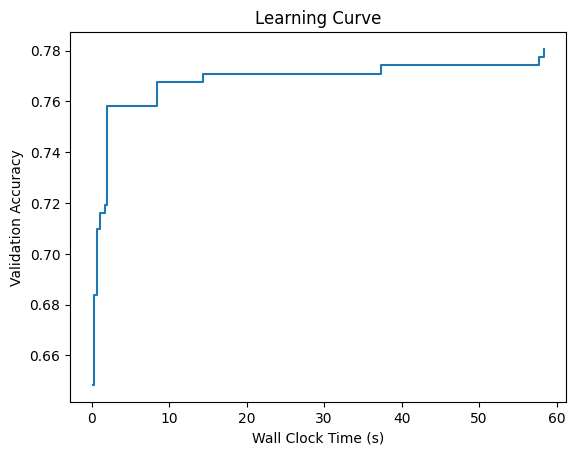

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [2 0 0 2 0 0 0 1 1 0 2 0 0 2 1 0 1 2 0 0 0 2 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0
 0 2 2 1 2 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 2 1 1 1 1 0 0 0 1 2 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 2 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 2 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [2 0 0 2 0 1 0 1 1 0 2 0 0 2 1 0 1 2 0 0 0 2 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 2 2 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0

In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.9759450171821306
log_loss = 0.1764292782486156


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.8026315789473685
log_loss = 0.5462040153551382


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Saquon Barkley"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Saquon Barkley"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
      Rush_Rk      Age         G        GS       Att  Rush_Yds   Rush_TD  \
450 -0.910497 -0.13245  0.692595  1.586597  1.808355  1.732472  1.567553   

      Rush_1D  Rush_Lng       Y/A  ...   Rec_Lng    Y/Tgt      R/G   Rec_Fmb  \
450  1.543895  1.598263  0.162535  ...  1.050095 -0.47083  1.39391 -0.320145   

     Rookie  Vet  Con_Len     Con_Sal    PerCap  Con_Yrs_Lft  
450     1.0  0.0      4.0  31194751.0  0.037458            0  

[1 rows x 30 columns]
####################### ACTUAL LENGTH #######################
             Player  New_Con_Len
450  Saquon Barkley            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


### **Classification For Contract Length RB FINAL (AutoML)**

In [432]:
#Load in Data
feeder = pd.read_csv("../content/RB_data/RBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]

feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Rec_Fmb', 'PerCap', 'Vet', 'Y/Tgt', 'Y/R', 'Rush_Fmb', 'Rush_1D', 'Rush_Yds'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                          'Rec_Fmb', 'PerCap', 'Vet', 'Y/Tgt', 'Y/R', 'Rush_Fmb', 'Rush_1D', 'Rush_Yds'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [433]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 22:20:24] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 22:20:24] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 22:20:24] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 2 augmented from 19 to 38


[flaml.automl.logger: 04-20 22:20:24] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 22:20:24] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 22:20:24] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 22:20:25] {2336} INFO - Estimated sufficient time budget=7740s. Estimated necessary time budget=178s.
[flaml.automl.logger: 04-20 22:20:25] {2383} INFO -  at 0.8s,	estimator lgbm's best error=0.3516,	best estimator lgbm's best error=0.3516
[flaml.automl.logger: 04-20 22:20:25] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 22:20:28] {2383} INFO -  at 3.5s,	estimator lgbm's best error=0.3516,	best estimator lgbm's best error=0.3516
[flaml.automl.logger: 04-20 22:20:28] {2210} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:29] {2383} INFO -  at 4.4s,	estimator xgboost's best error=0.3387,	best estimator xgboost's best error=0.3387
[flaml.automl.logger: 04-20 22:20:29] {2210} INFO - iteration 3, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:30] {2383} INFO -  at 5.9s,	estimator xgboost's best error=0.3323,	best estimator xgboost's best error=0.3323
[flaml.automl.logger: 04-20 22:20:30] {2210} INFO - iteration 4, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:30] {2383} INFO -  at 6.1s,	estimator extra_tree's best error=0.3484,	best estimator xgboost's best error=0.3323
[flaml.automl.logger: 04-20 22:20:30] {2210} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-20 22:20:31] {2383} INFO -  at 7.0s,	estimator lgbm's best error=0.3355,	best estimator xgboost's best error=0.3323
[flaml.automl.logger: 04-20 22:20:31] {2210} INFO - iteration 6, current learner extra_tree
[flaml.automl.logger: 04-20 22:20:31] {2383} INFO -  at 7.1s,	estimator extra_tree's best error=0.3258,	best estimator extra_tree's best error=0.3258
[flaml.automl.logger: 04-20 22:20:31] {2210} INFO - iteration 7, current learner extra_tree
[flaml.automl.logger: 04-20 22:20:32] {2383} INFO -  at 7.3s,	estimator extra_tree's best error=0.3258,	best estimator extra_tree's best error=0.3258
[flaml.automl.logger: 04-20 22:20:32] {2210} INFO - iteration 8, current learner extra_tree
[flaml.automl.logger: 04-20 22:20:32] {2383} INFO 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:34] {2383} INFO -  at 9.2s,	estimator xgboost's best error=0.3290,	best estimator extra_tree's best error=0.3258
[flaml.automl.logger: 04-20 22:20:34] {2210} INFO - iteration 16, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:34] {2383} INFO -  at 9.4s,	estimator extra_tree's best error=0.3161,	best estimator extra_tree's best error=0.3161
[flaml.automl.logger: 04-20 22:20:34] {2210} INFO - iteration 17, current learner rf
[flaml.automl.logger: 04-20 22:20:34] {2383} INFO -  at 9.6s,	estimator rf's best error=0.3548,	best estimator extra_tree's best error=0.3161
[flaml.automl.logger: 04-20 22:20:34] {2210} INFO - iteration 18, current learner rf
[flaml.automl.logger: 04-20 22:20:34] {2383} INFO -  at 9.8s,	estimator rf's best error=0.3419,	best estimator extra_tree's best error=0.3161
[flaml.automl.logger: 04-20 22:20:34] {2210} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:36] {2383} INFO -  at 12.0s,	estimator xgboost's best error=0.3065,	best estimator xgboost's best error=0.3065
[flaml.automl.logger: 04-20 22:20:36] {2210} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-20 22:20:37] {2383} INFO -  at 12.2s,	estimator rf's best error=0.3355,	best estimator xgboost's best error=0.3065
[flaml.automl.logger: 04-20 22:20:37] {2210} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:38] {2383} INFO -  at 13.2s,	estimator xgboost's best error=0.3065,	best estimator xgboost's best error=0.3065
[flaml.automl.logger: 04-20 22:20:38] {2210} INFO - iteration 22, current learner rf
[flaml.automl.logger: 04-20 22:20:38] {2383} INFO -  at 13.5s,	estimator rf's best error=0.3355,	best estimator xgboost's best error=0.3065
[flaml.automl.logger: 04-20 22:20:38] {2210} INFO - iteration 23, current learner rf
[flaml.automl.logger: 04-20 22:20:38] {2383} INFO -  at 13.7s,	estimator rf's best error=0.3226,	best estimator xgboost's best error=0.3065
[flaml.automl.logger: 04-20 22:20:38] {2210} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:39] {2383} INFO -  at 14.4s,	estimator xgboost's best error=0.3000,	best estimator xgboost's best error=0.3000
[flaml.automl.logger: 04-20 22:20:39] {2210} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:39] {2383} INFO -  at 14.8s,	estimator extra_tree's best error=0.3161,	best estimator xgboost's best error=0.3000
[flaml.automl.logger: 04-20 22:20:39] {2210} INFO - iteration 26, current learner rf
[flaml.automl.logger: 04-20 22:20:40] {2383} INFO -  at 15.3s,	estimator rf's best error=0.3065,	best estimator xgboost's best error=0.3000
[flaml.automl.logger: 04-20 22:20:40] {2210} INFO - iteration 27, current learner rf
[flaml.automl.logger: 04-20 22:20:40] {2383} INFO -  at 15.7s,	estimator rf's best error=0.3065,	best estimator xgboost's best error=0.3000
[flaml.automl.logger: 04-20 22:20:40] {2210} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:20:42] {2383} INFO -  at 17.2s,	estimator xgboost's best error=0.3000,	best estimator xgboost's best error=0.3000
[flaml.automl.logger: 04-20 22:20:42] {2210} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 22:20:43] {2383} INFO -  at 18.4s,	estimator xgboost's best error=0.3000,	best estimator xgboost's best error=0.3000
[flaml.automl.logger: 04-20 22:20:43] {2210} INFO - iteration 30, current learner rf
[flaml.automl.logger: 04-20 22:20:43] {2383} INFO -  at 18.8s,	estimator rf's best error=0.3065,	best estimator xgboost's best error=0.3000
[flaml.automl.logger: 04-20 22:20:43] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 22:20:44] {2383} INFO -  at 19.7s,	estimator lgbm's best error=0.2774,	best estimator lgbm's best error=0.2774
[flaml.automl.logger: 04-20 22:20:44] {2210} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-20 22:20:45] {2383} INFO -  at 20.5s,	estimator lgbm's best error=0.2774,	best estimator lgbm's best error=0.2774
[flaml.automl.logger: 04-20 22:20:45] {2210} INFO - iteration 33, current learner rf
[flaml.automl.logger: 04-20 22:20:45] {2383} INFO -  at 20.7s,	estimator rf's best error=0.30

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:21:11] {2383} INFO -  at 46.5s,	estimator xgboost's best error=0.3000,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:11] {2210} INFO - iteration 69, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:11] {2383} INFO -  at 46.8s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:11] {2210} INFO - iteration 70, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:11] {2383} INFO -  at 47.0s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:11] {2210} INFO - iteration 71, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:12] {2383} INFO -  at 47.2s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:12] {2210} INFO - iteration 72, current learner extra_tree
[flaml.automl.logger: 04-20

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:21:13] {2383} INFO -  at 49.0s,	estimator xgboost's best error=0.3000,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:13] {2210} INFO - iteration 77, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:14] {2383} INFO -  at 49.2s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:14] {2210} INFO - iteration 78, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:14] {2383} INFO -  at 49.4s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:14] {2210} INFO - iteration 79, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:14] {2383} INFO -  at 49.7s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:14] {2210} INFO - iteration 80, current learner extra_tree
[flaml.automl.logger: 04-20

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:21:17] {2383} INFO -  at 53.1s,	estimator xgboost's best error=0.3000,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:17] {2210} INFO - iteration 89, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:18] {2383} INFO -  at 53.6s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:18] {2210} INFO - iteration 90, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:18] {2383} INFO -  at 54.0s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:18] {2210} INFO - iteration 91, current learner extra_tree
[flaml.automl.logger: 04-20 22:21:19] {2383} INFO -  at 54.4s,	estimator extra_tree's best error=0.2258,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:19] {2210} INFO - iteration 92, current learner extra_tree
[flaml.automl.logger: 04-20

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 22:21:25] {2383} INFO -  at 60.2s,	estimator xgb_limitdepth's best error=0.3011,	best estimator extra_tree's best error=0.2258
[flaml.automl.logger: 04-20 22:21:25] {2619} INFO - retrain extra_tree for 0.0s
[flaml.automl.logger: 04-20 22:21:25] {2622} INFO - retrained model: ExtraTreesClassifier(criterion='entropy', max_features=0.5268219313080065,
                     max_leaf_nodes=29, n_estimators=7, n_jobs=-1,
                     random_state=12032022)
[flaml.automl.logger: 04-20 22:21:25] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 22:21:25] {1931} INFO - Time taken to find the best model: 44.5743772983551


In [448]:
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "RBclassFinal") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")


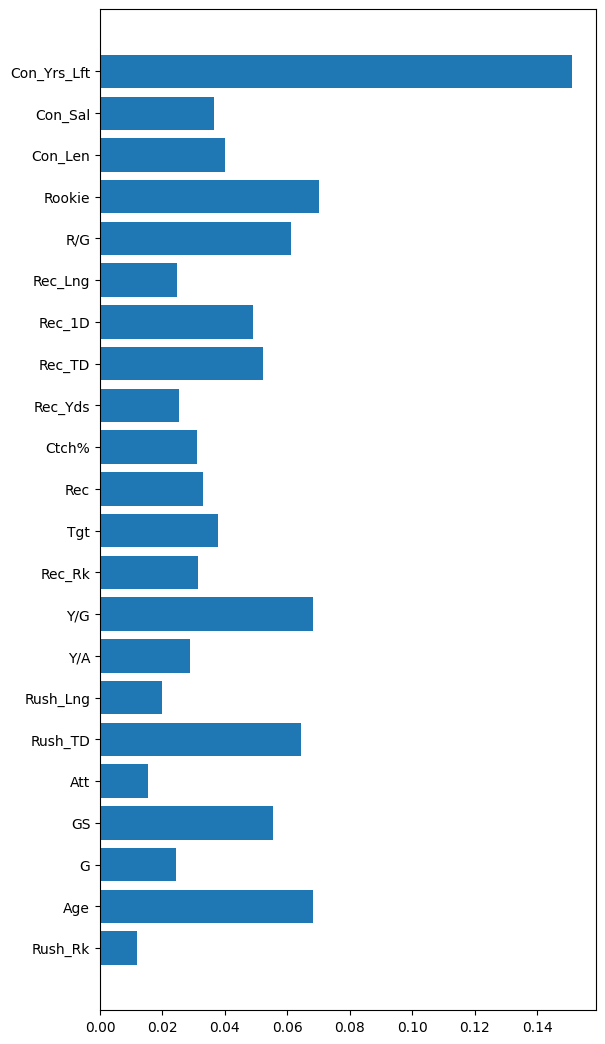

[{'Rush_Rk': 0.011877246723762133, 'Age': 0.0683343281123702, 'G': 0.024214615592660867, 'GS': 0.05535233405669983, 'Att': 0.015238502828714248, 'Rush_TD': 0.06448119932808466, 'Rush_Lng': 0.019984943365299546, 'Y/A': 0.028847894297840185, 'Y/G': 0.06835420493291927, 'Rec_Rk': 0.031278957882364705, 'Tgt': 0.037696088435985625, 'Rec': 0.032942246969719764, 'Ctch%': 0.031031703958800484, 'Rec_Yds': 0.025234320858195637, 'Rec_TD': 0.052150165216442584, 'Rec_1D': 0.04913792020481677, 'Rec_Lng': 0.02458910926294466, 'R/G': 0.06118700196672054, 'Rookie': 0.07000536159385262, 'Con_Len': 0.040120865777868, 'Con_Sal': 0.036617024249634096, 'Con_Yrs_Lft': 0.15132396438430365}]


In [435]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 22))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [436]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [437]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 7, 'max_features': 0.5268219313080065, 'max_leaves': 29, 'criterion': 'entropy'}


In [438]:
# Find best r2
print(1-automl.best_loss)

0.7741935483870968


In [439]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2419354838709677, 'rf': 0.2967741935483871, 'xgboost': 0.30000000000000004, 'extra_tree': 0.22580645161290325, 'xgb_limitdepth': 0.3010752688172043, 'lrl1': inf}


In [440]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00010705994021508003, 'wall_clock_time': 44.5743772983551, 'metric_for_logging': {'pred_time': 0.00010705994021508003, 'train_loss': 0.09677419354838712}, 'val_loss': 0.22580645161290325, 'training_iteration': 1, 'config': {'n_estimators': 7, 'max_features': 0.5268219313080065, 'max_leaves': 29, 'criterion': 'entropy'}, 'config/n_estimators': 7, 'config/max_features': 0.5268219313080065, 'config/max_leaves': 29, 'config/criterion': 'entropy', 'experiment_tag': 'exp', 'time_total_s': 0.2261197566986084}


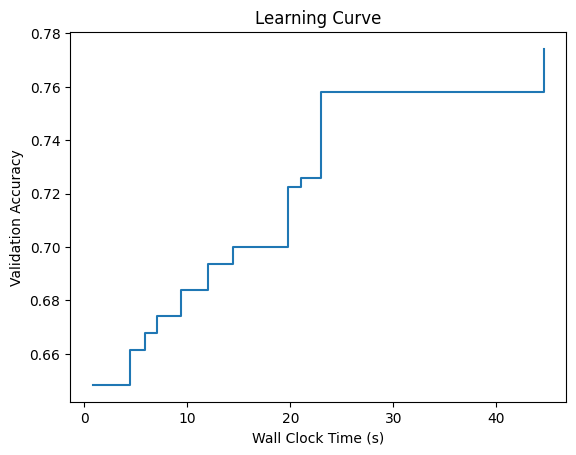

In [441]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [442]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [2 0 0 2 0 0 0 1 0 0 2 0 0 2 1 0 1 2 1 0 0 2 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0
 0 2 2 1 2 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 1 1 1 1 0 0 0 1 2 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 2 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [2 0 0 2 0 1 0 1 1 0 2 0 0 2 1 0 1 2 0 0 0 2 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 2 2 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0

In [443]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.8969072164948454
log_loss = 0.350029803492141


In [444]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0]


In [445]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.8421052631578947
log_loss = 0.46028040833302397


In [446]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [447]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Miles Sanders"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Saquon Barkley"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
      Rush_Rk      Age         G        GS       Att  Rush_Yds   Rush_TD  \
454 -0.844594 -0.13245  0.945659  1.403343  1.404399  1.628527  1.834072   

      Rush_1D  Rush_Lng       Y/A  ...  Rec_Lng     Y/Tgt       R/G   Rec_Fmb  \
454  1.543895  0.184083  0.539142  ... -0.59624 -1.237778 -0.549249  0.320145   

     Rookie  Vet  Con_Len    Con_Sal    PerCap  Con_Yrs_Lft  
454     1.0  0.0      4.0  5350175.0  0.006424            0  

[1 rows x 30 columns]
####################### ACTUAL LENGTH #######################
             Player  New_Con_Len
450  Saquon Barkley            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


## **Percent of Cap $\checkmark$**

### **Regression For Percent Of Cap RB 1.0 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/RB_data/finalRB.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.automl: 04-02 04:21:52] {2726} INFO - task = regression
[flaml.automl.automl: 04-02 04:21:52] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 04-02 04:21:52] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-02 04:21:52] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 04-02 04:21:52] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 04-02 04:21:52] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-02 04:21:53] {3472} INFO - Estimated sufficient time budget=3863s. Estimated necessary time budget=27s.
[flaml.automl.automl: 04-02 04:21:53] {3519} INFO -  at 0.5s,	estimator lgbm's best error=0.7993,	best estimator lgbm's best error=0.7993
[flaml.automl.automl: 04-02 04:21:53] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-02 04:21:53] {3519} INFO -  at 0.7s,	estimator lgbm's best error=0.7993,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

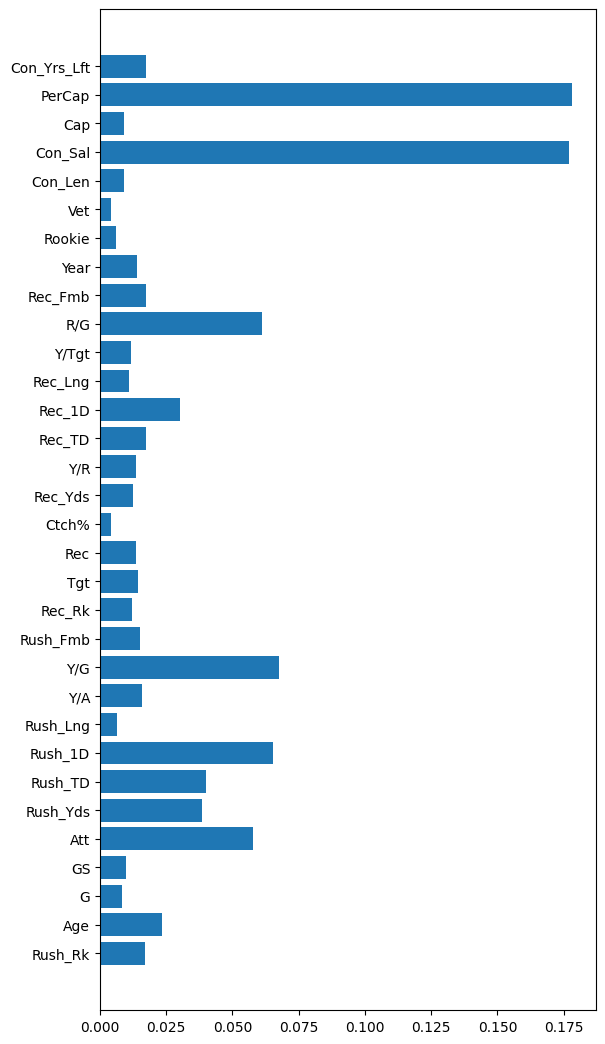

[{'Rush_Rk': 0.017175427685555533, 'Age': 0.02344427394311368, 'G': 0.008345012579009905, 'GS': 0.009944095251656104, 'Att': 0.05786668439889905, 'Rush_Yds': 0.03848585747338679, 'Rush_TD': 0.04012945376680943, 'Rush_1D': 0.06540341520698764, 'Rush_Lng': 0.0063782907687990244, 'Y/A': 0.015980074841115383, 'Y/G': 0.0677082423276832, 'Rush_Fmb': 0.015185877419219384, 'Rec_Rk': 0.012009514288891585, 'Tgt': 0.014529805464517955, 'Rec': 0.013456245872896809, 'Ctch%': 0.004022774528540733, 'Rec_Yds': 0.01240026791558528, 'Y/R': 0.013593205005692674, 'Rec_TD': 0.017221943402367317, 'Rec_1D': 0.03030335754984931, 'Rec_Lng': 0.01100036539469472, 'Y/Tgt': 0.011854253406199972, 'R/G': 0.061084014300864284, 'Rec_Fmb': 0.017469687425278622, 'Year': 0.013882513283496307, 'Rookie': 0.0059287231064911634, 'Vet': 0.003978342317788185, 'Con_Len': 0.009227549942278914, 'Con_Sal': 0.1770426795167544, 'Cap': 0.009116673699389627, 'PerCap': 0.17828712811943173, 'Con_Yrs_Lft': 0.01754424979675531}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 32))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 49, 'max_features': 0.4785410234324708, 'max_leaves': 28}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.5243350265225706


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.6568035017231816, 'rf': 0.5008502742453412, 'xgboost': 0.8674571695860767, 'extra_tree': 0.4756649734774294, 'xgb_limitdepth': 0.9128172420035757}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.000242704010232717, 'wall_clock_time': 38.51380109786987, 'metric_for_logging': {'pred_time': 0.000242704010232717, 'train_loss': 0.0771264612835894}, 'val_loss': 0.4756649734774294, 'training_iteration': 1, 'config': {'n_estimators': 49, 'max_features': 0.4785410234324708, 'max_leaves': 28}, 'config/n_estimators': 49, 'config/max_features': 0.4785410234324708, 'config/max_leaves': 28, 'experiment_tag': 'exp', 'time_total_s': 0.5565617084503174}


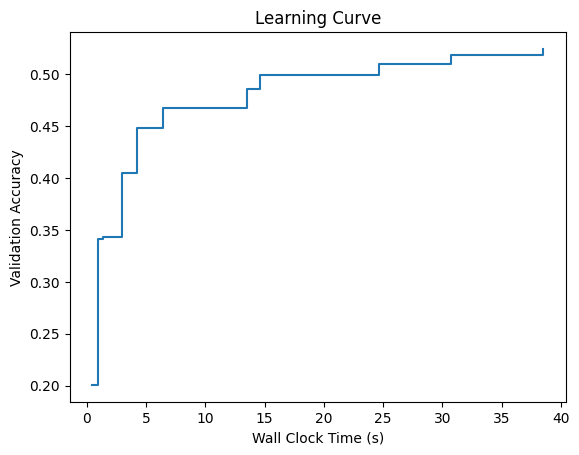

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.07314704 0.04490302 0.01602008 0.076922   0.00955754 0.00954221
 0.03209553 0.01314389 0.01395494 0.03306065 0.01997452 0.03156261
 0.02033561 0.01734339 0.00878625 0.0063983  0.01536141 0.01000572
 0.01014127 0.04339931 0.01033449 0.01653961 0.00714296 0.01278504
 0.00729657 0.0052896  0.00625559 0.00655618 0.00580783 0.00615553
 0.00784983 0.00583493 0.00781431 0.01337939 0.00599174 0.01122851
 0.00455833 0.01914073 0.00524982 0.01356601 0.00554453 0.00472893
 0.01938552 0.00668657 0.0107083  0.0046182  0.00617341 0.01119056
 0.00467502 0.00465932 0.00696093 0.0058516  0.00632372 0.00485429
 0.00933655 0.00474514 0.00896009 0.00453656 0.00439498 0.00502037
 0.00480615 0.00446239 0.00543398 0.01196131 0.00439498 0.00487309
 0.00449116 0.00462197 0.00599157 0.00443411 0.04907914 0.00431478
 0.07666435 0.0391603  0.06706979 0.07422103 0.01027908 0.00930086
 0.01036379 0.00833674 0.02048606 0.00864753 0.01049402 0.01022334
 0.01104067 0.00836092 0.01120367 0.01042002 

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.898584326703972
mse = 3.886176102805468e-05
mae = 0.004797090700703496


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.05100859 0.03369598 0.05355236 0.02831438 0.05351159 0.06076828
 0.05882009 0.04243912 0.01727765 0.04905149 0.0164075  0.01069392
 0.01628927 0.03849723 0.01756207 0.01184729 0.01734048 0.01258614
 0.0124402  0.03645771 0.01000588 0.00563812 0.0328879  0.00869235
 0.02538826 0.00626049 0.01312148 0.00887136 0.02243438 0.00686164
 0.008034   0.00802805 0.0132743  0.00879646 0.00674982 0.00544937
 0.00543698 0.00548849 0.00538686 0.00507282 0.01022618 0.00511699
 0.01194912 0.00928917 0.00465889 0.00471939 0.00640725 0.06832558
 0.00536784 0.00486841 0.00465932 0.00498075 0.01613299 0.00511303
 0.00502944 0.00532172 0.00460236 0.00449116 0.00899465 0.01419886
 0.00695546 0.00629607 0.02113815 0.00449116 0.00463962 0.00439498
 0.00499654 0.00870651 0.00439498 0.00459524 0.00462197 0.00439498
 0.00465574 0.00445548 0.00460356 0.00471022]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.7404910976221686
mse = 0.0001056760702638555
mae = 0.007891642094228856


In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/RB_data/finalRB.csv")
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Player == 'Miles Sanders']
targets = feeder_test['Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0'], axis=1)
#feeder_test.at[327, 'Con_Yrs_Lft'] = 0
y_pred = automl.predict(feeder_test)
print('Predicted Percent of Cap:', y_pred)
print('-------------------------------------------')
print(feeder_test.head())

Predicted Percent of Cap: [0.01706787]
-------------------------------------------
      Rush_Rk      Age         G        GS       Att  Rush_Yds   Rush_TD  \
454 -0.844594 -0.13245  0.945659  1.403343  1.404399  1.628527  1.834072   

      Rush_1D  Rush_Lng       Y/A  ...       R/G   Rec_Fmb  Year  Rookie  Vet  \
454  1.543895  0.184083  0.539142  ... -0.549249  0.320145  2022     1.0  0.0   

     Con_Len    Con_Sal          Cap    PerCap  Con_Yrs_Lft  
454      4.0  5350175.0  208200000.0  0.006424            0  

[1 rows x 32 columns]


### **Regression For Percent Of Cap RB FINAL (AutoML)**



In [498]:
#Load in Data
feeder = pd.read_csv("../content/RB_data/RBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'New_Con'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [499]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:13:15] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 23:13:15] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 23:13:15] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 23:13:15] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 23:13:15] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 23:13:15] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:13:15] {2336} INFO - Estimated sufficient time budget=5074s. Estimated necessary time budget=36s.
[flaml.automl.logger: 04-20 23:13:15] {2383} INFO -  at 0.6s,	estimator lgbm's best error=0.7994,	best estimator lgbm's best error=0.7994
[flaml.automl.logger: 04-20 23:13:15] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:13:16] {2383} INFO -  at 1.1s,	estimator lgbm's best error=0.7994,	best estimato

In [514]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "RBregFinal") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

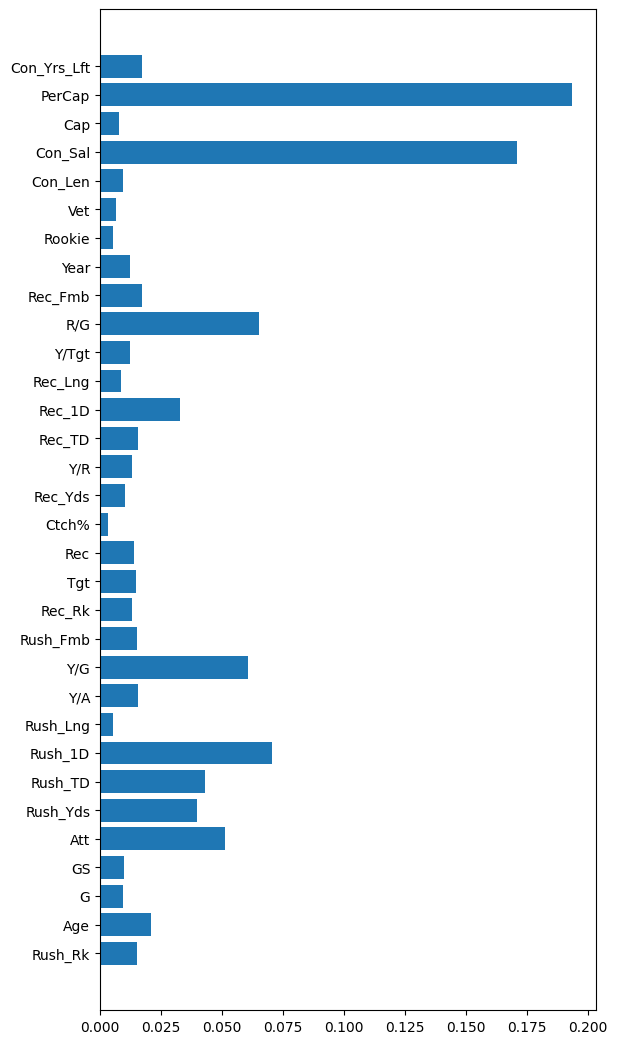

[{'Rush_Rk': 0.015255178785712717, 'Age': 0.021018197768178877, 'G': 0.009466104692396381, 'GS': 0.009872003513842497, 'Att': 0.051180544188731476, 'Rush_Yds': 0.03956371324163375, 'Rush_TD': 0.04306117412850958, 'Rush_1D': 0.07030866448053227, 'Rush_Lng': 0.00523133631818696, 'Y/A': 0.015558569189683378, 'Y/G': 0.060815856095998745, 'Rush_Fmb': 0.015159495867500032, 'Rec_Rk': 0.012947894191416268, 'Tgt': 0.014707425044707215, 'Rec': 0.01403038855711256, 'Ctch%': 0.0032758767497275483, 'Rec_Yds': 0.010166207155839905, 'Y/R': 0.012920377622701134, 'Rec_TD': 0.01569845496222851, 'Rec_1D': 0.032632267972585664, 'Rec_Lng': 0.008644288141142051, 'Y/Tgt': 0.012460853625963312, 'R/G': 0.06529957178369018, 'Rec_Fmb': 0.017369101938694724, 'Year': 0.012443183327495182, 'Rookie': 0.005265600235597444, 'Vet': 0.006665962104128953, 'Con_Len': 0.009433543482244807, 'Con_Sal': 0.17078491495371223, 'Cap': 0.007840808334562506, 'PerCap': 0.19356713382885274, 'Con_Yrs_Lft': 0.01735530771669036}]


In [501]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 32))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [502]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [503]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 45, 'max_features': 0.4705780490914398, 'max_leaves': 26}


In [504]:
# Find best r2
print(1-automl.best_loss)

0.5324639375243069


In [505]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.521747362532148, 'rf': 0.4956423132076432, 'xgboost': 0.5845833154020327, 'extra_tree': 0.4675360624756931, 'xgb_limitdepth': 149.56455938644973}


In [506]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00021013062575767782, 'wall_clock_time': 34.377978563308716, 'metric_for_logging': {'pred_time': 0.00021013062575767782, 'train_loss': 0.08640158569130425}, 'val_loss': 0.4675360624756931, 'training_iteration': 1, 'config': {'n_estimators': 45, 'max_features': 0.4705780490914398, 'max_leaves': 26}, 'config/n_estimators': 45, 'config/max_features': 0.4705780490914398, 'config/max_leaves': 26, 'experiment_tag': 'exp', 'time_total_s': 0.6374094486236572}


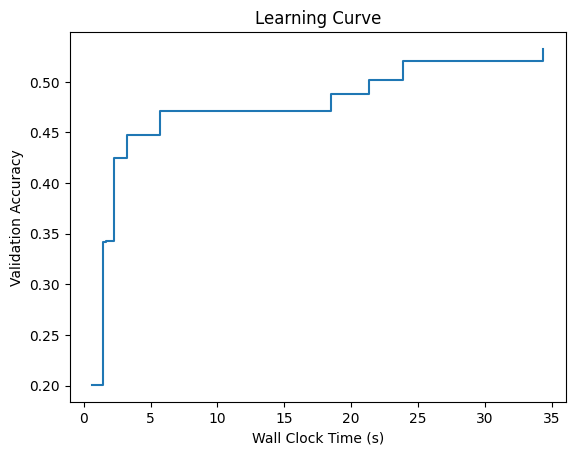

In [507]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [508]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.0729855  0.04353592 0.01573294 0.07636339 0.00969518 0.00989595
 0.03227172 0.01350888 0.01400265 0.03271465 0.02084967 0.02946422
 0.01950616 0.01594856 0.00951937 0.00630868 0.01429502 0.00976677
 0.01007725 0.04267076 0.01156986 0.01595367 0.00748983 0.01246655
 0.00805365 0.00534877 0.00639921 0.00672347 0.00591522 0.00605893
 0.00769959 0.00582277 0.00800475 0.01393267 0.00596117 0.01155945
 0.00461389 0.0185576  0.00528638 0.01329559 0.00556413 0.00480164
 0.01892658 0.00683556 0.01050177 0.00470317 0.00640086 0.01098556
 0.00474738 0.00468505 0.00682228 0.00579501 0.00618774 0.00482984
 0.00913459 0.0047349  0.00868316 0.00456136 0.00449544 0.00489644
 0.00483038 0.00459275 0.005541   0.01143864 0.00449544 0.00498257
 0.00460015 0.00468886 0.00613212 0.00453803 0.05003043 0.00440839
 0.07486931 0.03784079 0.06679126 0.07440698 0.01086675 0.00955138
 0.01131408 0.00815329 0.02132074 0.01017167 0.01045696 0.01154924
 0.01077368 0.0083249  0.01123549 0.01065265 

In [509]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8907668970612659
mse = 4.1862289442871994e-05
mae = 0.004988749463380477


In [510]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.04593398 0.03202931 0.05360788 0.02153077 0.05258596 0.06152359
 0.05469679 0.04660866 0.01727618 0.04794854 0.01532469 0.01071485
 0.01664627 0.03954027 0.01964487 0.0126502  0.01772044 0.01495973
 0.01302869 0.03527608 0.01013463 0.00563351 0.0373717  0.0100443
 0.02552141 0.00621631 0.01145162 0.00875958 0.02034433 0.0074434
 0.00792306 0.00784553 0.01039742 0.01073552 0.00686732 0.00530461
 0.00519481 0.00563539 0.00549903 0.00508189 0.00958822 0.00526298
 0.01248195 0.00912029 0.00468451 0.00475044 0.00597287 0.06928368
 0.00570324 0.00494389 0.00468505 0.00500155 0.01802988 0.0052396
 0.00493016 0.00544887 0.0046911  0.00460015 0.00921288 0.01416457
 0.00725956 0.00657841 0.02178858 0.00460015 0.00474179 0.00449544
 0.00513378 0.00859947 0.00454066 0.00466401 0.00473408 0.00449544
 0.00472994 0.00456136 0.00466898 0.00483855]


In [511]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.7631827407521692
mse = 9.636071482673023e-05
mae = 0.007771592721287908


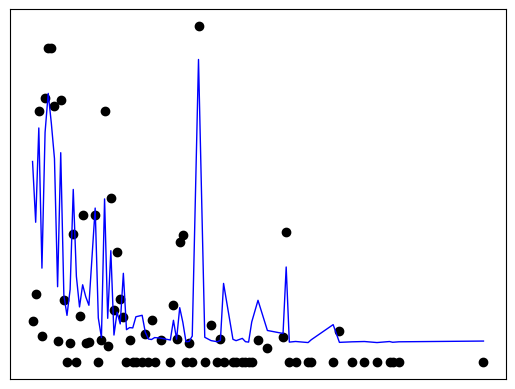

In [512]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [513]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Miles Sanders"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Miles Sanders"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
      Rush_Rk      Age         G        GS       Att  Rush_Yds   Rush_TD  \
454 -0.844594 -0.13245  0.945659  1.403343  1.404399  1.628527  1.834072   

      Rush_1D  Rush_Lng       Y/A  ...       R/G   Rec_Fmb  Year  Rookie  Vet  \
454  1.543895  0.184083  0.539142  ... -0.549249  0.320145  2022     1.0  0.0   

     Con_Len    Con_Sal          Cap    PerCap  Con_Yrs_Lft  
454      4.0  5350175.0  208200000.0  0.006424            0  

[1 rows x 32 columns]
####################### ACTUAL LENGTH #######################
            Player  New_Con_Len
454  Miles Sanders            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0.01922865]


### **Regression For Percent Of Cap RB 1.2 (AutoML)**



In [482]:
#Load in Data
feeder = pd.read_csv("../content/RB_data/RBdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Cap', 'Rookie', 'Con_Len', 'Rec_Lng', 'Ctch%', 'Rush_Lng', 'GS',
                             'Vet', 'Year', 'Rec', 'Tgt', 'Rec_Rk'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Cap', 'Rookie', 'Con_Len', 'Rec_Lng', 'Ctch%', 'Rush_Lng', 'GS',
                             'Vet', 'Year', 'Rec', 'Tgt', 'Rec_Rk'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [483]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:10:35] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 23:10:35] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 23:10:35] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 23:10:35] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 23:10:35] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 23:10:35] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:10:35] {2336} INFO - Estimated sufficient time budget=4991s. Estimated necessary time budget=35s.
[flaml.automl.logger: 04-20 23:10:35] {2383} INFO -  at 0.6s,	estimator lgbm's best error=0.7994,	best estimator lgbm's best error=0.7994
[flaml.automl.logger: 04-20 23:10:35] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:10:36] {2383} INFO -  at 1.5s,	estimator lgbm's best error=0.7994,	best estimato

In [484]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

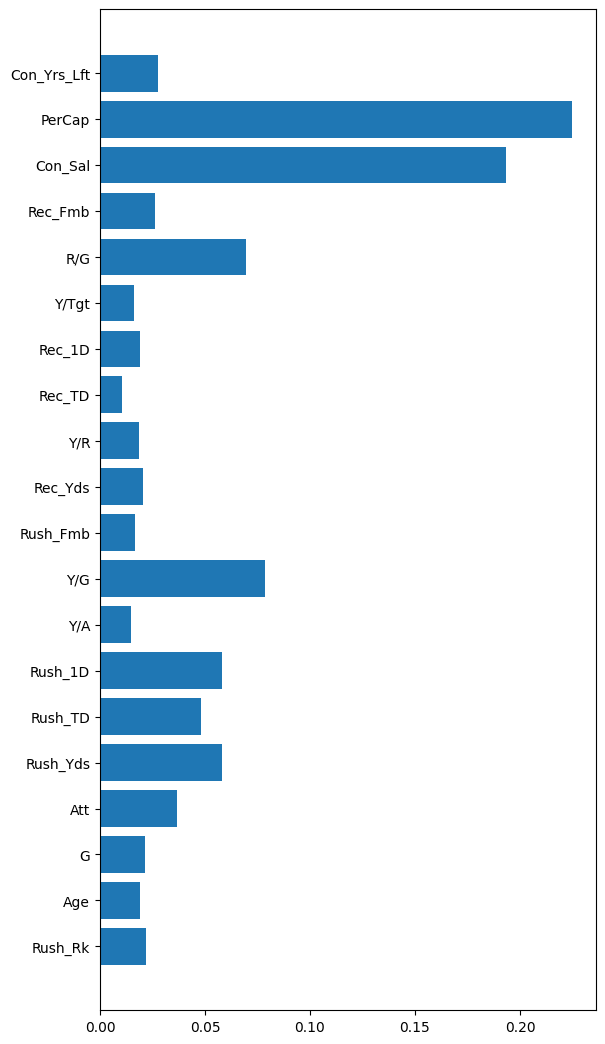

[{'Rush_Rk': 0.02209533753087004, 'Age': 0.018932761856495416, 'G': 0.021523206556242513, 'Att': 0.03645847126045159, 'Rush_Yds': 0.05821429761354919, 'Rush_TD': 0.04832549408558656, 'Rush_1D': 0.058298591267587616, 'Y/A': 0.014640366722204088, 'Y/G': 0.0787260570890922, 'Rush_Fmb': 0.01684739220255679, 'Rec_Yds': 0.020614171934167837, 'Y/R': 0.018420869202147142, 'Rec_TD': 0.010256292351601446, 'Rec_1D': 0.018898715599682623, 'Y/Tgt': 0.01631622212668676, 'R/G': 0.06945494319307445, 'Rec_Fmb': 0.026175290098704087, 'Con_Sal': 0.19334155847406245, 'PerCap': 0.22492533104152362, 'Con_Yrs_Lft': 0.027534629793713603}]


In [485]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 20))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [486]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [487]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 27, 'max_features': 0.5761976805922956, 'max_leaves': 24}


In [488]:
# Find best r2
print(1-automl.best_loss)

0.5366943922779083


In [489]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.516917270746154, 'rf': 0.4705276206804262, 'xgboost': 0.7794408799412473, 'extra_tree': 0.46330560772209173, 'xgb_limitdepth': inf}


In [490]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0004591659521373791, 'wall_clock_time': 35.627005100250244, 'metric_for_logging': {'pred_time': 0.0004591659521373791, 'train_loss': 0.09823487160336877}, 'val_loss': 0.46330560772209173, 'training_iteration': 1, 'config': {'n_estimators': 27, 'max_features': 0.5761976805922956, 'max_leaves': 24}, 'config/n_estimators': 27, 'config/max_features': 0.5761976805922956, 'config/max_leaves': 24, 'experiment_tag': 'exp', 'time_total_s': 0.8732123374938965}


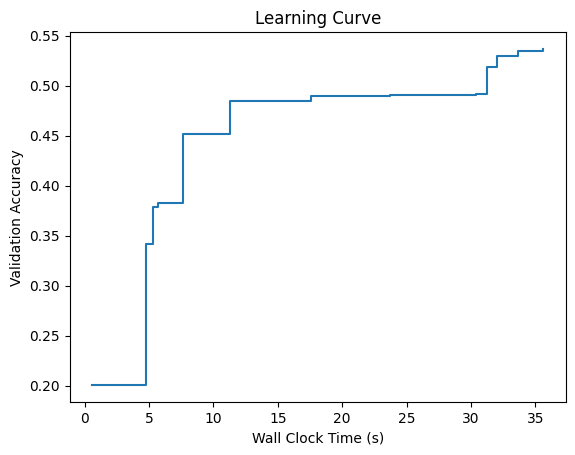

In [491]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [492]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.07185922 0.04407657 0.01589312 0.07398157 0.01058387 0.0113391
 0.03600249 0.01389516 0.01524424 0.03303365 0.02068144 0.02919867
 0.01780473 0.01615272 0.01104028 0.00727213 0.01433902 0.01049768
 0.01005162 0.04575115 0.01373264 0.01606554 0.00831187 0.0119479
 0.00774656 0.00548206 0.00656622 0.00635853 0.00708541 0.00754607
 0.0084327  0.00611246 0.00809749 0.01326222 0.00558715 0.01103105
 0.00477294 0.02028347 0.00477851 0.01379546 0.0054417  0.004763
 0.01865565 0.00751432 0.01159497 0.0046249  0.00551613 0.01061445
 0.00481768 0.0045939  0.00630075 0.00512289 0.00775729 0.00487842
 0.00799197 0.00462093 0.00880511 0.00461536 0.00461536 0.0049891
 0.00475928 0.00478013 0.00528705 0.01355715 0.00461536 0.00462093
 0.00462093 0.0047857  0.00545949 0.00441455 0.05827015 0.00461536
 0.07186145 0.03995209 0.06780734 0.07612757 0.01093926 0.01003636
 0.01056876 0.00698871 0.02150298 0.01036603 0.01000289 0.01396968
 0.01106539 0.00845753 0.01151184 0.01081018 0.009

In [493]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8801021726443878
mse = 4.594941842078094e-05
mae = 0.005140241027142372


In [494]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.0461076  0.01681087 0.05769226 0.02726112 0.05378369 0.06454978
 0.06557037 0.04379521 0.01750934 0.04280866 0.01766551 0.01049889
 0.01197258 0.03465835 0.02361919 0.01124436 0.01573309 0.00968309
 0.01418002 0.03407557 0.00760967 0.00578381 0.02762828 0.01133409
 0.02208483 0.0064806  0.0089911  0.00798594 0.02248531 0.00675649
 0.00655355 0.00785012 0.00776567 0.00828503 0.00699527 0.00553767
 0.00497672 0.00549315 0.00490954 0.00521226 0.00930655 0.00501406
 0.01320454 0.00710425 0.00462093 0.00462093 0.00543287 0.07000567
 0.0067171  0.00464805 0.00462093 0.00462093 0.01635253 0.0045939
 0.0052377  0.0050412  0.00478013 0.00462093 0.00884341 0.01358004
 0.0053045  0.00485019 0.02074027 0.0045939  0.00462093 0.00461536
 0.00545879 0.00530837 0.00461536 0.00493802 0.00462093 0.00461536
 0.00462093 0.00461536 0.00462093 0.00462093]


In [495]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.7510516179800883
mse = 0.0001012968570052241
mae = 0.007466448449082692


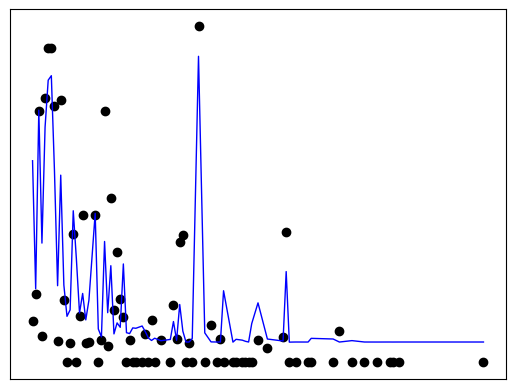

In [496]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [497]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Miles Sanders"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Cap', 'Rookie', 'Con_Len', 'Rec_Lng', 'Ctch%', 'Rush_Lng', 'GS',
                             'Vet', 'Year', 'Rec', 'Tgt', 'Rec_Rk'], axis=1)
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Miles Sanders"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
      Rush_Rk      Age         G       Att  Rush_Yds   Rush_TD   Rush_1D  \
454 -0.844594 -0.13245  0.945659  1.404399  1.628527  1.834072  1.543895   

          Y/A       Y/G  Rush_Fmb   Rec_Yds       Y/R    Rec_TD   Rec_1D  \
454  0.539142  1.267429  0.345884 -0.714954 -1.334104 -0.696401 -0.89347   

        Y/Tgt       R/G   Rec_Fmb    Con_Sal    PerCap  Con_Yrs_Lft  
454 -1.237778 -0.549249  0.320145  5350175.0  0.006424            0  
####################### ACTUAL LENGTH #######################
            Player  New_Con_Len
454  Miles Sanders            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0.01252559]


## **MultiOutput**

### **MultiOutput Regression RB (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/RB_data/finalRB.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2022]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_test = feeder[feeder.Year == 2022]

#Prepare Data for modeling 
players = feeder[['Player']]
feeder_train = feeder_train.drop(['Player', 'Pos'], axis=1)
targets = feeder_train[['New_Con_Len', 'New_Perc_Cap']]
features = feeder_train.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

In [ ]:
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 120,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_MultiOut.log",
    #"max_iter": 2,
}

# train the model
model = MultiOutputRegressor(AutoML(**automl_settings))
model.fit(X_train, y_train)

[flaml.automl.automl: 03-30 21:45:06] {2726} INFO - task = regression
[flaml.automl.automl: 03-30 21:45:06] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-30 21:45:07] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-30 21:45:07] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-30 21:45:07] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-30 21:45:07] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-30 21:45:07] {3472} INFO - Estimated sufficient time budget=1166s. Estimated necessary time budget=8s.
[flaml.automl.automl: 03-30 21:45:07] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.8128,	best estimator lgbm's best error=0.8128
[flaml.automl.automl: 03-30 21:45:07] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-30 21:45:07] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.8128,	best estimator

MultiOutputRegressor(estimator=AutoML(append_log=False, auto_augment=True,
                                      custom_hp={}, cv_score_agg_func=None,
                                      early_stop=False, ensemble=False,
                                      estimator_list='auto', eval_method='cv',
                                      fit_kwargs_by_estimator={},
                                      force_cancel=False, free_mem_ratio=0,
                                      hpo_method='auto', keep_search_state=True,
                                      learner_selector='sample',
                                      log_file_name='QB_MultiOut.log',
                                      log_training_metric=True,
                                      log_type='better', max_iter=None,
                                      mem_thres=4294967296, metric='r2',
                                      metric_constraints=[],
                                      min_sample_size=10000, model_history=True,
                                      n_concurrent_trials=1, n_jobs=-1,
                                      n_splits=5, pred_time_limit=inf,
                                      preserve_checkpoint=True,
                                      retrain_full=True, sample=True, ...))

In [ ]:
'''pickle and save the automl object'''
def saveModel(model, versionNum):
  verNum = str(versionNum)
  with open('MultiOutAutoml_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

#saveModel(model, "1.0")

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    model = pickle.load(f)
    return model
  
#model = loadModel("")

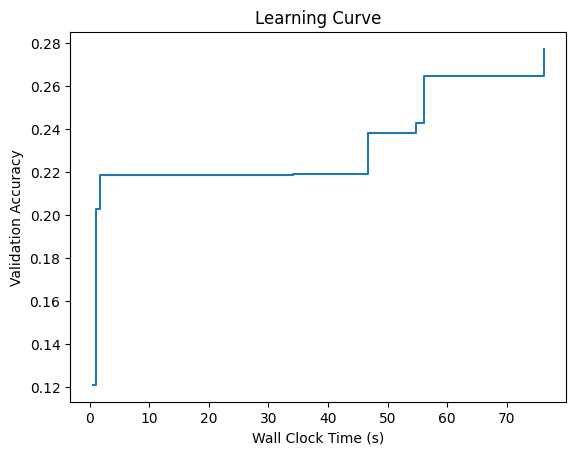

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = model.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [[ 2.67094017e-02  5.39667412e-04]
 [ 7.11172964e-02 -1.08712911e-03]
 [ 2.94248013e-02  1.00436843e-03]
 ...
 [ 2.67094017e-02 -7.52860248e-05]
 [ 2.94248013e-02  4.58901352e-03]
 [ 2.67094017e-02  2.46754915e-03]]


In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.4912578175980298
mse = 0.27201277428665427
mae = 0.20381619730048206


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_train.columns)
train = pd.DataFrame(y_train, columns = y_train.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = 0.3887878260414934
NewConLen: mse = 0.5439702509501594
NewConLen: mae = 0.404138581995909
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.5937278091545662
New_Perc_Cap: mse = 5.5297623149109397e-05
New_Perc_Cap: mae = 0.0034938126050550944


In [ ]:
# Predict on Test set
y_pred = model.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [[ 2.67094017e-02 -7.52860248e-05]
 [-9.68648329e-03  5.39667412e-04]
 [-1.11096829e+00 -7.52860248e-05]
 [ 2.67094017e-02 -7.52860248e-05]
 [-1.47150412e+00 -7.52860248e-05]
 [ 2.67094017e-02  5.39667412e-04]
 [ 2.67094017e-02 -7.52860248e-05]
 [-9.68648329e-03 -7.52860248e-05]
 [-2.04789835e+00  4.53685469e-03]
 [ 2.67094017e-02  5.39667412e-04]
 [ 2.67094017e-02  8.09448664e-05]
 [ 2.67094017e-02  2.46754915e-03]
 [ 2.67094017e-02  5.39667412e-04]
 [-1.11096829e+00 -1.33271211e-02]
 [-4.85159222e-02  1.00436843e-03]
 [-2.34824699e-02  5.39667412e-04]
 [-1.64449656e+00 -5.84636618e-03]
 [-4.85159222e-02 -7.52860248e-05]
 [ 2.67094017e-02 -7.52860248e-05]
 [ 2.67094017e-02 -7.52860248e-05]
 [ 7.11172964e-02  1.63944523e-03]
 [-1.11096829e+00  5.39667412e-04]
 [-1.18640434e+00 -7.52860248e-05]
 [ 2.67094017e-02  5.39667412e-04]
 [-1.18640434e+00 -2.60697292e-03]
 [ 2.67094017e-02 -7.52860248e-05]
 [ 2.67094017e-02  5.39667412e-04]
 [ 2.67094017e-02  5.39667412e-04]
 [ 

In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.44769722288113534
mse = 0.26600646483433554
mae = 0.19028012968302999


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_test.columns)
train = pd.DataFrame(y_test, columns = y_test.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = 0.4453597912150773
NewConLen: mse = 0.5319356388346628
NewConLen: mae = 0.3767048688792512
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.45003465454719327
New_Perc_Cap: mse = 7.72908340083253e-05
New_Perc_Cap: mae = 0.0038553904868087897


In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == ""]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player', 'Pos'], axis=1)
#targets = feeder_test['New_Con_Len', 'New_Perc_Cap']
feeder_test = feeder_test.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = model.predict(feeder_test)
print('Predicted labels', y_pred)

# **WR Models**

## **Contract Length $\checkmark$**

### **Regression For Contract Length WR 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/WR_data/finalWR.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-11 18:05:01] {1768} INFO - task = regression
[flaml.automl.logger: 04-11 18:05:01] {1775} INFO - Data split method: uniform
[flaml.automl.logger: 04-11 18:05:01] {1778} INFO - Evaluation method: cv
[flaml.automl.logger: 04-11 18:05:01] {1891} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-11 18:05:01] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-11 18:05:01] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-11 18:05:02] {2479} INFO - Estimated sufficient time budget=4375s. Estimated necessary time budget=31s.
[flaml.automl.logger: 04-11 18:05:02] {2526} INFO -  at 0.6s,	estimator lgbm's best error=0.9442,	best estimator lgbm's best error=0.9442
[flaml.automl.logger: 04-11 18:05:02] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-11 18:05:02] {2526} INFO -  at 0.8s,	estimator lgbm's best error=0.9442,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

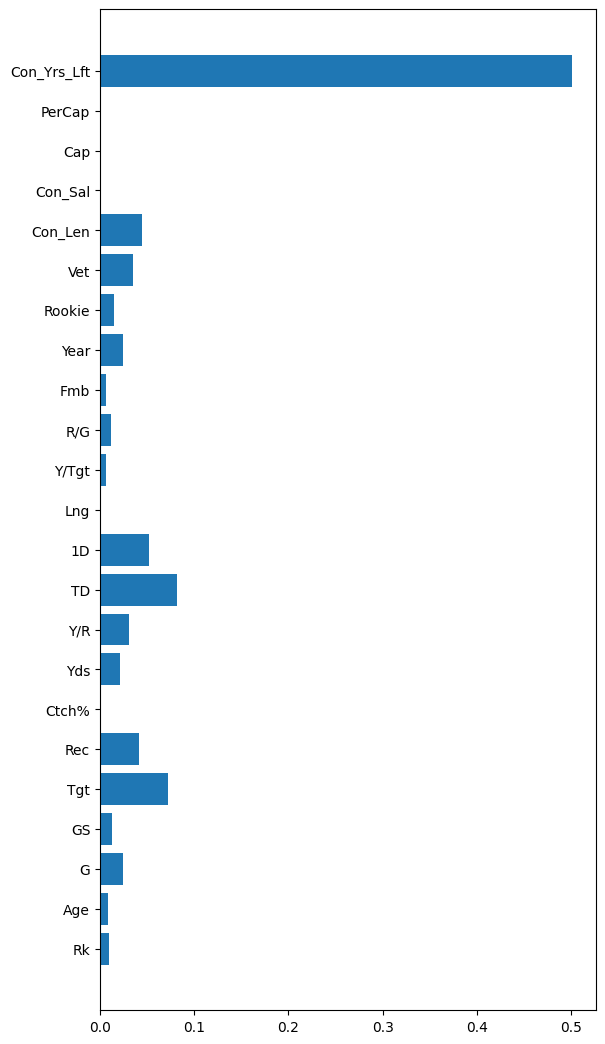

[{'Rk': 0.009988043263303914, 'Age': 0.008067947651058269, 'G': 0.024866331282139637, 'GS': 0.012296852403994842, 'Tgt': 0.0719117400416491, 'Rec': 0.0415091572851137, 'Ctch%': 0.0, 'Yds': 0.020842094316116753, 'Y/R': 0.03073254872346009, 'TD': 0.08136302147250848, '1D': 0.05211701034881999, 'Lng': 0.0, 'Y/Tgt': 0.006557322055245799, 'R/G': 0.012142959736336171, 'Fmb': 0.0064458029726735915, 'Year': 0.024375315954241784, 'Rookie': 0.015258993117763202, 'Vet': 0.03555433733683744, 'Con_Len': 0.044567397720656945, 'Con_Sal': 0.0, 'Cap': 0.0, 'PerCap': 0.0, 'Con_Yrs_Lft': 0.5014031243180803}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 23))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'max_features': 0.5930286098750769, 'max_leaves': 7}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.14745338876244607


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.889499402442075, 'rf': 0.907568015798139, 'xgboost': 0.92848866110942, 'extra_tree': 0.8525466112375539, 'xgb_limitdepth': 1.0595661295599481}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00019187259674072267, 'wall_clock_time': 56.04437851905823, 'metric_for_logging': {'pred_time': 0.00019187259674072267, 'train_loss': 0.6918806144617449}, 'val_loss': 0.8525466112375539, 'training_iteration': 1, 'config': {'n_estimators': 8, 'max_features': 0.5930286098750769, 'max_leaves': 7}, 'config/n_estimators': 8, 'config/max_features': 0.5930286098750769, 'config/max_leaves': 7, 'experiment_tag': 'exp', 'time_total_s': 0.6493544578552246}


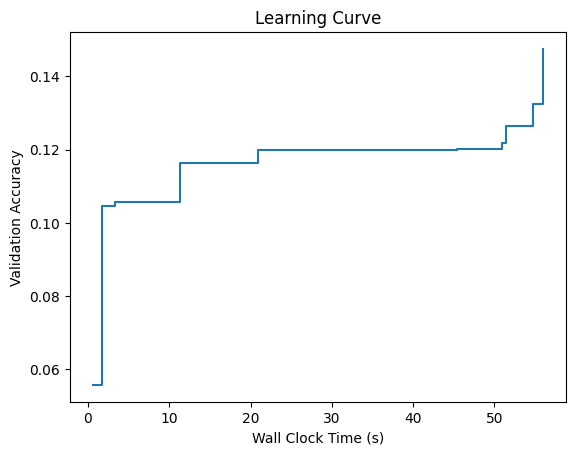

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [4. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 3. 0. 0. 1. 1. 3. 1. 2. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 3. 0. 2.
 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 1. 1. 2. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.20928875685236925
mse = 0.7613333333333333
mae = 0.5


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [2. 2. 2. 0. 1. 0. 0. 1. 1. 1. 2. 1. 1. 0. 2. 2. 1. 0. 0. 0. 2. 1. 1. 3.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.2253391122883055
mse = 1.0257731958762886
mae = 0.654639175257732


In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder = pd.read_csv("../content/WR_data/finalWR.csv")
feeder = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
feeder_test = feeder_test[feeder_test.Player == "A.J. Brown"]
print(feeder_test.head(6))
feeder_test = feeder_test.drop(['Player', 'Pos', 'Tm'], axis=1)
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = automl.predict(feeder_test).round()
print('Predicted labels', y_pred)

### **Classification For Contract Length QB 1.1 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/WR_data/WRdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-11 22:32:11] {1768} INFO - task = multiclass
[flaml.automl.logger: 04-11 22:32:11] {1775} INFO - Data split method: stratified
[flaml.automl.logger: 04-11 22:32:11] {1778} INFO - Evaluation method: cv
[flaml.automl.logger: 04-11 22:32:11] {1891} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-11 22:32:11] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-11 22:32:11] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-11 22:32:13] {2479} INFO - Estimated sufficient time budget=14032s. Estimated necessary time budget=323s.
[flaml.automl.logger: 04-11 22:32:13] {2526} INFO -  at 1.5s,	estimator lgbm's best error=0.3333,	best estimator lgbm's best error=0.3333
[flaml.automl.logger: 04-11 22:32:13] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-11 22:32:13] {2526} INFO -  at 1.8s,	estimator lgbm's best error=0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:19] {2526} INFO -  at 7.5s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2613
[flaml.automl.logger: 04-11 22:32:19] {2341} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 04-11 22:32:20] {2526} INFO -  at 8.5s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:20] {2341} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 04-11 22:32:20] {2526} INFO -  at 8.9s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:20] {2341} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 04-11 22:32:22] {2526} INFO -  at 10.9s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:22] {2341} INFO - iteration 12, current learner lgbm
[flaml.automl.logger: 04-11 22:32:23] {2526} INFO -  at 12.1s,	estimator lgbm's best error=0.2600

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:24] {2526} INFO -  at 13.2s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:25] {2341} INFO - iteration 14, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:25] {2526} INFO -  at 14.0s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:25] {2341} INFO - iteration 15, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:26] {2526} INFO -  at 14.7s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:26] {2341} INFO - iteration 16, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:27] {2526} INFO -  at 15.4s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:27] {2341} INFO - iteration 17, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:27] {2526} INFO -  at 16.0s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:27] {2341} INFO - iteration 18, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:28] {2526} INFO -  at 17.1s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:28] {2341} INFO - iteration 19, current learner extra_tree
[flaml.automl.logger: 04-11 22:32:29] {2526} INFO -  at 17.4s,	estimator extra_tree's best error=0.3187,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:29] {2341} INFO - iteration 20, current learner extra_tree
[flaml.automl.logger: 04-11 22:32:29] {2526} INFO -  at 17.9s,	estimator extra_tree's best error=0.3187,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:29] {2341} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:32] {2526} INFO -  at 20.4s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:32] {2341} INFO - iteration 22, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:32] {2526} INFO -  at 20.7s,	estimator extra_tree's best error=0.3187,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:32] {2341} INFO - iteration 23, current learner extra_tree
[flaml.automl.logger: 04-11 22:32:32] {2526} INFO -  at 20.9s,	estimator extra_tree's best error=0.3187,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:32] {2341} INFO - iteration 24, current learner extra_tree
[flaml.automl.logger: 04-11 22:32:32] {2526} INFO -  at 21.1s,	estimator extra_tree's best error=0.3187,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:32] {2341} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 04-11 22:32:33] {2526} INFO -  at 21.3s,	estimator extra_tree's best error=0.3187,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:33] {2341} INFO - iteration 26, current learner extra_tree
[flaml.automl.logger: 04-11 22:32:33] {2526} INF

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:34] {2526} INFO -  at 22.8s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:34] {2341} INFO - iteration 30, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:35] {2526} INFO -  at 23.2s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:35] {2341} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-11 22:32:35] {2526} INFO -  at 23.6s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:35] {2341} INFO - iteration 32, current learner rf
[flaml.automl.logger: 04-11 22:32:35] {2526} INFO -  at 23.8s,	estimator rf's best error=0.3027,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:35] {2341} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:36] {2526} INFO -  at 24.3s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:36] {2341} INFO - iteration 34, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:36] {2526} INFO -  at 24.6s,	estimator lgbm's best error=0.2600,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:36] {2341} INFO - iteration 35, current learner rf
[flaml.automl.logger: 04-11 22:32:36] {2526} INFO -  at 24.9s,	estimator rf's best error=0.3027,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:36] {2341} INFO - iteration 36, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:37] {2526} INFO -  at 25.3s,	estimator xgboost's best error=0.2627,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:37] {2341} INFO - iteration 37, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:32:37] {2526} INFO -  at 25.5s,	estimator rf's best error=0.2787,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:37] {2341} INFO - iteration 38, current learner rf
[flaml.automl.logger: 04-11 22:32:37] {2526} INFO -  at 25.9s,	estimator rf's best error=0.2787,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:37] {2341} INFO - iteration 39, current learner rf
[flaml.automl.logger: 04-11 22:32:37] {2526} INFO -  at 26.1s,	estimator rf's best error=0.2787,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:37] {2341} INFO - iteration 40, current learner rf
[flaml.automl.logger: 04-11 22:32:38] {2526} INFO -  at 26.6s,	estimator rf's best error=0.2787,	best estimator lgbm's best error=0.2600
[flaml.automl.logger: 04-11 22:32:38] {2341} INFO - iteration 41, current learner rf
[flaml.automl.logger: 04-11 22:32:38] {2526} INFO -  at 26.9s,	estimator rf's best error=0.2787,	best estimator 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-11 22:33:12] {2526} INFO -  at 60.3s,	estimator xgb_limitdepth's best error=0.3433,	best estimator lgbm's best error=0.2547
[flaml.automl.logger: 04-11 22:33:12] {2790} INFO - retrain lgbm for 0.2s
[flaml.automl.logger: 04-11 22:33:12] {2797} INFO - retrained model: LGBMClassifier(colsample_bytree=0.9820233381836614,
               learning_rate=0.06348366939493462, max_bin=1023,
               min_child_samples=11, n_estimators=51, num_leaves=5,
               reg_alpha=0.001975258376030875, reg_lambda=8.340901558964916,
               verbose=-1)
[flaml.automl.logger: 04-11 22:33:12] {2041} INFO - fit succeeded
[flaml.automl.logger: 04-11 22:33:12] {2042} INFO - Time taken to find the best model: 50.48106360435486


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

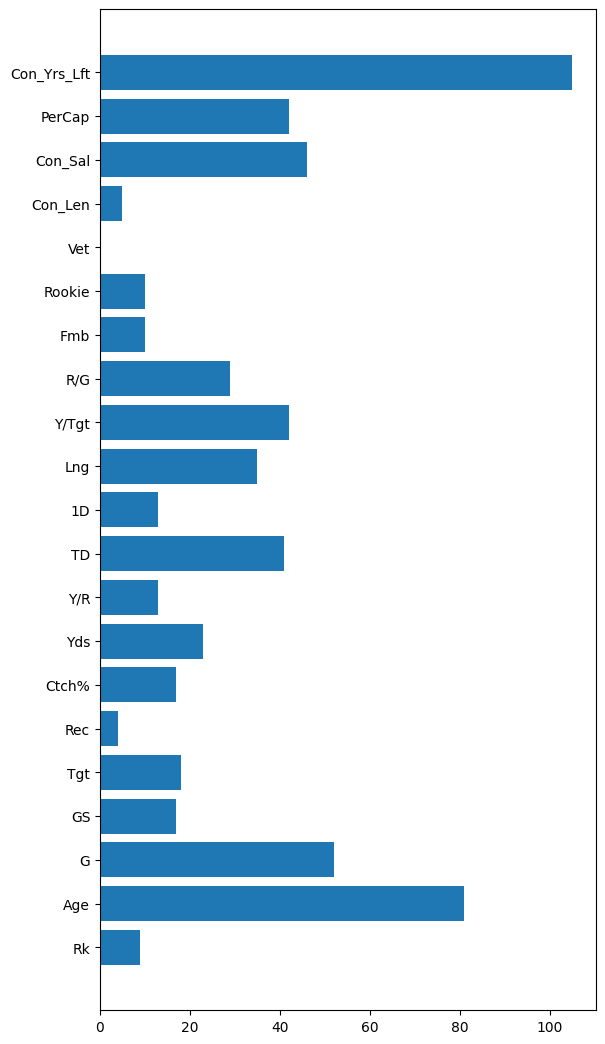

[{'Rk': 9, 'Age': 81, 'G': 52, 'GS': 17, 'Tgt': 18, 'Rec': 4, 'Ctch%': 17, 'Yds': 23, 'Y/R': 13, 'TD': 41, '1D': 13, 'Lng': 35, 'Y/Tgt': 42, 'R/G': 29, 'Fmb': 10, 'Rookie': 10, 'Vet': 0, 'Con_Len': 5, 'Con_Sal': 46, 'PerCap': 42, 'Con_Yrs_Lft': 105}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 21))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 51, 'num_leaves': 5, 'min_child_samples': 11, 'learning_rate': 0.06348366939493462, 'log_max_bin': 10, 'colsample_bytree': 0.9820233381836614, 'reg_alpha': 0.001975258376030875, 'reg_lambda': 8.340901558964916}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7453333333333334


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.25466666666666665, 'rf': 0.27199999999999996, 'xgboost': 0.26266666666666666, 'extra_tree': 0.296, 'xgb_limitdepth': 0.3433333333333333, 'lrl1': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 3.0550638834635416e-05, 'wall_clock_time': 50.48106360435486, 'metric_for_logging': {'pred_time': 3.0550638834635416e-05, 'train_loss': 0.19666666666666666}, 'val_loss': 0.25466666666666665, 'training_iteration': 1, 'config': {'n_estimators': 51, 'num_leaves': 5, 'min_child_samples': 11, 'learning_rate': 0.06348366939493462, 'log_max_bin': 10, 'colsample_bytree': 0.9820233381836614, 'reg_alpha': 0.001975258376030875, 'reg_lambda': 8.340901558964916}, 'config/n_estimators': 51, 'config/num_leaves': 5, 'config/min_child_samples': 11, 'config/learning_rate': 0.06348366939493462, 'config/log_max_bin': 10, 'config/colsample_bytree': 0.9820233381836614, 'config/reg_alpha': 0.001975258376030875, 'config/reg_lambda': 8.340901558964916, 'experiment_tag': 'exp', 'time_total_s': 1.0196106433868408}


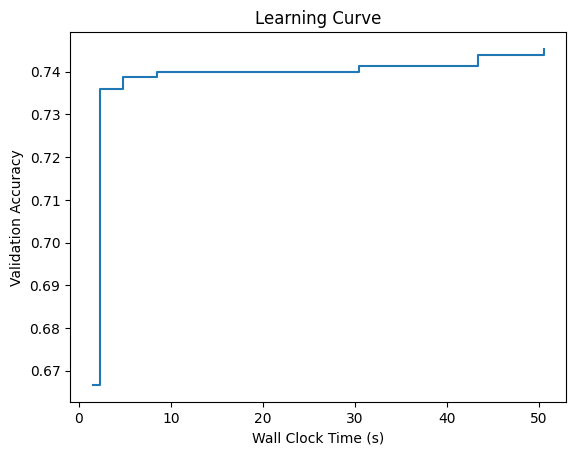

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 2 0 0 1 0 1 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 2 0 1 0 0 1 0 0 2 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0

In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.7973333333333333
log_loss = 0.5015185570550315


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 1 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 1 0]
-------------------------------------------------------------------------------
True labels      [2 2 2 0 1 0 0 2 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 2 2 0 2 0 0
 0 0 0 1 0 0 1 1 0 0 1 2 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 0 1 0 2 0 2 0
 0 0 0 0 0 0 1 1 0 1 0 1 2 1 0 1 2 2 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6597938144329897
log_loss = 0.7035905439719395


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == ""]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == ""]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
301  0.107632 -0.296997 -0.541779 -0.285902 -0.664901 -0.620845 -0.765395   

          Yds       TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
301 -0.571909  0.04409  2.466474  ...  0.263758  0.759333  0.956469 -0.494516   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
301       0    1        1  5500000  0.030137            0  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
             Player  New_Con_Len
365  Jameis Winston            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


### **Classification For Contract Length QB 1.2 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/WR_data/WRdf1.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2011]
#feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 17:34:04] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 17:34:04] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 17:34:04] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 17:34:04] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 17:34:04] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 17:34:04] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 17:34:06] {2336} INFO - Estimated sufficient time budget=21771s. Estimated necessary time budget=502s.
[flaml.automl.logger: 04-20 17:34:06] {2383} INFO -  at 2.4s,	estimator lgbm's best error=0.2627,	best estimator lgbm's best error=0.2627
[flaml.automl.logger: 04-20 17:34:06] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 17:34:06] {2383} INFO -  at 2.9s,	estimator lgbm's best error=0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:15] {2383} INFO -  at 11.2s,	estimator xgboost's best error=0.2562,	best estimator lgbm's best error=0.2512
[flaml.automl.logger: 04-20 17:34:15] {2210} INFO - iteration 13, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:15] {2383} INFO -  at 11.8s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:15] {2210} INFO - iteration 14, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 17:34:16] {2383} INFO -  at 12.5s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:16] {2210} INFO - iteration 15, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:19] {2383} INFO -  at 15.3s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:19] {2210} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 04-20 17:34:19] {2383} INFO -  at 16.0s,	estimator lgbm's best error=0.2512,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:19] {2210} INFO - iteration 17, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:20] {2383} INFO -  at 16.7s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:20] {2210} INFO - iteration 18, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:21] {2383} INFO -  at 17.6s,	estimator extra_tree's best error=0.2627,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:21] {2210} INFO - iteration 19, current learner extra_tree
[flaml.automl.logger: 04-20 17:34:22] {2383} INFO -  at 18.2s,	estimator extra_tree's best error=0.2619,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:22] {2210} INFO - iteration 20, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:23] {2383} INFO -  at 19.3s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:23] {2210} INFO - iteration 21, current learner rf
[flaml.automl.logger: 04-20 17:34:23] {2383} INFO -  at 20.1s,	estimator rf's best error=0.2652,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:23] {2210} INFO - iteration 22, current learner rf
[flaml.automl.logger: 04-20 17:34:24] {2383} INFO -  at 20.6s,	estimator rf's best error=0.2644,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:24] {2210} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 04-20 17:34:24] {2383} INFO -  at 21.1s,	estimator lgbm's best error=0.2512,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:24] {2210} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:26] {2383} INFO -  at 22.3s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:26] {2210} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 04-20 17:34:26] {2383} INFO -  at 22.8s,	estimator extra_tree's best error=0.2619,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:26] {2210} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 04-20 17:34:27] {2383} INFO -  at 23.8s,	estimator lgbm's best error=0.2512,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:27] {2210} INFO - iteration 27, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:28] {2383} INFO -  at 24.7s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:28] {2210} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 17:34:29] {2383} INFO -  at 25.4s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:29] {2210} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:32] {2383} INFO -  at 28.2s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:32] {2210} INFO - iteration 30, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:32] {2383} INFO -  at 28.8s,	estimator lgbm's best error=0.2512,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:32] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 17:34:33] {2383} INFO -  at 29.2s,	estimator lgbm's best error=0.2512,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:33] {2210} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-20 17:34:33] {2383} INFO -  at 29.9s,	estimator lgbm's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:33] {2210} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:34] {2383} INFO -  at 30.4s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:34] {2210} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 04-20 17:34:35] {2383} INFO -  at 31.1s,	estimator lgbm's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:35] {2210} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 04-20 17:34:35] {2383} INFO -  at 31.7s,	estimator lgbm's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:35] {2210} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 04-20 17:34:36] {2383} INFO -  at 32.2s,	estimator extra_tree's best error=0.2619,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:36] {2210} INFO - iteration 37, current learner rf
[flaml.automl.logger: 04-20 17:34:36] {2383} INFO -  at 32.7s,	estimato

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:37] {2383} INFO -  at 33.5s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:37] {2210} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 04-20 17:34:38] {2383} INFO -  at 34.8s,	estimator lgbm's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:38] {2210} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:39] {2383} INFO -  at 36.0s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:39] {2210} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:40] {2383} INFO -  at 36.8s,	estimator xgboost's best error=0.2447,	best estimator xgboost's best error=0.2447
[flaml.automl.logger: 04-20 17:34:40] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 17:34:41] {2383} INFO -  at 37.4s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:41] {2210} INFO - iteration 43, current learner rf
[flaml.automl.logger: 04-20 17:34:41] {2383} INFO -  at 38.0s,	estimator rf's best error=0.2627,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:41] {2210} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-20 17:34:42] {2383} INFO -  at 38.5s,	estimator extra_tree's best error=0.2594,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:42] {2210} INFO - iteration 45, current learner rf
[flaml.automl.logger: 04-20 17:34:42] {2383} INFO -  at 39.0s,	estimator rf's best e

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:45] {2383} INFO -  at 41.8s,	estimator xgboost's best error=0.2447,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:45] {2210} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 04-20 17:34:46] {2383} INFO -  at 42.3s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:46] {2210} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 04-20 17:34:47] {2383} INFO -  at 43.2s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:47] {2210} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 04-20 17:34:47] {2383} INFO -  at 43.8s,	estimator extra_tree's best error=0.2594,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:47] {2210} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 04-20 17:34:48] {2383} INFO -  at 44.7s,	estimator lgbm's b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:52] {2383} INFO -  at 48.3s,	estimator xgboost's best error=0.2447,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:52] {2210} INFO - iteration 56, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:52] {2383} INFO -  at 49.0s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:52] {2210} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 04-20 17:34:55] {2383} INFO -  at 51.7s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:55] {2210} INFO - iteration 58, current learner rf
[flaml.automl.logger: 04-20 17:34:56] {2383} INFO -  at 52.6s,	estimator rf's best error=0.2627,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:56] {2210} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 04-20 17:34:58] {2383} INFO -  at 54.9s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:58] {2210} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:34:59] {2383} INFO -  at 55.8s,	estimator xgboost's best error=0.2447,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:34:59] {2210} INFO - iteration 61, current learner lgbm
[flaml.automl.logger: 04-20 17:35:00] {2383} INFO -  at 56.9s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:35:00] {2210} INFO - iteration 62, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:35:01] {2383} INFO -  at 58.0s,	estimator xgboost's best error=0.2447,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:35:01] {2210} INFO - iteration 63, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 17:35:03] {2383} INFO -  at 59.3s,	estimator xgboost's best error=0.2447,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:35:03] {2210} INFO - iteration 64, current learner lgbm
[flaml.automl.logger: 04-20 17:35:03] {2383} INFO -  at 60.0s,	estimator lgbm's best error=0.2439,	best estimator lgbm's best error=0.2439
[flaml.automl.logger: 04-20 17:35:03] {2619} INFO - retrain lgbm for 0.1s
[flaml.automl.logger: 04-20 17:35:04] {2622} INFO - retrained model: LGBMClassifier(learning_rate=0.3040995851560345, max_bin=511,
               min_child_samples=2, n_estimators=6, num_leaves=7,
               reg_alpha=0.004577823970660193, reg_lambda=0.37005654423989576,
               verbose=-1)
[flaml.automl.logger: 04-20 17:35:04] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 17:35:04] {1931} INFO - Time taken to find the best model: 37.37315630912781


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

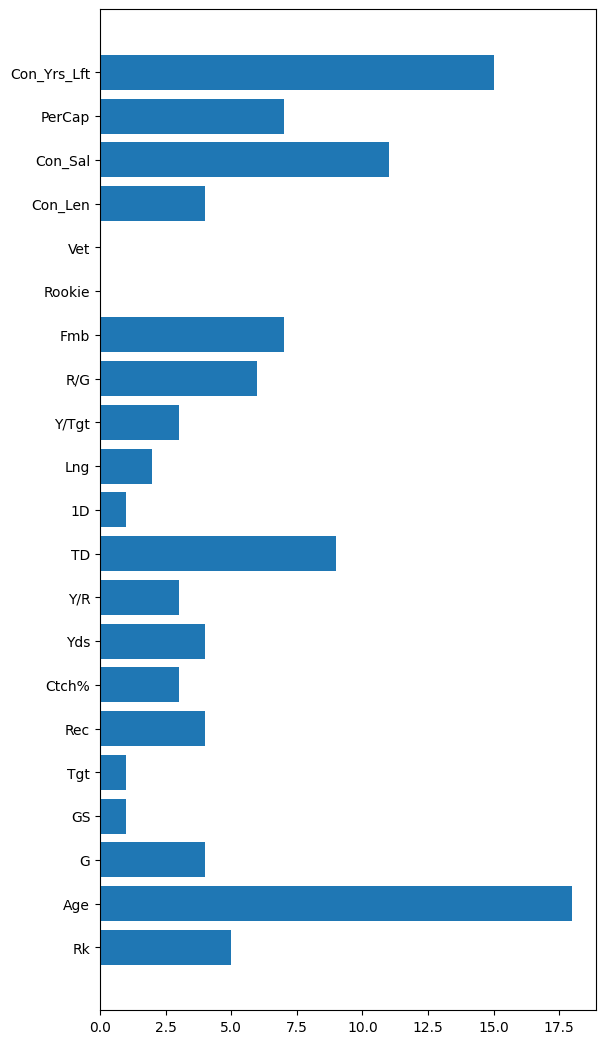

[{'Rk': 5, 'Age': 18, 'G': 4, 'GS': 1, 'Tgt': 1, 'Rec': 4, 'Ctch%': 3, 'Yds': 4, 'Y/R': 3, 'TD': 9, '1D': 1, 'Lng': 2, 'Y/Tgt': 3, 'R/G': 6, 'Fmb': 7, 'Rookie': 0, 'Vet': 0, 'Con_Len': 4, 'Con_Sal': 11, 'PerCap': 7, 'Con_Yrs_Lft': 15}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 21))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 6, 'num_leaves': 7, 'min_child_samples': 2, 'learning_rate': 0.3040995851560345, 'log_max_bin': 9, 'colsample_bytree': 1.0, 'reg_alpha': 0.004577823970660193, 'reg_lambda': 0.37005654423989576}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7561323618700668


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.24386763812993323, 'rf': 0.262726843419011, 'xgboost': 0.24466707144302774, 'extra_tree': 0.25943803548539435, 'xgb_limitdepth': inf, 'lrl1': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 3.9368766944739596e-05, 'wall_clock_time': 37.37315630912781, 'metric_for_logging': {'pred_time': 3.9368766944739596e-05, 'train_loss': 0.1867816563997262}, 'val_loss': 0.24386763812993323, 'training_iteration': 1, 'config': {'n_estimators': 6, 'num_leaves': 7, 'min_child_samples': 2, 'learning_rate': 0.3040995851560345, 'log_max_bin': 9, 'colsample_bytree': 1.0, 'reg_alpha': 0.004577823970660193, 'reg_lambda': 0.37005654423989576}, 'config/n_estimators': 6, 'config/num_leaves': 7, 'config/min_child_samples': 2, 'config/learning_rate': 0.3040995851560345, 'config/log_max_bin': 9, 'config/colsample_bytree': 1.0, 'config/reg_alpha': 0.004577823970660193, 'config/reg_lambda': 0.37005654423989576, 'experiment_tag': 'exp', 'time_total_s': 0.5492725372314453}


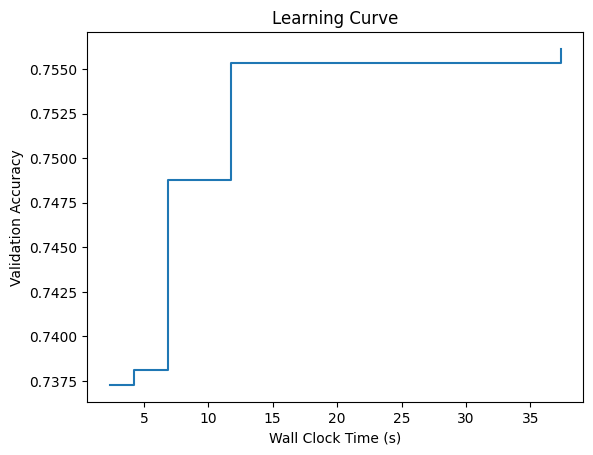

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.7996715927750411
log_loss = 0.4896375913349887


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0]
-------------------------------------------------------------------------------
True labels      [2 2 2 0 1 0 0 2 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 2 2 0 2 0 0
 0 0 0 1 0 0 1 0 0 0 1 2 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 1 0 1 2 1 0 1 2 2 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.7
log_loss = 0.6446711862473831


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == ""]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == ""]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Cmp       Att      Cmp%  \
301  0.107632 -0.296997 -0.541779 -0.285902 -0.664901 -0.620845 -0.765395   

          Yds       TD       TD%  ...     Lng_R     Y/A_R     Y/G_R     Fmb_R  \
301 -0.571909  0.04409  2.466474  ...  0.263758  0.759333  0.956469 -0.494516   

     Rookie  Vet  Con_Len  Con_Sal    PerCap  Con_Yrs_Lft  
301       0    1        1  5500000  0.030137            0  

[1 rows x 43 columns]
####################### ACTUAL LENGTH #######################
             Player  New_Con_Len
365  Jameis Winston            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


### **Classification For Contract Length WR FINAL (AutoML)**

In [517]:
#Load in Data
feeder = pd.read_csv("../content/WR_data/WRdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.New_Con_Len < 3]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.New_Con_Len < 3]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train[['PerCap', 'Rookie', 'Age', 'Rk']]
X_test = feeder_test[['PerCap', 'Rookie', 'Age', 'Rk']]

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [518]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 80,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:20:20] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 23:20:20] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 23:20:20] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 23:20:20] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 23:20:20] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 23:20:20] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:20:20] {2336} INFO - Estimated sufficient time budget=2864s. Estimated necessary time budget=66s.
[flaml.automl.logger: 04-20 23:20:20] {2383} INFO -  at 0.3s,	estimator lgbm's best error=0.3333,	best estimator lgbm's best error=0.3333
[flaml.automl.logger: 04-20 23:20:20] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:20:22] {2383} INFO -  at 1.7s,	estimator lgbm's best error=0.33

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:23] {2383} INFO -  at 2.7s,	estimator xgboost's best error=0.3320,	best estimator xgboost's best error=0.3320
[flaml.automl.logger: 04-20 23:20:23] {2210} INFO - iteration 3, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:23] {2383} INFO -  at 3.0s,	estimator extra_tree's best error=0.3293,	best estimator extra_tree's best error=0.3293
[flaml.automl.logger: 04-20 23:20:23] {2210} INFO - iteration 4, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:23] {2383} INFO -  at 3.2s,	estimator extra_tree's best error=0.3267,	best estimator extra_tree's best error=0.3267
[flaml.automl.logger: 04-20 23:20:23] {2210} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-20 23:20:24] {2383} INFO -  at 3.5s,	estimator lgbm's best error=0.3280,	best estimator extra_tree's best error=0.3267
[flaml.automl.logger: 04-20 23:20:24] {2210} INFO - iteration 6, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:24] {2383} INFO -  at 3.7s,	estimator extra_tree's best error=0.3267,	best estimator extra_tree's best error=0.3267
[flaml.automl.logger: 04-20 23:20:24] {2210} INFO - iteration 7, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:24] {2383} INFO -  at 4.1s,	estimator xgboost's best error=0.3320,	best estimator extra_tree's best error=0.3267
[flaml.automl.logger: 04-20 23:20:24] {2210} INFO - iteration 8, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 23:20:25] {2383} INFO -  at 4.9s,	estimator xgboost's best error=0.3320,	best estimator extra_tree's best error=0.3267
[flaml.automl.logger: 04-20 23:20:25] {2210} INFO - iteration 9, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:25] {2383} INFO -  at 5.4s,	estimator xgboost's best error=0.3267,	best estimator extra_tree's best error=0.3267
[flaml.automl.logger: 04-20 23:20:25] {2210} INFO - iteration 10, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:26] {2383} INFO -  at 5.6s,	estimator extra_tree's best error=0.3267,	best estimator extra_tree's best error=0.3267
[flaml.automl.logger: 04-20 23:20:26] {2210} INFO - iteration 11, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:26] {2383} INFO -  at 5.8s,	estimator extra_tree's best error=0.3253,	best estimator extra_tree's best error=0.3253
[flaml.automl.logger: 04-20 23:20:26] {2210} INFO - iteration 12, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:26] {2383} INFO -  at 6.0s,	estimator extra_tree's best error=0.3253,	best estimator extra_tree's best error=0.3253
[flaml.automl.logger: 04-20 23:20:26] {2210} INFO - iteration 13, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:26] {2383} INFO -  at 6.2s,	estimator extra_tree's best error=0.3240,	best estimator extra_tree's best error=0.3240
[flaml.automl.logger: 04-20 23:20:26] {2210} INFO - iteration 14, current learner extra_tree
[flaml.automl.logger: 04-20 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:27] {2383} INFO -  at 7.2s,	estimator xgboost's best error=0.3267,	best estimator extra_tree's best error=0.3240
[flaml.automl.logger: 04-20 23:20:27] {2210} INFO - iteration 16, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:27] {2383} INFO -  at 7.4s,	estimator extra_tree's best error=0.3240,	best estimator extra_tree's best error=0.3240
[flaml.automl.logger: 04-20 23:20:27] {2210} INFO - iteration 17, current learner lgbm
[flaml.automl.logger: 04-20 23:20:28] {2383} INFO -  at 8.0s,	estimator lgbm's best error=0.3280,	best estimator extra_tree's best error=0.3240
[flaml.automl.logger: 04-20 23:20:28] {2210} INFO - iteration 18, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:28] {2383} INFO -  at 8.2s,	estimator extra_tree's best error=0.3240,	best estimator extra_tree's best error=0.3240
[flaml.automl.logger: 04-20 23:20:28] {2210} INFO - iteration 19, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:28] {2383} INFO -  at 8.4s,	estimator extra_tree's best error=0.3240,	best estimator extra_tree's best error=0.3240
[flaml.automl.logger: 04-20 23:20:28] {2210} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-20 23:20:29] {2383} INF

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:32] {2383} INFO -  at 12.1s,	estimator xgboost's best error=0.3267,	best estimator extra_tree's best error=0.3227
[flaml.automl.logger: 04-20 23:20:32] {2210} INFO - iteration 36, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:32] {2383} INFO -  at 12.3s,	estimator extra_tree's best error=0.3227,	best estimator extra_tree's best error=0.3227
[flaml.automl.logger: 04-20 23:20:32] {2210} INFO - iteration 37, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:33] {2383} INFO -  at 12.5s,	estimator extra_tree's best error=0.3227,	best estimator extra_tree's best error=0.3227
[flaml.automl.logger: 04-20 23:20:33] {2210} INFO - iteration 38, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:33] {2383} INFO -  at 12.7s,	estimator extra_tree's best error=0.3173,	best estimator extra_tree's best error=0.3173
[flaml.automl.logger: 04-20 23:20:33] {2210} INFO - iteration 39, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:34] {2383} INFO -  at 13.8s,	estimator xgboost's best error=0.3267,	best estimator extra_tree's best error=0.3173
[flaml.automl.logger: 04-20 23:20:34] {2210} INFO - iteration 40, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:34] {2383} INFO -  at 14.1s,	estimator extra_tree's best error=0.3173,	best estimator extra_tree's best error=0.3173
[flaml.automl.logger: 04-20 23:20:34] {2210} INFO - iteration 41, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:35] {2383} INFO -  at 14.6s,	estimator extra_tree's best error=0.3173,	best estimator extra_tree's best error=0.3173
[flaml.automl.logger: 04-20 23:20:35] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 23:20:35] {2383} INFO -  at 15.3s,	estimator lgbm's best error=0.3280,	best estimator extra_tree's best error=0.3173
[flaml.automl.logger: 04-20 23:20:35] {2210} INFO - iteration 43, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:36] {

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:41] {2383} INFO -  at 21.1s,	estimator xgboost's best error=0.3213,	best estimator extra_tree's best error=0.3133
[flaml.automl.logger: 04-20 23:20:41] {2210} INFO - iteration 58, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:41] {2383} INFO -  at 21.2s,	estimator extra_tree's best error=0.3133,	best estimator extra_tree's best error=0.3133
[flaml.automl.logger: 04-20 23:20:41] {2210} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 04-20 23:20:42] {2383} INFO -  at 21.9s,	estimator lgbm's best error=0.3280,	best estimator extra_tree's best error=0.3133
[flaml.automl.logger: 04-20 23:20:42] {2210} INFO - iteration 60, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:42] {2383} INFO -  at 22.1s,	estimator extra_tree's best error=0.3133,	best estimator extra_tree's best error=0.3133
[flaml.automl.logger: 04-20 23:20:42] {2210} INFO - iteration 61, current learner rf
[flaml.automl.logger: 04-20 23:20:42] {2383} INFO -  at 22.3s,	estimator rf's best error=0.3280,	best estimator extra_tree's best error=0.3133
[flaml.automl.logger: 04-20 23:20:42] {2210} INFO - iteration 62, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:43] {2383} INFO - 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:50] {2383} INFO -  at 30.4s,	estimator xgboost's best error=0.3213,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:50] {2210} INFO - iteration 82, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:51] {2383} INFO -  at 30.8s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:51] {2210} INFO - iteration 83, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:51] {2383} INFO -  at 31.1s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:51] {2210} INFO - iteration 84, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:51] {2383} INFO -  at 31.4s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:51] {2210} INFO - iteration 85, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:52] {2383} INFO -  at 31.8s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:52] {2210} INFO - iteration 86, current learner extra_tree
[flaml.automl.logger: 04

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:53] {2383} INFO -  at 32.9s,	estimator xgboost's best error=0.3213,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:53] {2210} INFO - iteration 88, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:54] {2383} INFO -  at 33.5s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:54] {2210} INFO - iteration 89, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:54] {2383} INFO -  at 33.9s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:54] {2210} INFO - iteration 90, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:55] {2383} INFO -  at 34.6s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:55] {2210} INFO - iteration 91, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:55] {2383} INFO -  at 34.8s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:55] {2210} INFO - iteration 92, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:55] {2383} INFO -  at 35.0s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:55] {2210} INFO - iteration 93, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:55] {2383} INFO -  at 35.4s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:55] {2210} INFO - iteration 94, current learner rf
[flaml.automl.logger: 04-20 23:20:5

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:58] {2383} INFO -  at 37.8s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:58] {2210} INFO - iteration 97, current learner extra_tree
[flaml.automl.logger: 04-20 23:20:58] {2383} INFO -  at 38.2s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:58] {2210} INFO - iteration 98, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:20:59] {2383} INFO -  at 39.2s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:20:59] {2210} INFO - iteration 99, current learner rf
[flaml.automl.logger: 04-20 23:21:00] {2383} INFO -  at 39.9s,	estimator rf's best error=0.3240,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:00] {2210} INFO - iteration 100, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:00] {2383} INFO -  at 40.3s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:00] {2210} INFO - iteration 101, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:01] {2383} INFO -  at 41.0s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:01] {2210} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 04-20 23:21:02] {2383} I

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:03] {2383} INFO -  at 43.3s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:03] {2210} INFO - iteration 105, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:04] {2383} INFO -  at 43.7s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:04] {2210} INFO - iteration 106, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:04] {2383} INFO -  at 43.9s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:04] {2210} INFO - iteration 107, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:04] {2383} INFO -  at 44.4s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:04] {2210} INFO - iteration 108, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:05] {2383} INFO -  at 44.8s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:05] {2210} INFO - iteration 109, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:05] {2383} INFO -  at 45.1s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:05] {2210} INFO - iteration 110, current learner lgbm
[flaml.automl.logger: 04-20 23:21:06] {2383} INFO -  at 45.6s,	estimator lgbm's best error=0.3253,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:06] {2210} INFO - iteration 111, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:06] {2383} INFO -  at 46.0s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:06] {2210} INFO - iteration 112, current learner extra_tree
[flaml.automl.logger: 04-20 23:2

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:14] {2383} INFO -  at 53.6s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:14] {2210} INFO - iteration 130, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:14] {2383} INFO -  at 54.1s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:14] {2210} INFO - iteration 131, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:15] {2383} INFO -  at 54.6s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:15] {2210} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 04-20 23:21:15] {2383} INFO -  at 55.1s,	estimator lgbm's best error=0.3213,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:15] {2210} INFO - iteration 133, current learner rf
[flaml.automl.logger: 04-20 23:21:16] {2383} INFO -  at 55.5s,	estimator rf's best error=0.3227,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:16] {2210} INFO - iteration 134, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:16] {2383} INF

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:29] {2383} INFO -  at 69.4s,	estimator xgb_limitdepth's best error=0.3320,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:29] {2210} INFO - iteration 157, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:31] {2383} INFO -  at 71.1s,	estimator xgb_limitdepth's best error=0.3267,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:31] {2210} INFO - iteration 158, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:32] {2383} INFO -  at 72.0s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:32] {2210} INFO - iteration 159, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:33] {2383} INFO -  at 72.6s,	estimator xgboost's best error=0.3187,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:33] {2210} INFO - iteration 160, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 23:21:34] {2383} INFO -  at 74.3s,	estimator xgb_limitdepth's best error=0.3267,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:34] {2210} INFO - iteration 161, current learner rf
[flaml.automl.logger: 04-20 23:21:35] {2383} INFO -  at 75.3s,	estimator rf's best error=0.3227,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:35] {2210} INFO - iteration 162, current learner extra_tree
[flaml.automl.logger: 04-20 23:21:36] {2383} INFO -  at 76.0s,	estimator extra_tree's best error=0.3093,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:36] {2210} INFO - iteration 163, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:38] {2383} INFO -  at 77.9s,	estimator xgb_limitdepth's best error=0.3267,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:38] {2210} INFO - iteration 164, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:21:40] {2383} INFO -  at 80.0s,	estimator xgb_limitdepth's best error=0.3267,	best estimator extra_tree's best error=0.3093
[flaml.automl.logger: 04-20 23:21:40] {2619} INFO - retrain extra_tree for 0.2s
[flaml.automl.logger: 04-20 23:21:40] {2622} INFO - retrained model: ExtraTreesClassifier(max_features=1.0, max_leaf_nodes=17, n_estimators=13,
                     n_jobs=-1, random_state=12032022)
[flaml.automl.logger: 04-20 23:21:40] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 23:21:40] {1931} INFO - Time taken to find the best model: 22.82127022743225


In [533]:
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "WRclassFinal") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

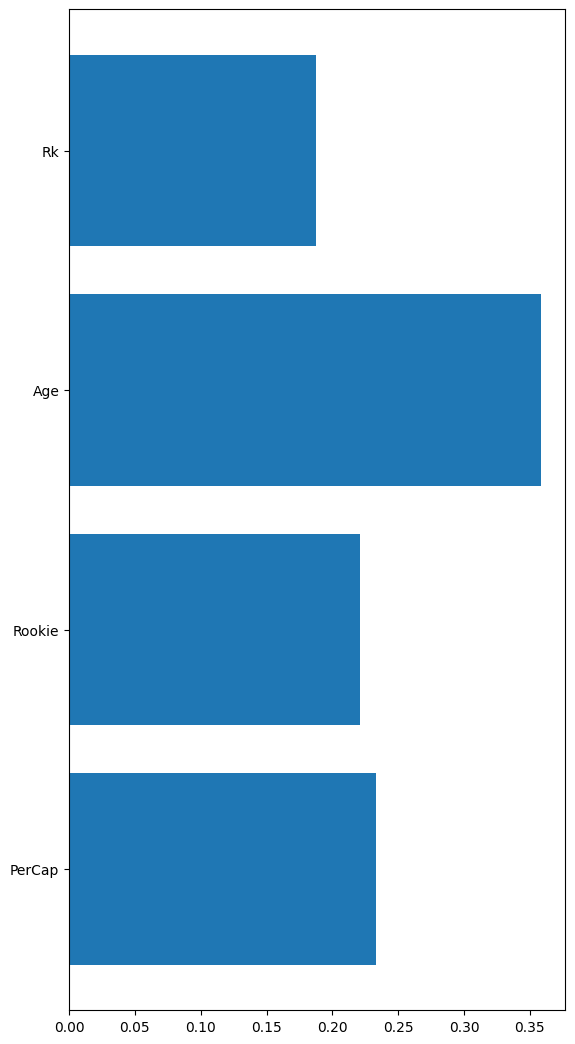

[{'PerCap': 0.23281498120201724, 'Rookie': 0.22096595458975554, 'Age': 0.3588441075069211, 'Rk': 0.18737495670130624}]


In [520]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 4))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [521]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [522]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 13, 'max_features': 1.0, 'max_leaves': 17, 'criterion': 'gini'}


In [523]:
# Find best r2
print(1-automl.best_loss)

0.6906666666666668


In [524]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.3213333333333333, 'rf': 0.32266666666666666, 'xgboost': 0.3186666666666667, 'extra_tree': 0.3093333333333333, 'xgb_limitdepth': 0.32666666666666666, 'lrl1': inf}


In [525]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 4.967180887858073e-05, 'wall_clock_time': 22.82127022743225, 'metric_for_logging': {'pred_time': 4.967180887858073e-05, 'train_loss': 0.28166666666666673}, 'val_loss': 0.3093333333333333, 'training_iteration': 1, 'config': {'n_estimators': 13, 'max_features': 1.0, 'max_leaves': 17, 'criterion': 'gini'}, 'config/n_estimators': 13, 'config/max_features': 1.0, 'config/max_leaves': 17, 'config/criterion': 'gini', 'experiment_tag': 'exp', 'time_total_s': 0.2861595153808594}


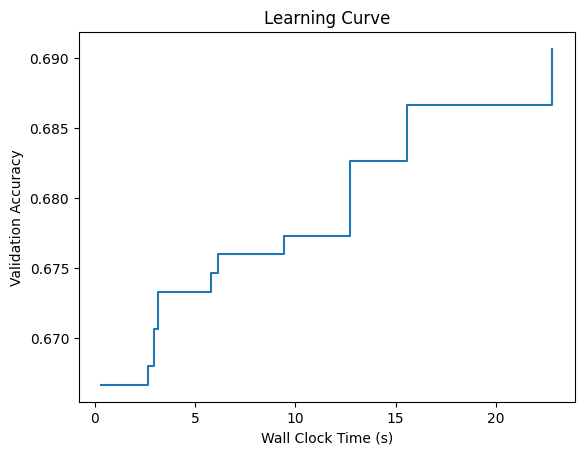

In [526]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [527]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_train)

Predicted labels [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0

In [528]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.7186666666666667
log_loss = 0.6288619975458261


In [529]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
-------------------------------------------------------------------------------
True labels      [2 2 2 0 1 0 0 2 1 2 2 0 1 0 0 1 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 2 2 0 2 0 0
 0 0 0 1 0 0 1 1 0 0 1 2 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 0 1 0 2 0 2 0
 0 0 0 0 0 0 1 1 0 1 0 1 2 1 0 1 2 2 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0]


In [530]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6907216494845361
log_loss = 0.7322154582696131


In [531]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [532]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Deonte Harty"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test[['PerCap', 'Rookie', 'Age', 'Rk']]
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Deonte Harty"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
        PerCap  Rookie      Age        Rk
1291  0.019145     0.0 -0.28709  1.223351
####################### ACTUAL LENGTH #######################
            Player  New_Con_Len
1291  Deonte Harty            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0]


## **Percent of Cap $\checkmark$**

### **Regression For Percent Of Cap WR 1.0 (AutoML)**



In [ ]:
#Load in Data
feeder = pd.read_csv("../content/WR_data/WRdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 18:11:08] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 18:11:08] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 18:11:08] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 18:11:08] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 18:11:08] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 18:11:08] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 18:11:09] {2336} INFO - Estimated sufficient time budget=3495s. Estimated necessary time budget=25s.
[flaml.automl.logger: 04-20 18:11:09] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.6805,	best estimator lgbm's best error=0.6805
[flaml.automl.logger: 04-20 18:11:09] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 18:11:09] {2383} INFO -  at 0.7s,	estimator lgbm's best error=0.6805,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

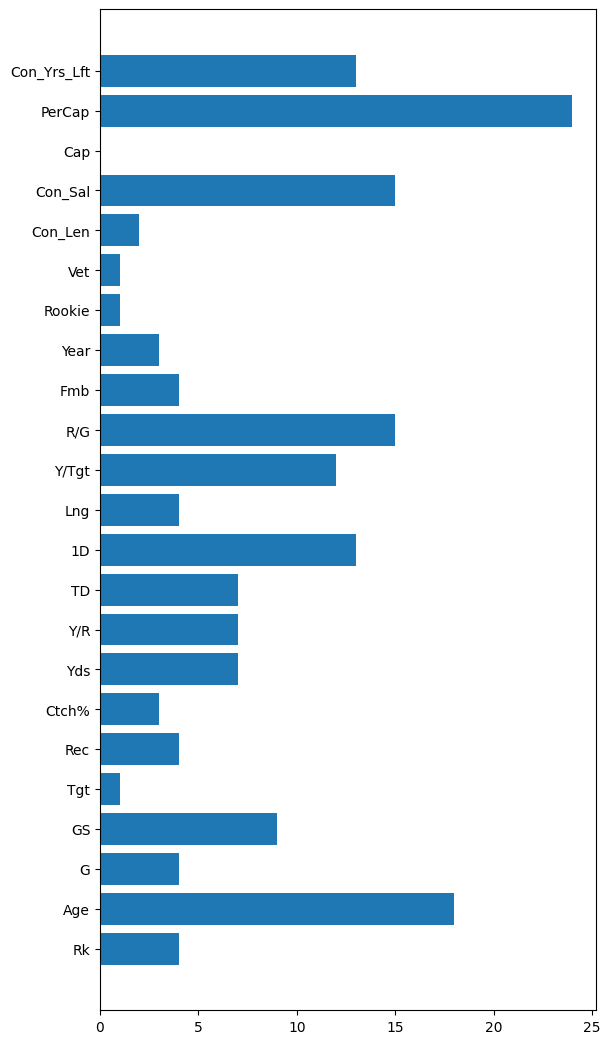

[{'Rk': 4, 'Age': 18, 'G': 4, 'GS': 9, 'Tgt': 1, 'Rec': 4, 'Ctch%': 3, 'Yds': 7, 'Y/R': 7, 'TD': 7, '1D': 13, 'Lng': 4, 'Y/Tgt': 12, 'R/G': 15, 'Fmb': 4, 'Year': 3, 'Rookie': 1, 'Vet': 1, 'Con_Len': 2, 'Con_Sal': 15, 'Cap': 0, 'PerCap': 24, 'Con_Yrs_Lft': 13}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 23))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 19, 'num_leaves': 10, 'min_child_samples': 13, 'learning_rate': 0.22926234904753484, 'log_max_bin': 10, 'colsample_bytree': 0.8345075630938922, 'reg_alpha': 0.004919965439995105, 'reg_lambda': 8.625111324002386}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.6737006637597455


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.32629933624025453, 'rf': 0.37297215869739464, 'xgboost': 0.41362224278669874, 'extra_tree': 0.3786725957557294, 'xgb_limitdepth': 0.5410611172924613}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 3.282419840494792e-05, 'wall_clock_time': 5.510806560516357, 'metric_for_logging': {'pred_time': 3.282419840494792e-05, 'train_loss': 0.13398818599032142}, 'val_loss': 0.32629933624025453, 'training_iteration': 1, 'config': {'n_estimators': 19, 'num_leaves': 10, 'min_child_samples': 13, 'learning_rate': 0.22926234904753484, 'log_max_bin': 10, 'colsample_bytree': 0.8345075630938922, 'reg_alpha': 0.004919965439995105, 'reg_lambda': 8.625111324002386}, 'config/n_estimators': 19, 'config/num_leaves': 10, 'config/min_child_samples': 13, 'config/learning_rate': 0.22926234904753484, 'config/log_max_bin': 10, 'config/colsample_bytree': 0.8345075630938922, 'config/reg_alpha': 0.004919965439995105, 'config/reg_lambda': 8.625111324002386, 'experiment_tag': 'exp', 'time_total_s': 0.6259686946868896}


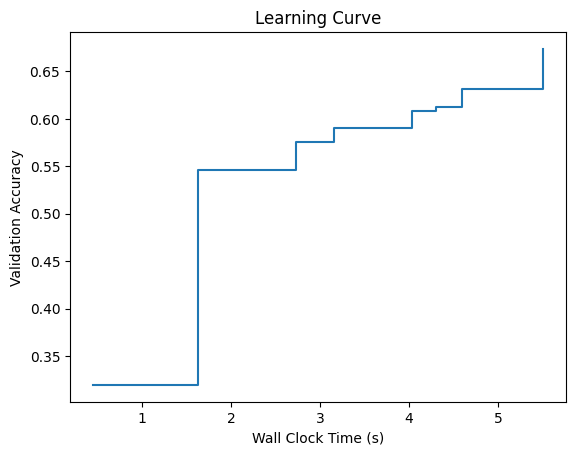

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [ 6.93422604e-02  7.19592925e-02  2.61523865e-02  6.90855146e-02
  8.40457839e-02  8.47900399e-02  5.02404972e-02  4.11866845e-02
  8.70937097e-02  7.09265957e-02  6.52688231e-02  7.70042252e-02
  1.61886467e-02  8.63281098e-02  6.42200100e-02  4.95910527e-02
  3.95179797e-02  4.49221388e-02  1.39861022e-02  6.21963296e-02
  3.51347845e-02  5.01529100e-02  1.27174579e-02  2.07623684e-02
  1.14454882e-02  2.22952127e-02  1.48867567e-02  4.97751573e-02
  1.10179788e-02  1.69821288e-02  4.71946341e-02  1.00302126e-02
  4.29893582e-02  6.76695324e-02  6.59286328e-02  2.01990025e-02
  2.83131932e-02  4.02661950e-02  3.54735199e-02  1.16848113e-02
  3.33685739e-02  2.38673846e-02  4.46277863e-02  1.99077854e-02
  1.21824510e-02  2.93938290e-02  1.68617615e-02  5.20950271e-02
  2.80744103e-02  3.37944056e-02  1.96274758e-02  1.62231339e-02
  4.88515332e-02  1.93671929e-02  5.17663361e-03  2.46423309e-02
  8.37220296e-03  2.55516242e-02  4.48952749e-02  1.20092360e-02
  3.8565

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8601825750462712
mse = 9.819929879467636e-05
mae = 0.006041470981274311


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.10111741 0.09722223 0.09491905 0.03419414 0.05180998 0.09299272
 0.05048865 0.0849641  0.04012591 0.07965675 0.04628226 0.04284999
 0.09290721 0.01039142 0.05058482 0.04487379 0.03966905 0.04436161
 0.01480781 0.01550049 0.03816042 0.02692248 0.04234501 0.05966502
 0.03299676 0.08458628 0.01163772 0.02514554 0.07849871 0.08291944
 0.04000716 0.07230043 0.03588385 0.02964354 0.03511055 0.01043812
 0.00979904 0.06403272 0.01654621 0.0274317  0.02980467 0.007843
 0.04287871 0.06299738 0.03415973 0.02720053 0.00605604 0.0111579
 0.01226409 0.01822291 0.01420728 0.00759102 0.07254176 0.01061864
 0.00914249 0.0717501  0.02129216 0.01886386 0.0035591  0.01887081
 0.02673694 0.00319016 0.01820992 0.01936566 0.01936879 0.05241649
 0.03981673 0.06232496 0.0215548  0.00501089 0.04060698 0.00560093
 0.01456888 0.05406918 0.00560093 0.00879081 0.00501089 0.00483039
 0.00536487 0.01176735 0.00783767 0.00495638 0.01616275 0.00888263
 0.0035591  0.00823231 0.02640282 0.01505599 0.0

In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.6968809775637932
mse = 0.00034426750390893854
mae = 0.010081921898529914


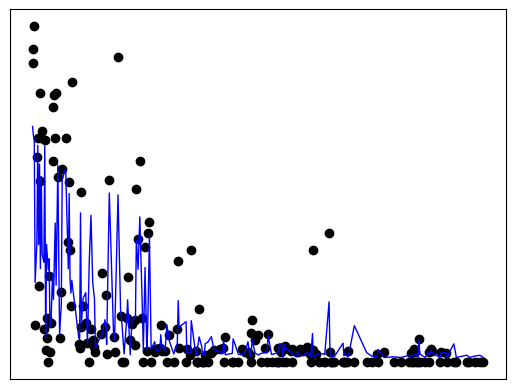

In [ ]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
feeder_test = feeder_test[feeder_test.Player == ""]
print(feeder_test.head())
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['New_Con_Len', 'New_Perc_Cap', 'Pos'], axis=1)
y_pred = automl.predict(feeder_test)
print('Predicted labels', y_pred)

KeyError: ignored

### **Regression For Percent Of Cap WR FINAL (AutoML)**



In [534]:
#Load in Data
feeder = pd.read_csv("../content/WR_data/WRdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Cap', 'Con_Len', 'Vet', 'Tgt'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                           'Cap', 'Con_Len', 'Vet', 'Tgt'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [535]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:25:29] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 23:25:29] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 23:25:29] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 23:25:29] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 23:25:29] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 23:25:29] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:25:30] {2336} INFO - Estimated sufficient time budget=3414s. Estimated necessary time budget=24s.
[flaml.automl.logger: 04-20 23:25:30] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.6805,	best estimator lgbm's best error=0.6805
[flaml.automl.logger: 04-20 23:25:30] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:25:30] {2383} INFO -  at 0.6s,	estimator lgbm's best error=0.6805,	best estimato

In [550]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "WRregFinal") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

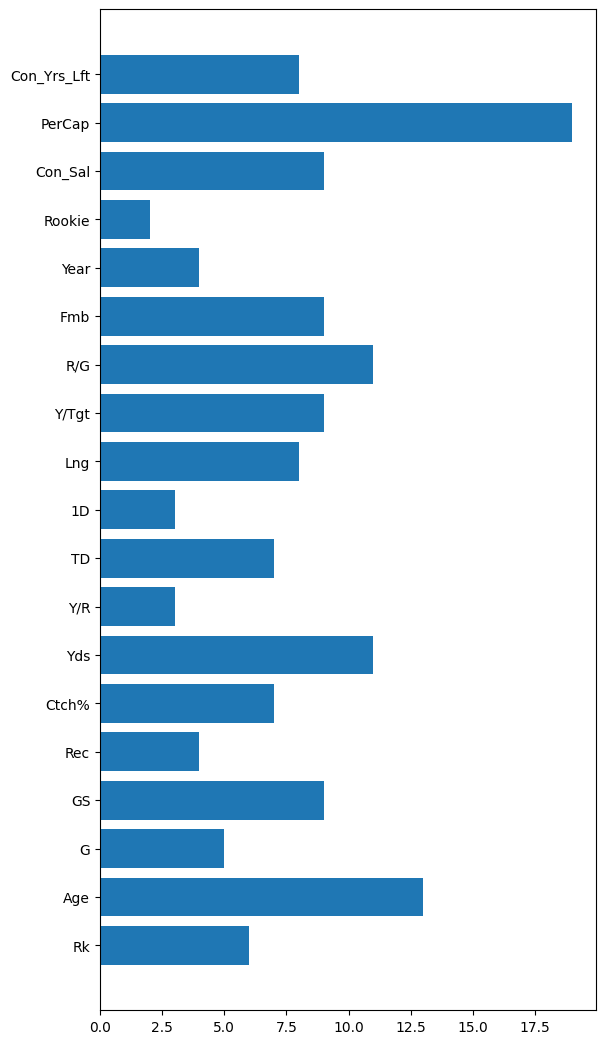

[{'Rk': 6, 'Age': 13, 'G': 5, 'GS': 9, 'Rec': 4, 'Ctch%': 7, 'Yds': 11, 'Y/R': 3, 'TD': 7, '1D': 3, 'Lng': 8, 'Y/Tgt': 9, 'R/G': 11, 'Fmb': 9, 'Year': 4, 'Rookie': 2, 'Con_Sal': 9, 'PerCap': 19, 'Con_Yrs_Lft': 8}]


In [537]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 19))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [538]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [539]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 49, 'num_leaves': 4, 'min_child_samples': 22, 'learning_rate': 0.29223861233800313, 'log_max_bin': 6, 'colsample_bytree': 0.8084848880027284, 'reg_alpha': 0.02796498959139331, 'reg_lambda': 0.5258759013095973}


In [540]:
# Find best r2
print(1-automl.best_loss)

0.6703215745893628


In [541]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.3296784254106372, 'rf': 0.3653205676958948, 'xgboost': 0.47793865518962686, 'extra_tree': 0.3646542975553345, 'xgb_limitdepth': 37.121133252279655}


In [542]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 7.054901123046875e-05, 'wall_clock_time': 51.048261404037476, 'metric_for_logging': {'pred_time': 7.054901123046875e-05, 'train_loss': 0.14759934574584924}, 'val_loss': 0.3296784254106372, 'training_iteration': 1, 'config': {'n_estimators': 49, 'num_leaves': 4, 'min_child_samples': 22, 'learning_rate': 0.29223861233800313, 'log_max_bin': 6, 'colsample_bytree': 0.8084848880027284, 'reg_alpha': 0.02796498959139331, 'reg_lambda': 0.5258759013095973}, 'config/n_estimators': 49, 'config/num_leaves': 4, 'config/min_child_samples': 22, 'config/learning_rate': 0.29223861233800313, 'config/log_max_bin': 6, 'config/colsample_bytree': 0.8084848880027284, 'config/reg_alpha': 0.02796498959139331, 'config/reg_lambda': 0.5258759013095973, 'experiment_tag': 'exp', 'time_total_s': 1.5351104736328125}


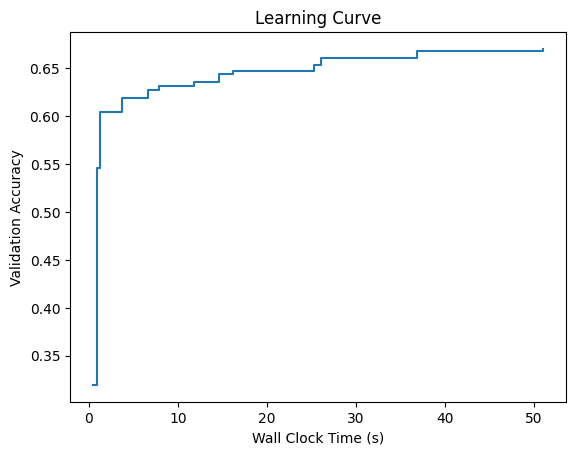

In [543]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [544]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [ 7.42093608e-02  6.96435058e-02  2.58071545e-02  7.69225416e-02
  9.01156953e-02  8.68442300e-02  4.73357732e-02  4.61532814e-02
  8.07368298e-02  6.85062234e-02  7.53708657e-02  8.48013726e-02
  1.08420950e-02  8.50959918e-02  5.61795689e-02  4.54454647e-02
  3.76391245e-02  4.22680007e-02  1.90315350e-02  6.20495828e-02
  3.04095284e-02  4.09756712e-02  2.31894112e-02  2.85237094e-02
  1.88579720e-02  3.09093720e-02  2.18469346e-02  4.50806690e-02
  2.09034066e-02  1.40466444e-02  3.63467601e-02  1.75873609e-02
  3.79741740e-02  6.50924162e-02  5.93860559e-02  2.01441757e-02
  3.12423477e-02  3.81818013e-02  4.08924974e-02  6.20957443e-03
  3.17144375e-02  2.20924240e-02  4.06512193e-02  1.63892727e-02
  1.27448735e-02  2.68832791e-02  1.94152976e-02  5.17006373e-02
  2.87832037e-02  4.78487468e-02  2.12085458e-02  1.26265844e-02
  4.19205900e-02  1.24084325e-02  5.86880853e-03  3.73056901e-02
  1.54881126e-02  2.01958217e-02  4.47109601e-02  1.22901369e-02
  3.8837

In [545]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.8306822943060939
mse = 0.00011891851089495793
mae = 0.006863604370276684


In [546]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [ 0.11540024  0.09693921  0.09994157  0.04586899  0.03700409  0.09516412
  0.0582381   0.10001735  0.04141666  0.07935654  0.04822668  0.0318985
  0.09440624  0.01959211  0.06400906  0.04141712  0.03712709  0.0438897
  0.02074006  0.02547122  0.03921363  0.03293617  0.03334184  0.06737669
  0.03509455  0.08705387  0.0184985   0.02212827  0.08501971  0.07275726
  0.04778621  0.07830658  0.03135683  0.02670424  0.03035507  0.01086733
  0.01179835  0.05582148  0.02074553  0.02214472  0.02163634  0.00156831
  0.04293511  0.06070695  0.04347703  0.01821775  0.01333078  0.01534791
  0.0120461   0.01162276  0.01830449  0.0098889   0.07304268  0.00864209
  0.00923854  0.07563177  0.01378973  0.01944713  0.0056059   0.01218594
  0.02757962  0.00524125  0.01089677  0.01273587  0.01533197  0.06448115
  0.03427349  0.06387761  0.01609276  0.00469446  0.04605628  0.0057322
  0.01843123  0.05697568  0.00700062  0.00606975  0.00420967  0.00598694
  0.00469446  0.01021243  0.01032341 

In [547]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.6876668457252402
mse = 0.0003547324563993884
mae = 0.010506136844367119


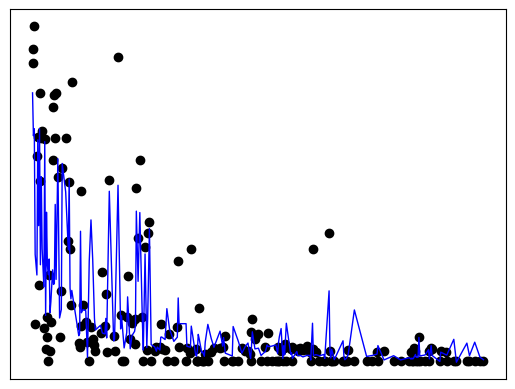

In [548]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [549]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "Deonte Harty"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Cap', 'Con_Len', 'Vet', 'Tgt'], axis=1)
#feeder_test.at[418, 'Con_Yrs_Lft'] = 0
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Deonte Harty"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
            Rk      Age         G        GS       Rec     Ctch%       Yds  \
1291  1.223351 -0.28709 -1.569669 -1.004905 -0.925383  2.075849 -0.925671   

           Y/R        TD        1D       Lng     Y/Tgt      R/G      Fmb  \
1291 -0.960009 -0.805814 -0.946367 -1.329978 -0.246127 -0.89753  0.32445   

      Year  Rookie    Con_Sal    PerCap  Con_Yrs_Lft  
1291  2022     0.0  3986000.0  0.019145            0  
####################### ACTUAL LENGTH #######################
            Player  New_Perc_Cap
1291  Deonte Harty           0.0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0.01194717]


## **MultiOutput**

### **MultiOutput Regression WR (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/WR_data/finalWR.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0', 'Unnamed: 0.1'], axis=1)
y_train = feeder_train[['New_Con_Len', 'New_Perc_Cap']]
y_test = feeder_test[['New_Con_Len', 'New_Perc_Cap']]

In [ ]:
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_MultiOut.log",
    #"max_iter": 2,
}

# train the model
model = MultiOutputRegressor(AutoML(**automl_settings))
model.fit(X_train, y_train)

[flaml.automl.automl: 04-04 18:18:26] {2726} INFO - task = regression
[flaml.automl.automl: 04-04 18:18:26] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 04-04 18:18:26] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 04-04 18:18:26] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 04-04 18:18:26] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 04-04 18:18:26] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-04 18:18:26] {3472} INFO - Estimated sufficient time budget=1720s. Estimated necessary time budget=12s.
[flaml.automl.automl: 04-04 18:18:26] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.9442,	best estimator lgbm's best error=0.9442
[flaml.automl.automl: 04-04 18:18:26] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-04 18:18:26] {3519} INFO -  at 0.5s,	estimator lgbm's best error=0.9442,	best estimato

MultiOutputRegressor(estimator=AutoML(append_log=False, auto_augment=True,
                                      custom_hp={}, cv_score_agg_func=None,
                                      early_stop=False, ensemble=False,
                                      estimator_list='auto', eval_method='cv',
                                      fit_kwargs_by_estimator={},
                                      force_cancel=False, free_mem_ratio=0,
                                      hpo_method='auto', keep_search_state=True,
                                      learner_selector='sample',
                                      log_file_name='QB_MultiOut.log',
                                      log_training_metric=True,
                                      log_type='better', max_iter=None,
                                      mem_thres=4294967296, metric='r2',
                                      metric_constraints=[],
                                      min_sample_size=10000, model_history=True,
                                      n_concurrent_trials=1, n_jobs=-1,
                                      n_splits=5, pred_time_limit=inf,
                                      preserve_checkpoint=True,
                                      retrain_full=True, sample=True, ...))

In [ ]:
'''pickle and save the automl object'''
def saveModel(model, versionNum):
  verNum = str(versionNum)
  with open('MultiOutAutoml_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

#saveModel(model, "1.0")

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    model = pickle.load(f)
    return model
  
#model = loadModel("")

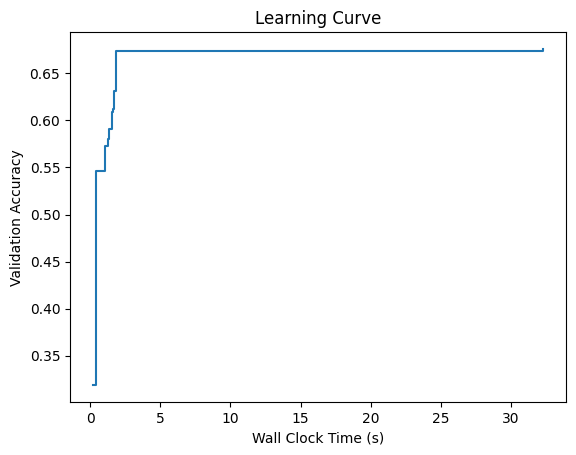

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = model.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [[1.61481843e+00 7.14817567e-02]
 [1.47289442e+00 7.17697381e-02]
 [5.39530403e-01 3.58060469e-02]
 ...
 [6.63419165e-01 7.29973525e-03]
 [1.51123450e-01 1.64694291e-03]
 [4.79878522e-01 4.10584585e-04]]


In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.5476309757671038
mse = 0.3526858506981375
mae = 0.28819998367843186


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_train.columns)
train = pd.DataFrame(y_train, columns = y_train.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = 0.26753548646541003
NewConLen: mse = 0.7052506897686177
NewConLen: mae = 0.5695760726527552
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.8277264650687975
New_Perc_Cap: mse = 0.00012101162765727454
New_Perc_Cap: mae = 0.006823894704108445


In [ ]:
# Predict on Test set
y_pred = model.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [[ 9.15196403e-01  1.10394973e-01]
 [ 1.60322307e+00  1.02190392e-01]
 [ 1.54462972e+00  1.00444511e-01]
 [ 3.31079651e-01  2.56929643e-02]
 [ 1.04418082e+00  5.02169320e-02]
 [ 3.69759979e-01  9.50608749e-02]
 [ 2.97980738e-01  4.93647739e-02]
 [ 9.73789752e-01  8.56788173e-02]
 [ 1.04418082e+00  3.87606536e-02]
 [ 1.24276277e+00  8.47124689e-02]
 [ 1.59066146e+00  5.39590494e-02]
 [ 7.44143976e-01  4.24300096e-02]
 [ 9.73789752e-01  9.18738230e-02]
 [ 2.97980738e-01  8.45881319e-03]
 [ 1.67361414e+00  6.19933305e-02]
 [ 1.07141429e+00  5.04935988e-02]
 [ 6.00640696e-01  4.49917269e-02]
 [ 2.97980738e-01  4.60810914e-02]
 [ 4.40151048e-01  3.39680967e-02]
 [ 3.31079651e-01  1.39338570e-02]
 [ 1.67361414e+00  3.52759638e-02]
 [ 1.04418082e+00  1.99858474e-02]
 [ 1.04418082e+00  4.10705186e-02]
 [ 1.67361414e+00  6.16052654e-02]
 [ 1.04418082e+00  2.85016174e-02]
 [ 9.73789752e-01  7.91172312e-02]
 [ 3.31079651e-01  7.45148447e-03]
 [ 6.02219960e-01  1.91050484e-02]
 [ 

In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.460631233073058
mse = 0.4963522949750673
mae = 0.34195218556944057


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_test.columns)
train = pd.DataFrame(y_test, columns = y_test.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = 0.2505948289599458
NewConLen: mse = 0.9923306436377972
NewConLen: mae = 0.6734499676406355
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.6706676371861702
New_Perc_Cap: mse = 0.0003739463123373905
New_Perc_Cap: mae = 0.010454403498245677


In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == "DJ Chark"]
print(feeder_test)
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)
feeder_test = feeder_test.rename(columns={'%Cap': 'PerCap'})
y_pred = model.predict(feeder_test)
print('Predicted labels', y_pred)

      Unnamed: 0.1  Unnamed: 0    Player   Tm Pos        Rk       Age  \
1219          1219        1219  DJ Chark  DET  WR -0.509901  0.074677   

             G        GS       Tgt  ...  Year  Rookie  Vet  Con_Len  \
1219 -0.151484  0.706574  0.113389  ...  2022     0.0  1.0      1.0   

         Con_Sal          Cap      %Cap  New_Con_Len  New_Perc_Cap  \
1219  10000000.0  208200000.0  0.048031            0           0.0   

      Con_Yrs_Lft  
1219           -4  

[1 rows x 30 columns]
Predicted labels [[0.75450656 0.02243642]]


# **TE Models**

## **Contract Length $\checkmark$**

### **Regression For Contract Length TE 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/finalTE.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap',  'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-11 18:14:06] {1768} INFO - task = regression
[flaml.automl.logger: 04-11 18:14:06] {1775} INFO - Data split method: uniform
[flaml.automl.logger: 04-11 18:14:06] {1778} INFO - Evaluation method: cv
[flaml.automl.logger: 04-11 18:14:06] {1891} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-11 18:14:06] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-11 18:14:06] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-11 18:14:06] {2479} INFO - Estimated sufficient time budget=1178s. Estimated necessary time budget=8s.
[flaml.automl.logger: 04-11 18:14:06] {2526} INFO -  at 0.2s,	estimator lgbm's best error=0.9515,	best estimator lgbm's best error=0.9515
[flaml.automl.logger: 04-11 18:14:06] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-11 18:14:06] {2526} INFO -  at 0.4s,	estimator lgbm's best error=0.9515,	best estimator

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

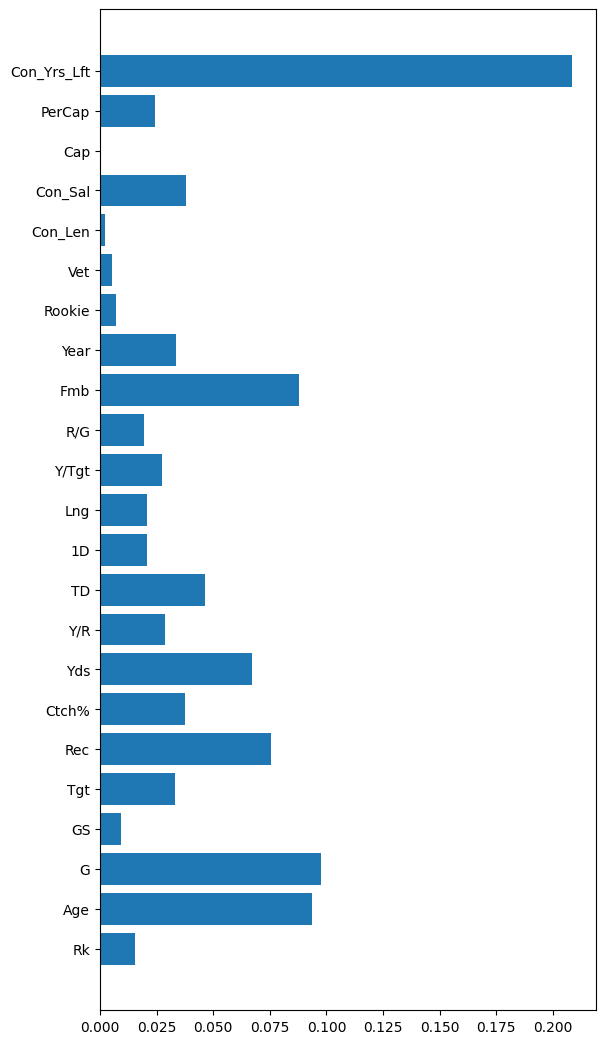

[{'Rk': 0.015540668740868568, 'Age': 0.09372936934232712, 'G': 0.09753306955099106, 'GS': 0.009448842145502567, 'Tgt': 0.03316013142466545, 'Rec': 0.07564975321292877, 'Ctch%': 0.03747676685452461, 'Yds': 0.06695318222045898, 'Y/R': 0.02866019308567047, 'TD': 0.046386245638132095, '1D': 0.020561641082167625, 'Lng': 0.020762575790286064, 'Y/Tgt': 0.027515927329659462, 'R/G': 0.01958983764052391, 'Fmb': 0.08790262788534164, 'Year': 0.033651772886514664, 'Rookie': 0.006978237070143223, 'Vet': 0.005376705899834633, 'Con_Len': 0.0021611456759274006, 'Con_Sal': 0.03793811425566673, 'Cap': 0.0, 'PerCap': 0.024385353550314903, 'Con_Yrs_Lft': 0.20863792300224304}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 23))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

xgb_limitdepth


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 10, 'max_depth': 7, 'min_child_weight': 5.4998639205908075, 'learning_rate': 0.14100410060411842, 'subsample': 1.0, 'colsample_bylevel': 0.8425853155117716, 'colsample_bytree': 0.9245352674213118, 'reg_alpha': 0.025118956715098555, 'reg_lambda': 27.89255832621344}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.14329186839718777


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.8631018054550059, 'rf': 0.936411594090281, 'xgboost': 0.9003244142158117, 'extra_tree': 0.8729522185078877, 'xgb_limitdepth': 0.8567081316028122}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 5.1154588398180506e-05, 'wall_clock_time': 54.17462134361267, 'metric_for_logging': {'pred_time': 5.1154588398180506e-05, 'train_loss': 0.6104258461261624}, 'val_loss': 0.8567081316028122, 'training_iteration': 1, 'config': {'n_estimators': 10, 'max_depth': 7, 'min_child_weight': 5.4998639205908075, 'learning_rate': 0.14100410060411842, 'subsample': 1.0, 'colsample_bylevel': 0.8425853155117716, 'colsample_bytree': 0.9245352674213118, 'reg_alpha': 0.025118956715098555, 'reg_lambda': 27.89255832621344}, 'config/n_estimators': 10, 'config/max_depth': 7, 'config/min_child_weight': 5.4998639205908075, 'config/learning_rate': 0.14100410060411842, 'config/subsample': 1.0, 'config/colsample_bylevel': 0.8425853155117716, 'config/colsample_bytree': 0.9245352674213118, 'config/reg_alpha': 0.025118956715098555, 'config/reg_lambda': 27.89255832621344, 'experiment_tag': 'exp', 'time_total_s': 0.2658555507659912}


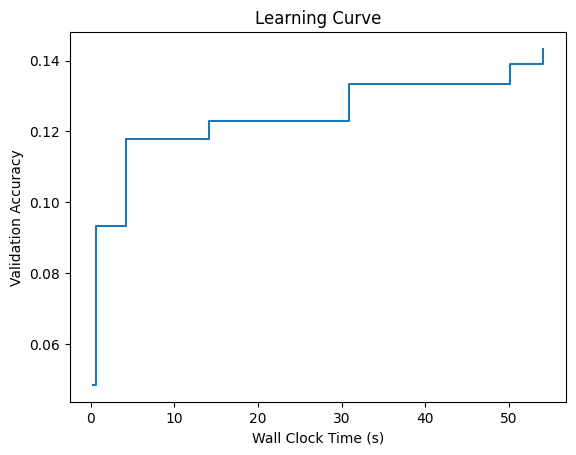

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 2. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 2. 0. 0. 0. 1. 0. 0. 1. 1. 2. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 2. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 2. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.3578324474760036
mse = 0.7973684210526316
mae = 0.4394736842105263


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.10797640420620669
mse = 1.1808510638297873
mae = 0.6276595744680851


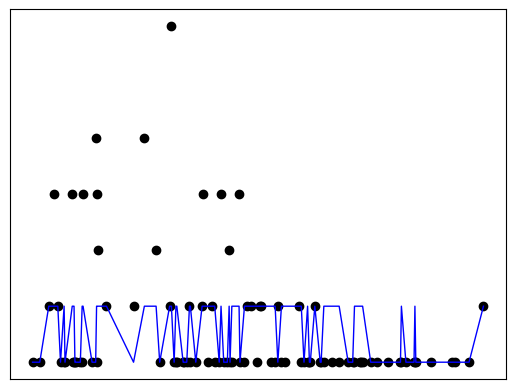

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder_test[feeder_test.Player == "Zach Ertz"]
feeder_test = feeder_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
print(feeder_test.head(6))
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = automl.predict(feeder_test).round()
print('Predicted labels', y_pred)

        Player   Tm Pos        Rk       Age         G        GS      Tgt  \
470  Zach Ertz  2TM  TE -1.549758  1.339737  0.916646  1.315898  2.22732   

          Rec     Ctch%  ...  Year  Rookie  Vet  Con_Len     Con_Sal  \
470  2.110303 -0.245866  ...  2021     0.0  1.0      5.0  42500000.0   

             Cap    PerCap  New_Con_Len  New_Perc_Cap  Con_Yrs_Lft  
470  182500000.0  0.046575            3      0.050672            0  

[1 rows x 28 columns]
Predicted labels [1.]


### **Regression For Contract Length TE 1.1 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf1.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2011]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 17:40:44] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 17:40:44] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 17:40:44] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 17:40:44] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 17:40:44] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 17:40:44] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 17:40:44] {2336} INFO - Estimated sufficient time budget=4385s. Estimated necessary time budget=31s.
[flaml.automl.logger: 04-20 17:40:44] {2383} INFO -  at 0.6s,	estimator lgbm's best error=0.9343,	best estimator lgbm's best error=0.9343
[flaml.automl.logger: 04-20 17:40:44] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 17:40:45] {2383} INFO -  at 1.6s,	estimator lgbm's best error=0.9343,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

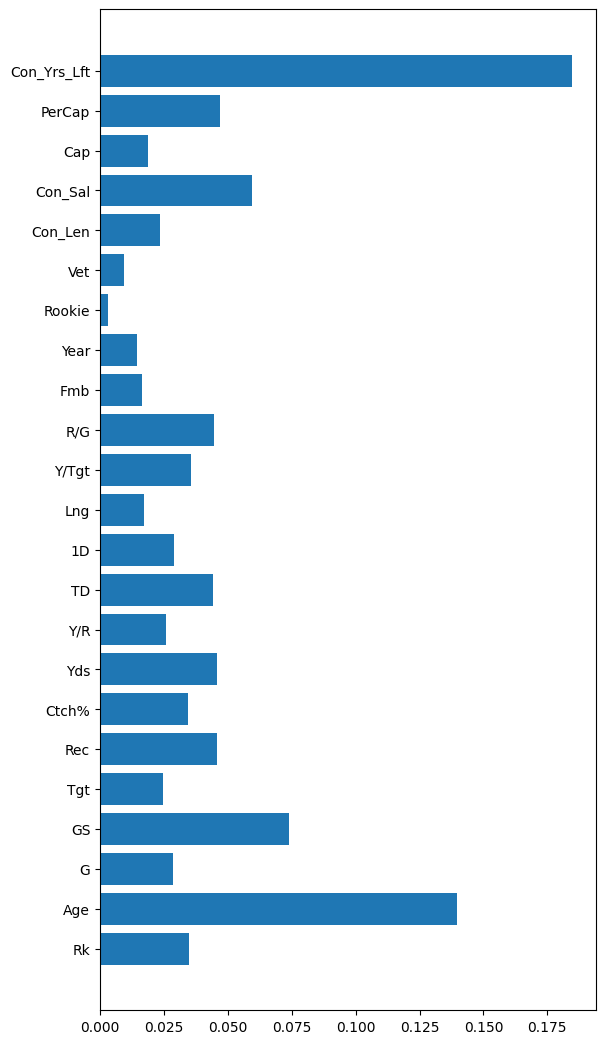

[{'Rk': 0.03480307494342208, 'Age': 0.13973001547389213, 'G': 0.02859503546698057, 'GS': 0.07383323667825131, 'Tgt': 0.024822507348199813, 'Rec': 0.04575579844371653, 'Ctch%': 0.03439065083177613, 'Yds': 0.04569522745552816, 'Y/R': 0.025721839867115213, 'TD': 0.04428369064971762, '1D': 0.028762986013163787, 'Lng': 0.017189280637947675, 'Y/Tgt': 0.035577563609240574, 'R/G': 0.04468954698937386, 'Fmb': 0.0163764532906327, 'Year': 0.014439495687221459, 'Rookie': 0.0030071323753327723, 'Vet': 0.009415899378926455, 'Con_Len': 0.023295084894599603, 'Con_Sal': 0.05930569753359447, 'Cap': 0.01871199115534433, 'PerCap': 0.04681287697307224, 'Con_Yrs_Lft': 0.18478491430295044}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 23))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

rf


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 65, 'max_features': 0.6617004022216924, 'max_leaves': 10}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.1762556696778782


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.8764665392233478, 'rf': 0.8237443303221218, 'xgboost': 0.8553053497140161, 'extra_tree': 0.8329281538947123, 'xgb_limitdepth': inf}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00024940897814442294, 'wall_clock_time': 60.0399329662323, 'metric_for_logging': {'pred_time': 0.00024940897814442294, 'train_loss': 0.6246395013617186}, 'val_loss': 0.8237443303221218, 'training_iteration': 1, 'config': {'n_estimators': 65, 'max_features': 0.6617004022216924, 'max_leaves': 10}, 'config/n_estimators': 65, 'config/max_features': 0.6617004022216924, 'config/max_leaves': 10, 'experiment_tag': 'exp', 'time_total_s': 1.7574574947357178}


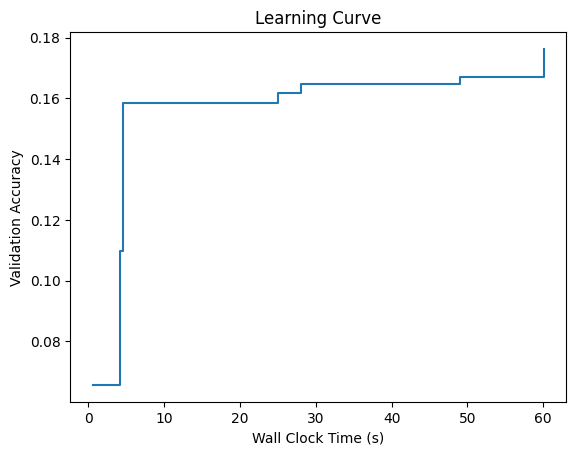

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.23596030998370332
mse = 0.3329253365973072
mae = 0.2962056303549572


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.34012681159420266
mse = 0.32978723404255317
mae = 0.2872340425531915


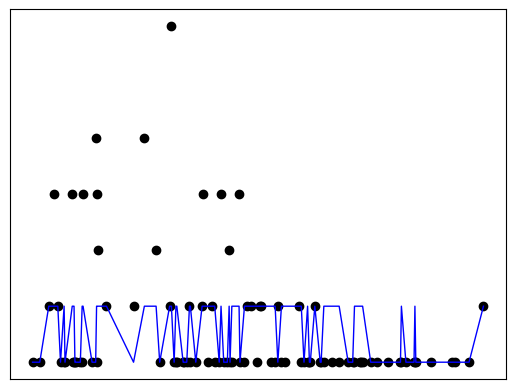

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder_test[feeder_test.Player == "Zach Ertz"]
feeder_test = feeder_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
print(feeder_test.head(6))
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = automl.predict(feeder_test).round()
print('Predicted labels', y_pred)

        Player   Tm Pos        Rk       Age         G        GS      Tgt  \
470  Zach Ertz  2TM  TE -1.549758  1.339737  0.916646  1.315898  2.22732   

          Rec     Ctch%  ...  Year  Rookie  Vet  Con_Len     Con_Sal  \
470  2.110303 -0.245866  ...  2021     0.0  1.0      5.0  42500000.0   

             Cap    PerCap  New_Con_Len  New_Perc_Cap  Con_Yrs_Lft  
470  182500000.0  0.046575            3      0.050672            0  

[1 rows x 28 columns]
Predicted labels [1.]


### **Regression For Contract Length TE 1.2 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'PerCap', 'Cap', 'Con_Len', '1D', 'Yds', 'GS'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'PerCap', 'Cap', 'Con_Len', '1D', 'Yds', 'GS'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-11 19:46:32] {1768} INFO - task = regression
[flaml.automl.logger: 04-11 19:46:32] {1775} INFO - Data split method: uniform
[flaml.automl.logger: 04-11 19:46:32] {1778} INFO - Evaluation method: cv
[flaml.automl.logger: 04-11 19:46:32] {1891} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-11 19:46:32] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-11 19:46:32] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-11 19:46:33] {2479} INFO - Estimated sufficient time budget=4089s. Estimated necessary time budget=29s.
[flaml.automl.logger: 04-11 19:46:33] {2526} INFO -  at 0.5s,	estimator lgbm's best error=0.9139,	best estimator lgbm's best error=0.9139
[flaml.automl.logger: 04-11 19:46:33] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-11 19:46:33] {2526} INFO -  at 0.7s,	estimator lgbm's best error=0.9139,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

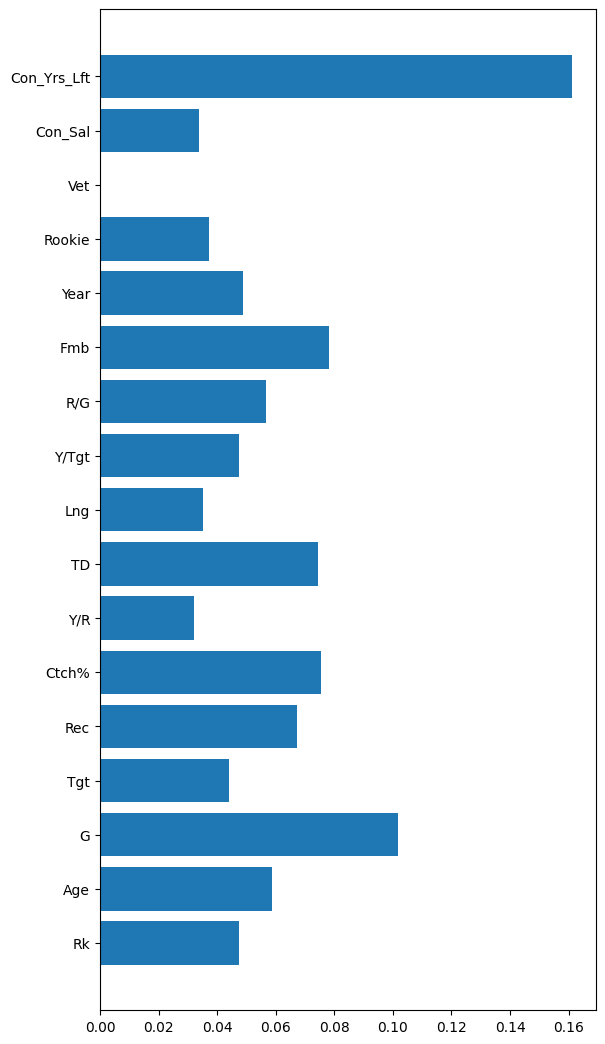

[{'Rk': 0.0474831759929657, 'Age': 0.05869651585817337, 'G': 0.10186201333999634, 'Tgt': 0.04404522106051445, 'Rec': 0.0672830268740654, 'Ctch%': 0.07531297206878662, 'Y/R': 0.031948670744895935, 'TD': 0.07432280480861664, 'Lng': 0.03519434481859207, 'Y/Tgt': 0.047543078660964966, 'R/G': 0.05671130120754242, 'Fmb': 0.07827191799879074, 'Year': 0.04895896837115288, 'Rookie': 0.037252381443977356, 'Vet': 0.0, 'Con_Sal': 0.03383750095963478, 'Con_Yrs_Lft': 0.16127605736255646}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 17))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

xgboost


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'max_leaves': 12, 'min_child_weight': 1.6395240168141376, 'learning_rate': 0.2374679677198341, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.9429076153923982, 'reg_alpha': 0.21180968878653983, 'reg_lambda': 2.1943854260739197}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.1911583981816538


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.8631018054550059, 'rf': 0.936411594090281, 'xgboost': 0.9003244142158117, 'extra_tree': 0.8729522185078877, 'xgb_limitdepth': 0.8567081316028122}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00018247303209806745, 'wall_clock_time': 54.75591802597046, 'metric_for_logging': {'pred_time': 0.00018247303209806745, 'train_loss': 0.35567553881754066}, 'val_loss': 0.8088416018183462, 'training_iteration': 1, 'config': {'n_estimators': 8, 'max_leaves': 12, 'min_child_weight': 1.6395240168141376, 'learning_rate': 0.2374679677198341, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.9429076153923982, 'reg_alpha': 0.21180968878653983, 'reg_lambda': 2.1943854260739197}, 'config/n_estimators': 8, 'config/max_leaves': 12, 'config/min_child_weight': 1.6395240168141376, 'config/learning_rate': 0.2374679677198341, 'config/subsample': 1.0, 'config/colsample_bylevel': 1.0, 'config/colsample_bytree': 0.9429076153923982, 'config/reg_alpha': 0.21180968878653983, 'config/reg_lambda': 2.1943854260739197, 'experiment_tag': 'exp', 'time_total_s': 1.1627764701843262}


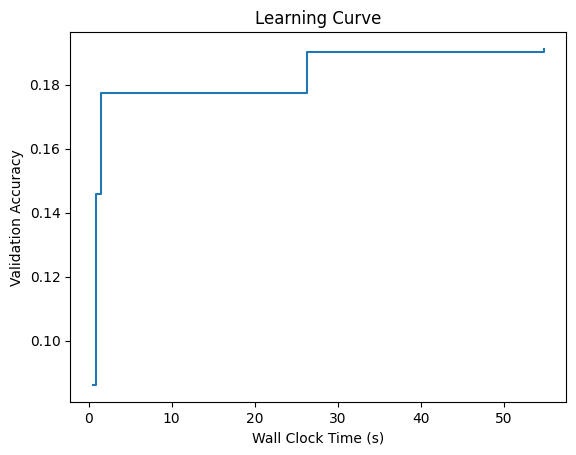

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.5471863779613981
mse = 0.2
mae = 0.18947368421052632


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.10597826086956497
mse = 0.44680851063829785
mae = 0.40425531914893614


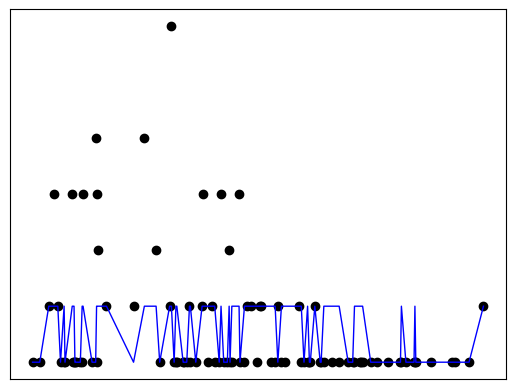

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder_test[feeder_test.Player == "Zach Ertz"]
print(feeder_test.head(6))
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'PerCap', 'Cap', 'Con_Len', '1D', 'Yds', 'GS'], axis=1)
y_pred = automl.predict(feeder_test).round()
print('Predicted labels', y_pred)

        Player   Tm Pos        Rk       Age         G        GS      Tgt  \
470  Zach Ertz  2TM  TE -1.549758  1.339737  0.916646  1.315898  2.22732   

          Rec     Ctch%  ...  Rookie  Vet  Con_Len     Con_Sal          Cap  \
470  2.110303 -0.245866  ...     0.0  1.0      5.0  42500000.0  182500000.0   

       PerCap  New_Con_Len  New_Perc_Cap  Con_Yrs_Lft          New_Con  
470  0.046575            2        0.0507            0  ('Standard', 3)  

[1 rows x 29 columns]
Predicted labels [1.]


### **Regression For Contract Length TE 1.3 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'PerCap', 'Cap', 'Con_Len', '1D', 'Yds', 'GS', 'Vet'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'PerCap', 'Cap', 'Con_Len', '1D', 'Yds', 'GS', 'Vet'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-11 20:02:31] {1768} INFO - task = regression
[flaml.automl.logger: 04-11 20:02:31] {1775} INFO - Data split method: uniform
[flaml.automl.logger: 04-11 20:02:31] {1778} INFO - Evaluation method: cv
[flaml.automl.logger: 04-11 20:02:31] {1891} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-11 20:02:31] {2011} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-11 20:02:31] {2341} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-11 20:02:31] {2479} INFO - Estimated sufficient time budget=1788s. Estimated necessary time budget=13s.
[flaml.automl.logger: 04-11 20:02:31] {2526} INFO -  at 0.3s,	estimator lgbm's best error=0.9139,	best estimator lgbm's best error=0.9139
[flaml.automl.logger: 04-11 20:02:31] {2341} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-11 20:02:31] {2526} INFO -  at 0.5s,	estimator lgbm's best error=0.9139,	best estimato

In [ ]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

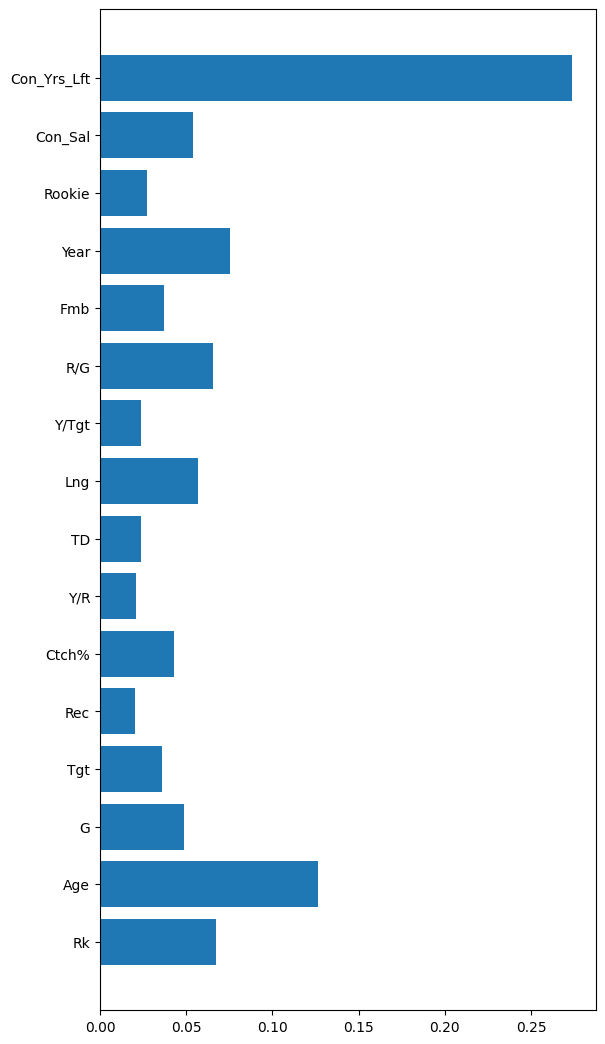

[{'Rk': 0.06708686798810959, 'Age': 0.1264941692352295, 'G': 0.04886731132864952, 'Tgt': 0.036074426025152206, 'Rec': 0.020591020584106445, 'Ctch%': 0.042665399610996246, 'Y/R': 0.021027185022830963, 'TD': 0.023625649511814117, 'Lng': 0.05680028721690178, 'Y/Tgt': 0.02361399121582508, 'R/G': 0.06565766781568527, 'Fmb': 0.037076279520988464, 'Year': 0.0754469782114029, 'Rookie': 0.027249762788414955, 'Con_Sal': 0.0537523590028286, 'Con_Yrs_Lft': 0.27397066354751587}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 16))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

xgb_limitdepth


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 8, 'max_depth': 6, 'min_child_weight': 8.063554399895423, 'learning_rate': 1.0, 'subsample': 0.865112704272654, 'colsample_bylevel': 0.8027872586081222, 'colsample_bytree': 0.7499495161309354, 'reg_alpha': 0.02020526481075023, 'reg_lambda': 133.43734793665152}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.2006393281250778


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.8035730730081481, 'rf': 0.8886802529286417, 'xgboost': 0.8316119541555516, 'extra_tree': 0.8337809851997943, 'xgb_limitdepth': 0.7993606718749222}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00011315094797234785, 'wall_clock_time': 46.1209077835083, 'metric_for_logging': {'pred_time': 0.00011315094797234785, 'train_loss': 0.5385958116789491}, 'val_loss': 0.7993606718749222, 'training_iteration': 1, 'config': {'n_estimators': 8, 'max_depth': 6, 'min_child_weight': 8.063554399895423, 'learning_rate': 1.0, 'subsample': 0.865112704272654, 'colsample_bylevel': 0.8027872586081222, 'colsample_bytree': 0.7499495161309354, 'reg_alpha': 0.02020526481075023, 'reg_lambda': 133.43734793665152}, 'config/n_estimators': 8, 'config/max_depth': 6, 'config/min_child_weight': 8.063554399895423, 'config/learning_rate': 1.0, 'config/subsample': 0.865112704272654, 'config/colsample_bylevel': 0.8027872586081222, 'config/colsample_bytree': 0.7499495161309354, 'config/reg_alpha': 0.02020526481075023, 'config/reg_lambda': 133.43734793665152, 'experiment_tag': 'exp', 'time_total_s': 0.23451876640319824}


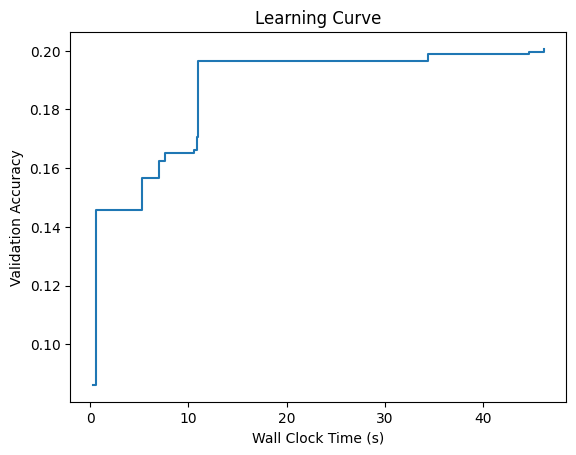

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train).round()
print('Predicted labels', y_pred)

Predicted labels [ 0.  0. -0.  1.  0. -0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0. -0.
  0.  0.  0.  0.  0. -0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.
  0.  0.  1.  1.  1.  0. -0.  1.  1. -0. -0.  0.  0.  1.  1.  1.  0.  1.
  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.
 -0.  0.  1.  0.  0.  0.  0.  1.  0.  1. -0.  0.  0.  0.  1.  1. -0.  1.
  0. -0.  0. -0.  1. -0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.  1.
  1.  1.  1.  1.  0.  0.  1.  1. -0. -0.  0.  1.  0.  0.  0.  1.  1.  0.
  1.  0.  1. -0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.
  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.
  0.  0. -0.  0.  0.  1.  0.  0. -0.  0.  1.  0.  0. -0.  1.  1.  0.  0.
  1.  1.  0.  1.  1.  1.  0.  0.  

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.43398297245174766
mse = 0.25
mae = 0.23421052631578948


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test).round()
print('Predicted labels', y_pred)

Predicted labels [ 0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.
  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.
 -0.  1.  1.  1.  1.  1.  0.  1.  0. -0.  0.  0.  1.  1.  0.  1.  0.  0.
  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  1.  0.  1.]


In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.1911231884057969
mse = 0.40425531914893614
mae = 0.3617021276595745


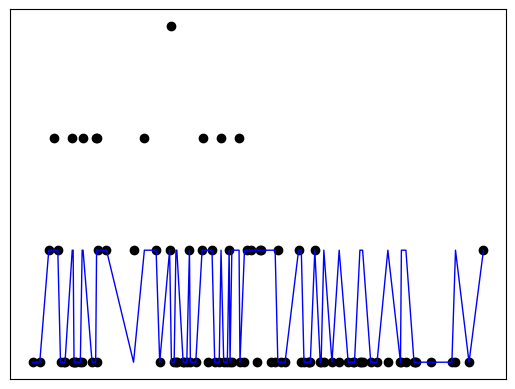

In [ ]:
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == "Zach Ertz"]
print(feeder_test.head(6))
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'PerCap', 'Cap', 'Con_Len', '1D', 'Vet'], axis=1)
y_pred = automl.predict(feeder_test).round()
print('Predicted labels', y_pred)

        Player   Tm Pos        Rk       Age         G        GS      Tgt  \
470  Zach Ertz  2TM  TE -1.549758  1.339737  0.916646  1.315898  2.22732   

          Rec     Ctch%  ...  Rookie  Vet  Con_Len     Con_Sal          Cap  \
470  2.110303 -0.245866  ...     0.0  1.0      5.0  42500000.0  182500000.0   

       PerCap  New_Con_Len  New_Perc_Cap  Con_Yrs_Lft          New_Con  
470  0.046575            2        0.0507            0  ('Standard', 3)  

[1 rows x 29 columns]
Predicted labels [1.]


### **Classification For Contract Length TE 1.0 (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf1.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2011]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 17:41:47] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 17:41:47] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 17:41:47] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 3 augmented from 2 to 20


[flaml.automl.logger: 04-20 17:41:47] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 17:41:47] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 17:41:47] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 17:41:48] {2336} INFO - Estimated sufficient time budget=8731s. Estimated necessary time budget=201s.
[flaml.automl.logger: 04-20 17:41:48] {2383} INFO -  at 1.0s,	estimator lgbm's best error=0.3066,	best estimator lgbm's best error=0.3066
[flaml.automl.logger: 04-20 17:41:48] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 17:41:48] {2383} INFO -  at 1.9s,	estimator lgbm's best error=0.3066,	best estimator lgbm's best error=0.3066
[flaml.automl.logger: 04-20 17:41:48] {2210} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-20 17:41:51] {2383} INFO -  at 4.0s,	estimator lgbm's best error=0.297

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:41:54] {2383} INFO -  at 7.5s,	estimator xgboost's best error=0.2934,	best estimator xgboost's best error=0.2934
[flaml.automl.logger: 04-20 17:41:54] {2210} INFO - iteration 4, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:41:55] {2383} INFO -  at 8.3s,	estimator extra_tree's best error=0.3066,	best estimator xgboost's best error=0.2934
[flaml.automl.logger: 04-20 17:41:55] {2210} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-20 17:42:00] {2383} INFO -  at 13.1s,	estimator lgbm's best error=0.2790,	best estimator lgbm's best error=0.2790
[flaml.automl.logger: 04-20 17:42:00] {2210} INFO - iteration 6, current learner extra_tree
[flaml.automl.logger: 04-20 17:42:01] {2383} INFO -  at 14.0s,	estimator extra_tree's best error=0.3018,	best estimator lgbm's best error=0.2790
[flaml.automl.logger: 04-20 17:42:01] {2210} INFO - iteration 7, current learner rf
[flaml.automl.logger: 04-20 17:42:02] {2383} INFO -  at 15.0s,	estimator rf's best error=0.2934,	best estimator lgbm's best error=0.2790
[flaml.automl.logger: 04-20 17:42:02] {2210} INFO - iteration 8, current learner rf
[flaml.automl.logger: 04-20 17:42:03] {2383} INFO -  at 16.0s,	estimator rf's best err

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:09] {2383} INFO -  at 22.6s,	estimator xgboost's best error=0.2934,	best estimator lgbm's best error=0.2790
[flaml.automl.logger: 04-20 17:42:09] {2210} INFO - iteration 12, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:11] {2383} INFO -  at 24.8s,	estimator xgboost's best error=0.2934,	best estimator lgbm's best error=0.2790
[flaml.automl.logger: 04-20 17:42:11] {2210} INFO - iteration 13, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:13] {2383} INFO -  at 26.2s,	estimator xgboost's best error=0.2934,	best estimator lgbm's best error=0.2790
[flaml.automl.logger: 04-20 17:42:13] {2210} INFO - iteration 14, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 17:42:14] {2383} INFO -  at 27.4s,	estimator xgboost's best error=0.2778,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:14] {2210} INFO - iteration 15, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:15] {2383} INFO -  at 28.2s,	estimator xgboost's best error=0.2778,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:15] {2210} INFO - iteration 16, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:15] {2383} INFO -  at 28.8s,	estimator lgbm's best error=0.2790,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:15] {2210} INFO - iteration 17, current learner extra_tree
[flaml.automl.logger: 04-20 17:42:16] {2383} INFO -  at 29.1s,	estimator extra_tree's best error=0.3018,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:16] {2210} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 04-20 17:42:17] {2383} INFO -  at 30.5s,	estimator lgbm's best error=0.2790,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:17] {2210} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:19] {2383} INFO -  at 32.9s,	estimator xgboost's best error=0.2778,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:19] {2210} INFO - iteration 20, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:21] {2383} INFO -  at 34.3s,	estimator xgboost's best error=0.2778,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:21] {2210} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:22] {2383} INFO -  at 35.2s,	estimator xgboost's best error=0.2778,	best estimator xgboost's best error=0.2778
[flaml.automl.logger: 04-20 17:42:22] {2210} INFO - iteration 22, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:23] {2383} INFO -  at 36.6s,	estimator lgbm's best error=0.2731,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:23] {2210} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 04-20 17:42:24] {2383} INFO -  at 37.5s,	estimator lgbm's best error=0.2731,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:24] {2210} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:26] {2383} INFO -  at 39.9s,	estimator xgboost's best error=0.2778,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:26] {2210} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 04-20 17:42:27] {2383} INFO -  at 40.4s,	estimator extra_tree's best error=0.3018,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:27] {2210} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 04-20 17:42:33] {2383} INFO -  at 46.2s,	estimator lgbm's best error=0.2731,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:33] {2210} INFO - iteration 27, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:34] {2383} INFO -  at 47.8s,	estimator xgboost's best error=0.2778,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:34] {2210} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 04-20 17:42:35] {2383} INFO -  at 48.3s,	estimator extra_tree's best error=0.2934,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:35] {2210} INFO - iteration 29, current learner extra_tree
[flaml.automl.logger: 04-20 17:42:35] {2383} INFO -  at 48.9s,	estimator extra_tree's best error=0.2934,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:35] {2210} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 04-20 17:42:36] {2383} INFO -  at 49.9s,	estimator lgbm's best error=0.2731,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:36] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 17:42:37] {2383} INFO -  at 50.7s,	estima

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:40] {2383} INFO -  at 53.8s,	estimator xgboost's best error=0.2766,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:40] {2210} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 04-20 17:42:41] {2383} INFO -  at 54.5s,	estimator extra_tree's best error=0.2886,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:41] {2210} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 04-20 17:42:45] {2383} INFO -  at 58.5s,	estimator lgbm's best error=0.2731,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:45] {2210} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 04-20 17:42:46] {2383} INFO -  at 59.5s,	estimator lgbm's best error=0.2731,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:46] {2210} INFO - iteration 39, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 17:42:47] {2383} INFO -  at 60.1s,	estimator xgb_limitdepth's best error=0.2914,	best estimator lgbm's best error=0.2731
[flaml.automl.logger: 04-20 17:42:47] {2619} INFO - retrain lgbm for 0.2s
[flaml.automl.logger: 04-20 17:42:47] {2622} INFO - retrained model: LGBMClassifier(colsample_bytree=0.8591464191448509,
               learning_rate=0.40106881032023267, max_bin=1023,
               min_child_samples=7, n_estimators=18, num_leaves=4,
               reg_alpha=0.0009765625, reg_lambda=0.1458645420529982,
               verbose=-1)
[flaml.automl.logger: 04-20 17:42:47] {1930} INFO - fit succeeded
[flaml.automl.logger: 04-20 17:42:47] {1931} INFO - Time taken to find the best model: 36.58396577835083


In [ ]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

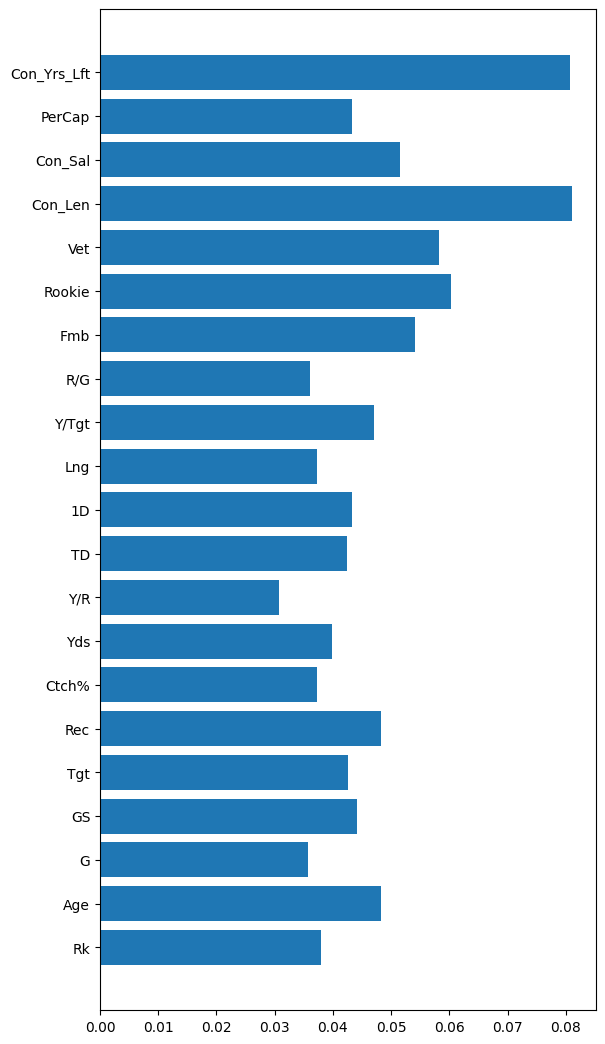

[{'Rk': 0.03802118077874184, 'Age': 0.048248108476400375, 'G': 0.03576808050274849, 'GS': 0.044085729867219925, 'Tgt': 0.04261406511068344, 'Rec': 0.04834415018558502, 'Ctch%': 0.0373186320066452, 'Yds': 0.03983386605978012, 'Y/R': 0.030676912516355515, 'TD': 0.04242131486535072, '1D': 0.04326262325048447, 'Lng': 0.03729414939880371, 'Y/Tgt': 0.046995241194963455, 'R/G': 0.036042895168066025, 'Fmb': 0.05404520407319069, 'Rookie': 0.06036176532506943, 'Vet': 0.05815623700618744, 'Con_Len': 0.0811290517449379, 'Con_Sal': 0.05144844204187393, 'PerCap': 0.04326019436120987, 'Con_Yrs_Lft': 0.08067207038402557}]


In [ ]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 21))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [ ]:
# Find Best Estimator
print(automl.best_estimator)

xgboost


In [ ]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 27, 'max_leaves': 8, 'min_child_weight': 0.10386453152744712, 'learning_rate': 0.09264500943929183, 'subsample': 0.8895588746662894, 'colsample_bylevel': 0.4751895900113077, 'colsample_bytree': 0.8364424069244774, 'reg_alpha': 0.0027488949929569983, 'reg_lambda': 0.030332974704927775}


In [ ]:
# Find best r2
print(1-automl.best_loss)

0.7261708860759494


In [ ]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2915506329113924, 'rf': 0.33664556962025316, 'xgboost': 0.2738291139240506, 'extra_tree': 0.3567721518987342, 'xgb_limitdepth': 0.3215822784810126, 'lrl1': 0.3818987341772152}


In [ ]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.0001742541790008545, 'wall_clock_time': 44.77570390701294, 'metric_for_logging': {'pred_time': 0.0001742541790008545, 'train_loss': 0.09611600717651463}, 'val_loss': 0.2738291139240506, 'training_iteration': 1, 'config': {'n_estimators': 27, 'max_leaves': 8, 'min_child_weight': 0.10386453152744712, 'learning_rate': 0.09264500943929183, 'subsample': 0.8895588746662894, 'colsample_bylevel': 0.4751895900113077, 'colsample_bytree': 0.8364424069244774, 'reg_alpha': 0.0027488949929569983, 'reg_lambda': 0.030332974704927775}, 'config/n_estimators': 27, 'config/max_leaves': 8, 'config/min_child_weight': 0.10386453152744712, 'config/learning_rate': 0.09264500943929183, 'config/subsample': 0.8895588746662894, 'config/colsample_bylevel': 0.4751895900113077, 'config/colsample_bytree': 0.8364424069244774, 'config/reg_alpha': 0.0027488949929569983, 'config/reg_lambda': 0.030332974704927775, 'experiment_tag': 'exp', 'time_total_s': 1.7547059059143066}


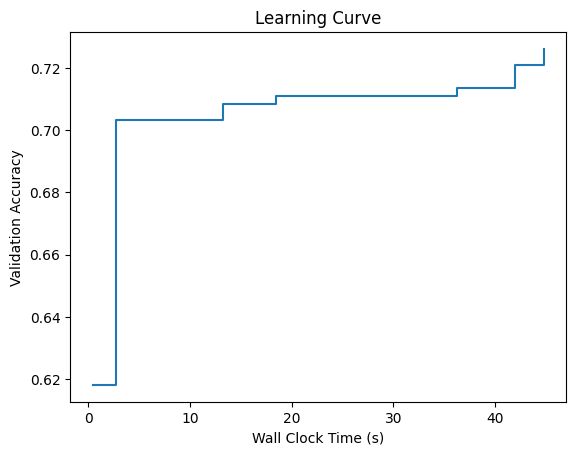

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels    ', y_train)

Predicted labels [0 0 0 0 0 0 1 2 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 2 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 2 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 2 0 0 0 0 1 0 0 0 0 1 2
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0
 0 0 0 0 1 0 0 2 0 0 1 0 0 1 0 0 3 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1]
-------------------------------------------------------------------------------
True labels     [0 0 0 0 0 0 1 2 0 0 1 1 0 0 3 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 1 2 0 1
 0 0 0 0 0 0 2 1 0 2 0 0 1 0 2 0 0 0 0 0

In [ ]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.8763157894736842
log_loss = 0.48934554133399477


In [ ]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 1 2 1 0 0 0 2 0 0 0 0 0 0 2 0 2 2 0 1 1 1 2 1 0 1 3 0 0 0 0 0 0 1 0 0
 1 2 0 1 0 0 2 0 0 1 0 0 2 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [ ]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.648936170212766
log_loss = 0.7651174475960866


In [ ]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [ ]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == "Evan Engram"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Evan Engram"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS       Tgt       Rec     Ctch%  \
488 -1.126539  0.072164  0.379943  0.904425  1.091897  0.918146 -0.450005   

          Yds       Y/R        TD  ...       Lng    Y/Tgt       R/G       Fmb  \
488  0.531051 -0.119491  0.481119  ...  0.160663 -0.42179  0.900075  1.179875   

     Rookie  Vet  Con_Len     Con_Sal    PerCap  Con_Yrs_Lft  
488     1.0  0.0      4.0  10718304.0  0.014683            0  

[1 rows x 21 columns]
####################### ACTUAL LENGTH #######################
          Player  New_Con_Len
564  Evan Engram            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [1]


### **Classification For Contract Length TE 1.1 (AutoML)**

In [553]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [554]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:29:47] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 23:29:47] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 23:29:47] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 3 augmented from 2 to 20


[flaml.automl.logger: 04-20 23:29:47] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 23:29:47] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 23:29:47] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:29:48] {2336} INFO - Estimated sufficient time budget=11075s. Estimated necessary time budget=255s.
[flaml.automl.logger: 04-20 23:29:48] {2383} INFO -  at 1.2s,	estimator lgbm's best error=0.3819,	best estimator lgbm's best error=0.3819
[flaml.automl.logger: 04-20 23:29:48] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:29:49] {2383} INFO -  at 2.4s,	estimator lgbm's best error=0.3819,	best estimator lgbm's best error=0.3819
[flaml.automl.logger: 04-20 23:29:49] {2210} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 04-20 23:29:51] {2383} INFO -  at 3.6s,	estimator lgbm's best error=0.29

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:29:53] {2383} INFO -  at 5.6s,	estimator xgboost's best error=0.3115,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:29:53] {2210} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 04-20 23:29:55] {2383} INFO -  at 7.7s,	estimator lgbm's best error=0.2966,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:29:55] {2210} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 04-20 23:29:56] {2383} INFO -  at 9.0s,	estimator lgbm's best error=0.2966,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:29:56] {2210} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-20 23:29:57] {2383} INFO -  at 10.2s,	estimator lgbm's best error=0.2966,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:29:57] {2210} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 04-20 23:29:58] {2383} INFO -  at 11.0s,	estimator lgbm's best error=0.2966,	b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:29:59] {2383} INFO -  at 12.3s,	estimator xgboost's best error=0.3115,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:29:59] {2210} INFO - iteration 10, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.logger: 04-20 23:30:00] {2383} INFO -  at 13.1s,	estimator xgboost's best error=0.3041,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:00] {2210} INFO - iteration 11, current learner extra_tree
[flaml.automl.logger: 04-20 23:30:00] {2383} INFO -  at 13.3s,	estimator extra_tree's best error=0.3794,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:00] {2210} INFO - iteration 12, current learner extra_tree
[flaml.automl.logger: 04-20 23:30:01] {2383} INFO -  at 13.5s,	estimator extra_tree's best error=0.3743,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:01] {2210} INFO - iteration 13, current learner rf
[flaml.automl.logger: 04-20 23:30:01] {2383} INFO -  at 13.7s,	estimator rf's best error=0.3466,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:01] {2210} INFO - iteration 14, current learner rf
[flaml.automl.logger: 04-20 23:30:01] {2383} INFO -  at 13.8s,	estimator rf

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:03] {2383} INFO -  at 15.6s,	estimator xgboost's best error=0.2989,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:03] {2210} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 04-20 23:30:03] {2383} INFO -  at 16.4s,	estimator lgbm's best error=0.2966,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:03] {2210} INFO - iteration 19, current learner rf
[flaml.automl.logger: 04-20 23:30:04] {2383} INFO -  at 16.6s,	estimator rf's best error=0.3466,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:04] {2210} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-20 23:30:04] {2383} INFO -  at 16.8s,	estimator rf's best error=0.3366,	best estimator lgbm's best error=0.2966
[flaml.automl.logger: 04-20 23:30:04] {2210} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:07] {2383} INFO -  at 19.9s,	estimator xgboost's best error=0.2915,	best estimator xgboost's best error=0.2915
[flaml.automl.logger: 04-20 23:30:07] {2210} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 04-20 23:30:08] {2383} INFO -  at 20.7s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2915
[flaml.automl.logger: 04-20 23:30:08] {2210} INFO - iteration 23, current learner rf
[flaml.automl.logger: 04-20 23:30:08] {2383} INFO -  at 21.0s,	estimator rf's best error=0.3366,	best estimator xgboost's best error=0.2915
[flaml.automl.logger: 04-20 23:30:08] {2210} INFO - iteration 24, current learner extra_tree
[flaml.automl.logger: 04-20 23:30:08] {2383} INFO -  at 21.3s,	estimator extra_tree's best error=0.3743,	best estimator xgboost's best error=0.2915
[flaml.automl.logger: 04-20 23:30:08] {2210} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 04-20 23:30:09] {2383} INFO -  at 21.5s,	esti

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:10] {2383} INFO -  at 22.9s,	estimator xgboost's best error=0.2915,	best estimator xgboost's best error=0.2915
[flaml.automl.logger: 04-20 23:30:10] {2210} INFO - iteration 27, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:10] {2383} INFO -  at 23.1s,	estimator extra_tree's best error=0.3568,	best estimator xgboost's best error=0.2915
[flaml.automl.logger: 04-20 23:30:10] {2210} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:12] {2383} INFO -  at 25.2s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:12] {2210} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:14] {2383} INFO -  at 27.1s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:14] {2210} INFO - iteration 30, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:15] {2383} INFO -  at 27.7s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:15] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 23:30:16] {2383} INFO -  at 28.7s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:16] {2210} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 04-20 23:30:17] {2383} INFO -  at 30.4s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:17] {2210} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:20] {2383} INFO -  at 33.2s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:20] {2210} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 04-20 23:30:21] {2383} INFO -  at 34.1s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:21] {2210} INFO - iteration 35, current learner rf
[flaml.automl.logger: 04-20 23:30:21] {2383} INFO -  at 34.4s,	estimator rf's best error=0.3366,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:21] {2210} INFO - iteration 36, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:25] {2383} INFO -  at 37.7s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:25] {2210} INFO - iteration 37, current learner rf
[flaml.automl.logger: 04-20 23:30:25] {2383} INFO -  at 37.9s,	estimator rf's best error=0.3366,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:25] {2210} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:26] {2383} INFO -  at 39.3s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:26] {2210} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 04-20 23:30:27] {2383} INFO -  at 40.3s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:27] {2210} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:29] {2383} INFO -  at 42.0s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:29] {2210} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:33] {2383} INFO -  at 45.8s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:33] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 23:30:35] {2383} INFO -  at 47.7s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:35] {2210} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:36] {2383} INFO -  at 49.4s,	estimator xgboost's best error=0.2890,	best estimator xgboost's best error=0.2890
[flaml.automl.logger: 04-20 23:30:36] {2210} INFO - iteration 44, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:39] {2383} INFO -  at 51.8s,	estimator xgboost's best error=0.2865,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:39] {2210} INFO - iteration 45, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:42] {2383} INFO -  at 54.8s,	estimator xgboost's best error=0.2865,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:42] {2210} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 04-20 23:30:42] {2383} INFO -  at 55.2s,	estimator lgbm's best error=0.2966,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:42] {2210} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:46] {2383} INFO -  at 59.0s,	estimator xgboost's best error=0.2865,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:46] {2210} INFO - iteration 48, current learner rf
[flaml.automl.logger: 04-20 23:30:46] {2383} INFO -  at 59.4s,	estimator rf's best error=0.3366,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:46] {2210} INFO - iteration 49, current learner rf
[flaml.automl.logger: 04-20 23:30:47] {2383} INFO -  at 59.6s,	estimator rf's best error=0.3141,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:47] {2210} INFO - iteration 50, current learner rf
[flaml.automl.logger: 04-20 23:30:47] {2383} INFO -  at 59.8s,	estimator rf's best error=0.3141,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:47] {2210} INFO - iteration 51, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:47] {2383} INFO -  at 60.3s,	estimator xgb_limitdepth's best error=0.3500,	best estimator xgboost's best error=0.2865
[flaml.automl.logger: 04-20 23:30:48] {2619} INFO - retrain xgboost for 0.2s


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:30:48] {2622} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.8182737361783601, colsample_bynode=None,
              colsample_bytree=0.9550797698873387, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1781210068111563, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=4,
              min_child_weight=0.9880058557924695, missing=nan,
              monotone_constraints=None, n_estimators=13, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)
[flaml.automl.logger: 04-20 23:30:48] {1930} INFO - fit succeeded
[flaml.automl.logger: 04

In [555]:
'''
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")
'''

'\n#pickle and save the automl object\ndef saveModel(automl, versionNum):\n  verNum = str(versionNum)\n  with open(\'ConLenModel_\'+verNum+\'.pkl\', \'wb\') as f:\n    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)\n\n#saveModel(automl, "") #Most recently saved version: 1.0\n\n#load pickled automl object\ndef loadModel(model_num): #input model_num as string\n  with open(model_num, \'rb\') as f:\n    automl = pickle.load(f)\n  return automl\n\n#automl = loadModel("")\n'

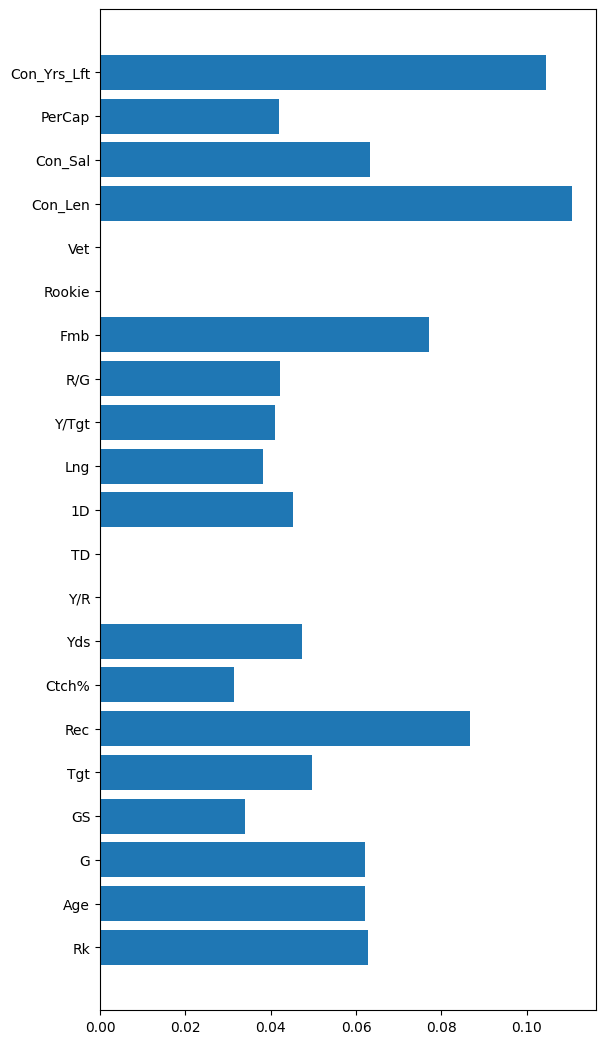

[{'Rk': 0.062777079641819, 'Age': 0.0620913952589035, 'G': 0.06220092251896858, 'GS': 0.034004442393779755, 'Tgt': 0.04957570880651474, 'Rec': 0.08678483217954636, 'Ctch%': 0.03129824250936508, 'Yds': 0.04732765257358551, 'Y/R': 0.0, 'TD': 0.0, '1D': 0.04522620514035225, 'Lng': 0.03828747197985649, 'Y/Tgt': 0.04111730679869652, 'R/G': 0.04211391881108284, 'Fmb': 0.07700329273939133, 'Rookie': 0.0, 'Vet': 0.0, 'Con_Len': 0.11067140102386475, 'Con_Sal': 0.06315575540065765, 'PerCap': 0.04195959493517876, 'Con_Yrs_Lft': 0.10440480709075928}]


In [556]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 21))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [557]:
# Find Best Estimator
print(automl.best_estimator)

xgboost


In [558]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 13, 'max_leaves': 4, 'min_child_weight': 0.9880058557924695, 'learning_rate': 0.1781210068111563, 'subsample': 0.9919453374551938, 'colsample_bylevel': 0.8182737361783601, 'colsample_bytree': 0.9550797698873387, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.14367754153089285}


In [559]:
# Find best r2
print(1-automl.best_loss)

0.7135126582278482


In [560]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.29661392405063297, 'rf': 0.3140822784810126, 'xgboost': 0.2864873417721519, 'extra_tree': 0.3567721518987342, 'xgb_limitdepth': 0.35, 'lrl1': inf}


In [561]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00021894169004657598, 'wall_clock_time': 51.771783113479614, 'metric_for_logging': {'pred_time': 0.00021894169004657598, 'train_loss': 0.1897044616628221}, 'val_loss': 0.2864873417721519, 'training_iteration': 1, 'config': {'n_estimators': 13, 'max_leaves': 4, 'min_child_weight': 0.9880058557924695, 'learning_rate': 0.1781210068111563, 'subsample': 0.9919453374551938, 'colsample_bylevel': 0.8182737361783601, 'colsample_bytree': 0.9550797698873387, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.14367754153089285}, 'config/n_estimators': 13, 'config/max_leaves': 4, 'config/min_child_weight': 0.9880058557924695, 'config/learning_rate': 0.1781210068111563, 'config/subsample': 0.9919453374551938, 'config/colsample_bylevel': 0.8182737361783601, 'config/colsample_bytree': 0.9550797698873387, 'config/reg_alpha': 0.0009765625, 'config/reg_lambda': 0.14367754153089285, 'experiment_tag': 'exp', 'time_total_s': 2.370145797729492}


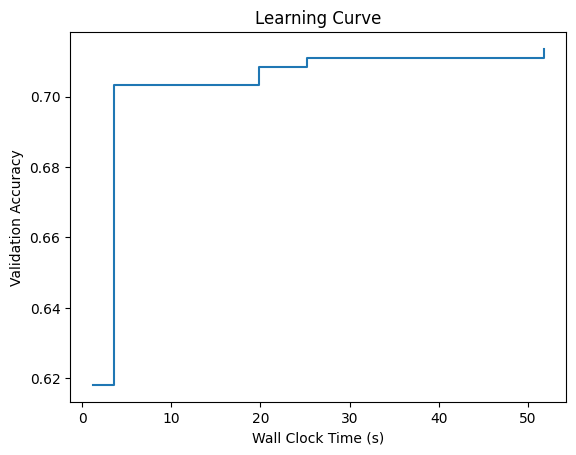

In [562]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [563]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels    ', y_train)

Predicted labels [0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 2 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0
 0 0 0 0 1 0 0 2 0 0 1 0 1 1 0 0 3 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0]
-------------------------------------------------------------------------------
True labels     [0 0 0 0 0 0 1 2 0 0 1 1 0 0 3 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 1 2 0 1
 0 0 0 0 0 0 2 1 0 2 0 0 1 0 2 0 0 0 0 0

In [564]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.7736842105263158
log_loss = 0.6531220422026343


In [565]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 2 2 2 0 0 0 1 2 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 3 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1]
-------------------------------------------------------------------------------
True labels      [0 0 1 2 1 0 0 0 2 0 0 0 0 0 0 2 0 2 2 0 1 1 1 2 1 0 1 3 0 0 0 0 0 0 1 0 0
 1 2 0 1 0 0 2 0 0 1 0 0 2 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [566]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.648936170212766
log_loss = 0.7441254278050217


In [567]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [569]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == "Josh Oliver"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Josh Oliver"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
          Rk       Age         G        GS       Tgt       Rec     Ctch%  \
531  0.47148 -0.878516  0.111592 -1.358675 -0.596681 -0.657204 -0.647559   

          Yds       Y/R        TD  ...       Lng     Y/Tgt       R/G  \
531 -0.688195 -0.637178 -0.832207  ... -0.553324 -0.934537 -0.751589   

          Fmb  Rookie  Vet  Con_Len    Con_Sal    PerCap  Con_Yrs_Lft  
531  1.179875     1.0  0.0      4.0  4250844.0  0.005823            2  

[1 rows x 21 columns]
####################### ACTUAL LENGTH #######################
          Player  New_Con_Len
614  Josh Oliver            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0]


### **Classification For Contract Length TE FINAL (AutoML)**

In [588]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
y_train = feeder_train['New_Con_Len']
y_test = feeder_test['New_Con_Len']
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'TD', 'Y/R', 'Con_Sal', 'R/G', 'Rec', 'G'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'TD', 'Y/R', 'Con_Sal', 'R/G', 'Rec', 'G'], axis=1)

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'classification')
X_test, y_test = dtrans.fit_transform(X_test, y_test, 'classification')

In [589]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'multiclass',
    "metric": "accuracy",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_ConLen.log",
    #"max_iter": 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:37:53] {1682} INFO - task = multiclass
[flaml.automl.logger: 04-20 23:37:53] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-20 23:37:53] {1692} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:class 3 augmented from 2 to 20


[flaml.automl.logger: 04-20 23:37:53] {1790} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-20 23:37:53] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-20 23:37:53] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:37:53] {2336} INFO - Estimated sufficient time budget=2890s. Estimated necessary time budget=67s.
[flaml.automl.logger: 04-20 23:37:53] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.3819,	best estimator lgbm's best error=0.3819
[flaml.automl.logger: 04-20 23:37:53] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:37:54] {2383} INFO -  at 1.4s,	estimator lgbm's best error=0.3819,	best estimator lgbm's best error=0.3819
[flaml.automl.logger: 04-20 23:37:54] {2210} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:37:56] {2383} INFO -  at 3.2s,	estimator xgboost's best error=0.3216,	best estimator xgboost's best error=0.3216
[flaml.automl.logger: 04-20 23:37:56] {2210} INFO - iteration 3, current learner extra_tree
[flaml.automl.logger: 04-20 23:37:56] {2383} INFO -  at 3.3s,	estimator extra_tree's best error=0.3819,	best estimator xgboost's best error=0.3216
[flaml.automl.logger: 04-20 23:37:56] {2210} INFO - iteration 4, current learner extra_tree
[flaml.automl.logger: 04-20 23:37:56] {2383} INFO -  at 3.5s,	estimator extra_tree's best error=0.3745,	best estimator xgboost's best error=0.3216
[flaml.automl.logger: 04-20 23:37:56] {2210} INFO - iteration 5, current learner rf
[flaml.automl.logger: 04-20 23:37:56] {2383} INFO -  at 3.7s,	estimator rf's best error=0.3441,	best estimator xgboost's best error=0.3216
[flaml.automl.logger: 04-20 23:37:56] {2210} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 04-20 23:37:57] {2383} INFO -  at 4.6s,	estimat

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:02] {2383} INFO -  at 9.6s,	estimator xgboost's best error=0.3216,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:02] {2210} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 04-20 23:38:03] {2383} INFO -  at 10.1s,	estimator lgbm's best error=0.2940,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:03] {2210} INFO - iteration 17, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:03] {2383} INFO -  at 10.4s,	estimator extra_tree's best error=0.3745,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:03] {2210} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 04-20 23:38:03] {2383} INFO -  at 10.7s,	estimator lgbm's best error=0.2940,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:03] {2210} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:05] {2383} INFO -  at 11.8s,	estimator xgboost's best error=0.3216,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:05] {2210} INFO - iteration 20, current learner rf
[flaml.automl.logger: 04-20 23:38:05] {2383} INFO -  at 12.0s,	estimator rf's best error=0.3441,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:05] {2210} INFO - iteration 21, current learner rf
[flaml.automl.logger: 04-20 23:38:05] {2383} INFO -  at 12.2s,	estimator rf's best error=0.3441,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:05] {2210} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 04-20 23:38:06] {2383} INFO -  at 12.8s,	estimator lgbm's best error=0.2940,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:06] {2210} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 04-20 23:38:06] {2383} INFO -  at 13.0s,	estimator lgbm's best error=0.2940,	be

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:06] {2383} INFO -  at 13.4s,	estimator xgboost's best error=0.3216,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:06] {2210} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:06] {2383} INFO -  at 13.6s,	estimator extra_tree's best error=0.3593,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:06] {2210} INFO - iteration 26, current learner rf
[flaml.automl.logger: 04-20 23:38:07] {2383} INFO -  at 13.8s,	estimator rf's best error=0.3441,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:07] {2210} INFO - iteration 27, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:08] {2383} INFO -  at 15.6s,	estimator xgboost's best error=0.3090,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:08] {2210} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:09] {2383} INFO -  at 15.8s,	estimator extra_tree's best error=0.3467,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:09] {2210} INFO - iteration 29, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:09] {2383} INFO -  at 16.1s,	estimator extra_tree's best error=0.3467,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:09] {2210} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 04-20 23:38:10] {2383} INFO -  at 16.9s,	estimator lgbm's best error=0.2940,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:10] {2210} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 04-20 23:38:10] {2383} INFO -  at 17.1s,	estima

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:14] {2383} INFO -  at 21.1s,	estimator xgboost's best error=0.3090,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:14] {2210} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 04-20 23:38:15] {2383} INFO -  at 22.6s,	estimator lgbm's best error=0.2940,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:15] {2210} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:17] {2383} INFO -  at 24.3s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:17] {2210} INFO - iteration 41, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:17] {2383} INFO -  at 24.5s,	estimator extra_tree's best error=0.3418,	best estimator lgbm's best error=0.2940
[flaml.automl.logger: 04-20 23:38:17] {2210} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 04-20 23:38:18] {2383} INFO -  at 25.0s,	estimator lgbm's best error=0.2840,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:18] {2210} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:21] {2383} INFO -  at 28.2s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:21] {2210} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:21] {2383} INFO -  at 28.4s,	estimator extra_tree's best error=0.3418,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:21] {2210} INFO - iteration 45, current learner rf
[flaml.automl.logger: 04-20 23:38:21] {2383} INFO -  at 28.6s,	estimator rf's best error=0.3317,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:21] {2210} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 04-20 23:38:22] {2383} INFO -  at 29.4s,	estimator lgbm's best error=0.2840,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:22] {2210} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:25] {2383} INFO -  at 31.9s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:25] {2210} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 04-20 23:38:26] {2383} INFO -  at 32.8s,	estimator lgbm's best error=0.2840,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:26] {2210} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 04-20 23:38:27] {2383} INFO -  at 34.4s,	estimator lgbm's best error=0.2840,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:27] {2210} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:27] {2383} INFO -  at 34.7s,	estimator extra_tree's best error=0.3242,	best estimator lgbm's best error=0.2840
[flaml.automl.logger: 04-20 23:38:27] {2210} INFO - iteration 51, current learner rf
[flaml.automl.logger: 04-20 23:38:28] {2383} INFO -  at 35.3s,	estimator rf's best 

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 04-20 23:38:43] {2383} INFO -  at 50.3s,	estimator xgboost's best error=0.3065,	best estimator lgbm's best error=0.2839
[flaml.automl.logger: 04-20 23:38:43] {2210} INFO - iteration 71, current learner rf
[flaml.automl.logger: 04-20 23:38:43] {2383} INFO -  at 50.6s,	estimator rf's best error=0.3317,	best estimator lgbm's best error=0.2839
[flaml.automl.logger: 04-20 23:38:43] {2210} INFO - iteration 72, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:44] {2383} INFO -  at 50.8s,	estimator extra_tree's best error=0.3090,	best estimator lgbm's best error=0.2839
[flaml.automl.logger: 04-20 23:38:44] {2210} INFO - iteration 73, current learner rf
[flaml.automl.logger: 04-20 23:38:44] {2383} INFO -  at 51.0s,	estimator rf's best error=0.3317,	best estimator lgbm's best error=0.2839
[flaml.automl.logger: 04-20 23:38:44] {2210} INFO - iteration 74, current learner extra_tree
[flaml.automl.logger: 04-20 23:38:44] {2383} INFO -  at 51.3s,	estimator extra_tree

In [604]:
#pickle and save the automl object
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('ConLenModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "TEclassFinal") #Most recently saved version: 1.0

#load pickled automl object
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl

#automl = loadModel("")

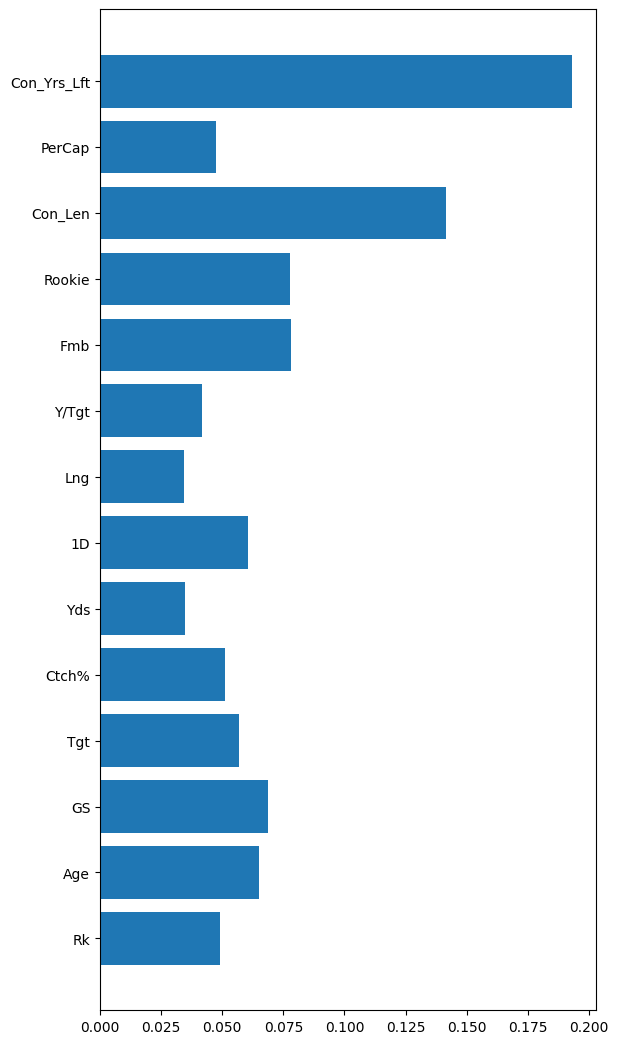

[{'Rk': 0.04892913244880276, 'Age': 0.0651589001373554, 'GS': 0.06856811784321998, 'Tgt': 0.05703512741020554, 'Ctch%': 0.05102184347064515, 'Yds': 0.0349340434600173, '1D': 0.06035419120876259, 'Lng': 0.03441250713516701, 'Y/Tgt': 0.04161325767249686, 'Fmb': 0.07813843041459984, 'Rookie': 0.07769268014715981, 'Con_Len': 0.14142395382352044, 'PerCap': 0.04749518328252326, 'Con_Yrs_Lft': 0.19322263154552405}]


In [591]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 14))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [592]:
# Find Best Estimator
print(automl.best_estimator)

extra_tree


In [593]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 16, 'max_features': 0.5908962029577615, 'max_leaves': 42, 'criterion': 'gini'}


In [594]:
# Find best r2
print(1-automl.best_loss)

0.7461708860759494


In [595]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.2839240506329114, 'rf': 0.3316772151898734, 'xgboost': 0.3064873417721518, 'extra_tree': 0.2538291139240506, 'xgb_limitdepth': inf, 'lrl1': inf}


In [596]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00010311032397837579, 'wall_clock_time': 51.71782565116882, 'metric_for_logging': {'pred_time': 0.00010311032397837579, 'train_loss': 0.09483842984168292}, 'val_loss': 0.2538291139240506, 'training_iteration': 1, 'config': {'n_estimators': 16, 'max_features': 0.5908962029577615, 'max_leaves': 42, 'criterion': 'gini'}, 'config/n_estimators': 16, 'config/max_features': 0.5908962029577615, 'config/max_leaves': 42, 'config/criterion': 'gini', 'experiment_tag': 'exp', 'time_total_s': 0.3648040294647217}


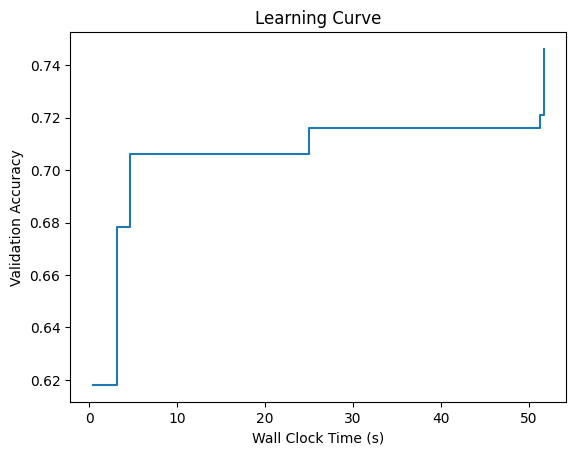

In [597]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [598]:
# Predict on Train set
y_pred = automl.predict(X_train)
y_pred_proba = automl.predict_proba(X_train)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels    ', y_train)

Predicted labels [0 0 0 0 0 0 0 2 0 0 1 1 0 0 3 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 1 0 2 0 0 0 0 0 1 0 0 0 0 1 1 2 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 2 0 0 0 0 1 0 0 0 0 1 2
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 1 0 0 2 0 0 1 0 0 1 0 0 3 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 1]
-------------------------------------------------------------------------------
True labels     [0 0 0 0 0 0 1 2 0 0 1 1 0 0 3 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 1 2 0 1
 0 0 0 0 0 0 2 1 0 2 0 0 1 0 2 0 0 0 0 0

In [599]:
# Check Train evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_train))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_train))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_train))

accuracy = 0.8631578947368421
log_loss = 0.39028252987392315


In [600]:
# Predict on Test set
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)
print('Predicted labels', y_pred)
print('-------------------------------------------------------------------------------')
print('True labels     ', y_test)

Predicted labels [0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 0 0 0 2 2 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
-------------------------------------------------------------------------------
True labels      [0 0 1 2 1 0 0 0 2 0 0 0 0 0 0 2 0 2 2 0 1 1 1 2 1 0 1 3 0 0 0 0 0 0 1 0 0
 1 2 0 1 0 0 2 0 0 1 0 0 2 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [601]:
# Check Test evaluation metrics
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
#print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6808510638297872
log_loss = 0.6730969051264387


In [602]:
'''
#Plot Regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()
'''

'\n#Plot Regression\nplt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")\nplt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n'

In [603]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == "Mike Gesicki"]
targets = feeder_test['New_Con_Len']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'Year', 'Cap', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                             'Vet', 'TD', 'Y/R', 'Con_Sal', 'R/G', 'Rec', 'G'], axis=1)
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Mike Gesicki"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Con_Len']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age        GS      Tgt     Ctch%       Yds        1D  \
471 -1.520571 -0.244729  0.287216  2.22732 -0.305132  1.857248  1.801001   

          Lng     Y/Tgt       Fmb  Rookie  Con_Len    PerCap  Con_Yrs_Lft  
471  0.809743  0.176416 -0.547188     1.0      4.0  0.009057            0  
####################### ACTUAL LENGTH #######################
           Player  New_Con_Len
588  Mike Gesicki            0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [2]


## **Percent of Cap $\checkmark$**

### **Regression For Percent Of Cap TE 1.0 (AutoML)**



In [605]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [606]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:43:32] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 23:43:32] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 23:43:32] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 23:43:32] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 23:43:32] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 23:43:32] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:43:32] {2336} INFO - Estimated sufficient time budget=1022s. Estimated necessary time budget=7s.
[flaml.automl.logger: 04-20 23:43:32] {2383} INFO -  at 0.2s,	estimator lgbm's best error=0.7748,	best estimator lgbm's best error=0.7748
[flaml.automl.logger: 04-20 23:43:32] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:43:32] {2383} INFO -  at 0.5s,	estimator lgbm's best error=0.7748,	best estimator

In [607]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

#saveModel(automl, "1.0") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

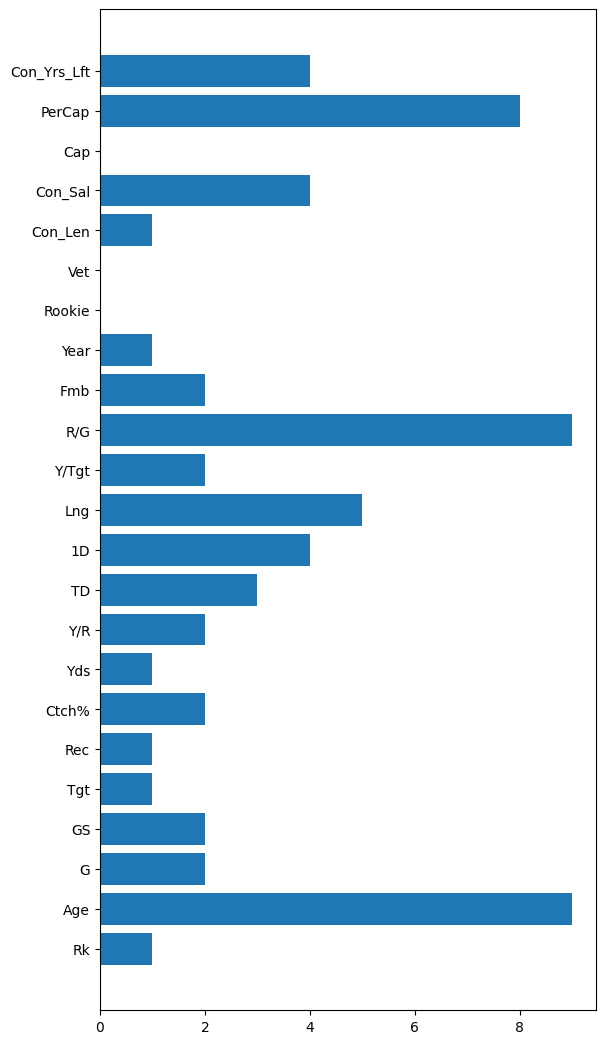

[{'Rk': 1, 'Age': 9, 'G': 2, 'GS': 2, 'Tgt': 1, 'Rec': 1, 'Ctch%': 2, 'Yds': 1, 'Y/R': 2, 'TD': 3, '1D': 4, 'Lng': 5, 'Y/Tgt': 2, 'R/G': 9, 'Fmb': 2, 'Year': 1, 'Rookie': 0, 'Vet': 0, 'Con_Len': 1, 'Con_Sal': 4, 'Cap': 0, 'PerCap': 8, 'Con_Yrs_Lft': 4}]


In [608]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 23))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [609]:
# Find Best Estimator
print(automl.best_estimator)

lgbm


In [610]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 16, 'num_leaves': 5, 'min_child_samples': 3, 'learning_rate': 0.4168563839594049, 'log_max_bin': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.004577823970660193, 'reg_lambda': 9.232413421387225}


In [611]:
# Find best r2
print(1-automl.best_loss)

0.5204522618839192


In [612]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.47954773811608076, 'rf': 0.4919272792739696, 'xgboost': 0.6436584218913811, 'extra_tree': 0.5094221919577674, 'xgb_limitdepth': 117.42196548038834}


In [613]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00011144060837595086, 'wall_clock_time': 54.17262101173401, 'metric_for_logging': {'pred_time': 0.00011144060837595086, 'train_loss': 0.15731958921350583}, 'val_loss': 0.47954773811608076, 'training_iteration': 1, 'config': {'n_estimators': 16, 'num_leaves': 5, 'min_child_samples': 3, 'learning_rate': 0.4168563839594049, 'log_max_bin': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.004577823970660193, 'reg_lambda': 9.232413421387225}, 'config/n_estimators': 16, 'config/num_leaves': 5, 'config/min_child_samples': 3, 'config/learning_rate': 0.4168563839594049, 'config/log_max_bin': 10, 'config/colsample_bytree': 1.0, 'config/reg_alpha': 0.004577823970660193, 'config/reg_lambda': 9.232413421387225, 'experiment_tag': 'exp', 'time_total_s': 1.0332517623901367}


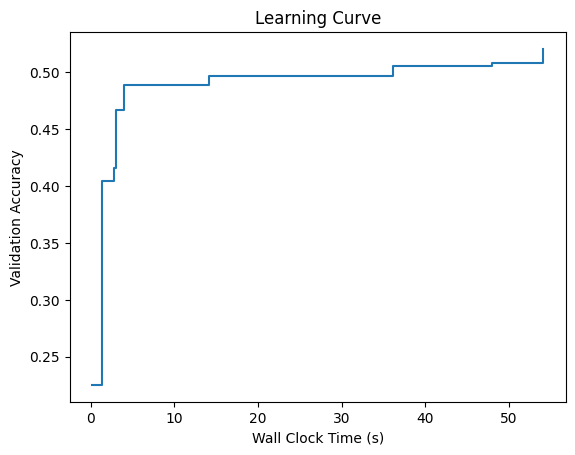

In [614]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [615]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.05438323 0.04055058 0.05098104 0.02495743 0.05499667 0.01165956
 0.0353498  0.05053335 0.03906027 0.03185031 0.02229505 0.02934641
 0.04832722 0.00831178 0.03716736 0.01034767 0.02793969 0.00650543
 0.01256717 0.01500404 0.01165934 0.01197818 0.02932931 0.00876694
 0.00994873 0.01540075 0.0108846  0.00504707 0.04252112 0.01285016
 0.00336272 0.00623784 0.02293013 0.01318943 0.02176818 0.01926975
 0.01201373 0.01103122 0.0028302  0.0062006  0.01239424 0.00525072
 0.00255383 0.00757521 0.02756847 0.00530274 0.01077786 0.02456595
 0.00583718 0.01435555 0.01436309 0.01335022 0.02765465 0.00543173
 0.00717164 0.01345726 0.00489845 0.00445255 0.00606386 0.01293868
 0.0034136  0.00780238 0.02129607 0.0034136  0.00244554 0.00259617
 0.00306839 0.00879039 0.00688797 0.00384432 0.00223312 0.00683334
 0.00406637 0.00421958 0.00295112 0.00256646 0.0200877  0.00685903
 0.00143893 0.00349633 0.00143893 0.00471883 0.00687429 0.00383681
 0.00143893 0.0066807  0.0034136  0.00302476 

In [616]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.821002920985727
mse = 5.136295362853627e-05
mae = 0.005011153724580713


In [617]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.06121796 0.04171213 0.04207932 0.04444311 0.03824685 0.04592028
 0.01765267 0.02250042 0.03912065 0.04522788 0.03447627 0.01194294
 0.01097187 0.04974316 0.04180948 0.03963393 0.04583394 0.03694838
 0.03428749 0.02902547 0.03455208 0.0231355  0.04273266 0.01917575
 0.01541112 0.00785    0.01094183 0.02618563 0.01111208 0.00677514
 0.03327219 0.04251917 0.00851092 0.0074321  0.01500223 0.0100234
 0.00957094 0.00850574 0.01139896 0.00985695 0.00868015 0.01169799
 0.00817177 0.0129667  0.00726984 0.00427866 0.01014753 0.008547
 0.01275116 0.0087704  0.01724718 0.00595732 0.01058681 0.01595304
 0.01959267 0.01675541 0.00609786 0.00851464 0.01175402 0.0037056
 0.02129607 0.00849309 0.00385878 0.00201814 0.00483057 0.00646014
 0.00383681 0.00617396 0.00543825 0.00143893 0.00143893 0.01022498
 0.00888457 0.00360462 0.00143893 0.00176022 0.00247605 0.00843326
 0.00445255 0.00683334 0.00143893 0.00244554 0.00338721 0.00409866
 0.01030807 0.00417361 0.00486539 0.01283039 0.00

In [618]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.6208104792630428
mse = 0.0001797463588145652
mae = 0.009423677852642025


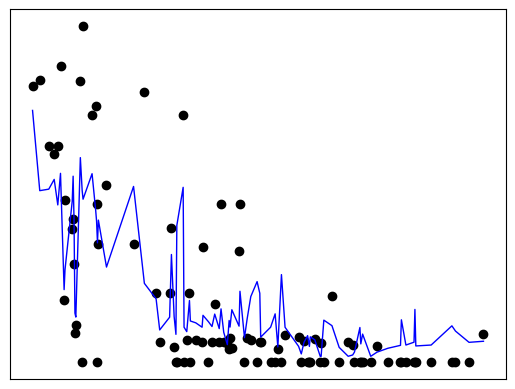

In [619]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [620]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == "Mike Gesicki"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con'], axis=1)
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Mike Gesicki"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
           Rk       Age         G        GS      Tgt       Rec     Ctch%  \
471 -1.520571 -0.244729  0.916646  0.287216  2.22732  2.067726 -0.305132   

          Yds       Y/R        TD  ...       R/G       Fmb  Year  Rookie  Vet  \
471  1.857248  0.462907  0.043344  ...  1.692874 -0.547188  2021     1.0  0.0   

     Con_Len    Con_Sal          Cap    PerCap  Con_Yrs_Lft  
471      4.0  6611924.0  182500000.0  0.009057            0  

[1 rows x 23 columns]
####################### ACTUAL LENGTH #######################
           Player  New_Perc_Cap
588  Mike Gesicki           0.0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0.03824685]


### **Regression For Percent Of Cap TE FINAL (AutoML)**



In [641]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/TEdf.csv")

#Split into a train and test set 
feeder_train = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_train = feeder_train[feeder_train.Year < 2021]
feeder_train = feeder_train[feeder_train.Year != 2016]
#feeder_train = feeder_train[feeder_train.PerCap >= 0.07]
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
#feeder_test = feeder_test[feeder_test.PerCap >= 0.07]

# Initialize a data transformer
dtrans = DataTransformer()

#Split into train and test set
X_train = feeder_train.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                          'Cap', 'Vet', 'Con_Len', 'Fmb', 'Y/Tgt', 'Y/R', 'Rec', 'GS', 'G', 'Rk'], axis=1)
X_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                          'Cap', 'Vet', 'Con_Len', 'Fmb', 'Y/Tgt', 'Y/R', 'Rec', 'GS', 'G', 'Rk'], axis=1)
y_train = feeder_train['New_Perc_Cap']
y_test = feeder_test['New_Perc_Cap']

#Transform Data for Regression
X_train, y_train = dtrans.fit_transform(X_train, y_train, 'regression')

In [642]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_PercCap.log",
    #'max_iter': 2,
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-20 23:50:51] {1682} INFO - task = regression
[flaml.automl.logger: 04-20 23:50:51] {1689} INFO - Data split method: uniform
[flaml.automl.logger: 04-20 23:50:51] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 04-20 23:50:51] {1790} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 04-20 23:50:51] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-20 23:50:51] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-20 23:50:51] {2336} INFO - Estimated sufficient time budget=3055s. Estimated necessary time budget=22s.
[flaml.automl.logger: 04-20 23:50:51] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.7704,	best estimator lgbm's best error=0.7704
[flaml.automl.logger: 04-20 23:50:51] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-20 23:50:52] {2383} INFO -  at 0.5s,	estimator lgbm's best error=0.7704,	best estimato

In [658]:
'''pickle and save the automl object'''
def saveModel(automl, versionNum):
  verNum = str(versionNum)
  with open('%CapModel_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

saveModel(automl, "TEregFinal") #Most recently saved version: 1.0

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    automl = pickle.load(f)
  return automl
  
#model = loadModel("")

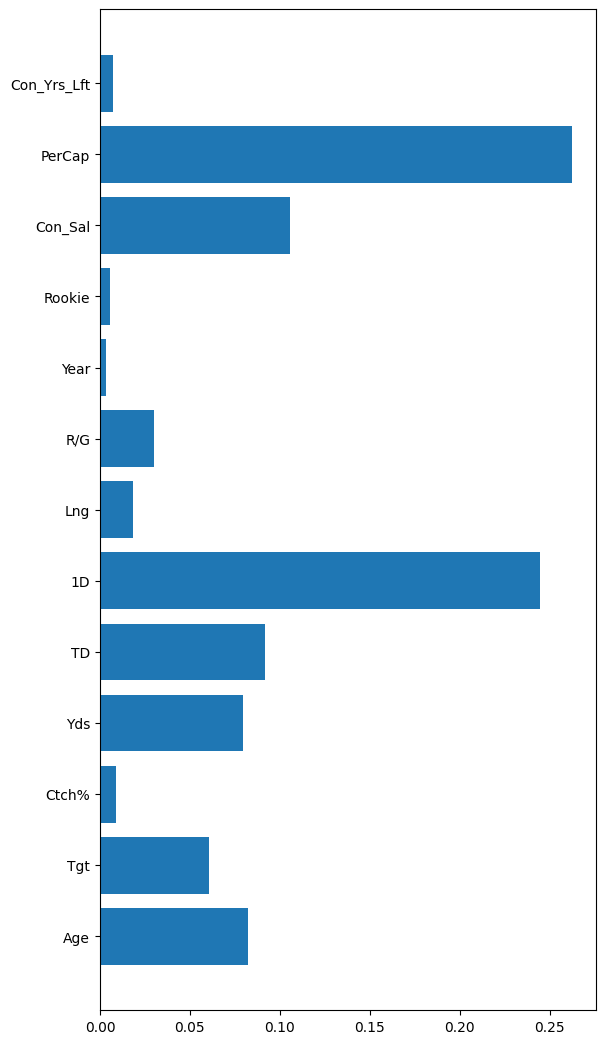

[{'Age': 0.08206758919757232, 'Tgt': 0.06041538288241451, 'Ctch%': 0.008797826254838485, 'Yds': 0.07967096286463302, 'TD': 0.09151736874911623, '1D': 0.24429126569965426, 'Lng': 0.01840263459665519, 'R/G': 0.030219368309457546, 'Year': 0.003568995141115489, 'Rookie': 0.005319990989160449, 'Con_Sal': 0.1058854457772498, 'PerCap': 0.2625385299919673, 'Con_Yrs_Lft': 0.007304639546165343}]


In [645]:
# Check feature importance
x=automl.model.estimator.feature_importances_.reshape((1, 13))
feat_importance = pd.DataFrame(x, columns=X_train.columns)
fi_dict = feat_importance.to_dict(orient='records')
plt.figure().set_figheight(13)
plt.barh(X_train.columns, automl.model.estimator.feature_importances_)
plt.show()
print(fi_dict)

In [646]:
# Find Best Estimator
print(automl.best_estimator)

rf


In [647]:
# Find Best Configuration
print(automl.best_config)

{'n_estimators': 9, 'max_features': 1.0, 'max_leaves': 12}


In [648]:
# Find best r2
print(1-automl.best_loss)

0.531937760506359


In [649]:
# Find Best Lost for each Estimator
print(automl.best_loss_per_estimator)

{'lgbm': 0.4688190946679104, 'rf': 0.468062239493641, 'xgboost': 0.5162092408768494, 'extra_tree': 0.4952962697622135, 'xgb_limitdepth': inf}


In [650]:
# Find results of model with best config
print(automl.best_result)

{'pred_time': 0.00010462434668289987, 'wall_clock_time': 36.97172021865845, 'metric_for_logging': {'pred_time': 0.00010462434668289987, 'train_loss': 0.1969215471101131}, 'val_loss': 0.468062239493641, 'training_iteration': 1, 'config': {'n_estimators': 9, 'max_features': 1.0, 'max_leaves': 12}, 'config/n_estimators': 9, 'config/max_features': 1.0, 'config/max_leaves': 12, 'experiment_tag': 'exp', 'time_total_s': 0.30945754051208496}


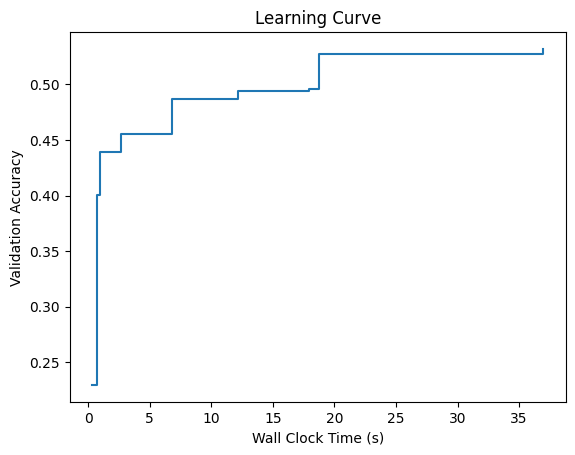

In [651]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [652]:
# Predict on Train set
y_pred = automl.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [0.05061499 0.0390839  0.04618623 0.02974235 0.05116751 0.01969474
 0.03164386 0.04970069 0.04136559 0.03383872 0.02137279 0.01685844
 0.04012846 0.00719532 0.04046216 0.00917628 0.0288502  0.0059994
 0.00791401 0.00847194 0.02070491 0.01015929 0.03300307 0.01264642
 0.00640705 0.01343742 0.017472   0.00436964 0.04720342 0.01220534
 0.00604193 0.00436964 0.02720877 0.012495   0.0142762  0.03115555
 0.00542032 0.012495   0.00469293 0.01245721 0.01042416 0.00839461
 0.00436964 0.00738187 0.03734726 0.00815768 0.01072556 0.03258107
 0.00739161 0.00728267 0.00886097 0.00989432 0.03258107 0.00409865
 0.01450856 0.01131984 0.00840436 0.00869602 0.00469293 0.01072556
 0.00409865 0.00678759 0.03734726 0.00409865 0.00409865 0.00409865
 0.00409865 0.00678759 0.00869602 0.00409865 0.00409865 0.00409865
 0.00788669 0.00409865 0.00409865 0.00409865 0.00982988 0.00930004
 0.00409865 0.00409865 0.00409865 0.00678759 0.00728267 0.00409865
 0.00409865 0.00409865 0.00409865 0.00409865 0

In [653]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.7816700641854563
mse = 6.264946015163478e-05
mae = 0.0051701728007988385


In [654]:
# Predict on Test set
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [0.05828234 0.05317455 0.05732528 0.04062389 0.03221849 0.05523566
 0.0201336  0.02384738 0.03575798 0.04304239 0.02500128 0.0210881
 0.01110995 0.0583558  0.03319146 0.04304239 0.05498921 0.04848305
 0.02941435 0.0262653  0.03068215 0.01675533 0.04927193 0.01486294
 0.00542032 0.00570105 0.0092903  0.03472668 0.00597813 0.00469293
 0.03115555 0.04927193 0.00989432 0.0076626  0.00989432 0.01595574
 0.0076626  0.00469293 0.0092903  0.00859231 0.00787695 0.00989432
 0.00497366 0.00469293 0.00624257 0.00436964 0.00436964 0.0076626
 0.00469293 0.00469293 0.03734726 0.00469293 0.00787695 0.01203521
 0.03483489 0.01072556 0.00469293 0.01335524 0.01072556 0.00409865
 0.02603378 0.00739161 0.00678759 0.00409865 0.00739161 0.00930004
 0.00409865 0.00930004 0.00409865 0.00409865 0.00409865 0.00728267
 0.00930004 0.00409865 0.00409865 0.00409865 0.00409865 0.00728267
 0.00678759 0.00409865 0.00409865 0.00409865 0.00678759 0.00409865
 0.00678759 0.00409865 0.00678759 0.01072556 0.

In [655]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.6374206290524027
mse = 0.00017187268673048598
mae = 0.008786334753069438


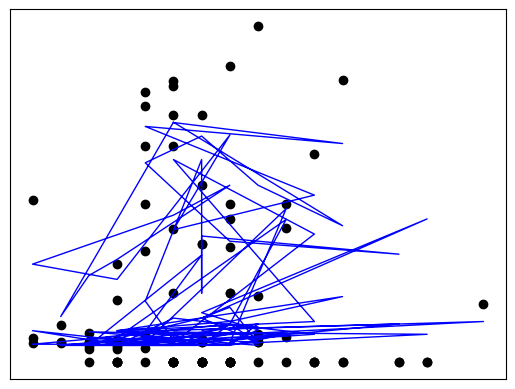

In [656]:
# Plot regression
plt.scatter(X_test.to_numpy()[:,0], y_test.to_numpy(), color="black")
plt.plot(X_test.to_numpy()[:,0], y_pred, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [657]:
# Predict a Current Player
feeder_test = feeder.rename(columns={'%Cap': 'PerCap'})
feeder_test = feeder_test[feeder_test.Year == 2021]
feeder_test = feeder_test[feeder_test.Player == "Mike Gesicki"]
targets = feeder_test['New_Perc_Cap']
feeder_test = feeder_test.drop(['Player', 'Tm', 'Pos', 'New_Con_Len', 'New_Perc_Cap', 'New_Con',
                          'Cap', 'Vet', 'Con_Len', 'Fmb', 'Y/Tgt', 'Y/R', 'Rec', 'GS', 'G', 'Rk'], axis=1)
print('####################### GIVEN YEAR #######################')
print(feeder_test)
df = feeder.rename(columns={'%Cap': 'PerCap'})
df = df[df.Year == 2022]
df = df[df.Player == "Mike Gesicki"]
print('####################### ACTUAL LENGTH #######################')
print(df[['Player', 'New_Perc_Cap']])
y_pred = automl.predict(feeder_test)
print('####################### PREDICTED LENGTH #######################')
print('Predicted New Contract Length', y_pred)

####################### GIVEN YEAR #######################
          Age      Tgt     Ctch%       Yds        TD        1D       Lng  \
471 -0.244729  2.22732 -0.305132  1.857248  0.043344  1.801001  0.809743   

          R/G  Year  Rookie    Con_Sal    PerCap  Con_Yrs_Lft  
471  1.692874  2021     1.0  6611924.0  0.009057            0  
####################### ACTUAL LENGTH #######################
           Player  New_Perc_Cap
588  Mike Gesicki           0.0
####################### PREDICTED LENGTH #######################
Predicted New Contract Length [0.03221849]


## **MultiOutput**

### **MultiOutput Regression TE (AutoML)**

In [ ]:
#Load in Data
feeder = pd.read_csv("../content/TE_data/finalTE.csv")

#Split into a train and test set 
feeder_train = feeder[feeder.Year < 2022]
feeder_train = feeder_train[feeder_train.Year != 2016]
feeder_test = feeder[feeder.Year == 2022]

#Prepare Data for modeling 
players = feeder[['Player']]
feeder_train = feeder_train.drop(['Player', 'Pos'], axis=1)
targets = feeder_train[['New_Con_Len', 'New_Perc_Cap']]
features = feeder_train.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)

#Split Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.10, random_state=4)

In [ ]:
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 120,  # in seconds
    "task": 'regression',
    "metric": "r2",
    #"estimator_list": ["lgbm", "rf", "xgboost", "xgb_limitdepth"],
    "log_training_metric": True,  
    "keep_search_state": True,
    "model_history": True,
    "eval_method": "cv",
    "n_splits": 5,
    "log_file_name": "QB_MultiOut.log",
    #"max_iter": 2,
}

# train the model
model = MultiOutputRegressor(AutoML(**automl_settings))
model.fit(X_train, y_train)

[flaml.automl.automl: 03-30 22:08:49] {2726} INFO - task = regression
[flaml.automl.automl: 03-30 22:08:49] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-30 22:08:49] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-30 22:08:49] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-30 22:08:49] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-30 22:08:49] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-30 22:08:49] {3472} INFO - Estimated sufficient time budget=870s. Estimated necessary time budget=6s.
[flaml.automl.automl: 03-30 22:08:49] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8981,	best estimator lgbm's best error=0.8981
[flaml.automl.automl: 03-30 22:08:49] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-30 22:08:49] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.8981,	best estimator 

MultiOutputRegressor(estimator=AutoML(append_log=False, auto_augment=True,
                                      custom_hp={}, cv_score_agg_func=None,
                                      early_stop=False, ensemble=False,
                                      estimator_list='auto', eval_method='cv',
                                      fit_kwargs_by_estimator={},
                                      force_cancel=False, free_mem_ratio=0,
                                      hpo_method='auto', keep_search_state=True,
                                      learner_selector='sample',
                                      log_file_name='QB_MultiOut.log',
                                      log_training_metric=True,
                                      log_type='better', max_iter=None,
                                      mem_thres=4294967296, metric='r2',
                                      metric_constraints=[],
                                      min_sample_size=10000, model_history=True,
                                      n_concurrent_trials=1, n_jobs=-1,
                                      n_splits=5, pred_time_limit=inf,
                                      preserve_checkpoint=True,
                                      retrain_full=True, sample=True, ...))

In [ ]:
'''pickle and save the automl object'''
def saveModel(model, versionNum):
  verNum = str(versionNum)
  with open('MultiOutAutoml_'+verNum+'.pkl', 'wb') as f:
    return pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

#saveModel(model, "1.0")

'''load pickled automl object'''
def loadModel(model_num): #input model_num as string
  with open(model_num, 'rb') as f:
    model = pickle.load(f)
    return model
  
#model = loadModel("")

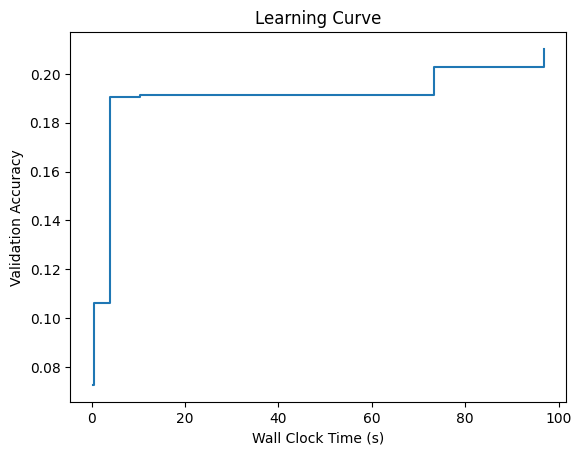

In [ ]:
#Plot Learning History Over Time
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)
plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
# Predict on Train set
y_pred = model.predict(X_train)
print('Predicted labels', y_pred)

Predicted labels [[ 4.01008560e-02 -5.03016022e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 1.78872786e-01  1.61953017e-03]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 5.97423510e-02  2.30381073e-02]
 [ 2.86409018e-01  1.24459525e-02]
 [ 0.00000000e+00 -2.78054300e-04]
 [ 2.63986472e-04  1.00332278e-03]
 [-2.76217338e-01  1.05419902e-02]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 1.22206119e-01  1.59649198e-03]
 [-1.82421451e-02  9.08434671e-04]
 [ 9.67675227e-02 -1.91221106e-04]
 [-6.98791722e-01 -2.13084388e-04]
 [ 2.63986472e-04 -2.78054300e-04]
 [ 0.00000000e+00  5.01855637e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [-1.14114360e+00 -2.67115109e-03]
 [ 0.00000000e+00 -2.78054300e-04]
 [-

In [ ]:
# Check Train evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_train))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_train))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_train))

r2 = 0.5288714283930955
mse = 0.21208478150823443
mae = 0.17851049359608817


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_train.columns)
train = pd.DataFrame(y_train, columns = y_train.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = 0.3952389779019033
NewConLen: mse = 0.4241435974619653
NewConLen: mae = 0.35457691638229183
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.6625038788842877
New_Perc_Cap: mse = 2.596555450357764e-05
New_Perc_Cap: mae = 0.002444070809884528


In [ ]:
# Predict on Test set
y_pred = model.predict(X_test)
print('Predicted labels', y_pred)

Predicted labels [[-6.98791722e-01 -2.30331641e-04]
 [-2.76217338e-01  1.26116129e-03]
 [ 2.63986472e-04  1.00332278e-03]
 [ 1.20777548e-01  7.03512512e-03]
 [ 0.00000000e+00 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [ 2.63986472e-04  6.65131694e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [ 0.00000000e+00 -2.78054300e-04]
 [ 0.00000000e+00  4.18263093e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [ 9.67675227e-02 -7.57008683e-04]
 [ 1.78872786e-01 -4.50682760e-04]
 [ 1.22206119e-01 -1.12485607e-03]
 [-2.76217338e-01  1.00332278e-03]
 [ 0.00000000e+00  5.01855637e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [-6.98791722e-01 -2.13084388e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [-2.76217338e-01 -2.13084388e-04]
 [ 1.22206119e-01  1.81243823e-02]
 [ 2.63986472e-04  5.01855637e-04]
 [ 0.00000000e+00 -2.13084388e-04]
 [-7.86822610e-01 -2.13084388e-04]
 [ 0.00000000e+00 -1.71719335e-05]
 [-6.98791722e-01 -2.13084388e-04]
 [ 3.04915149e-01  3.92509542e-04]
 [ 

In [ ]:
# Check Test evaluation metrics
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.2609628925615992
mse = 0.47443321255030346
mae = 0.22672283983862718


In [ ]:
# Check metrics indiviually
pred = pd.DataFrame(y_pred, columns = y_test.columns)
train = pd.DataFrame(y_test, columns = y_test.columns)
print('NewConLen: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mse', '=', sklearn_metric_loss_score('mse', pred["New_Con_Len"], train["New_Con_Len"]))
print('NewConLen: mae', '=', sklearn_metric_loss_score('mae', pred["New_Con_Len"], train["New_Con_Len"]))
print('--------------------------------------------------------------------------------------------')
#print('ConSal: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["ConSal"], train["ConSal"]))
#print('ConSal: mse', '=', sklearn_metric_loss_score('mse', pred["ConSal"], train["ConSal"]))
#print('ConSal: mae', '=', sklearn_metric_loss_score('mae', pred["ConSal"], train["ConSal"]))
#print('--------------------------------------------------------------------------------------------')
#print('PPY: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["PPY"], train["PPY"]))
#print('PPY: mse', '=', sklearn_metric_loss_score('mse', pred["PPY"], train["PPY"]))
#print('PPY: mae', '=', sklearn_metric_loss_score('mae', pred["PPY"], train["PPY"]))
#print('--------------------------------------------------------------------------------------------')
print('New_Perc_Cap: r2', '=', 1 - sklearn_metric_loss_score('r2', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mse', '=', sklearn_metric_loss_score('mse', pred["New_Perc_Cap"], train["New_Perc_Cap"]))
print('New_Perc_Cap: mae', '=', sklearn_metric_loss_score('mae', pred["New_Perc_Cap"], train["New_Perc_Cap"]))

NewConLen: r2 = 0.19050302665011043
NewConLen: mse = 0.9486878021601409
NewConLen: mae = 0.4477787614344196
--------------------------------------------------------------------------------------------
New_Perc_Cap: r2 = 0.331422758473088
New_Perc_Cap: mse = 0.00017862294046600794
New_Perc_Cap: mae = 0.0056669182428347575


In [ ]:
# Predict a Current Player
feeder_test = feeder[feeder.Year == 2022]
feeder_test = feeder_test[feeder_test.Player == ""]
print(feeder_test.head())
feeder_test = feeder_test.drop(['Player', 'Pos'], axis=1)
#targets = feeder_test['New_Con_Len', 'New_Perc_Cap']
feeder_test = feeder_test.drop(['New_Con_Len', 'New_Perc_Cap'], axis=1)
y_pred = model.predict(feeder_test)
print('Predicted labels', y_pred)